## DATA 1030 Project

#### UCI SECOM Dataset

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [65]:
# reading the data
data = pd.read_csv('uci-secom.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)

(1567, 592)


In [66]:
unique_vals = data['Pass/Fail'].unique()  # [0, 1, 2]
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

In [67]:
data.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [68]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

### Pass/Fail Pie Chart

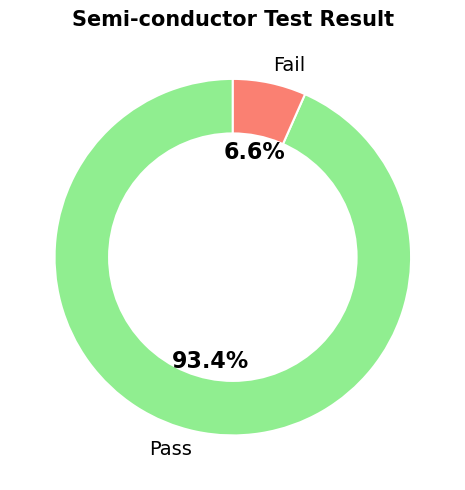

In [37]:
pass_fail_counts = data['Pass/Fail'].value_counts()

# Define labels and colors
labels = ['Pass', 'Fail']
colors = ['lightgreen', 'salmon']
# Create the pie chart
fig, ax = plt.subplots(figsize=(5,5))
wedges, texts, autotexts = ax.pie(
    pass_fail_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops=dict(edgecolor='w', linewidth=1.5),
    textprops=dict(color='black')
)

# Styling the text
for text in texts:
    text.set_fontsize(14)
for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_weight('bold')

# Add a central circle for a donut chart style
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Semi-conductor Test Result', fontsize = 15,fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()

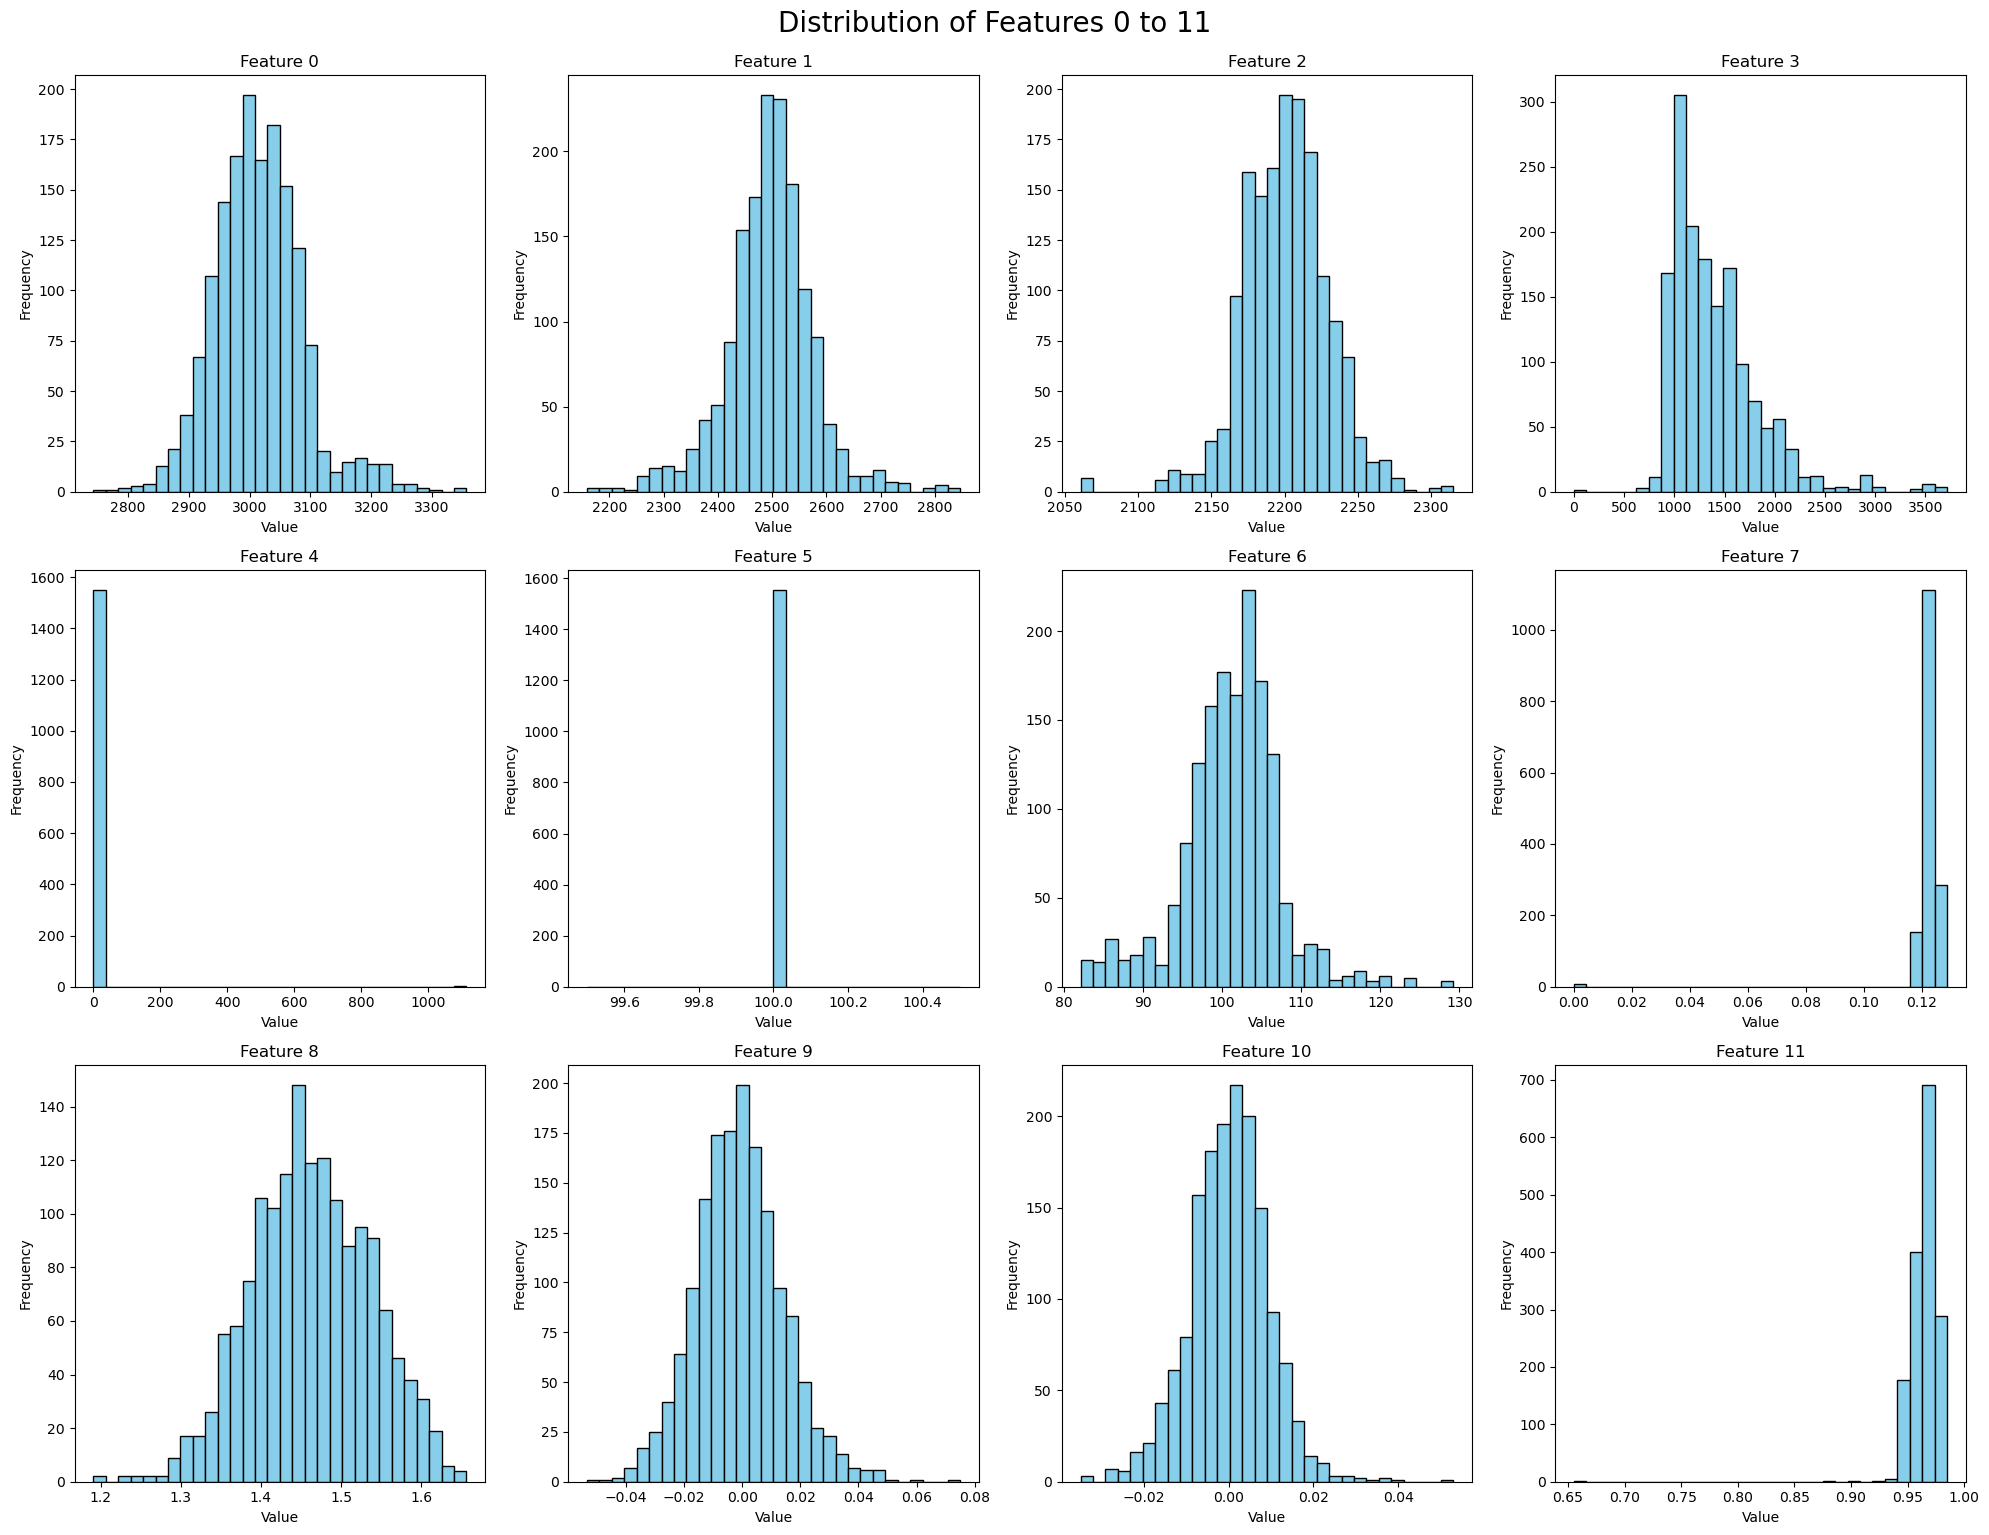

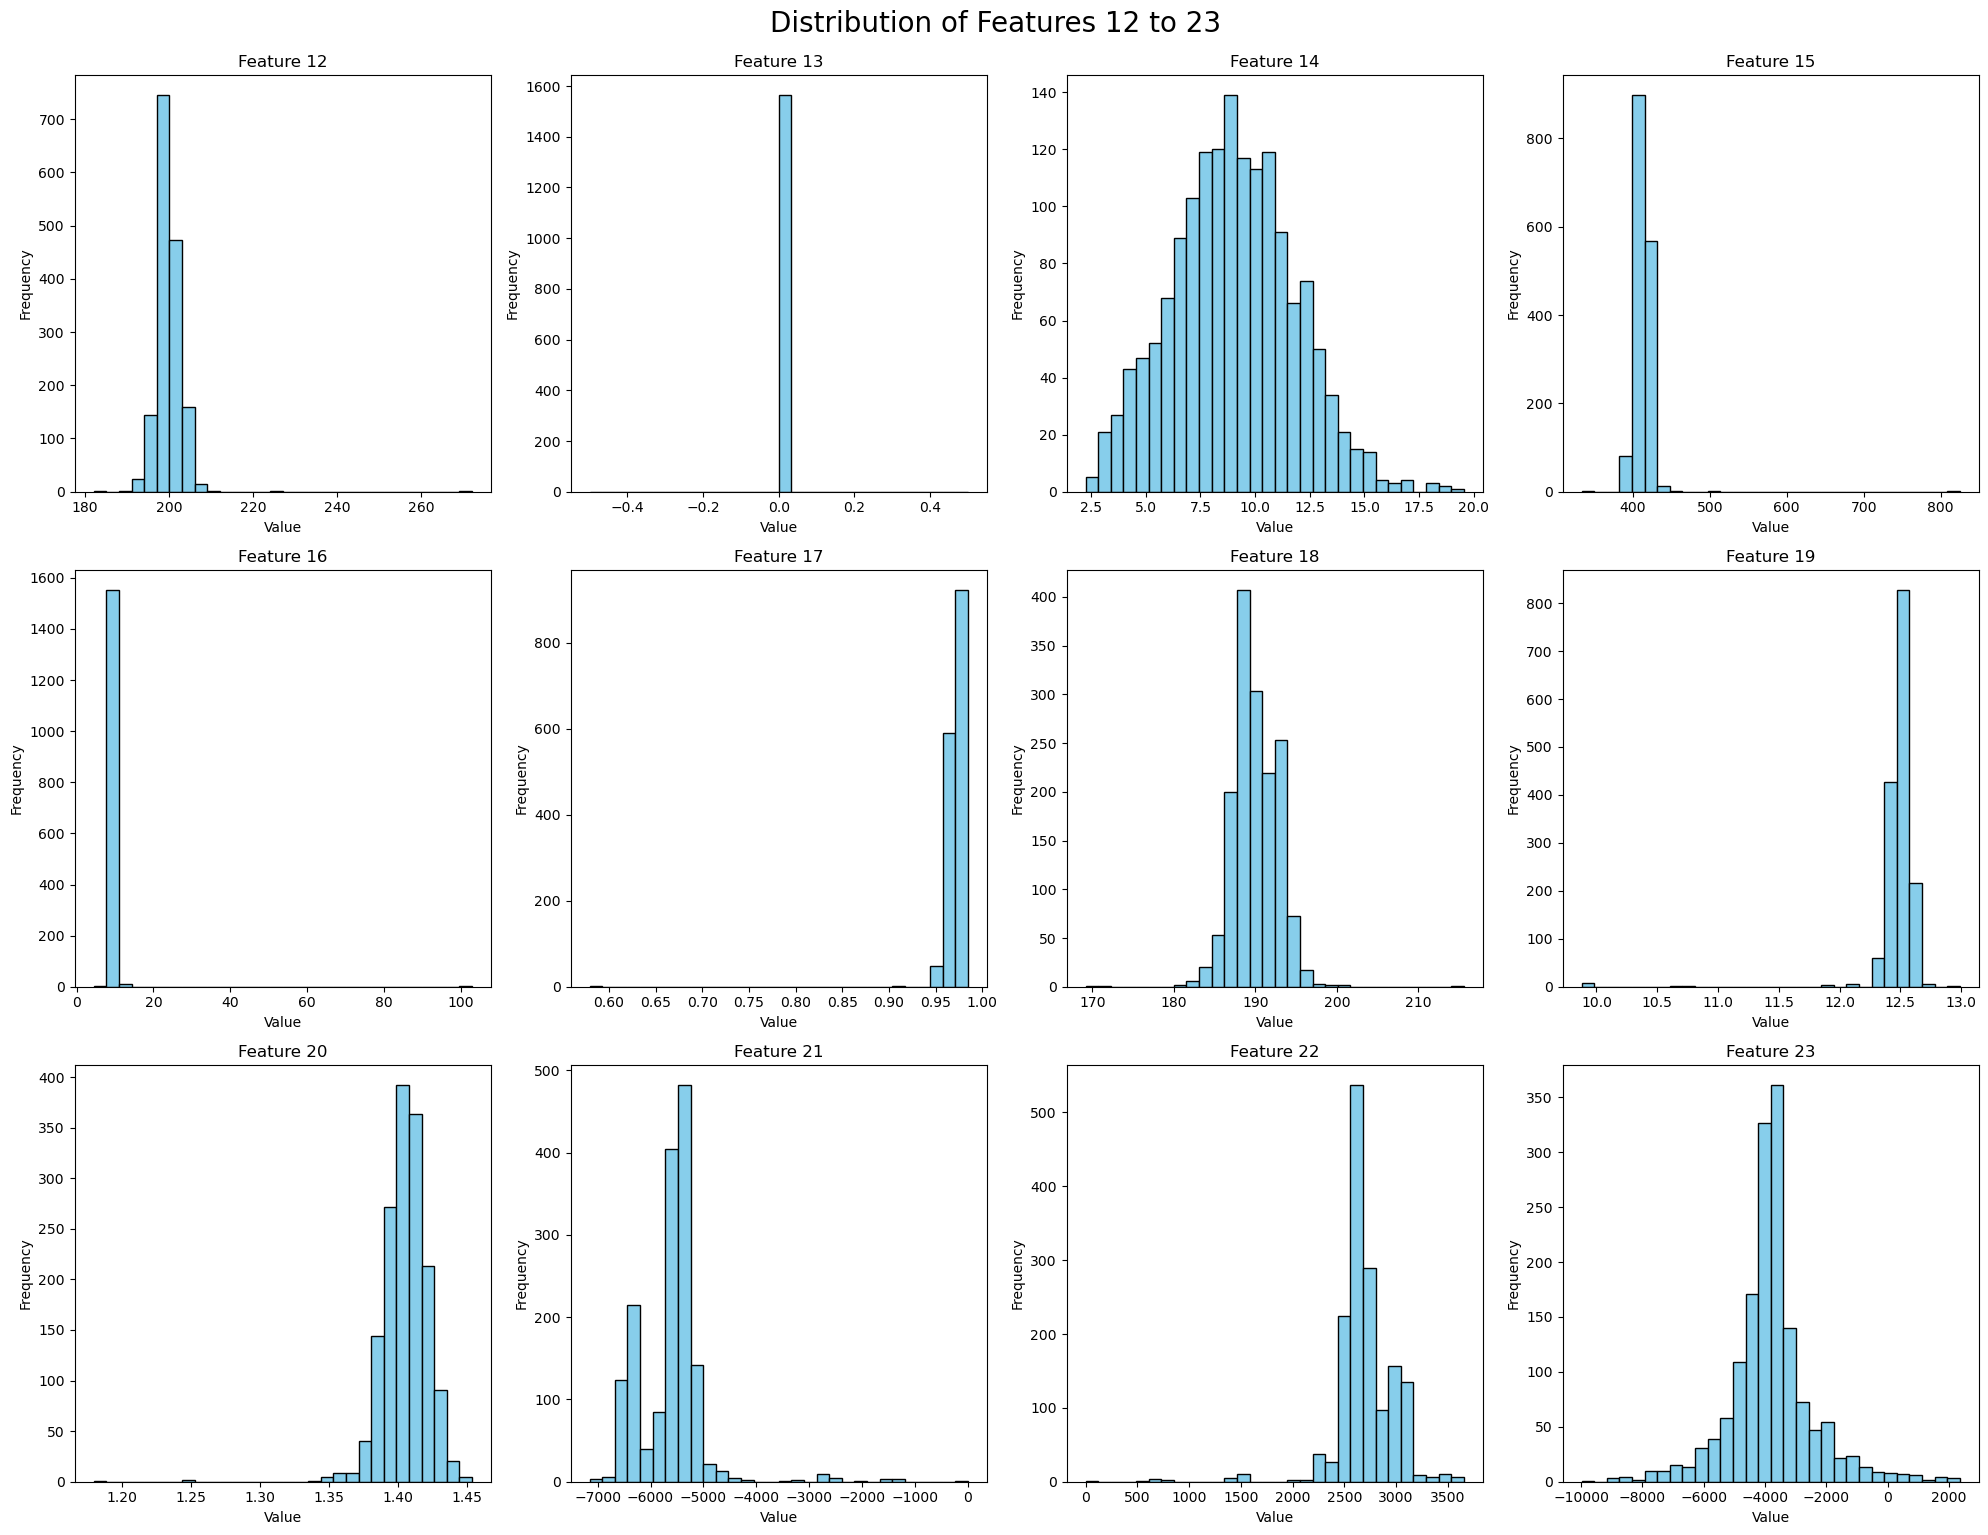

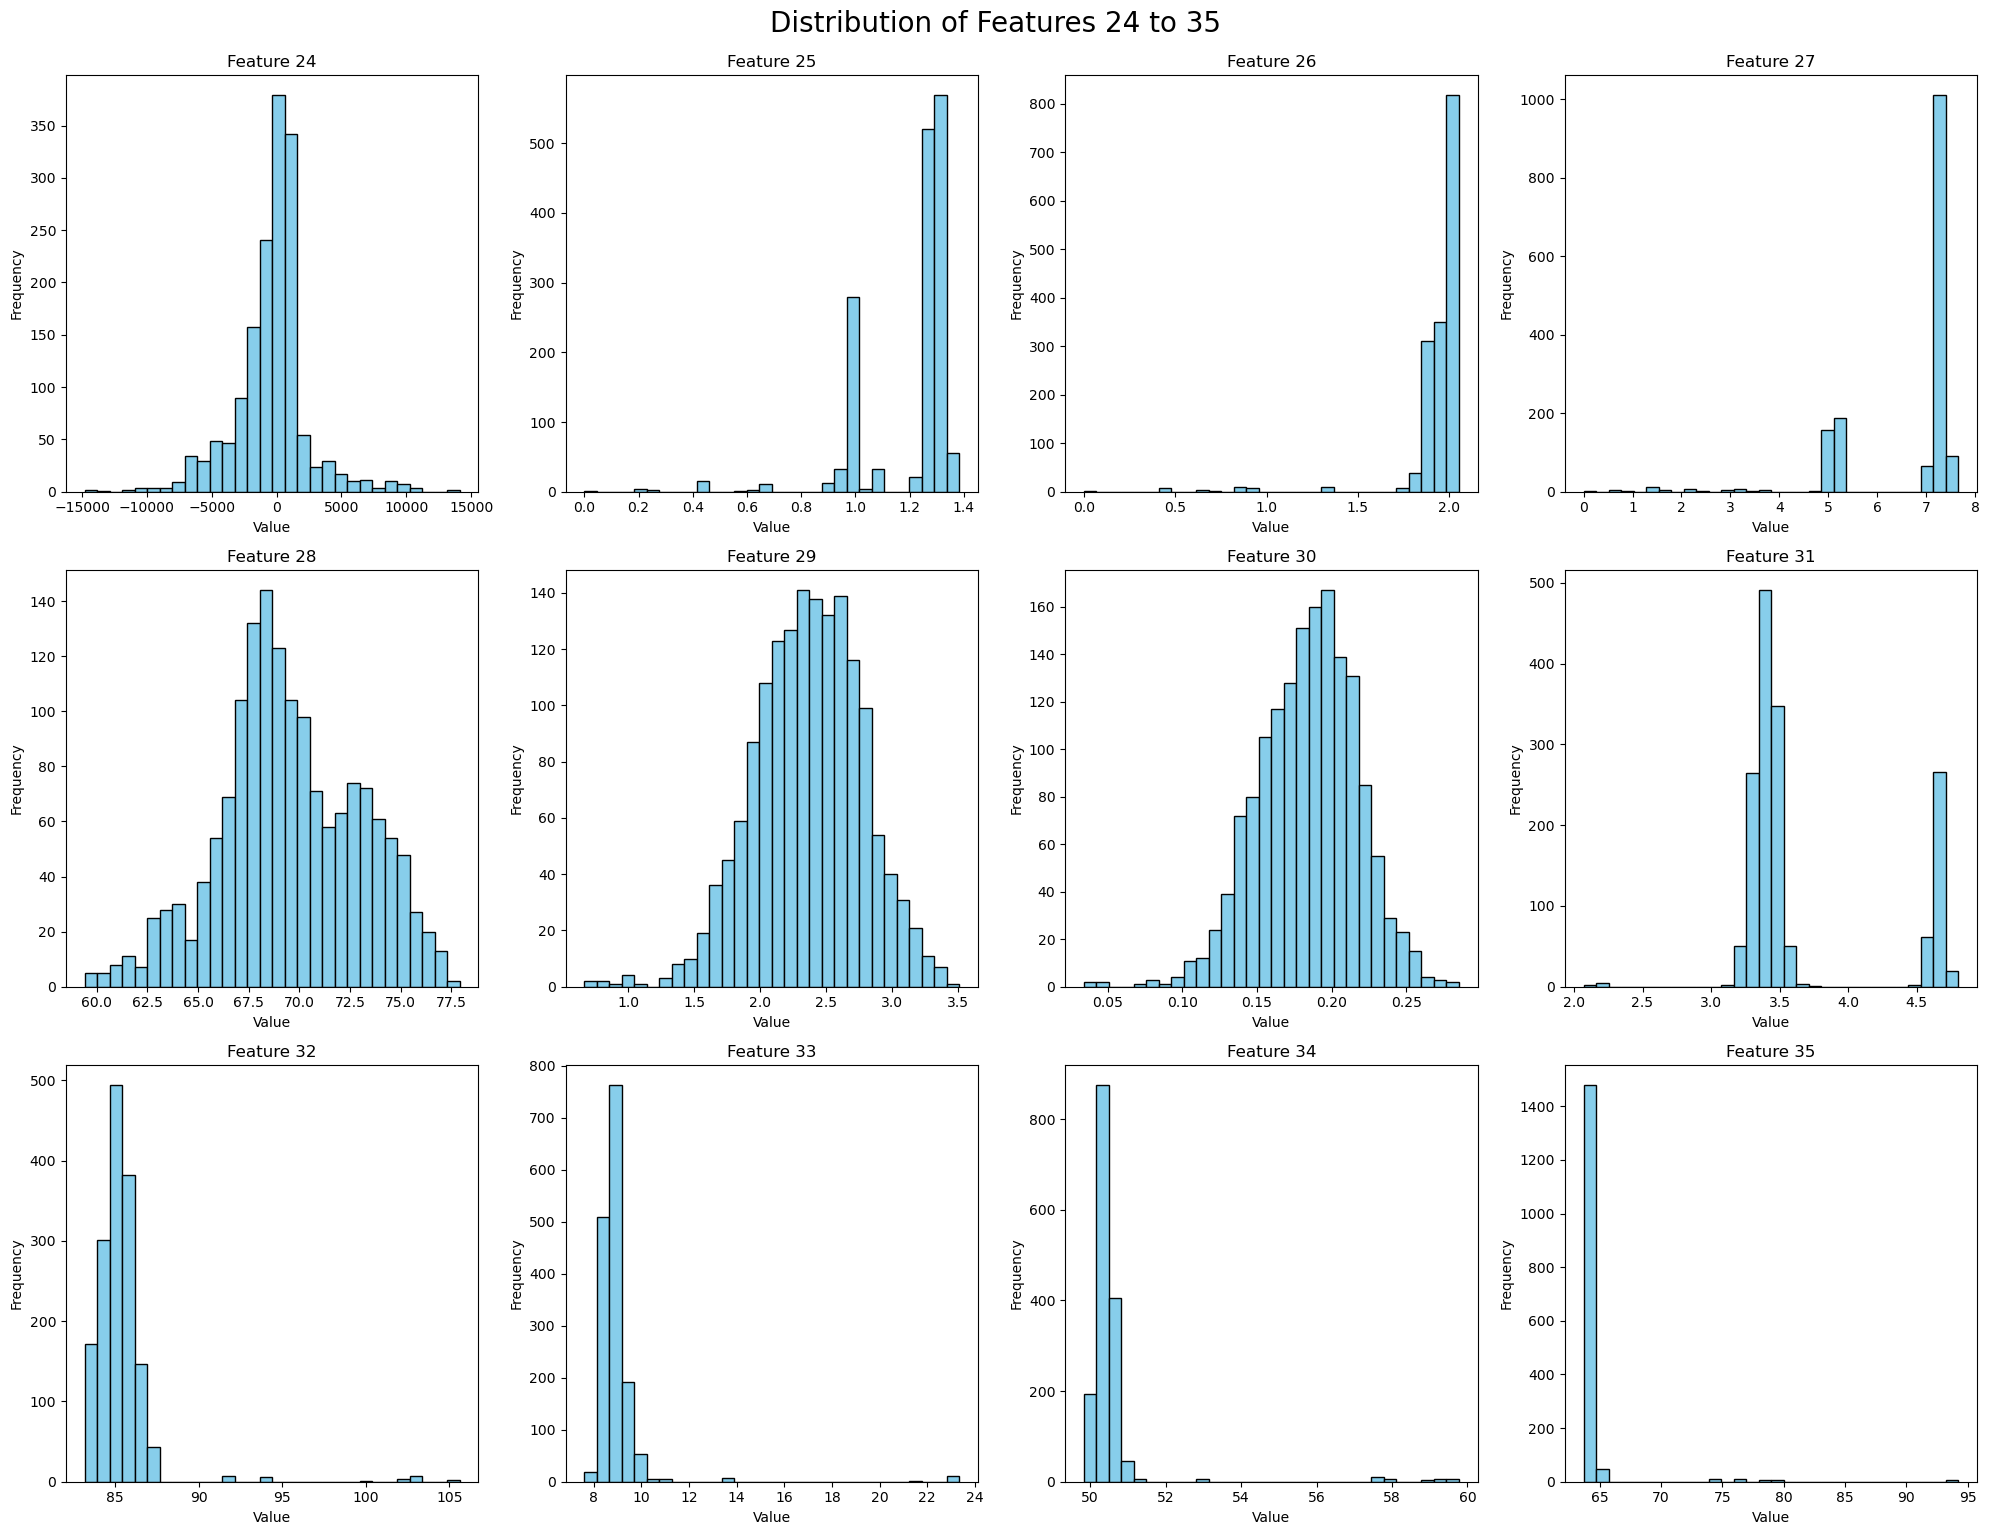

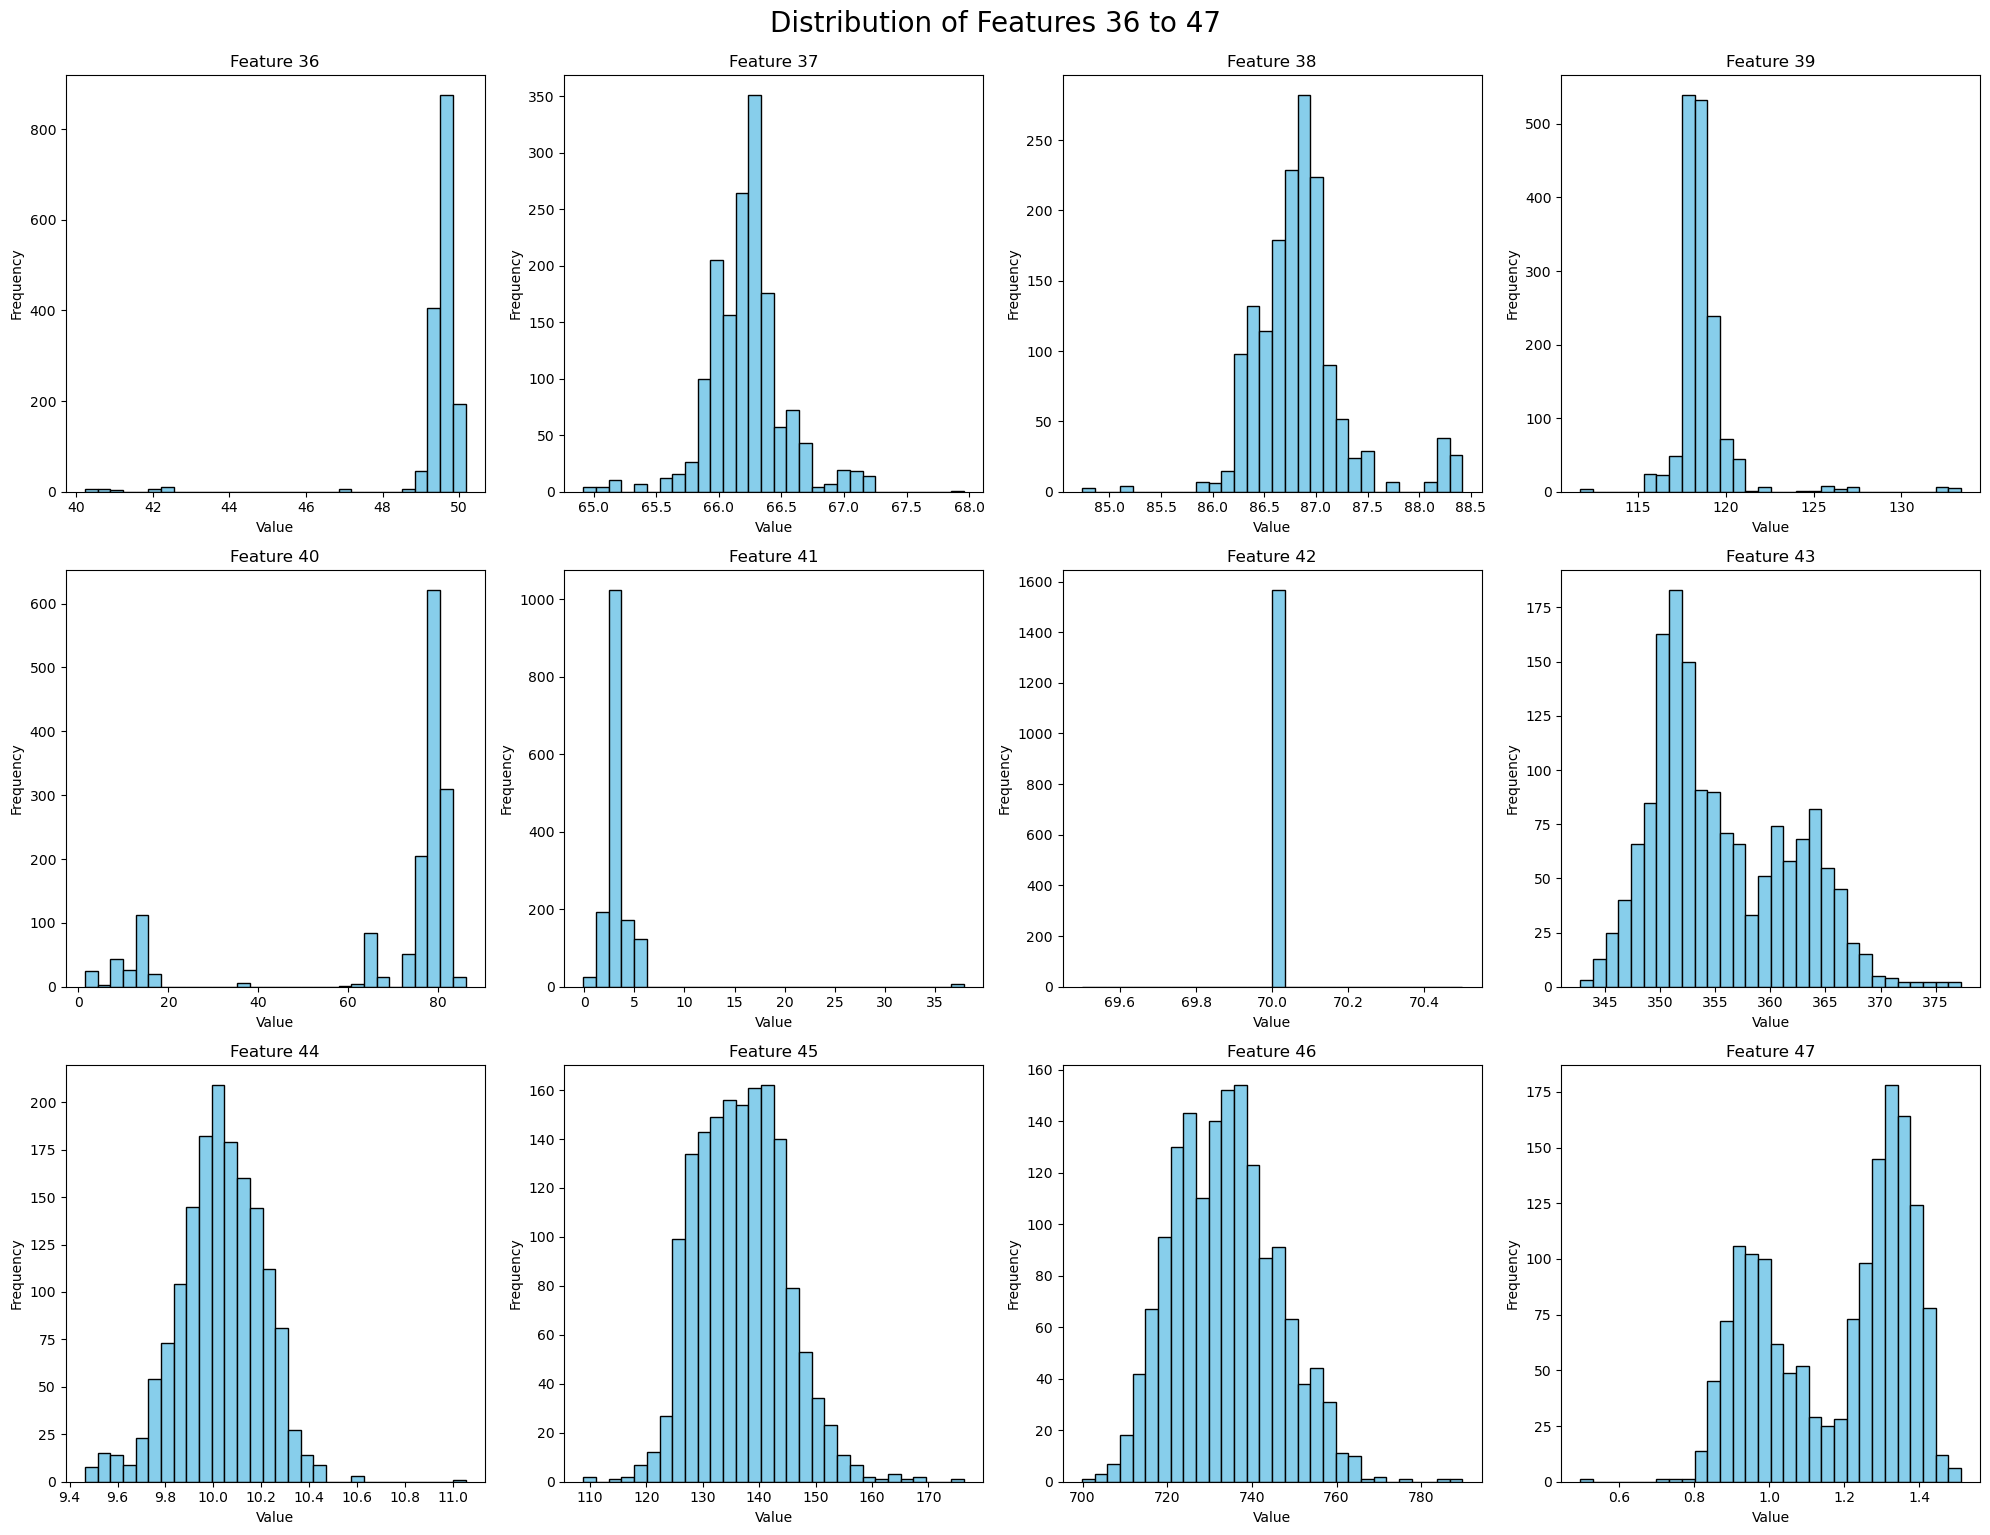

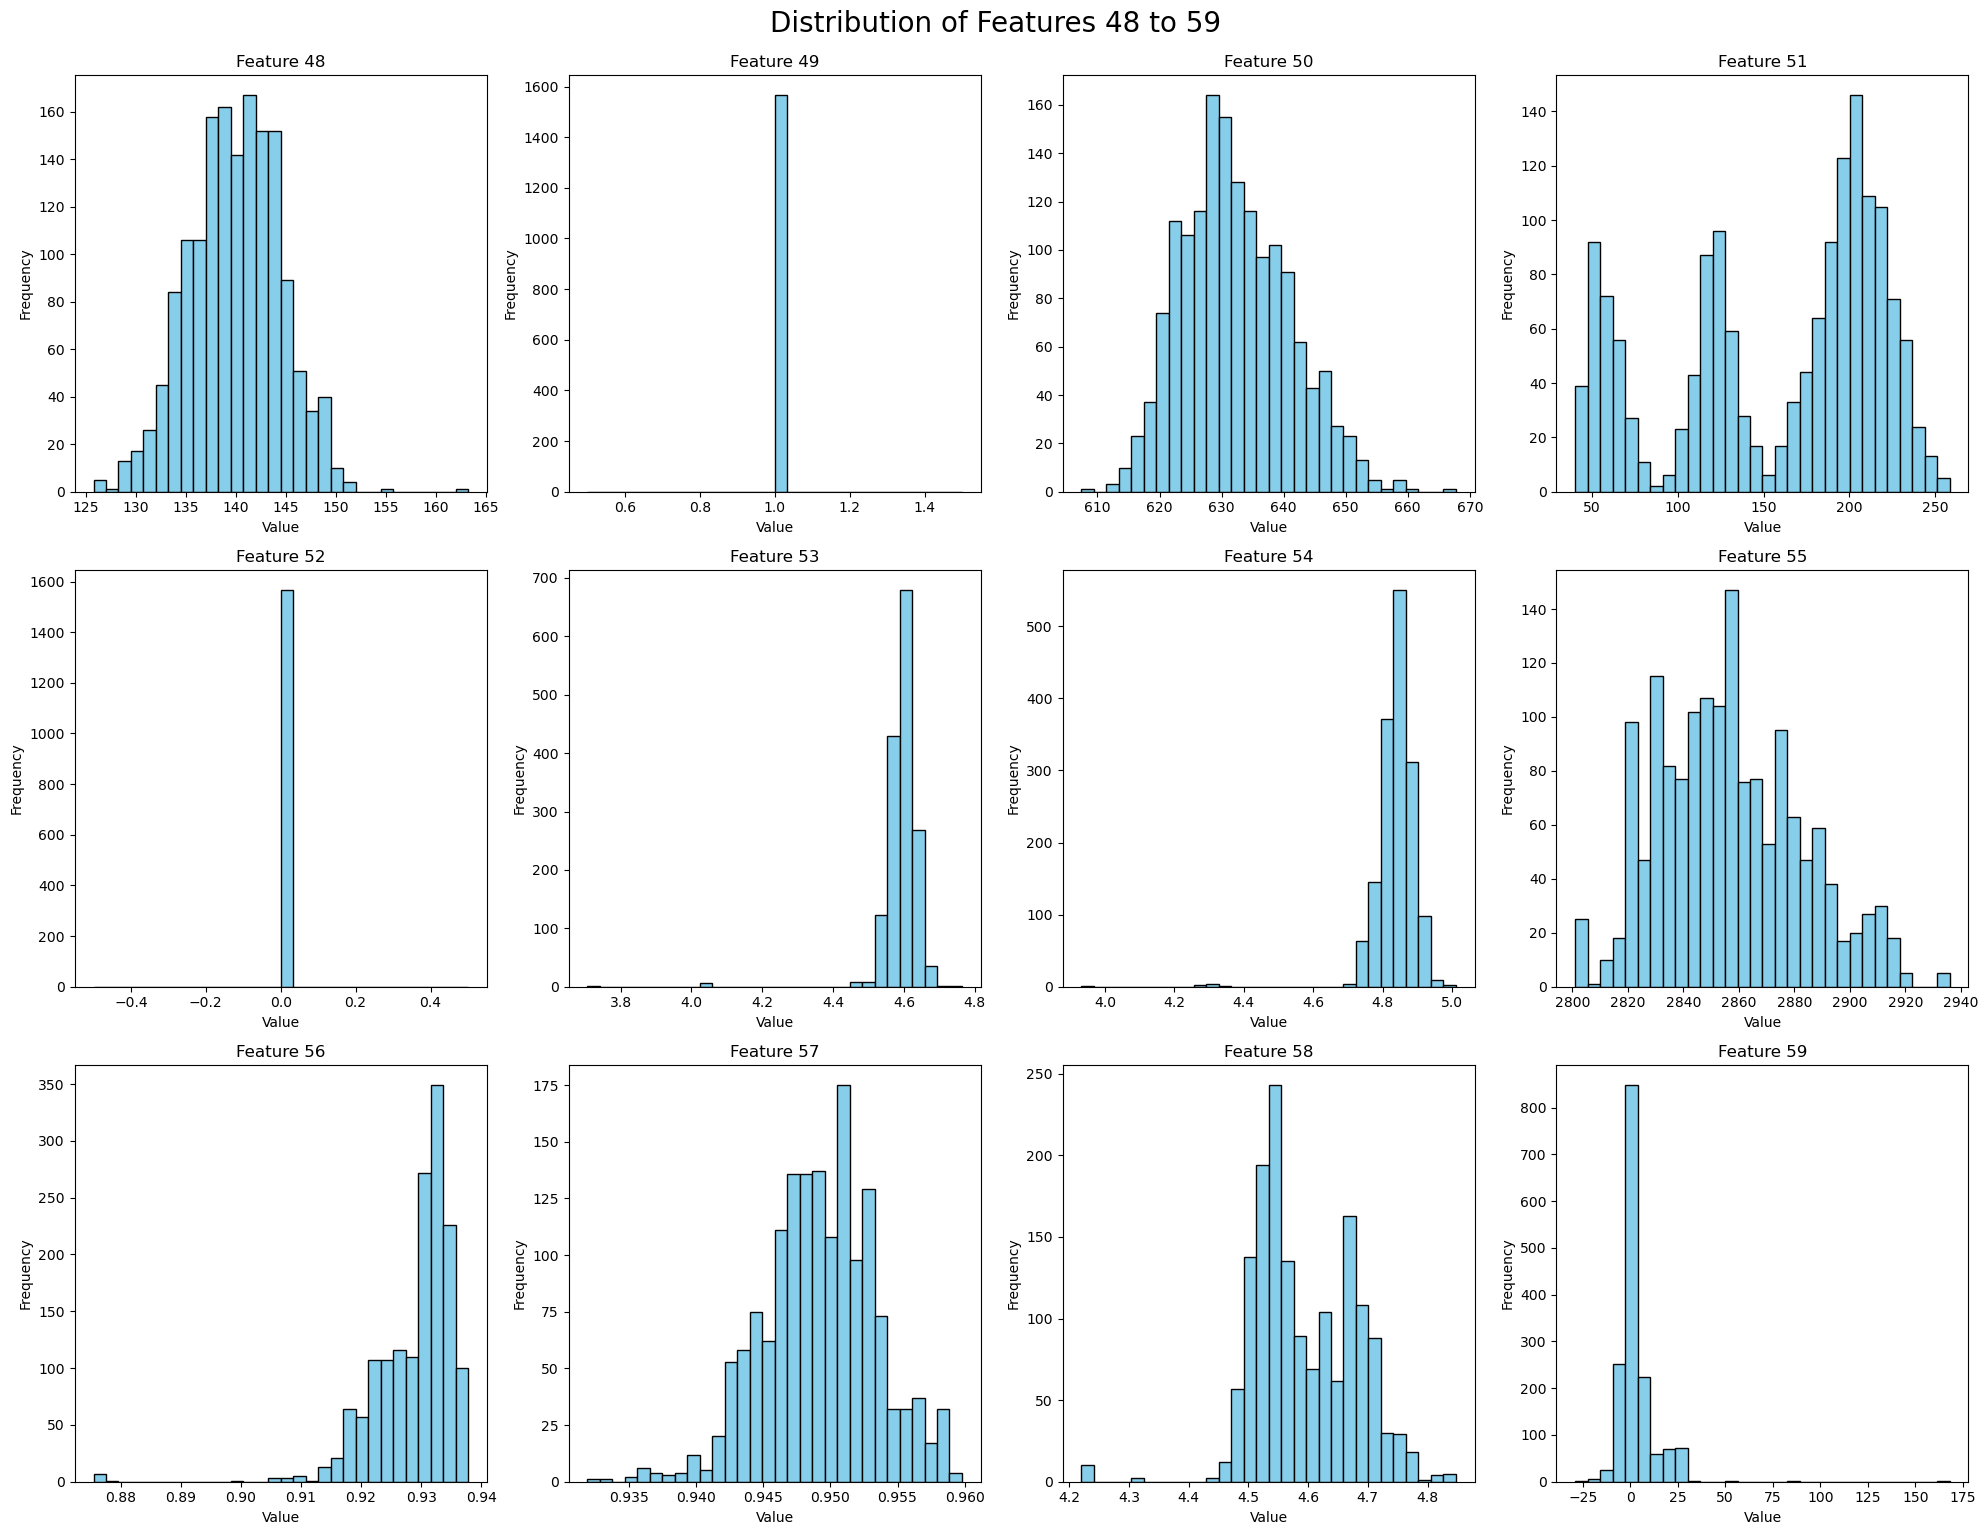

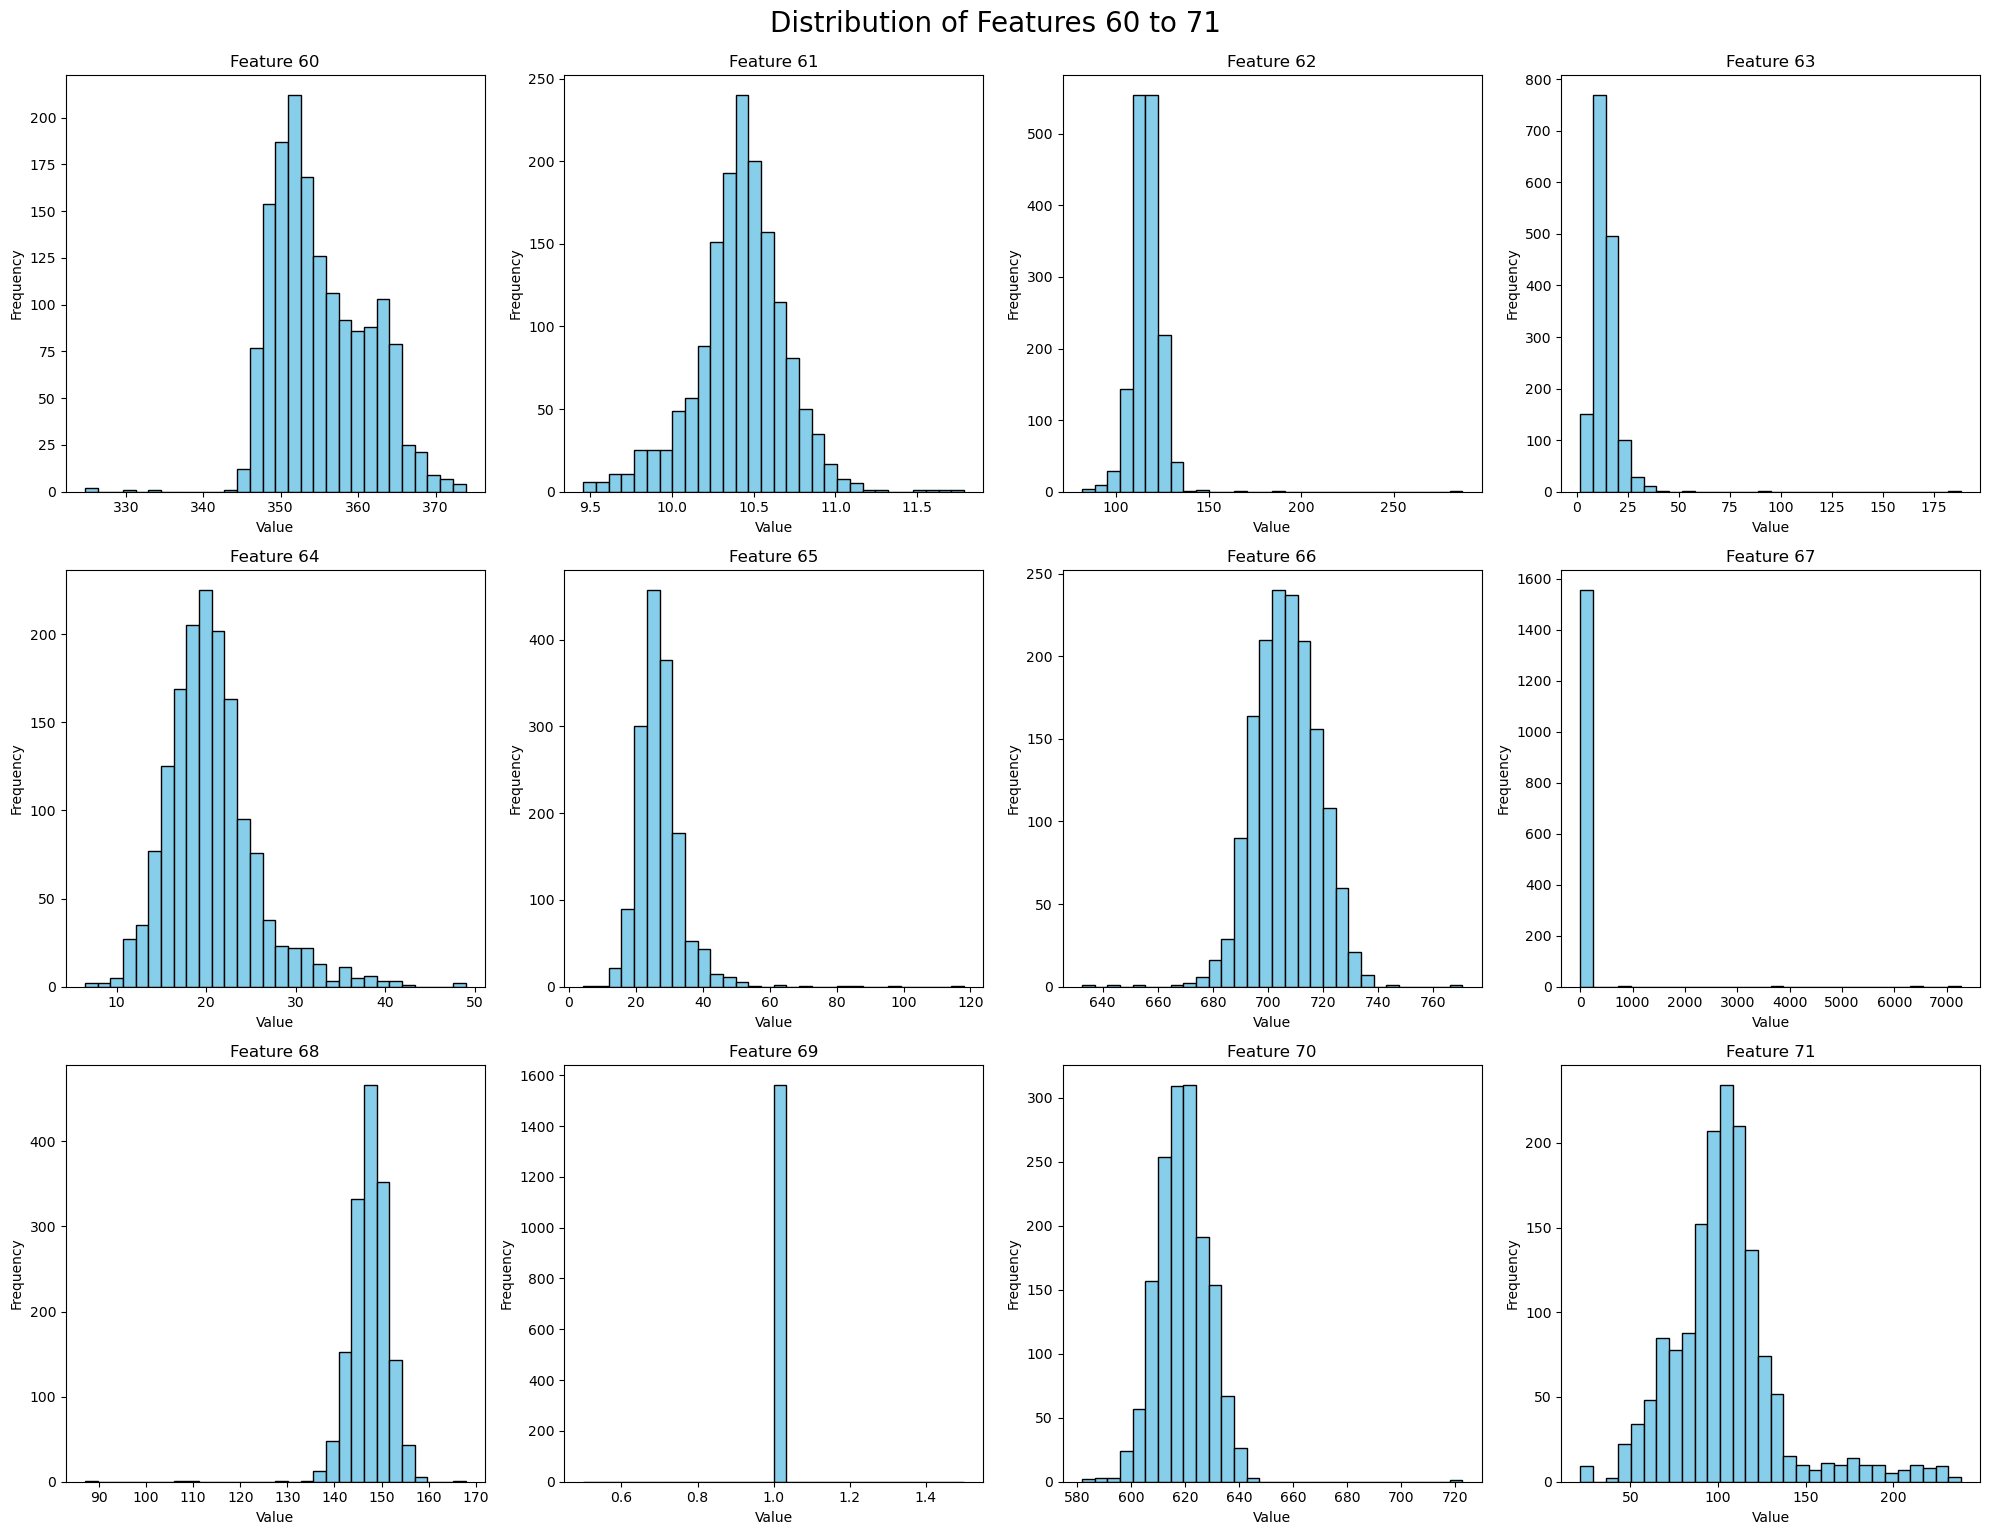

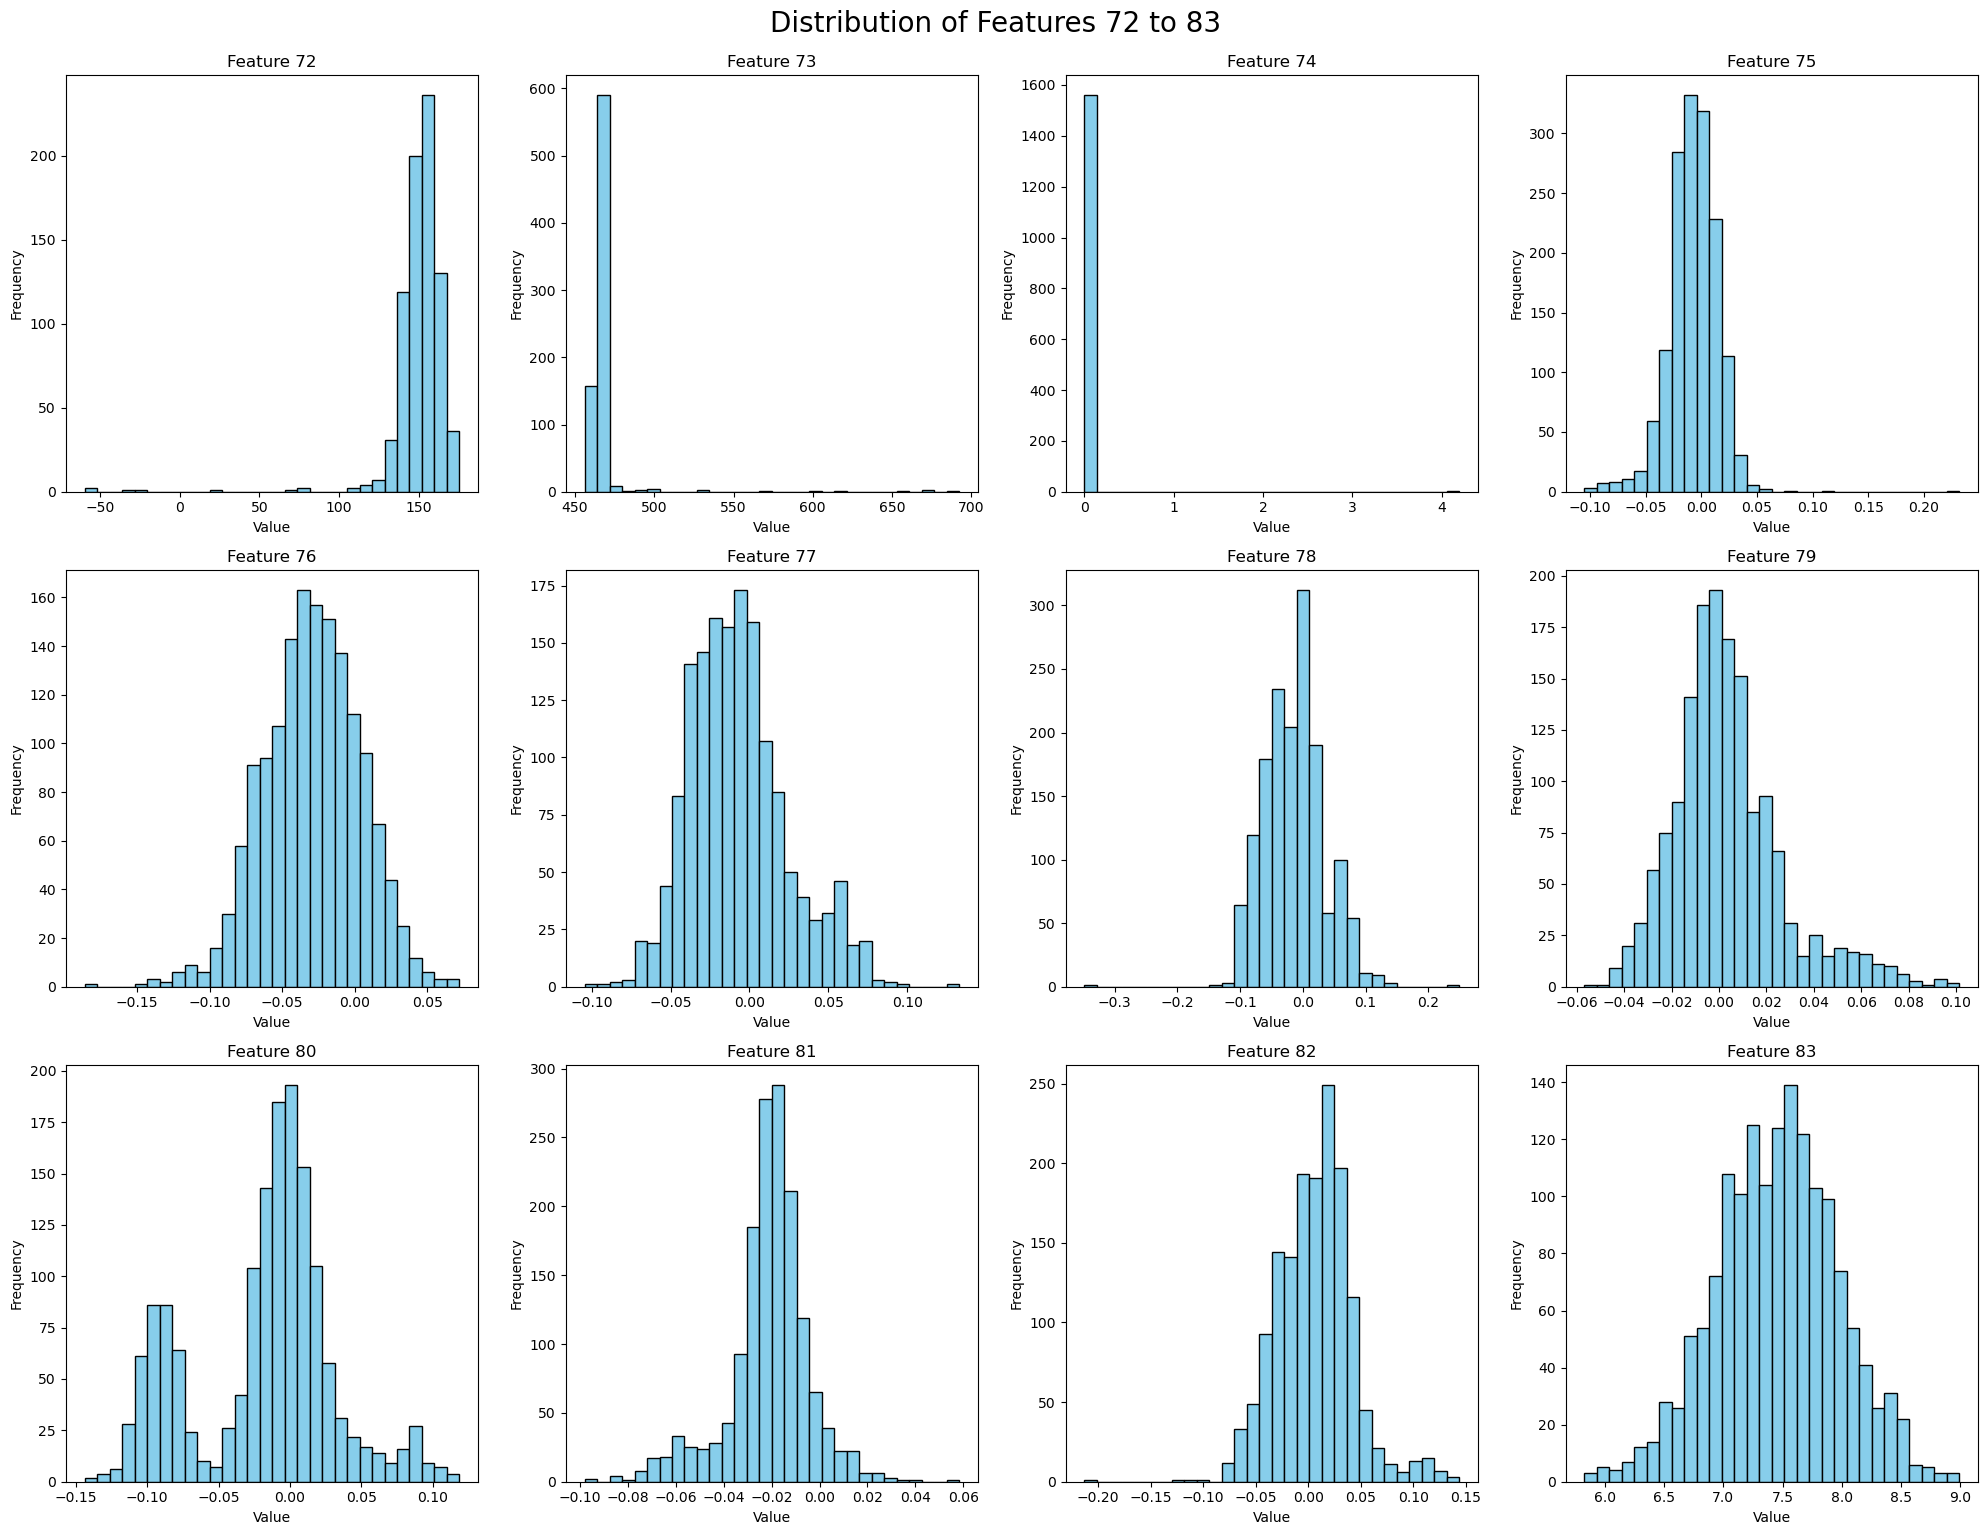

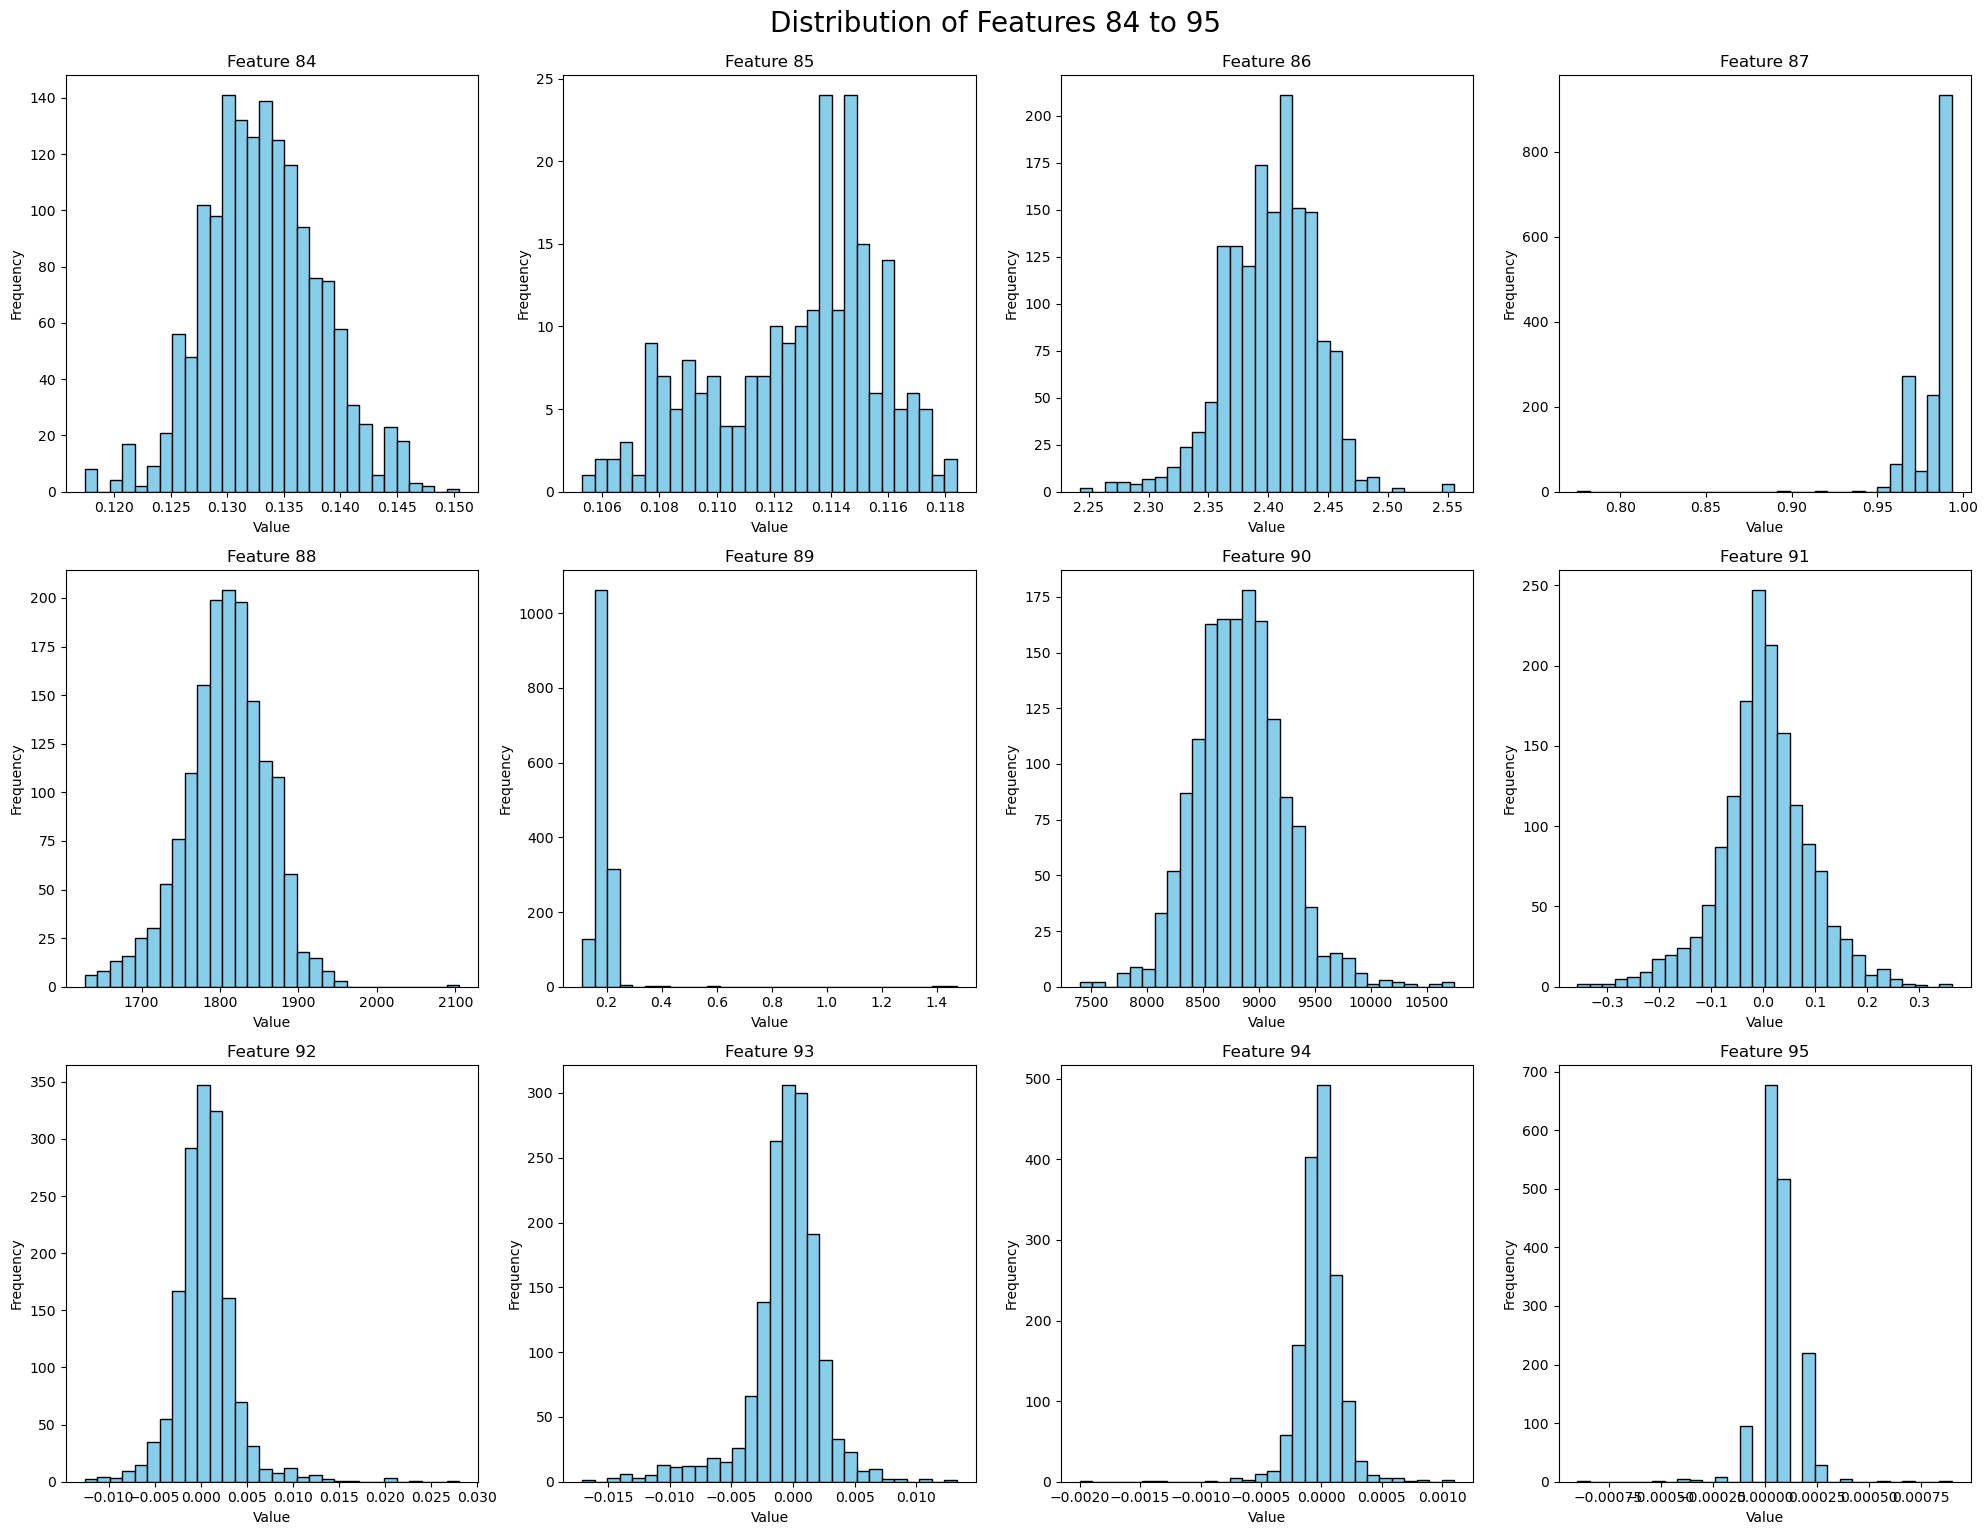

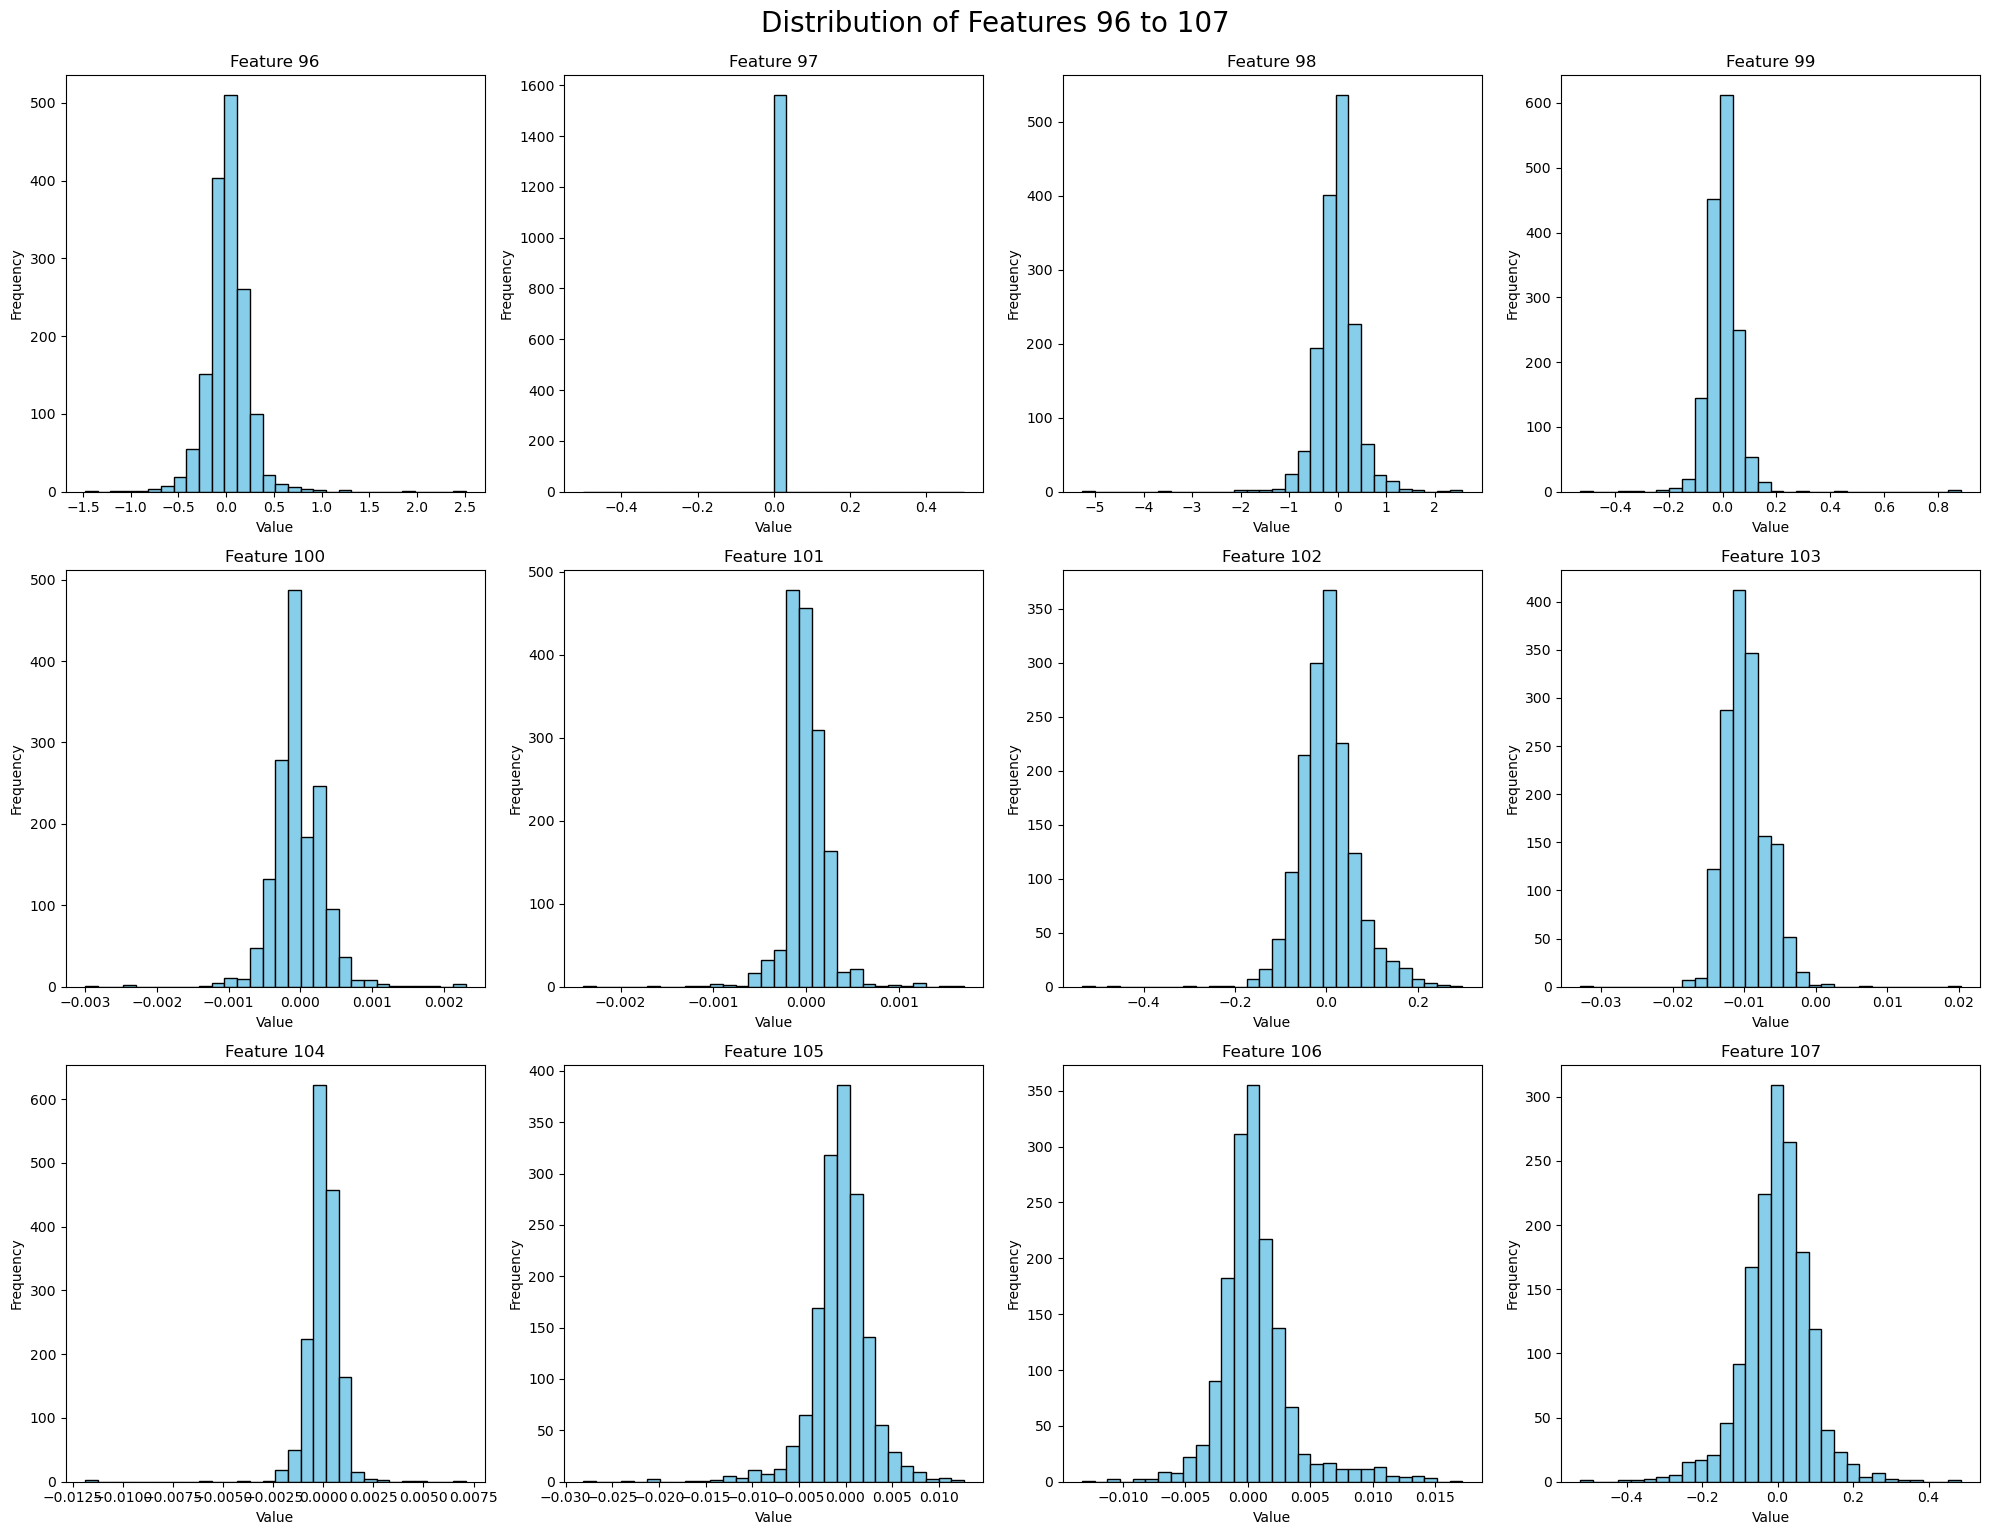

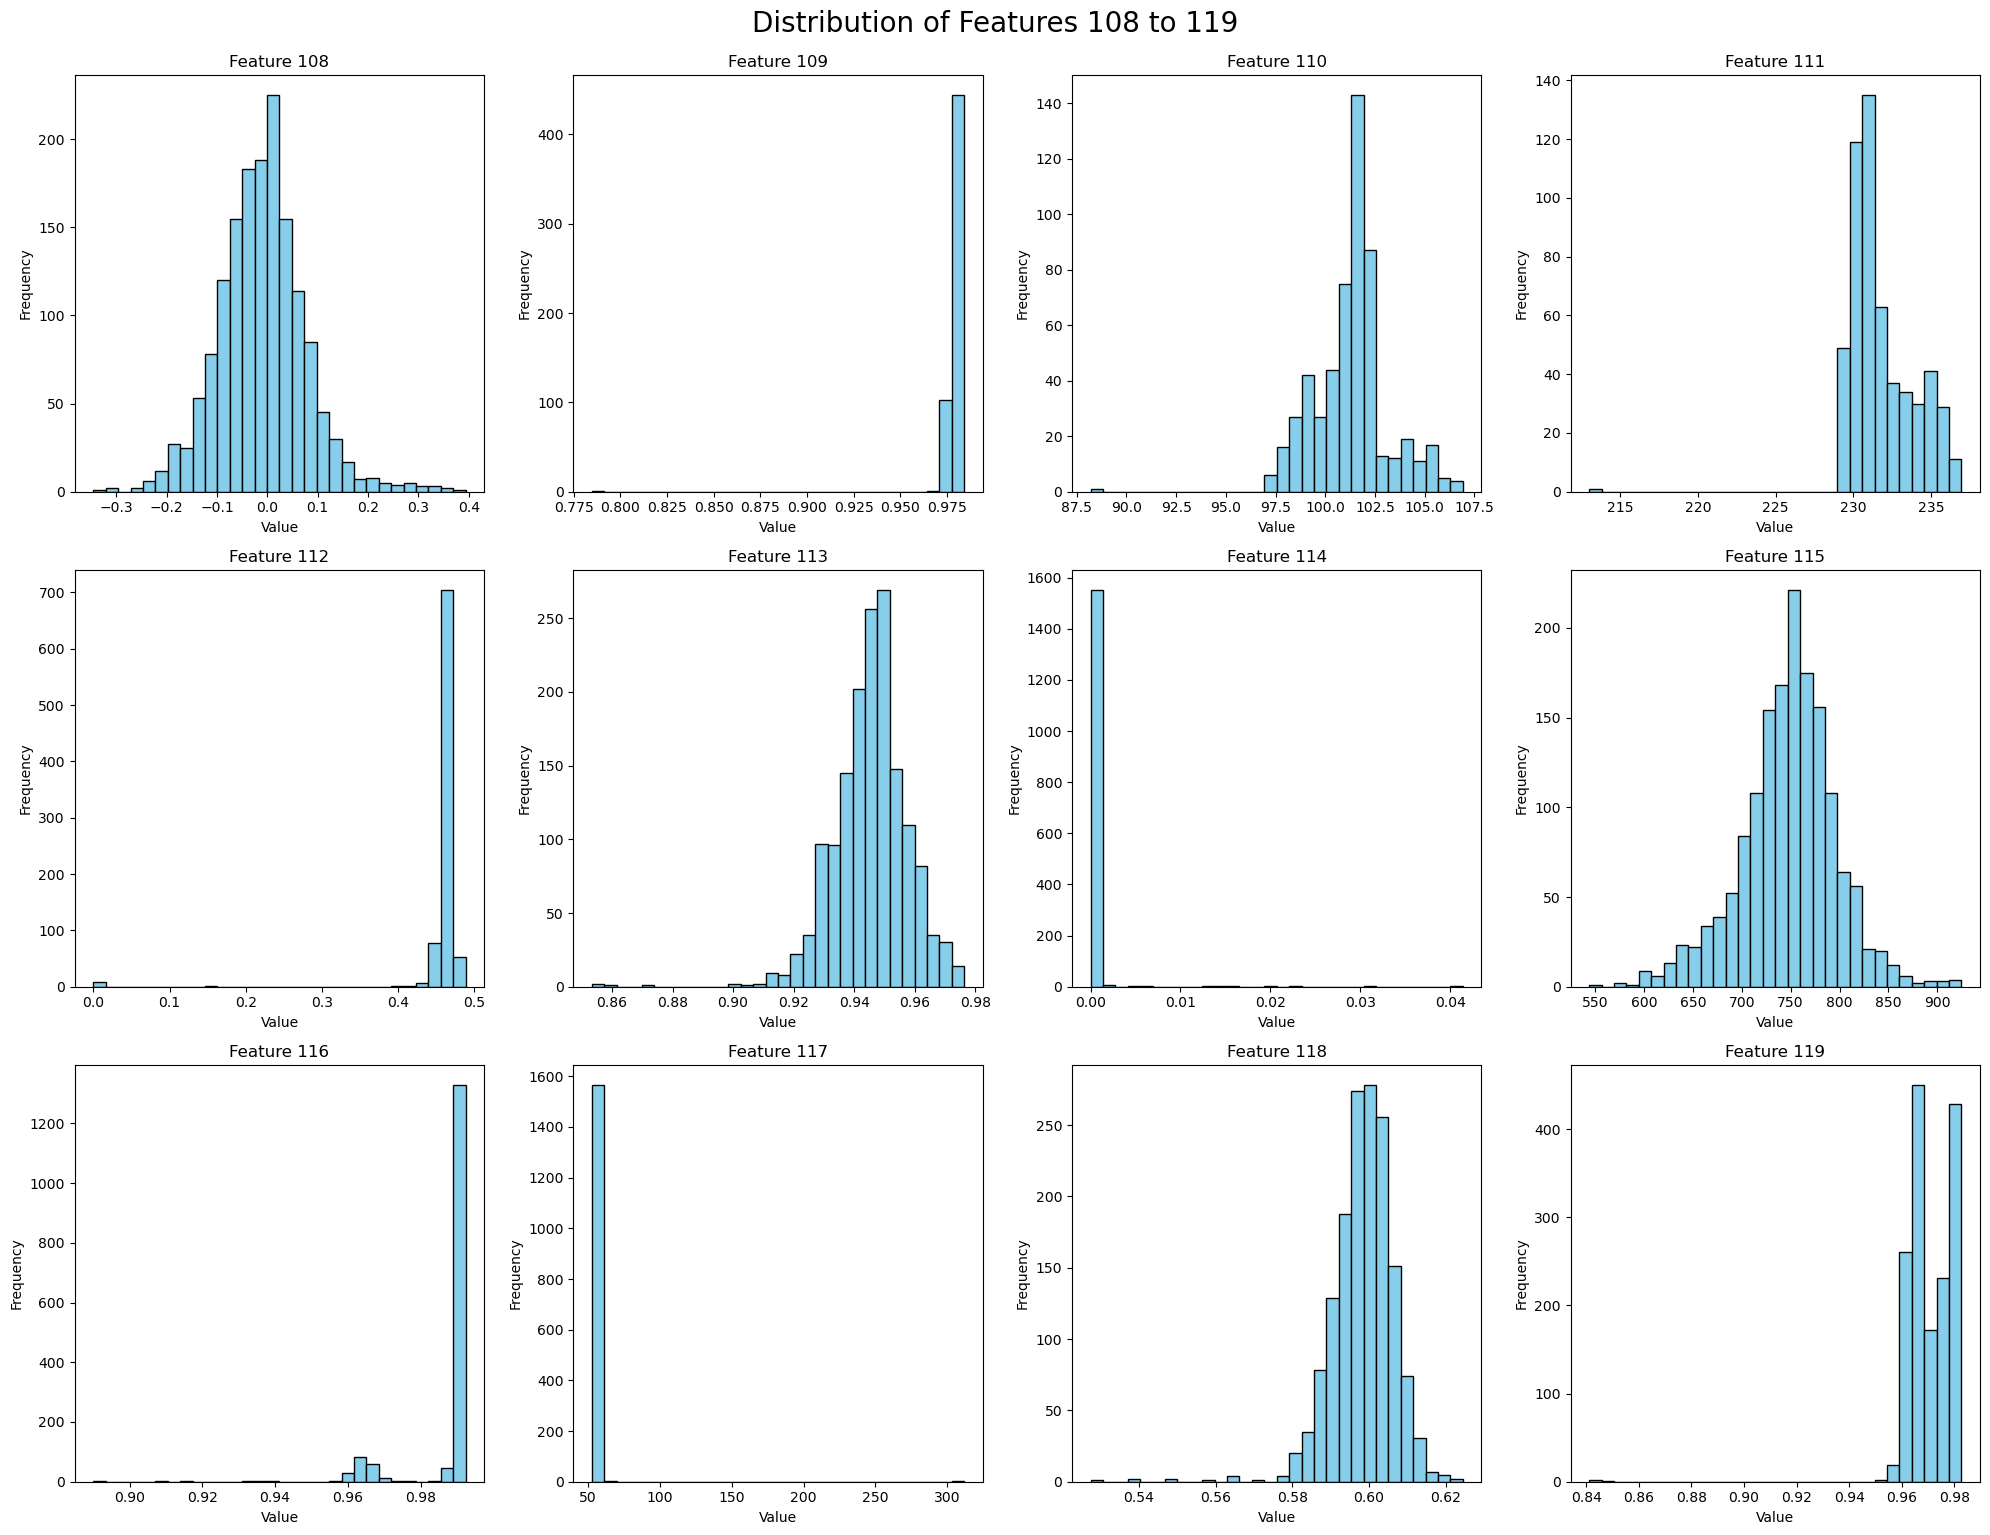

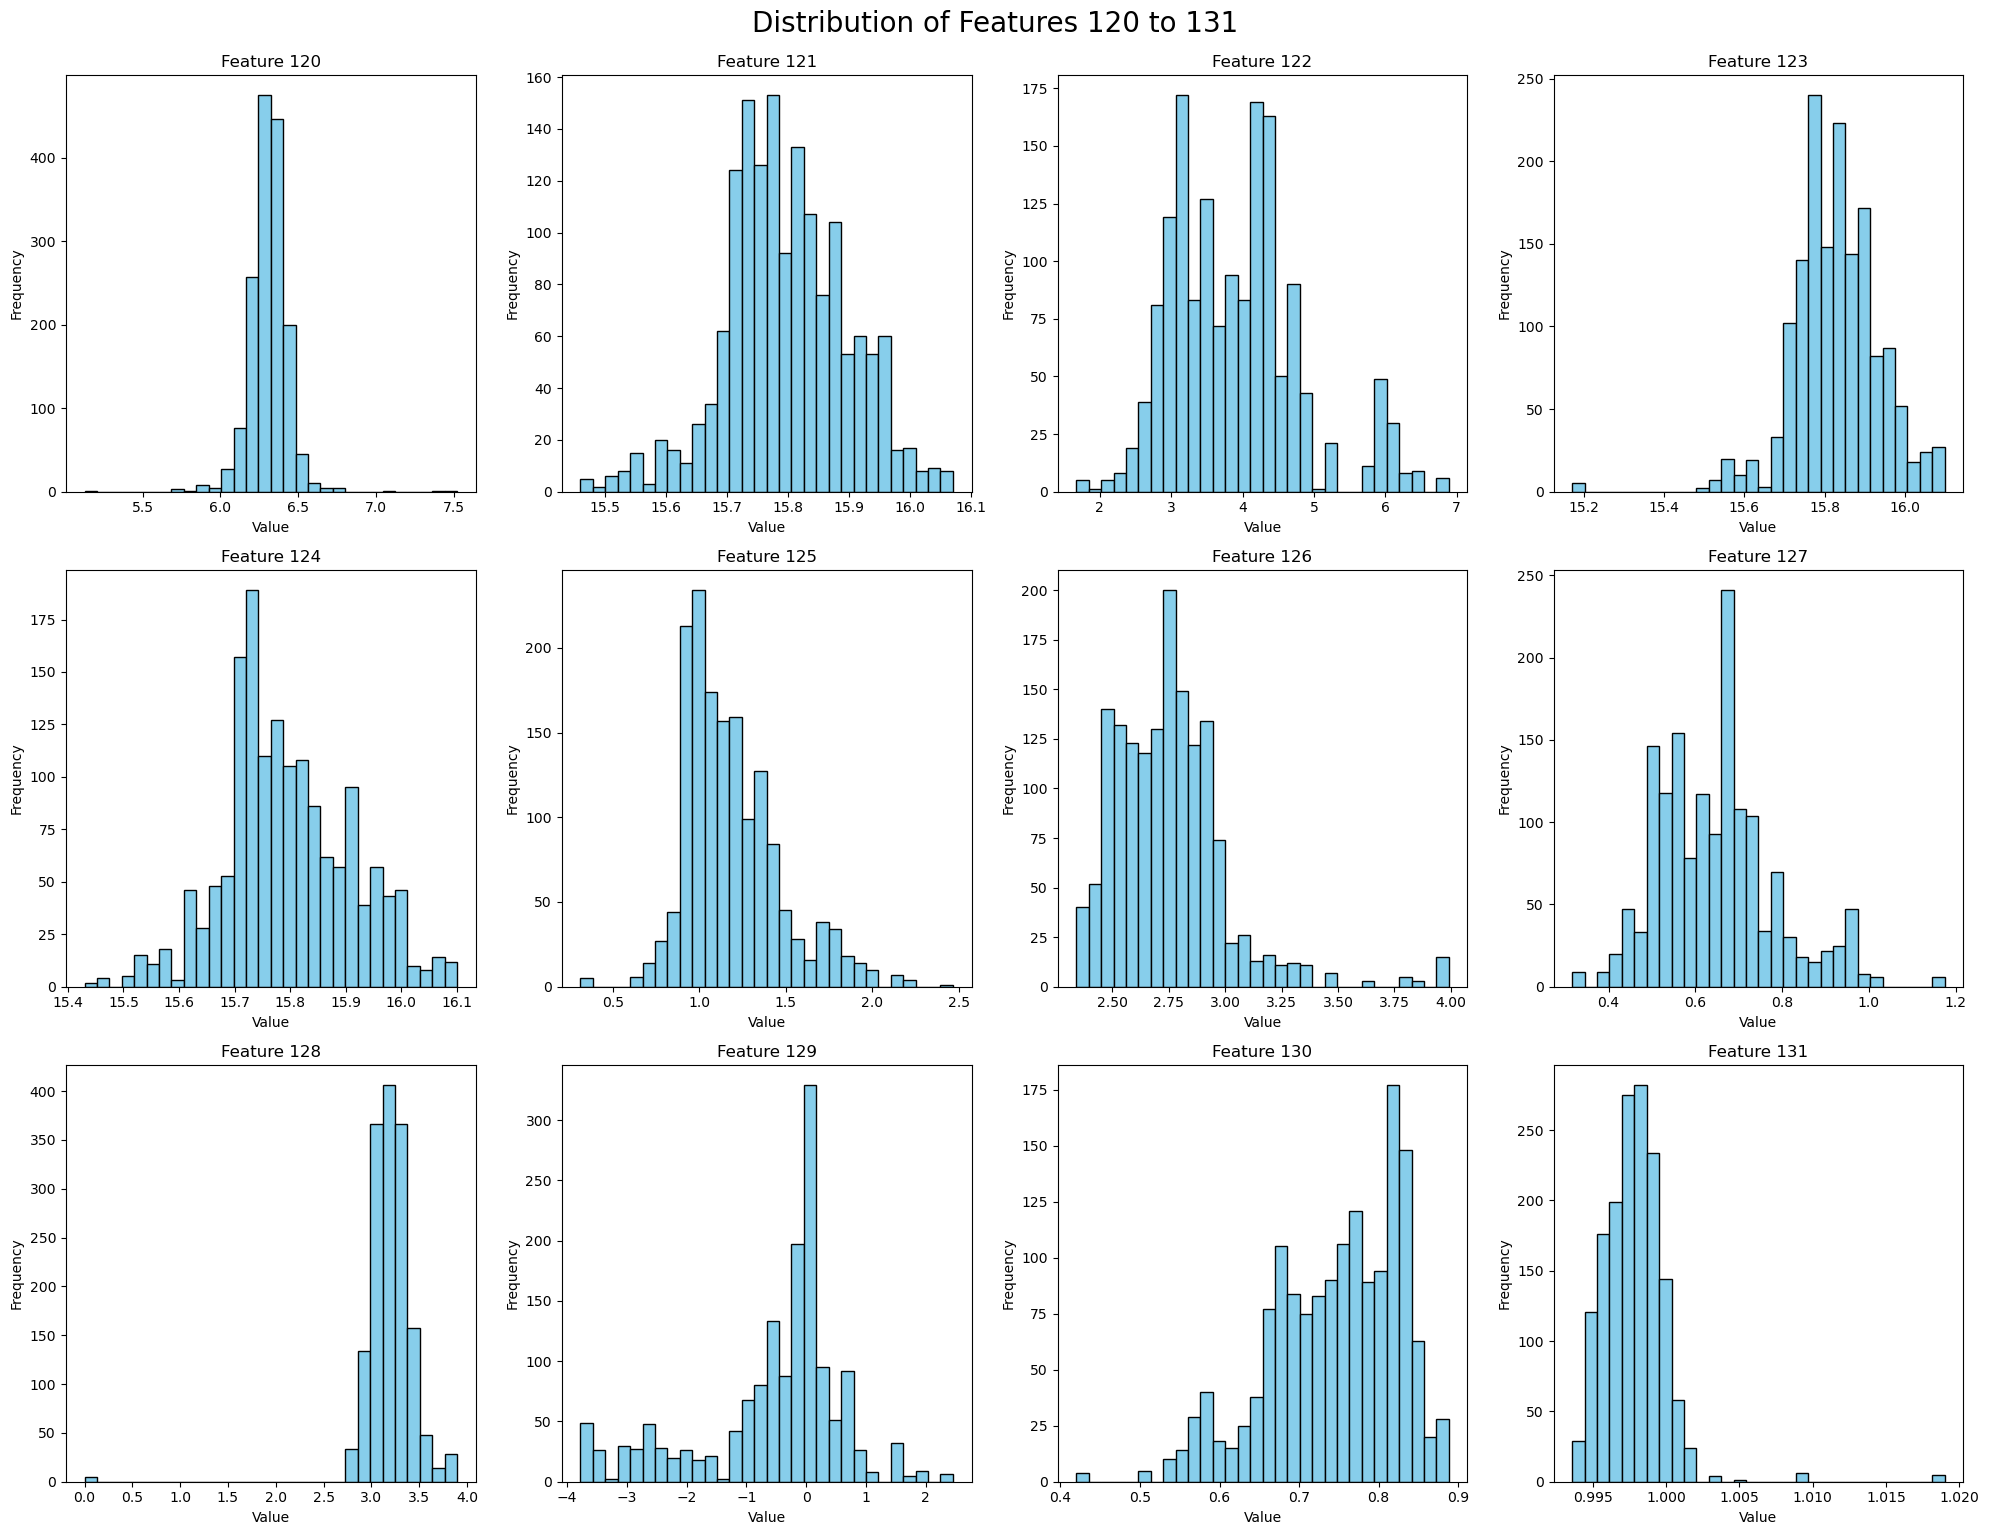

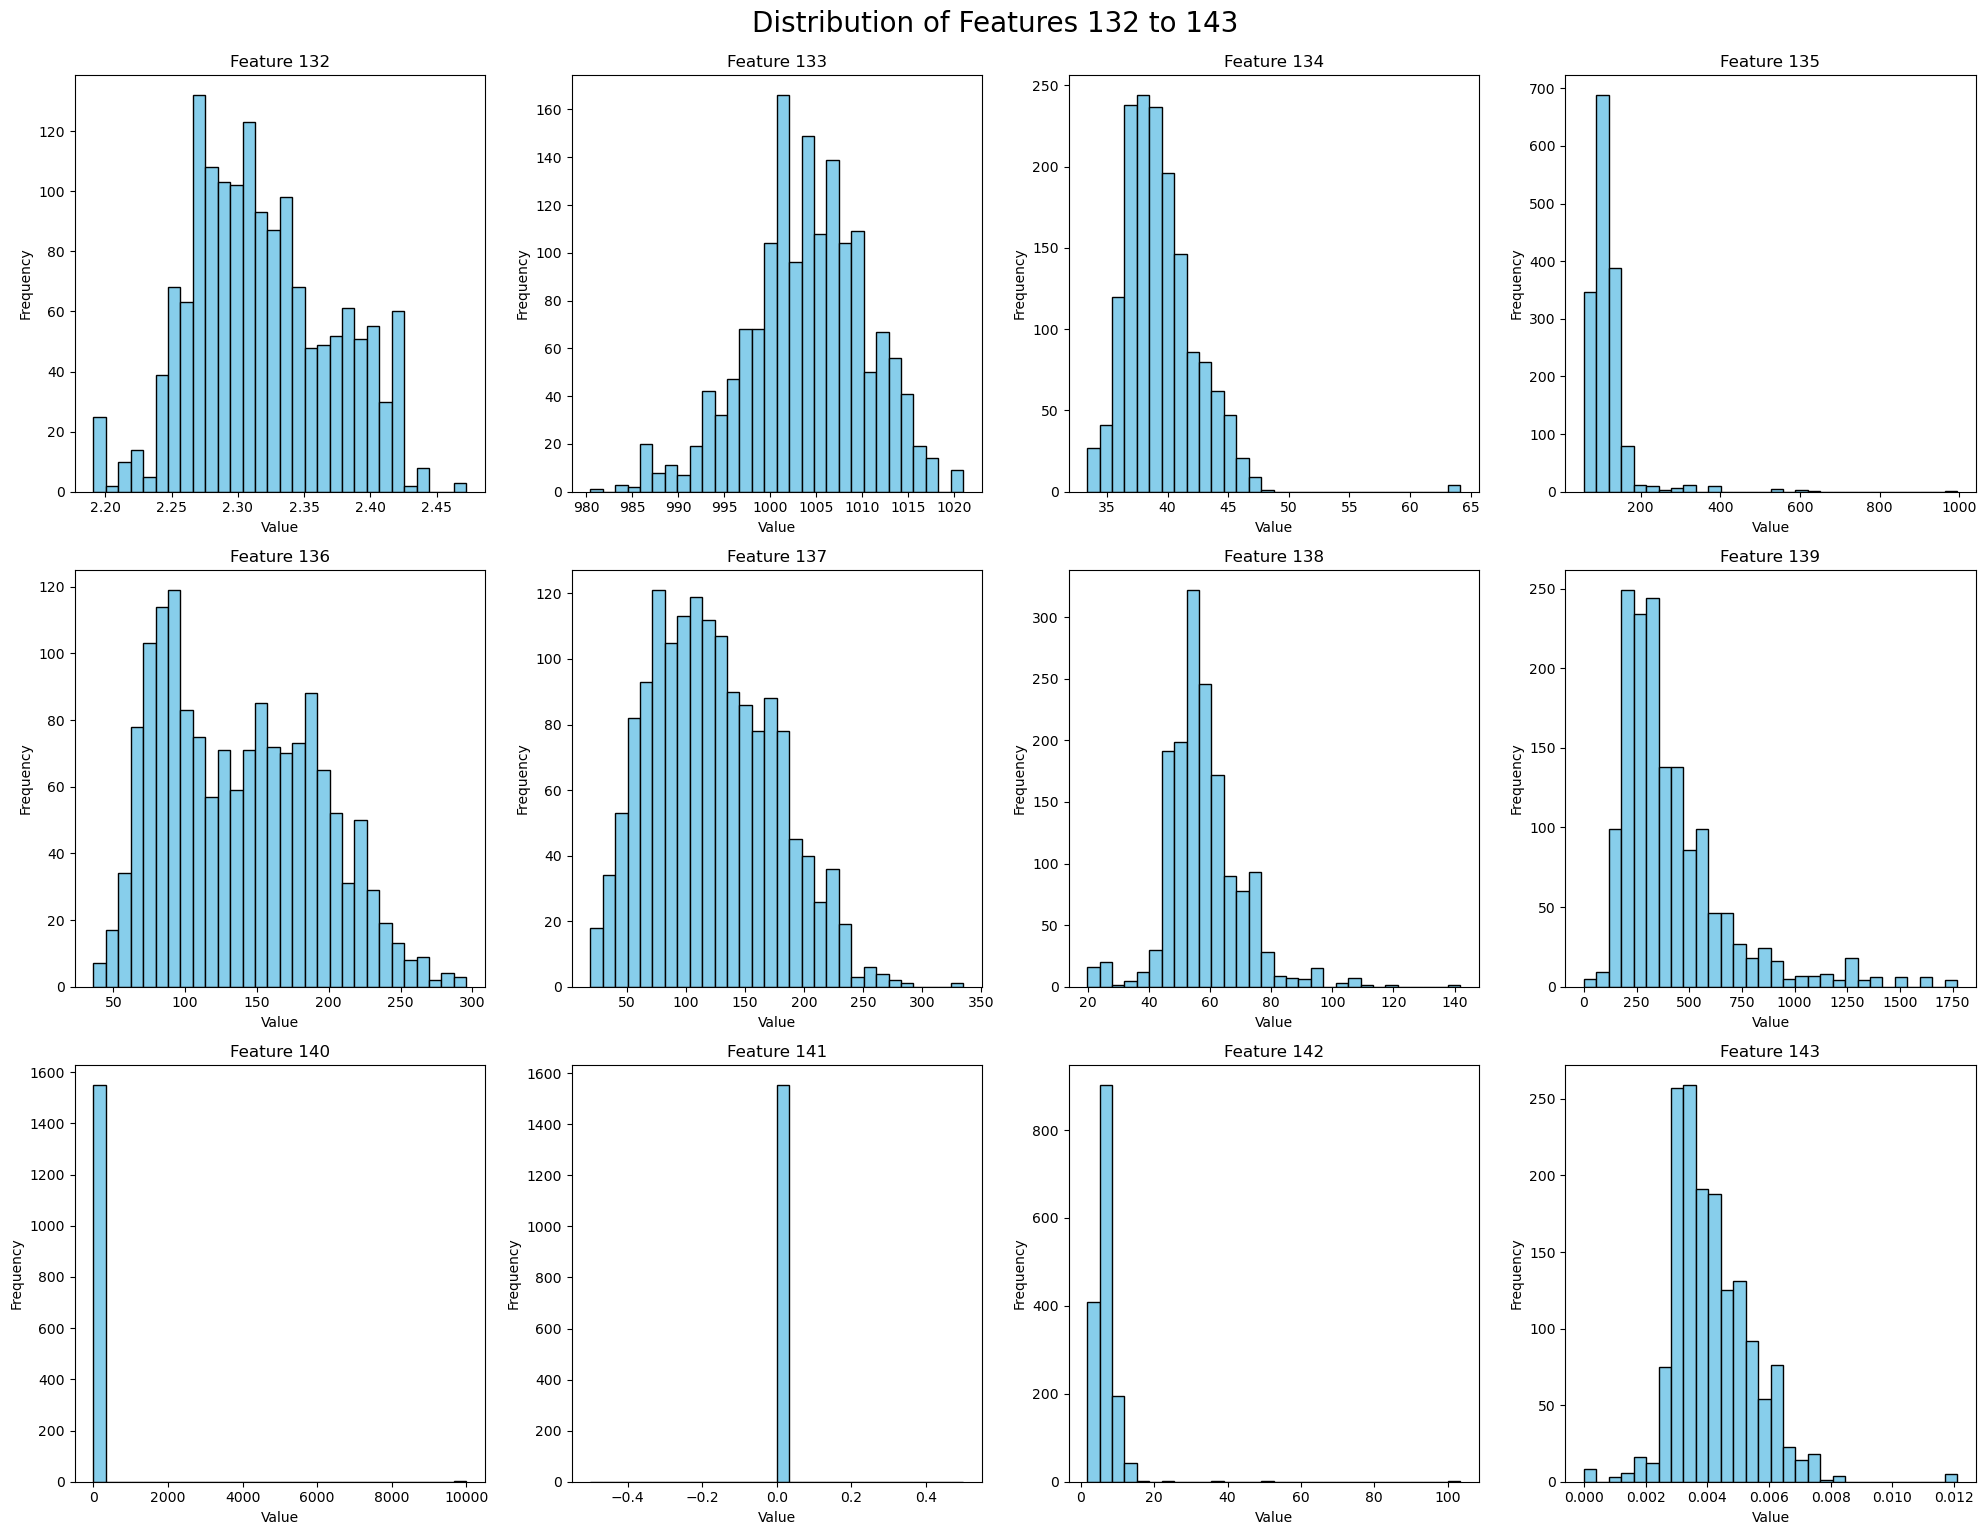

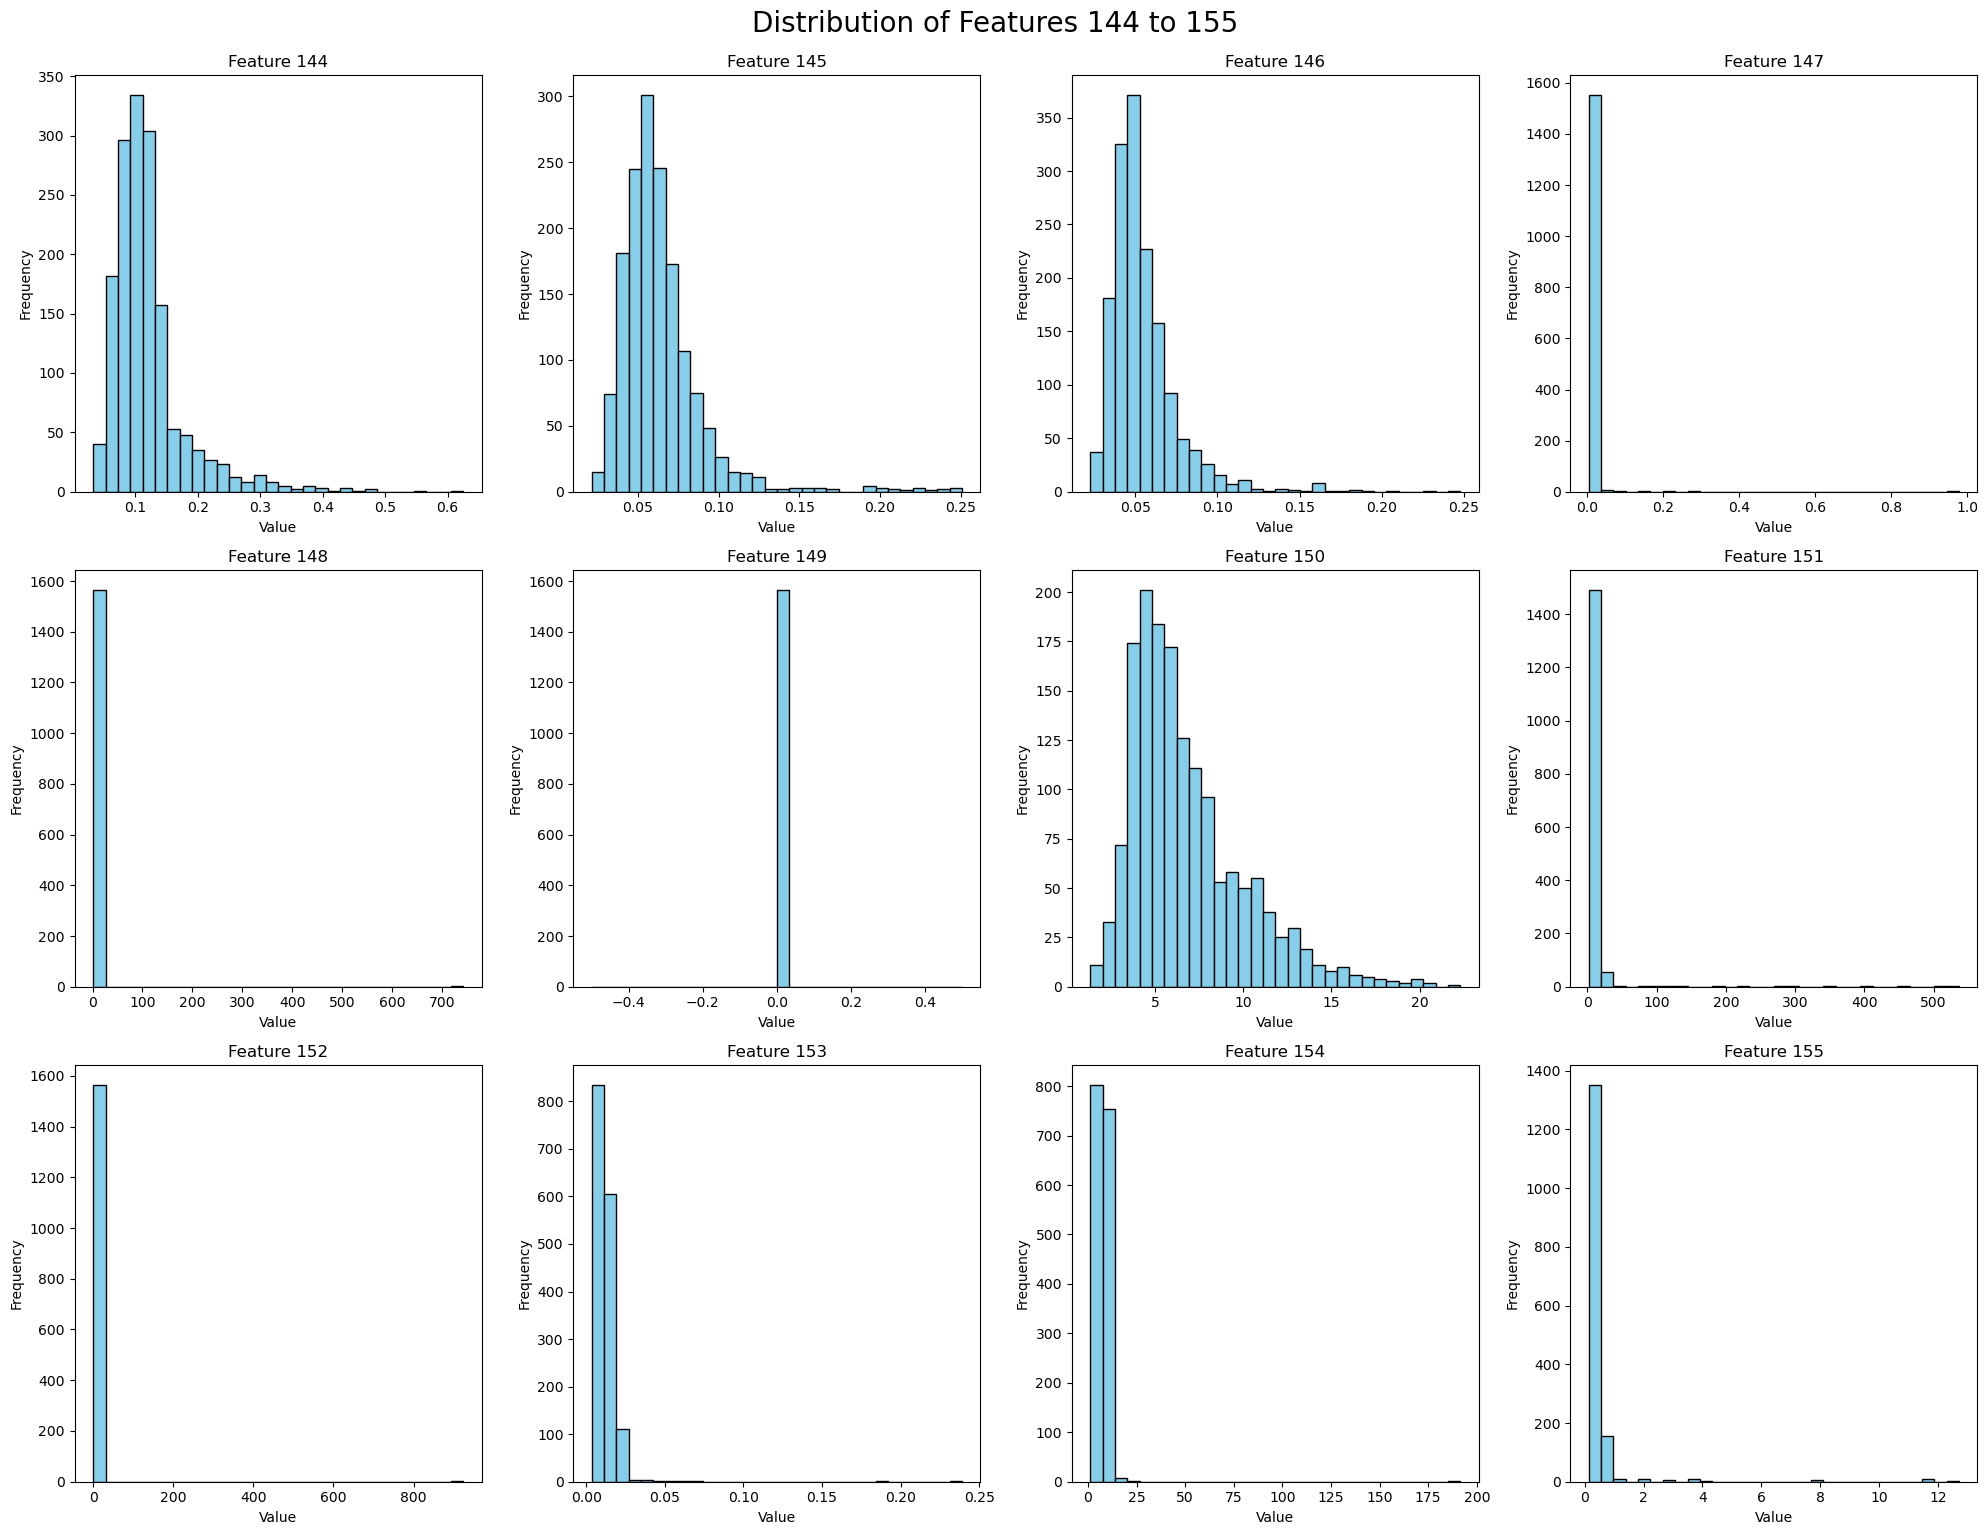

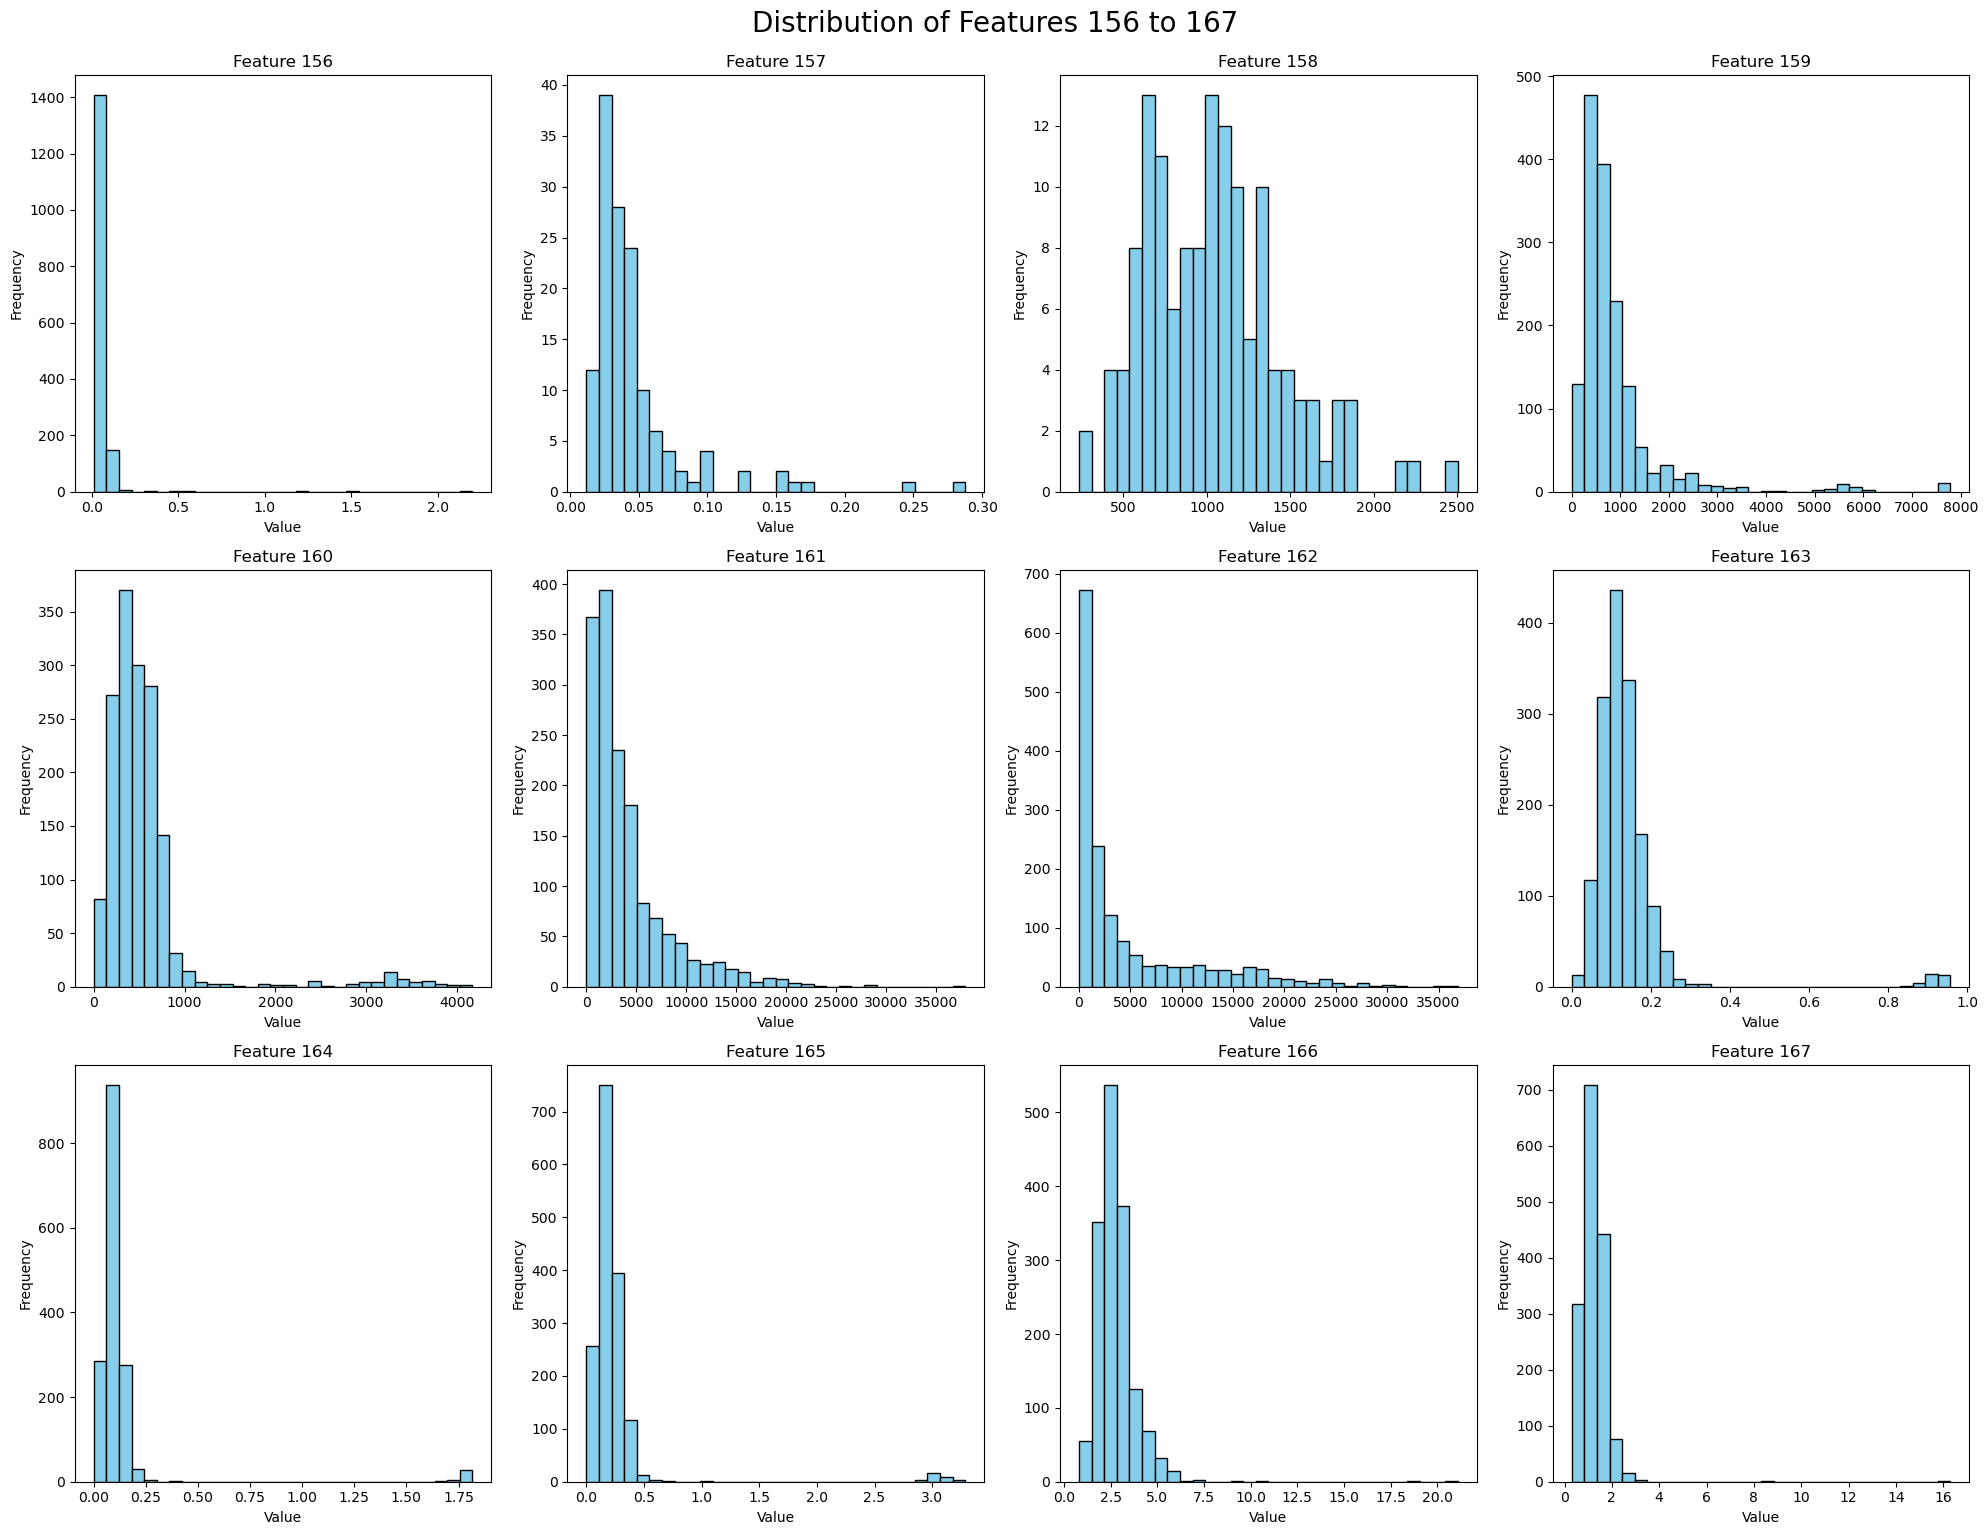

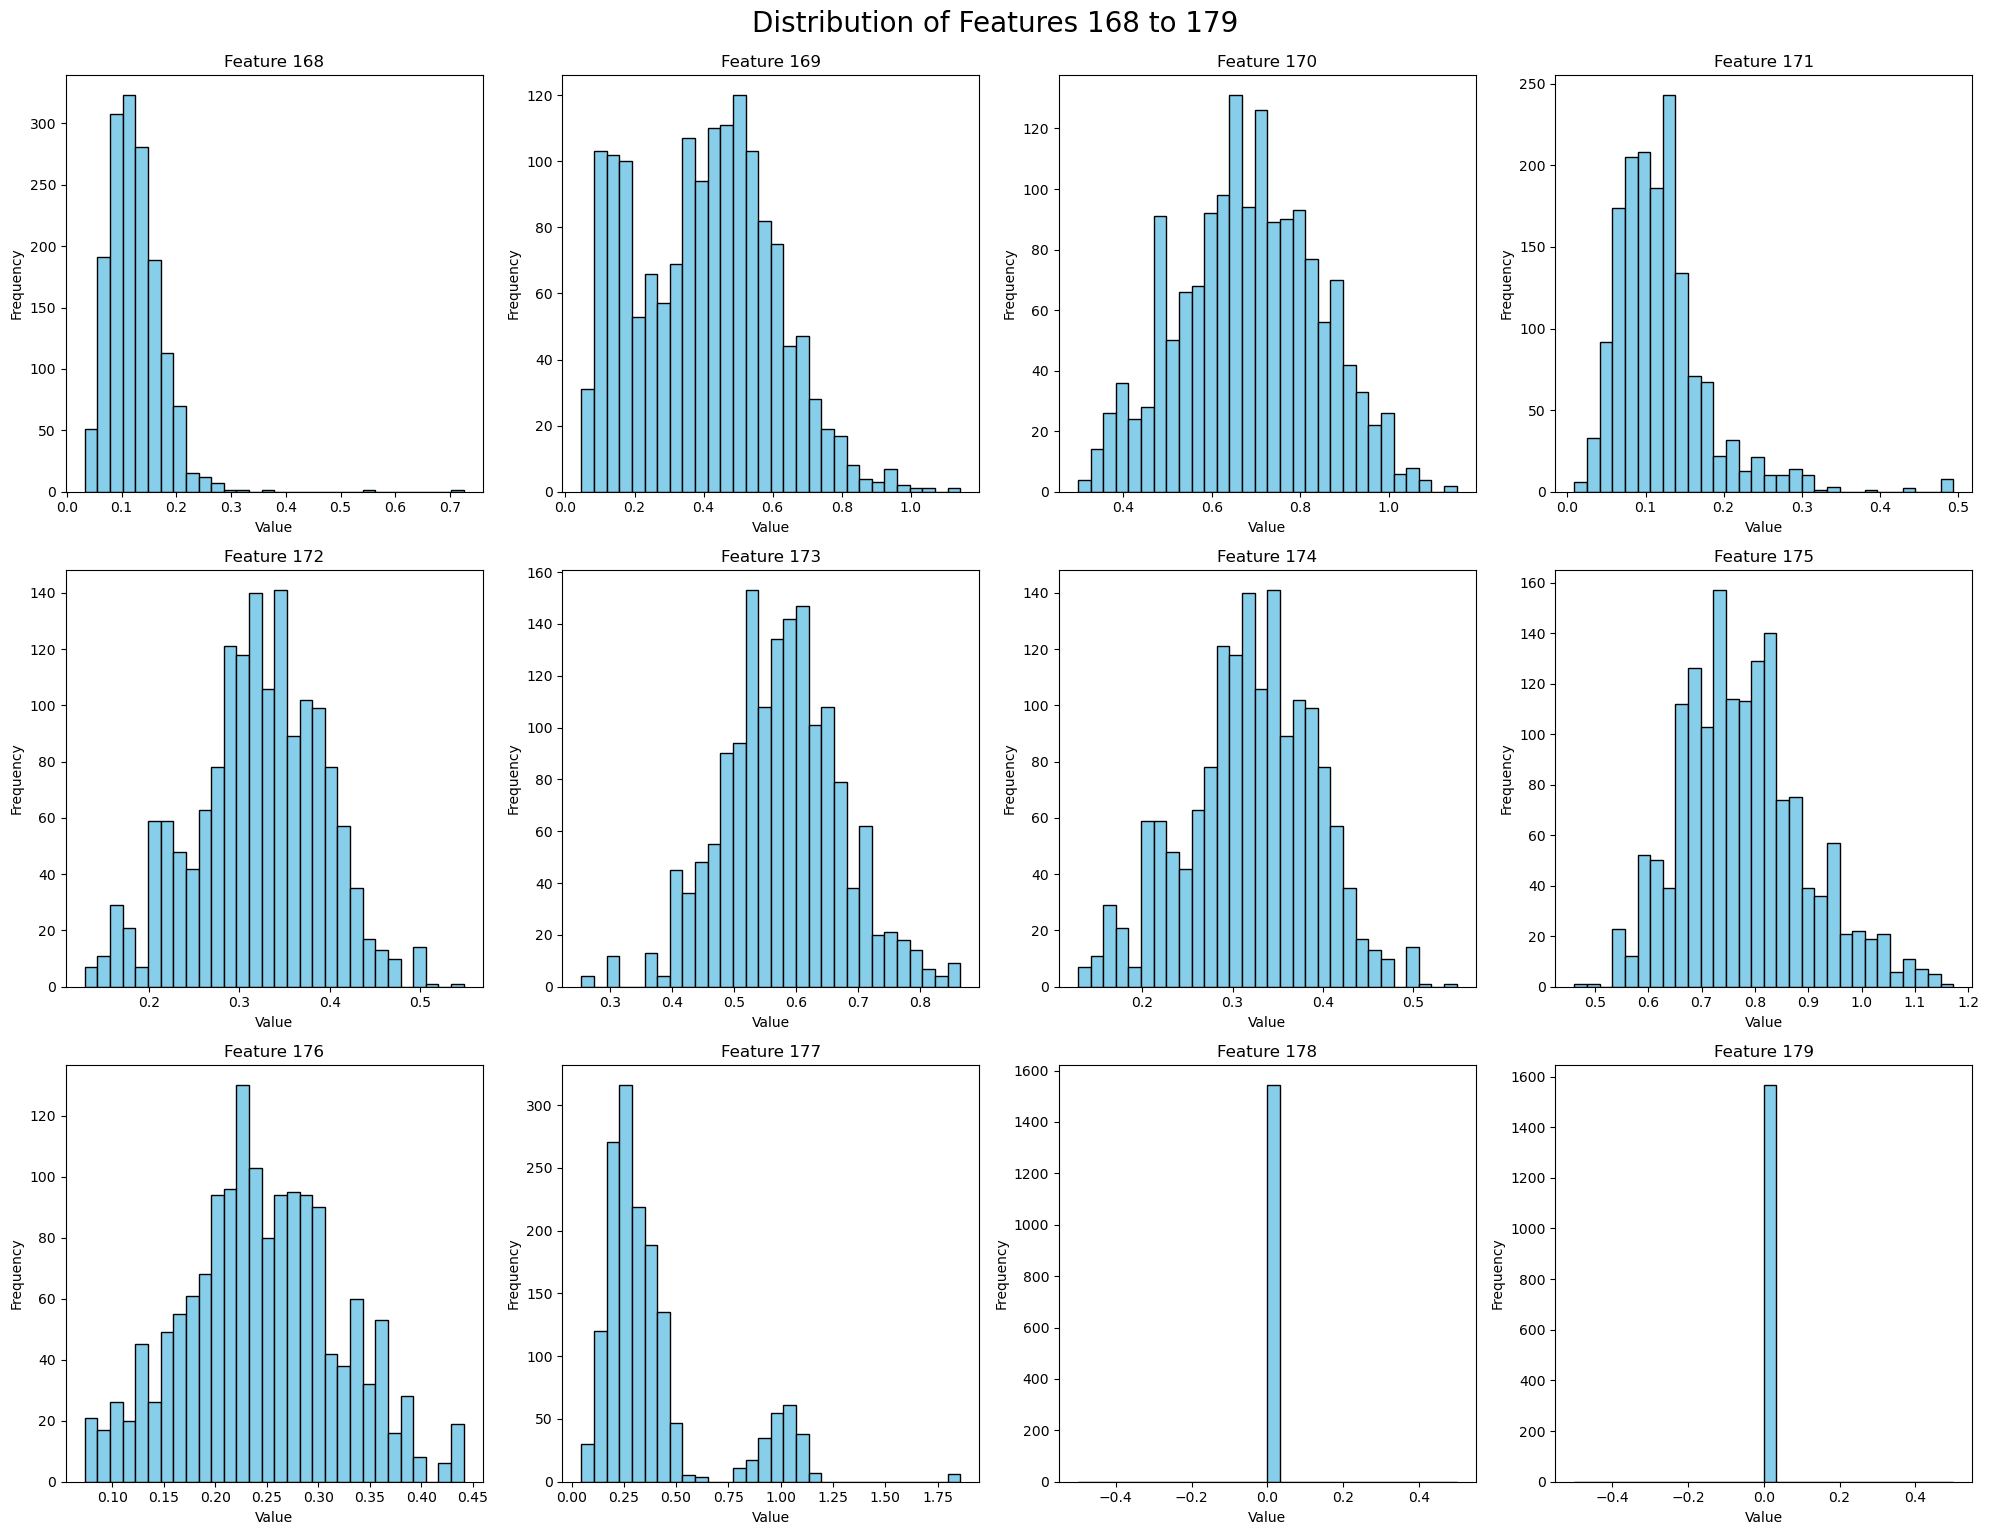

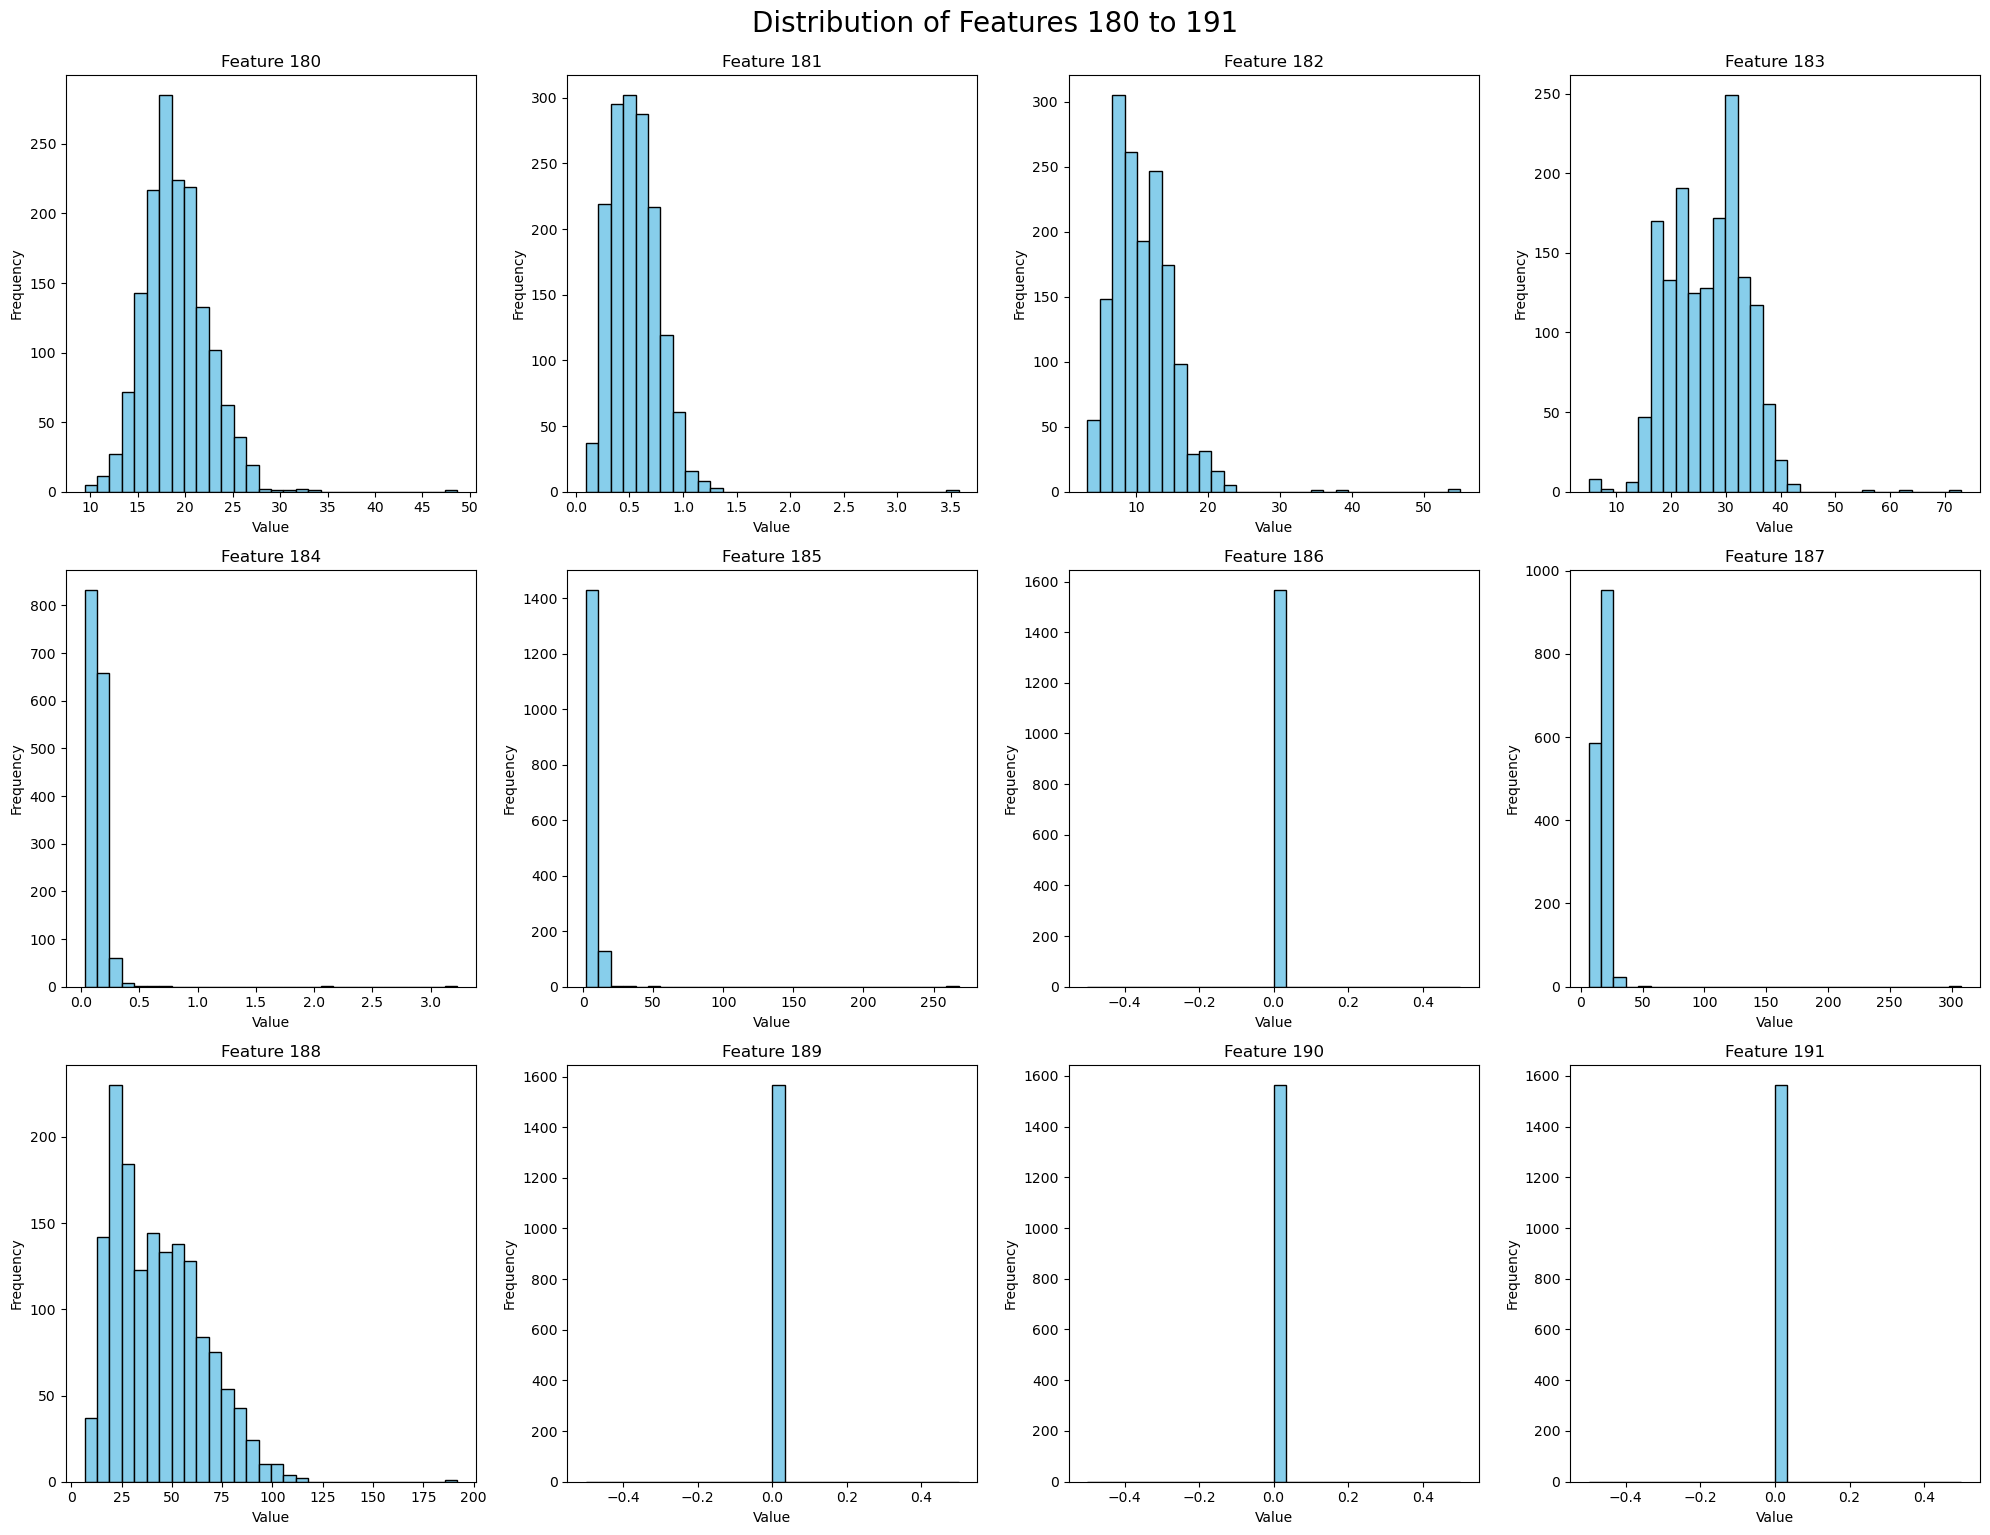

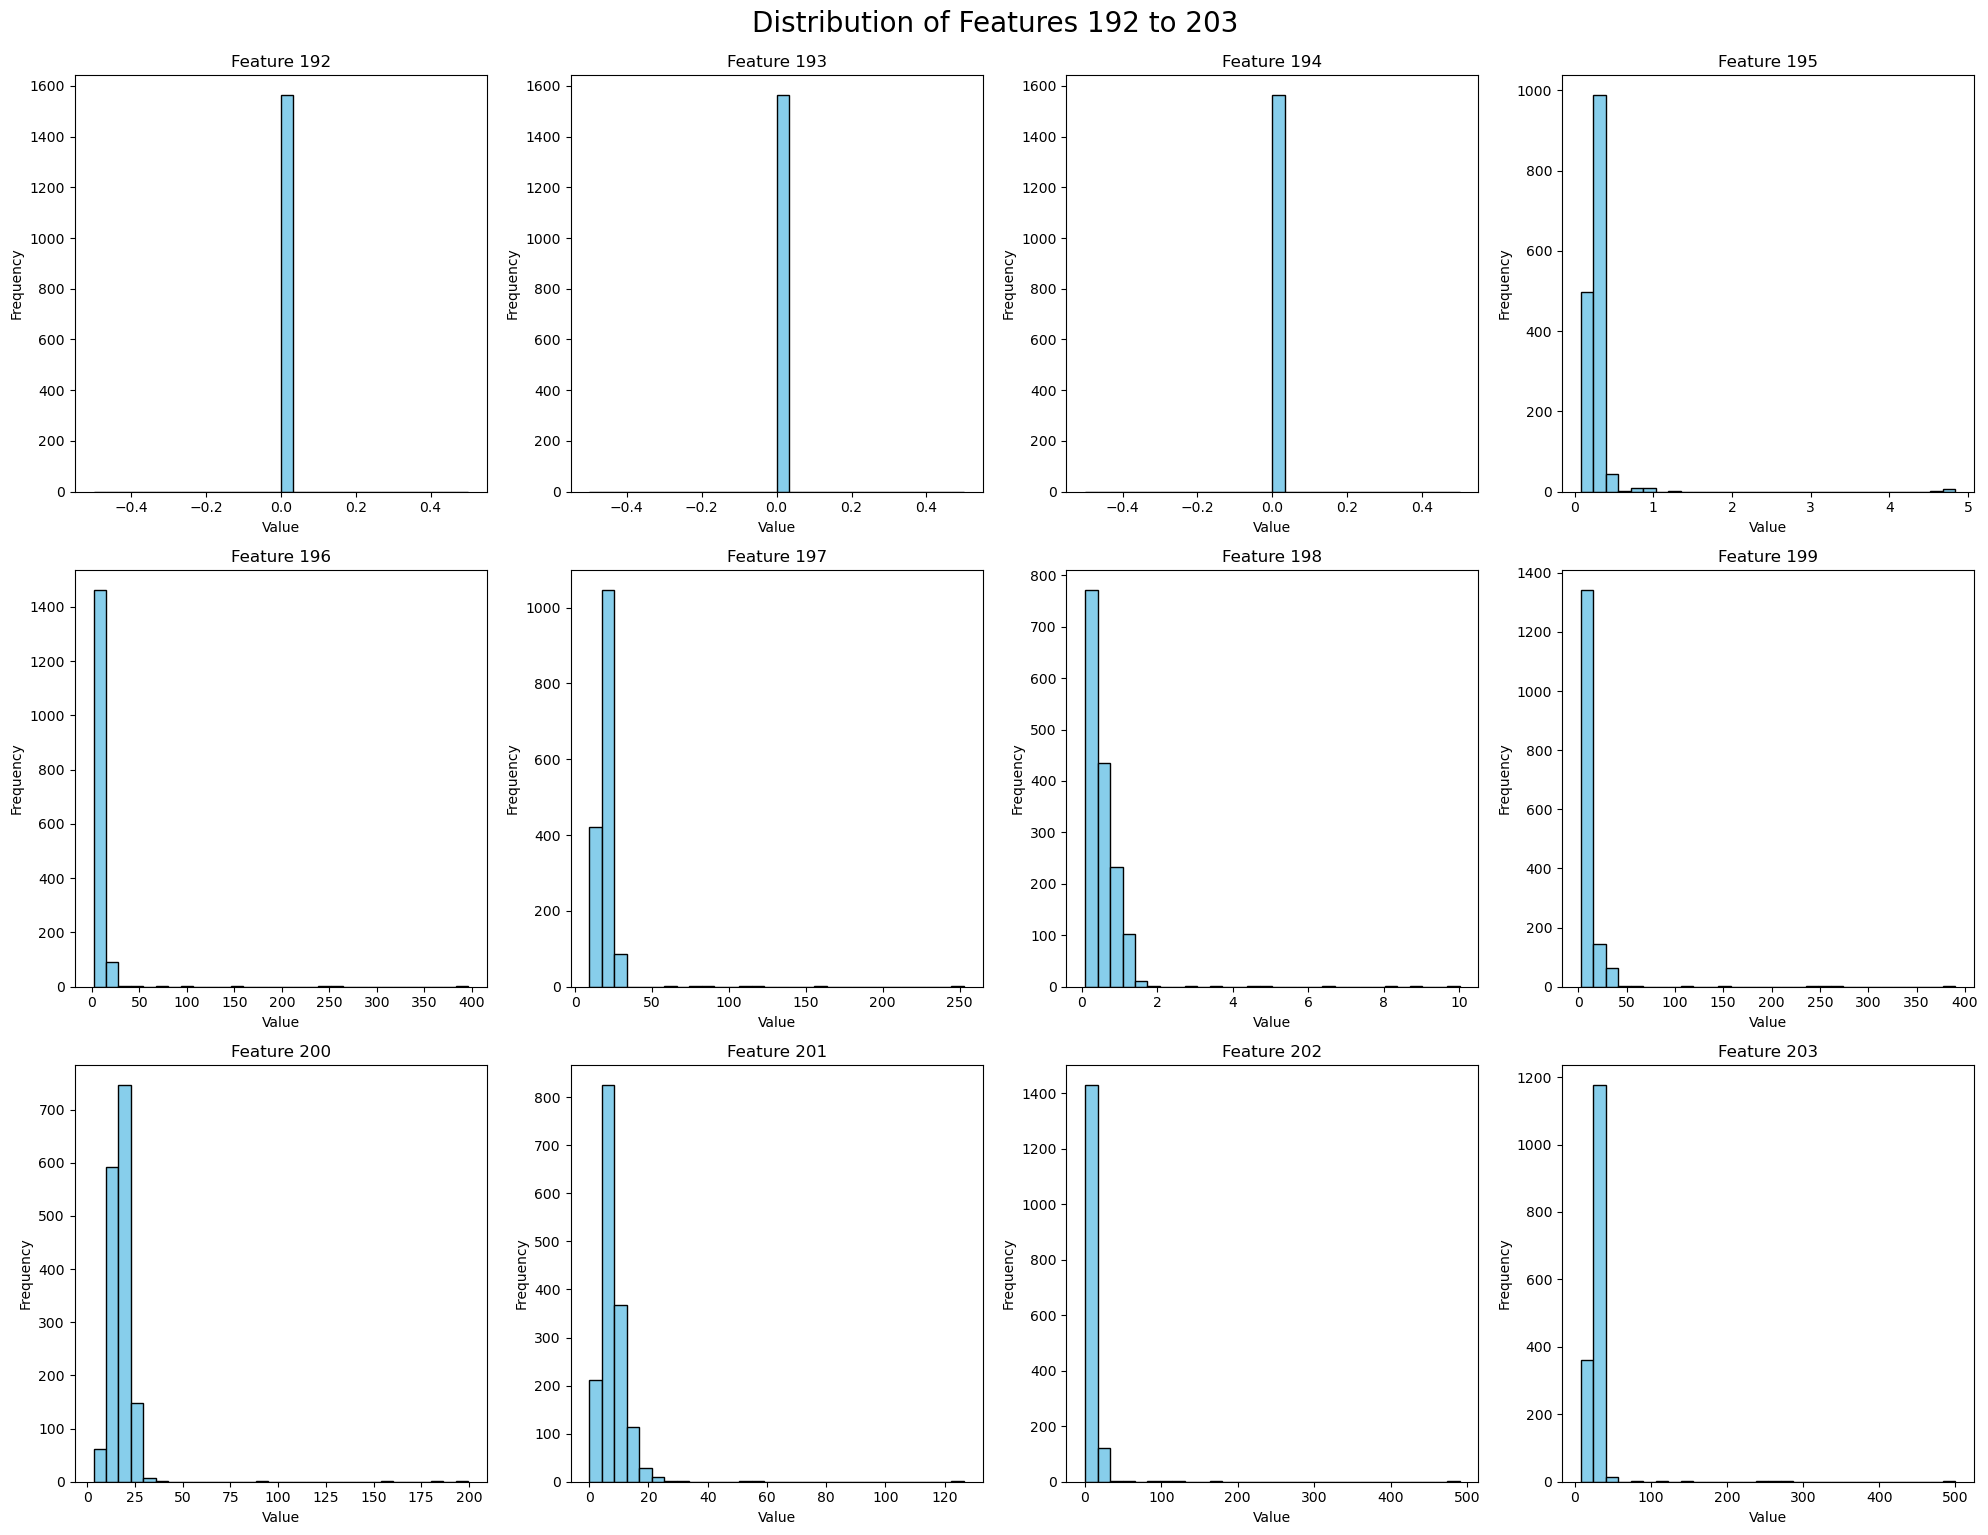

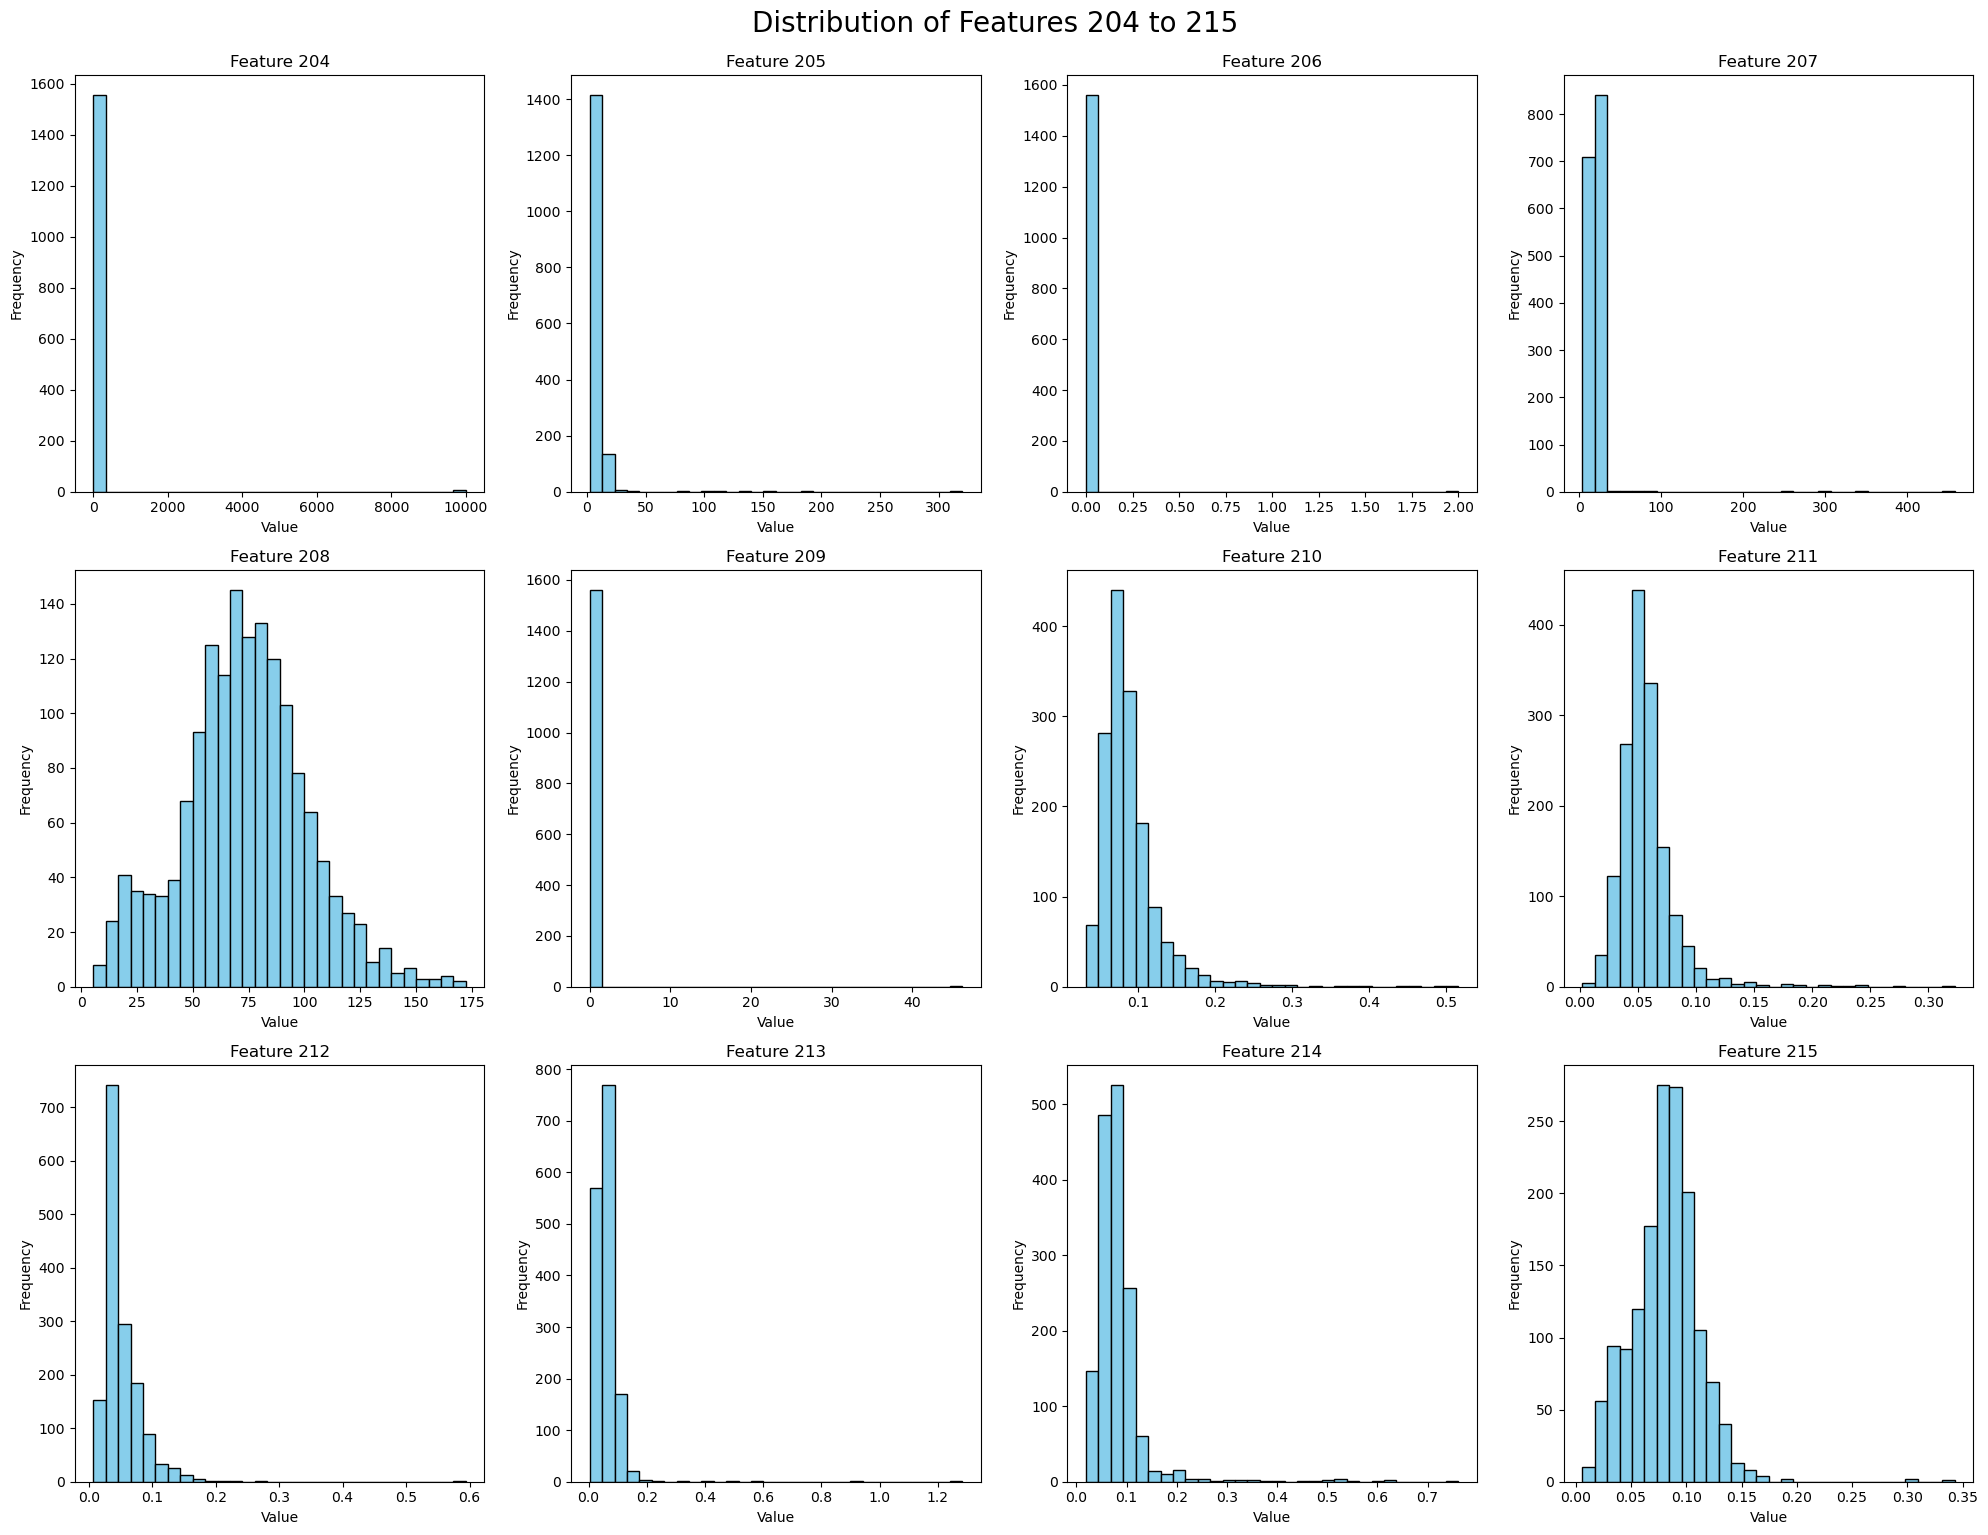

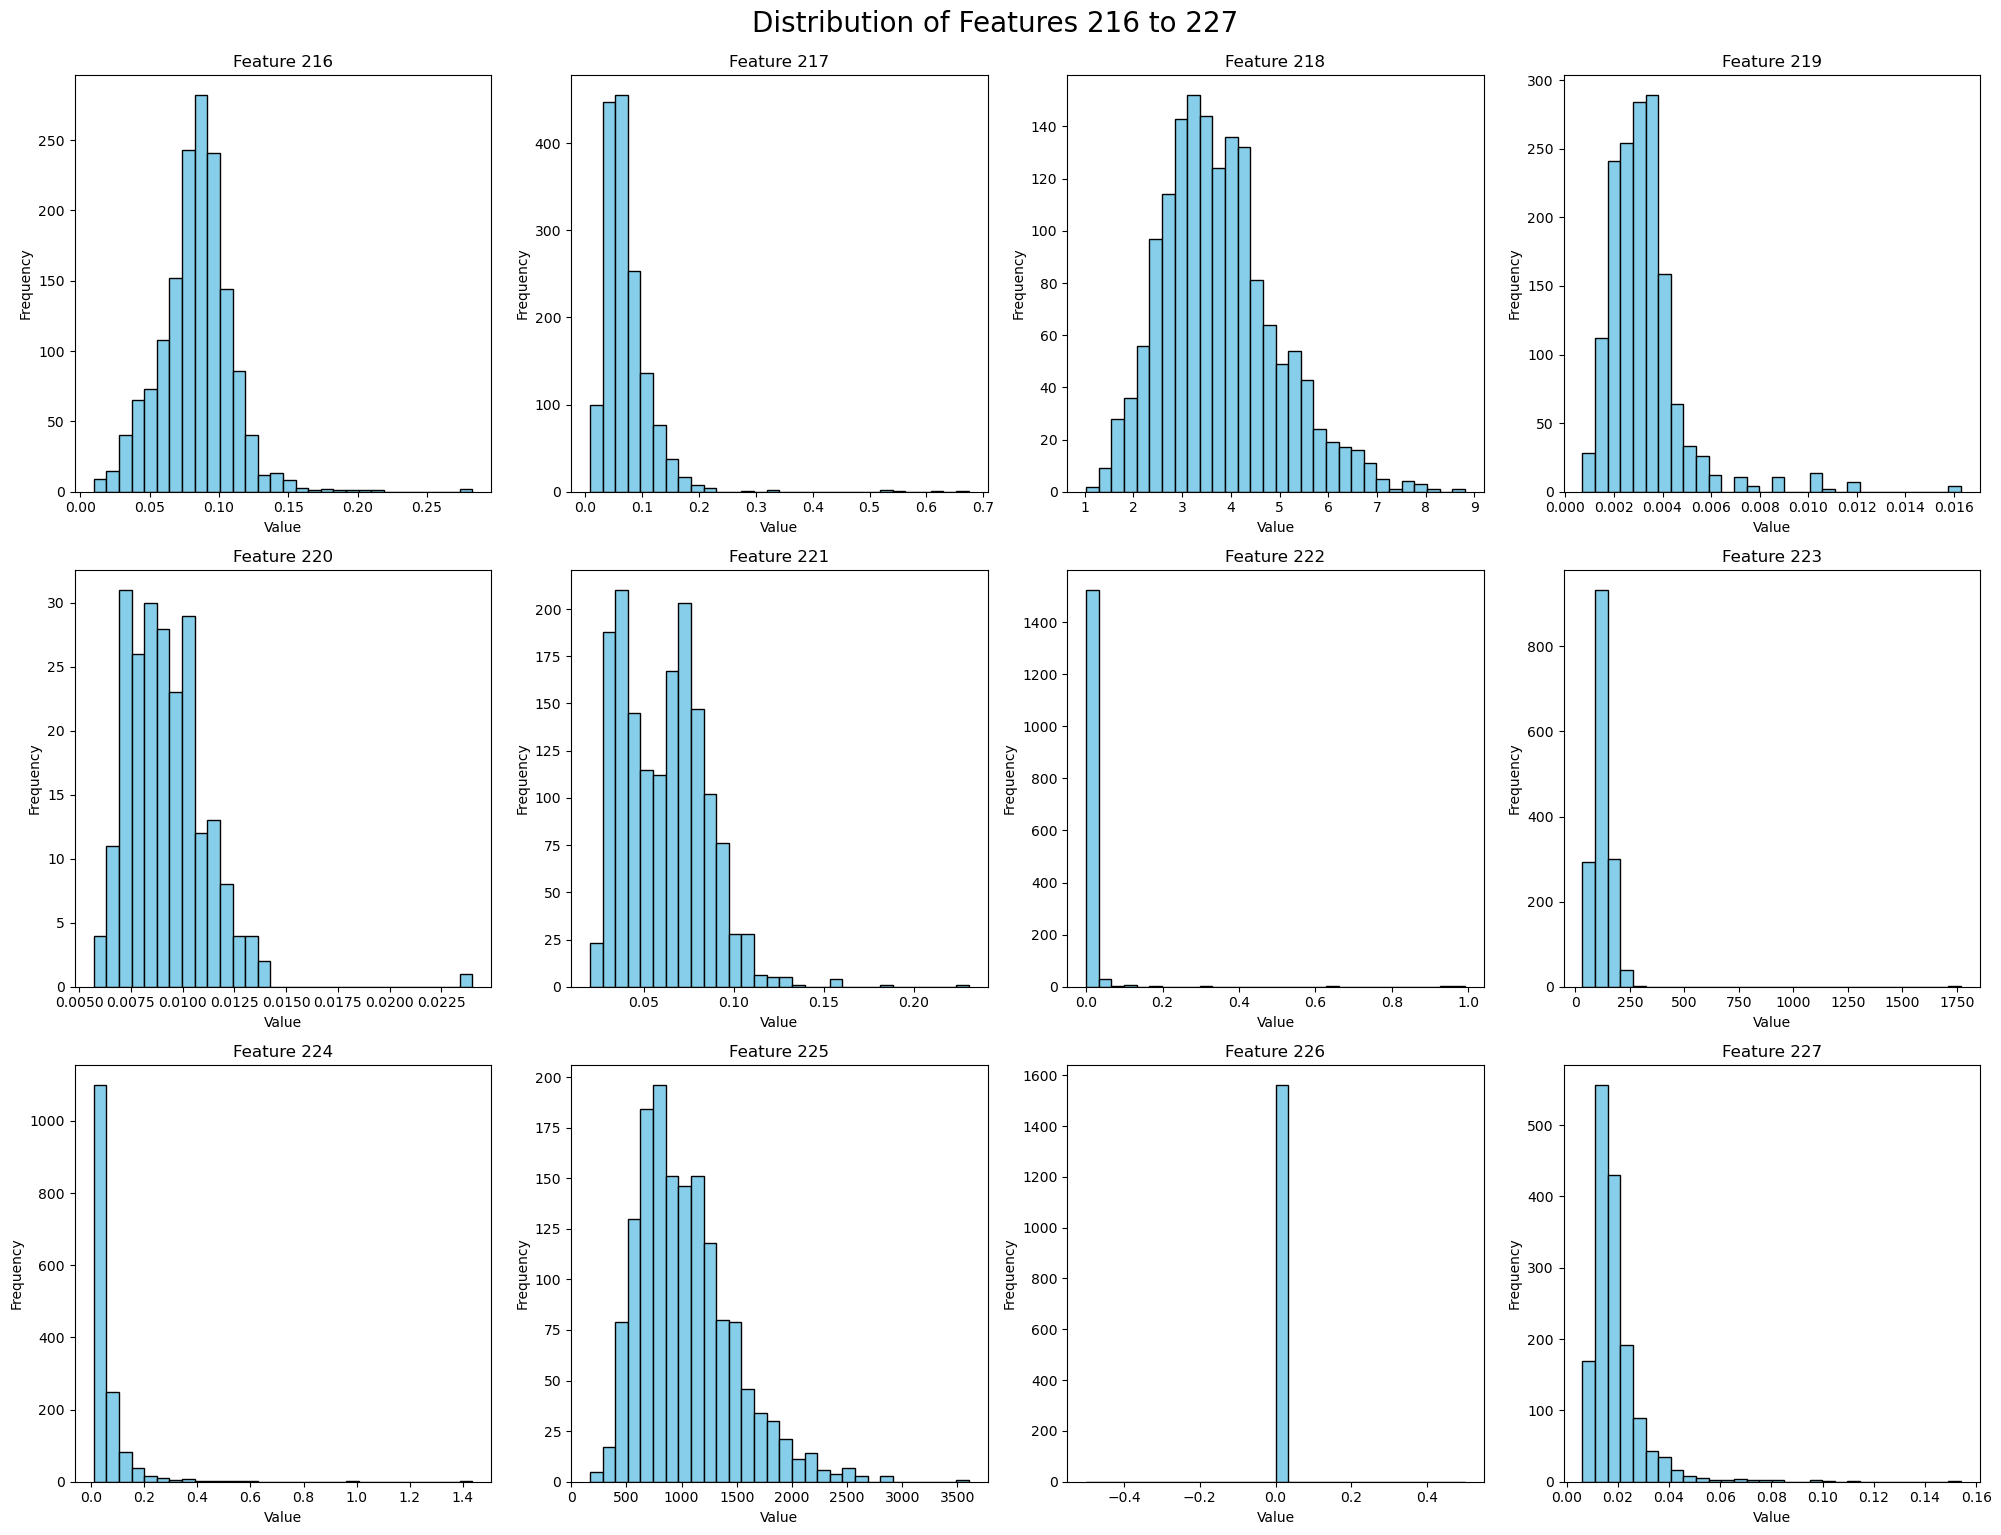

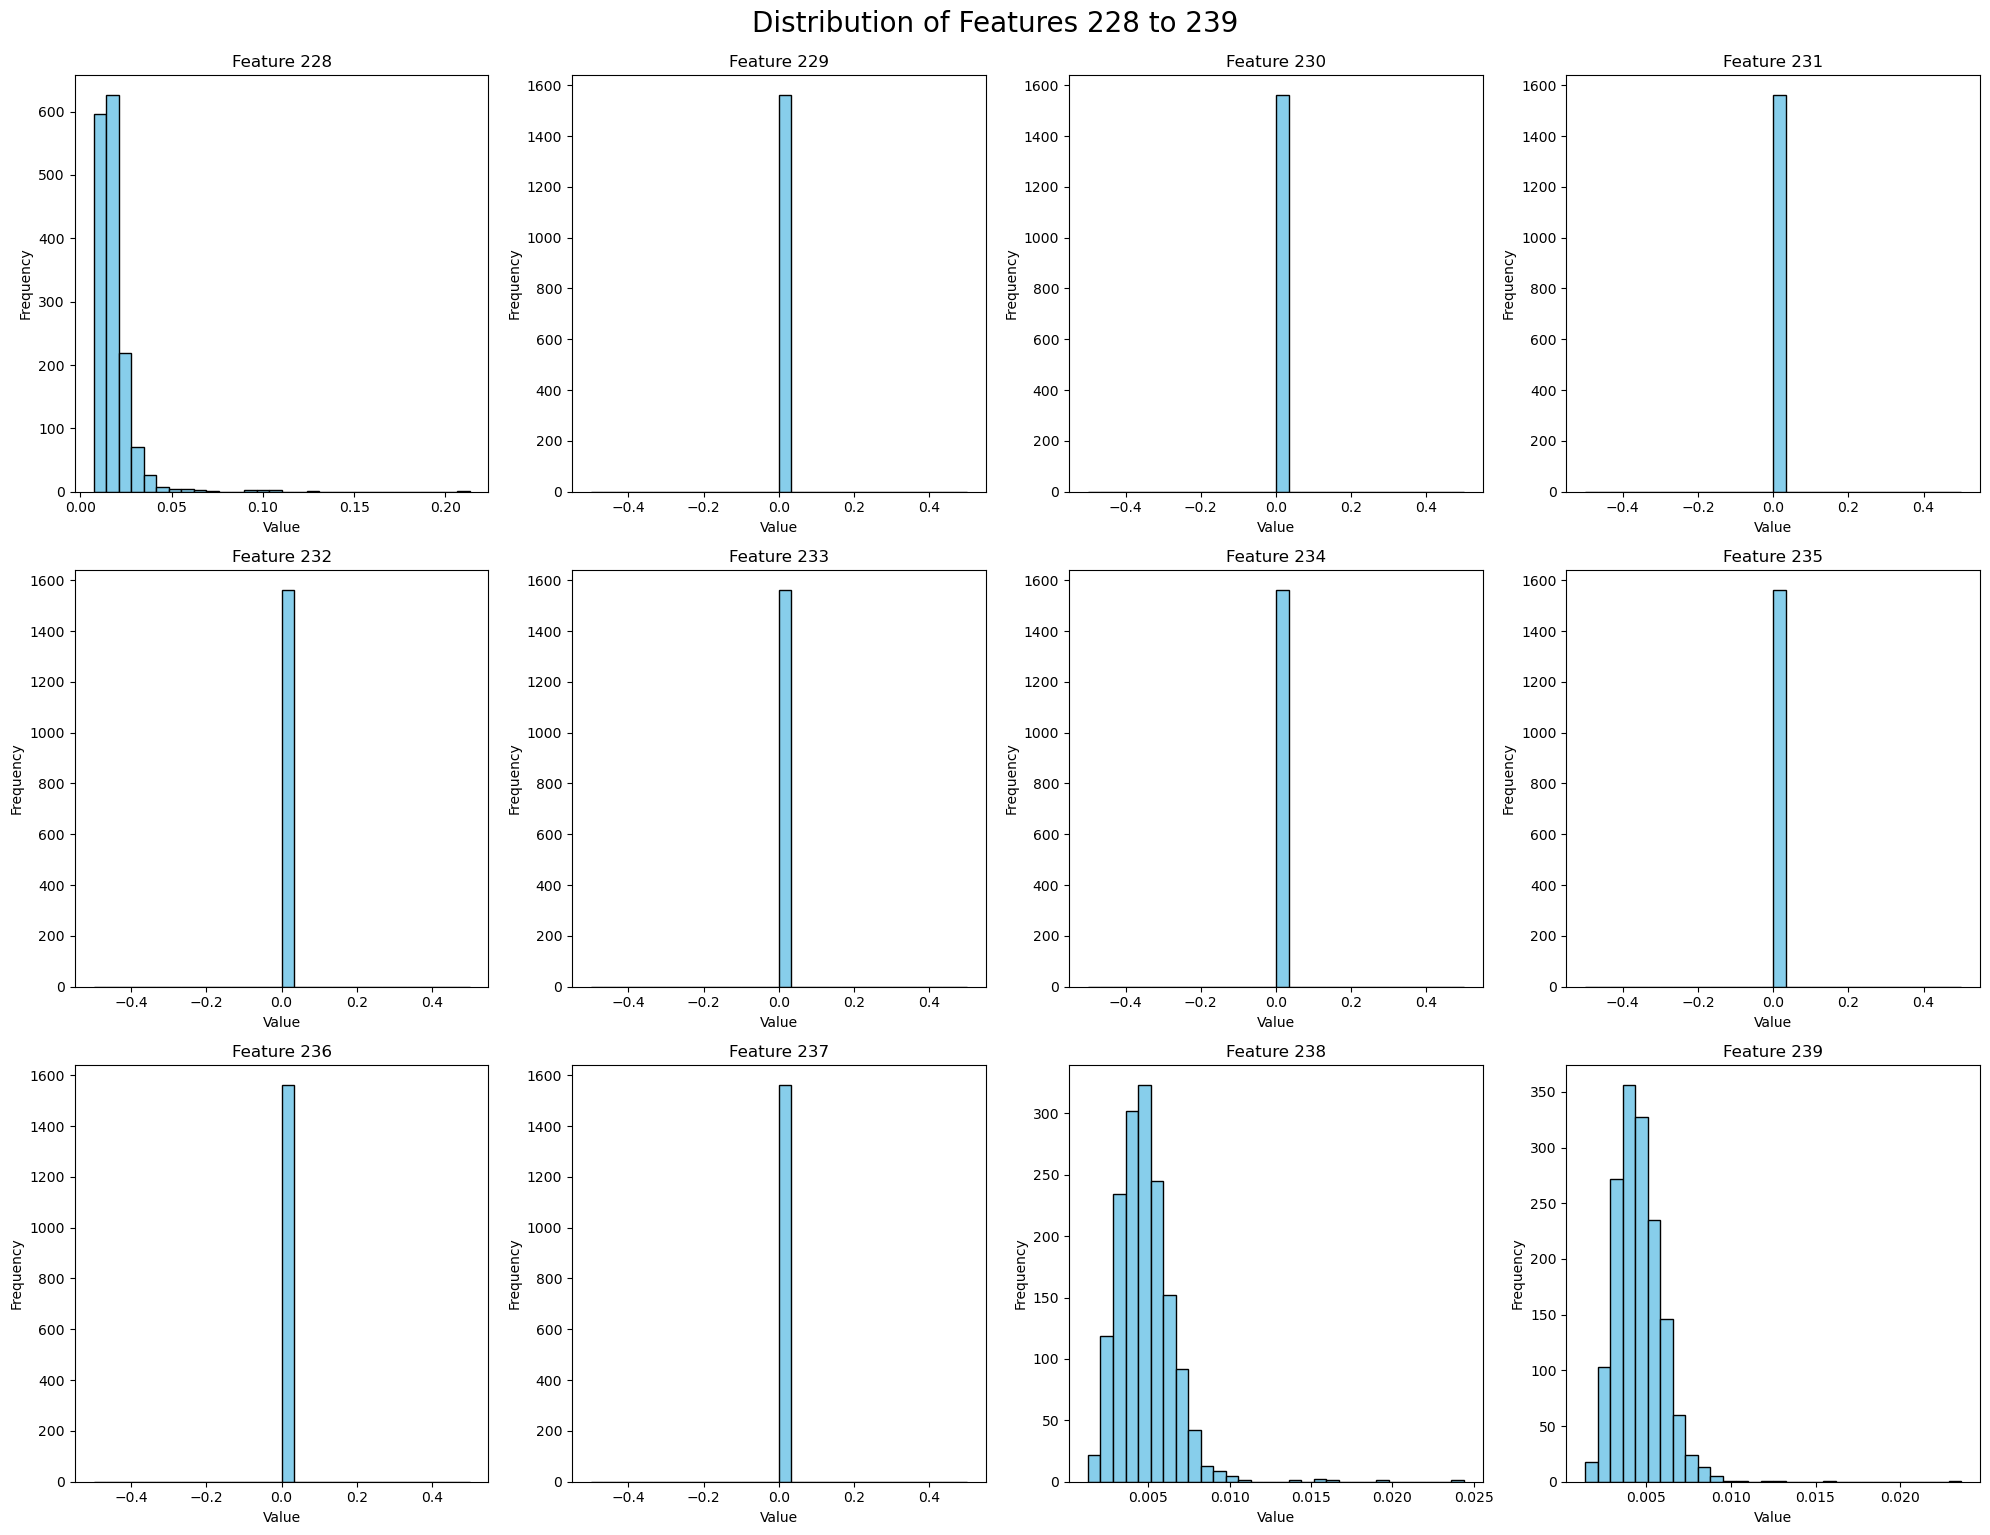

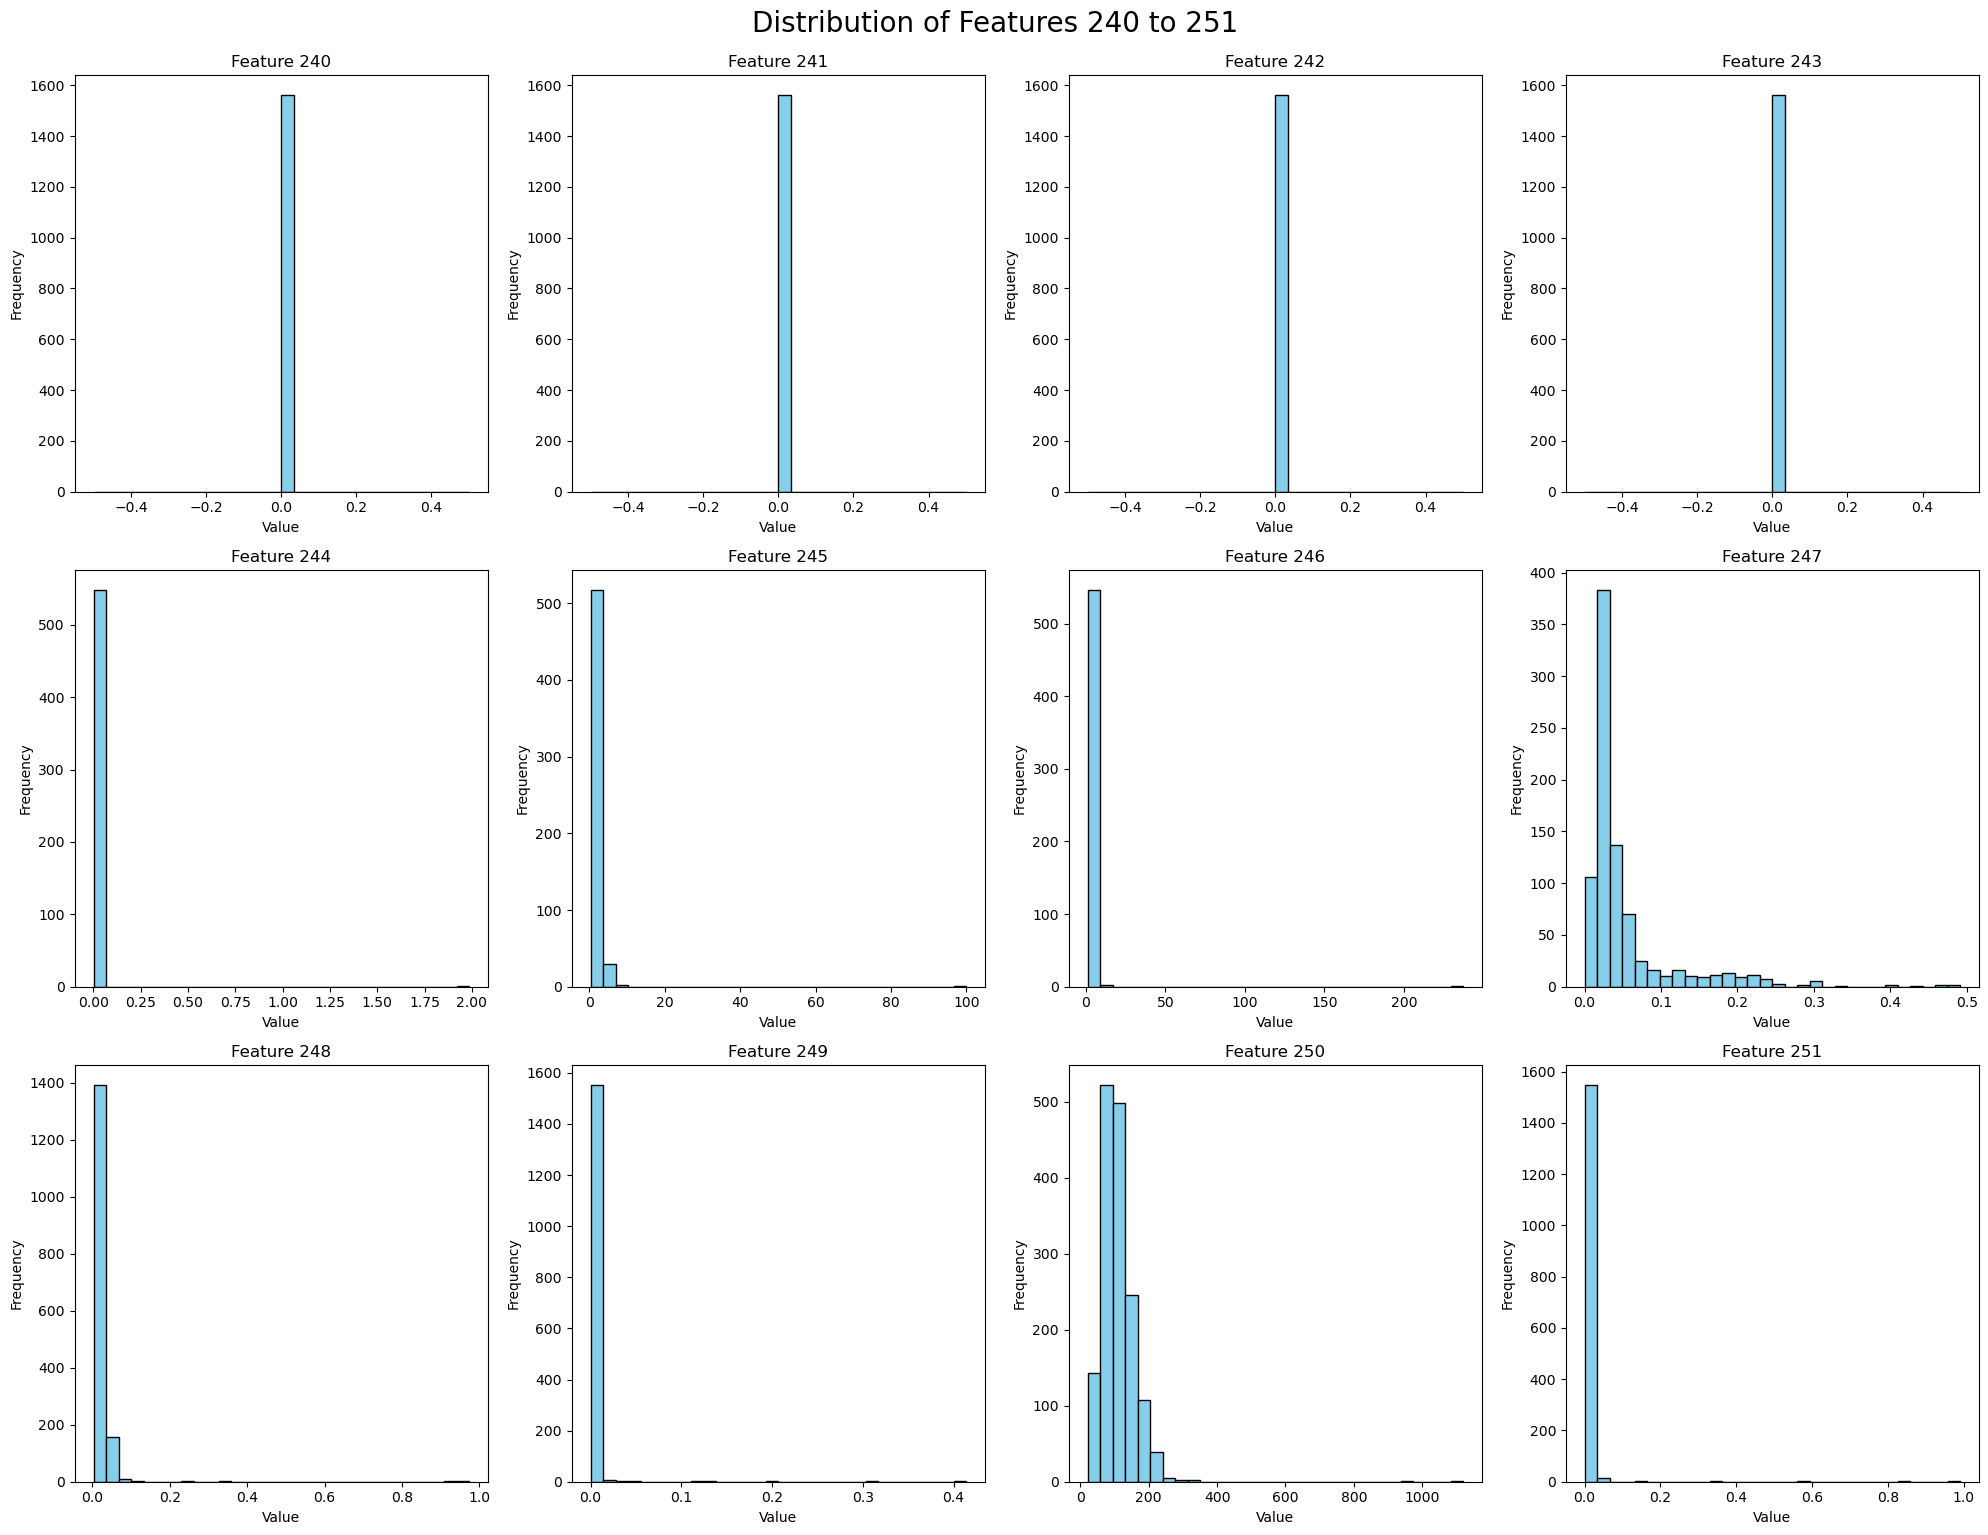

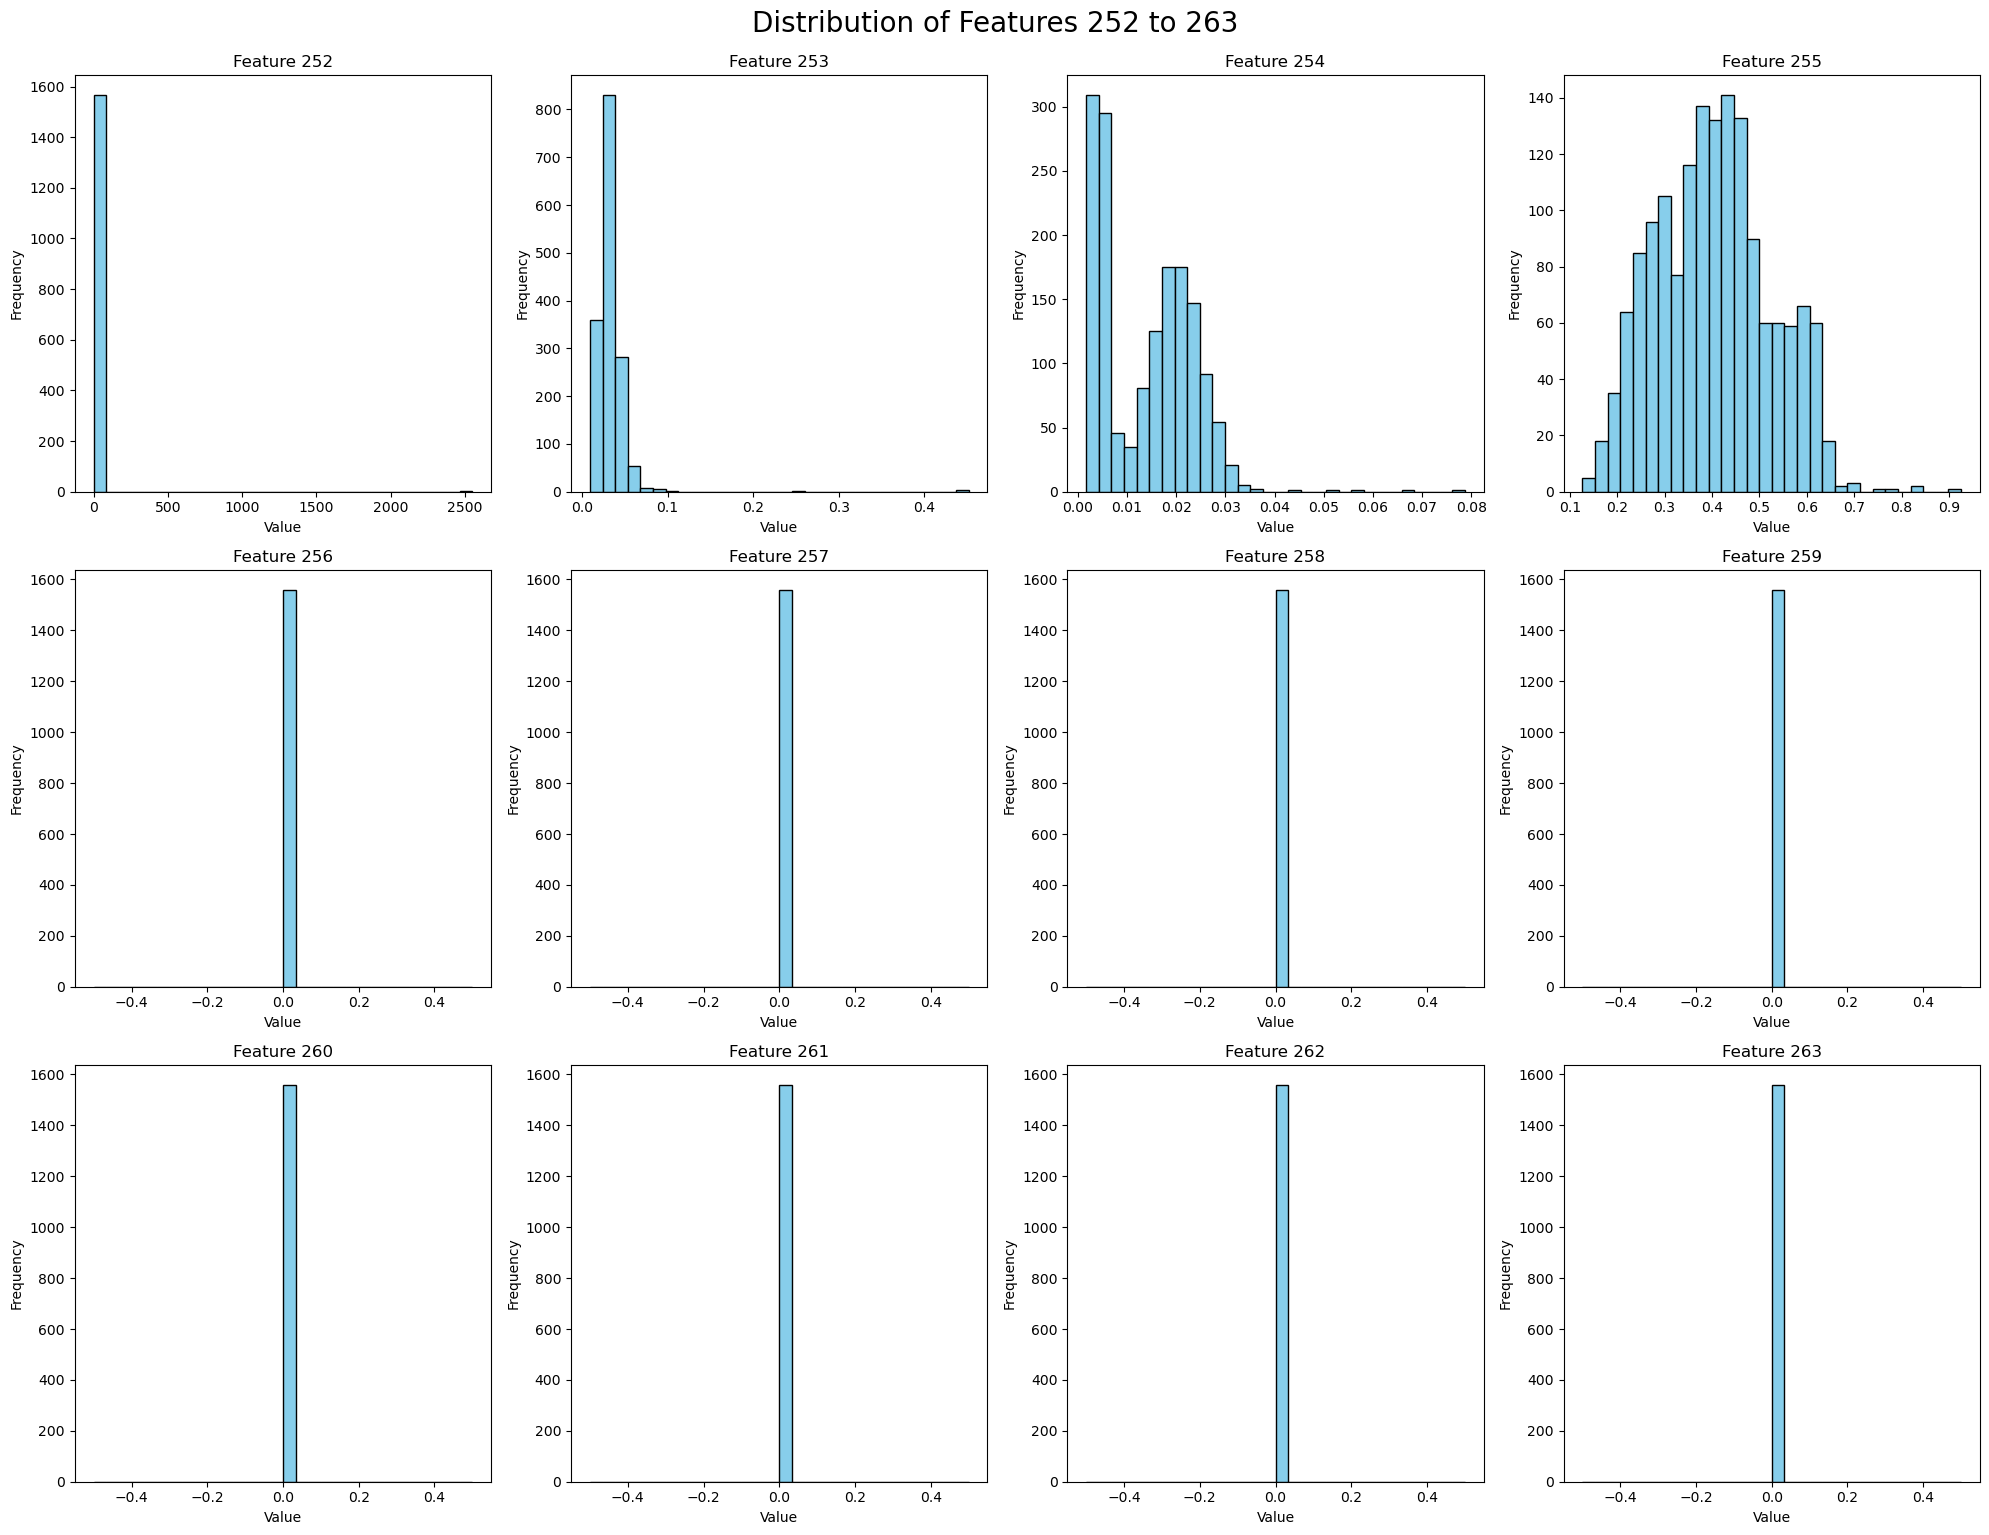

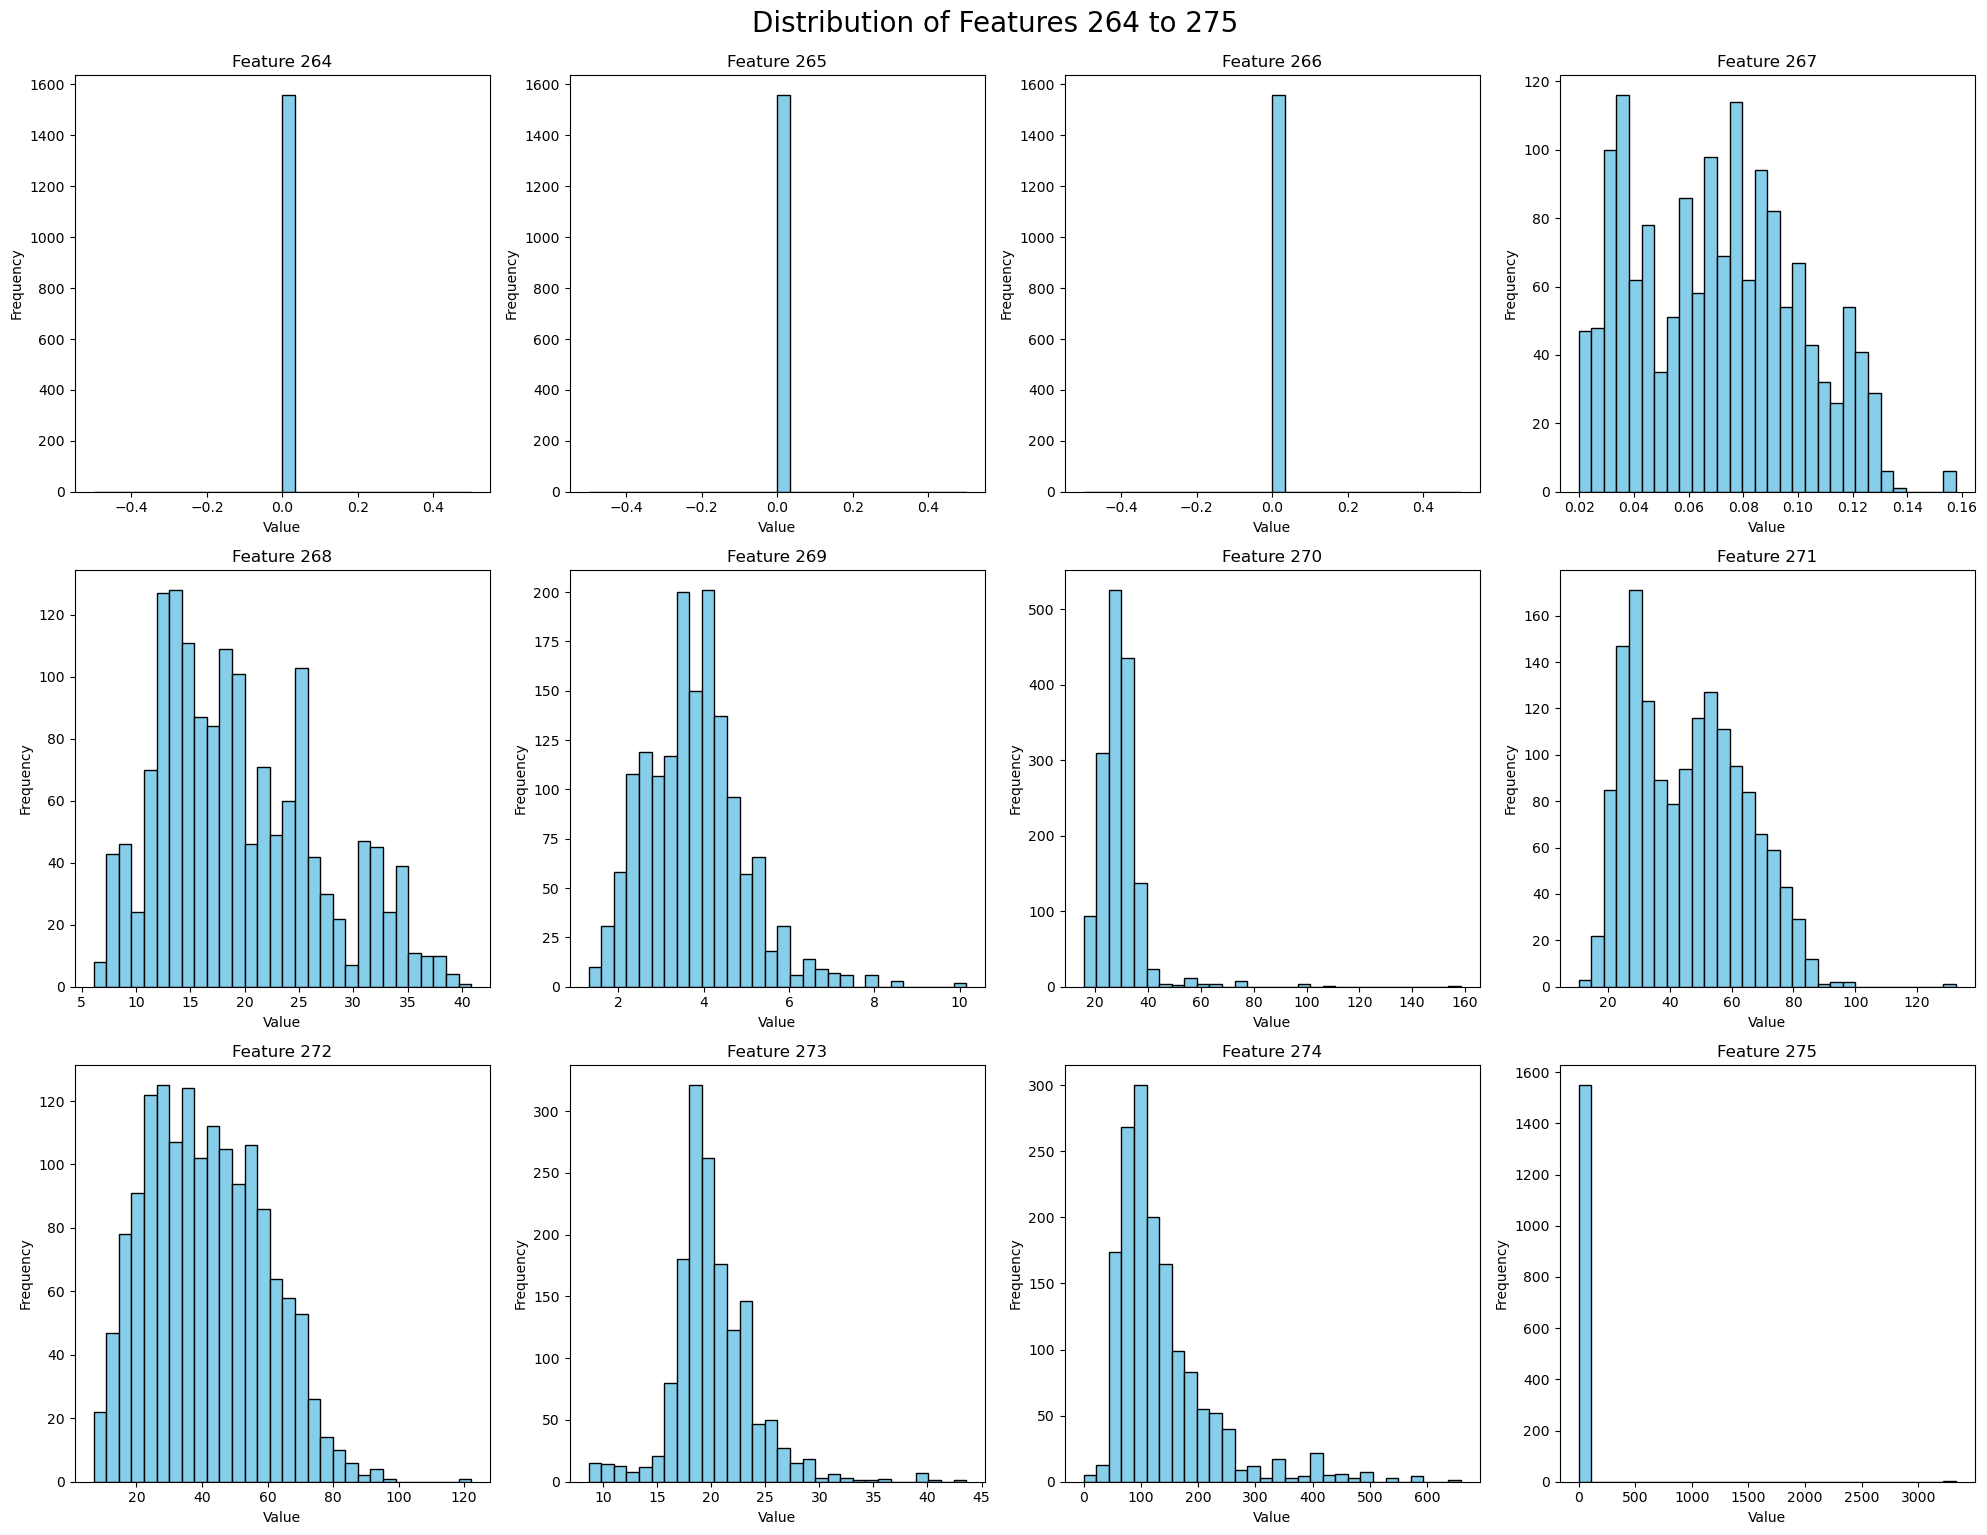

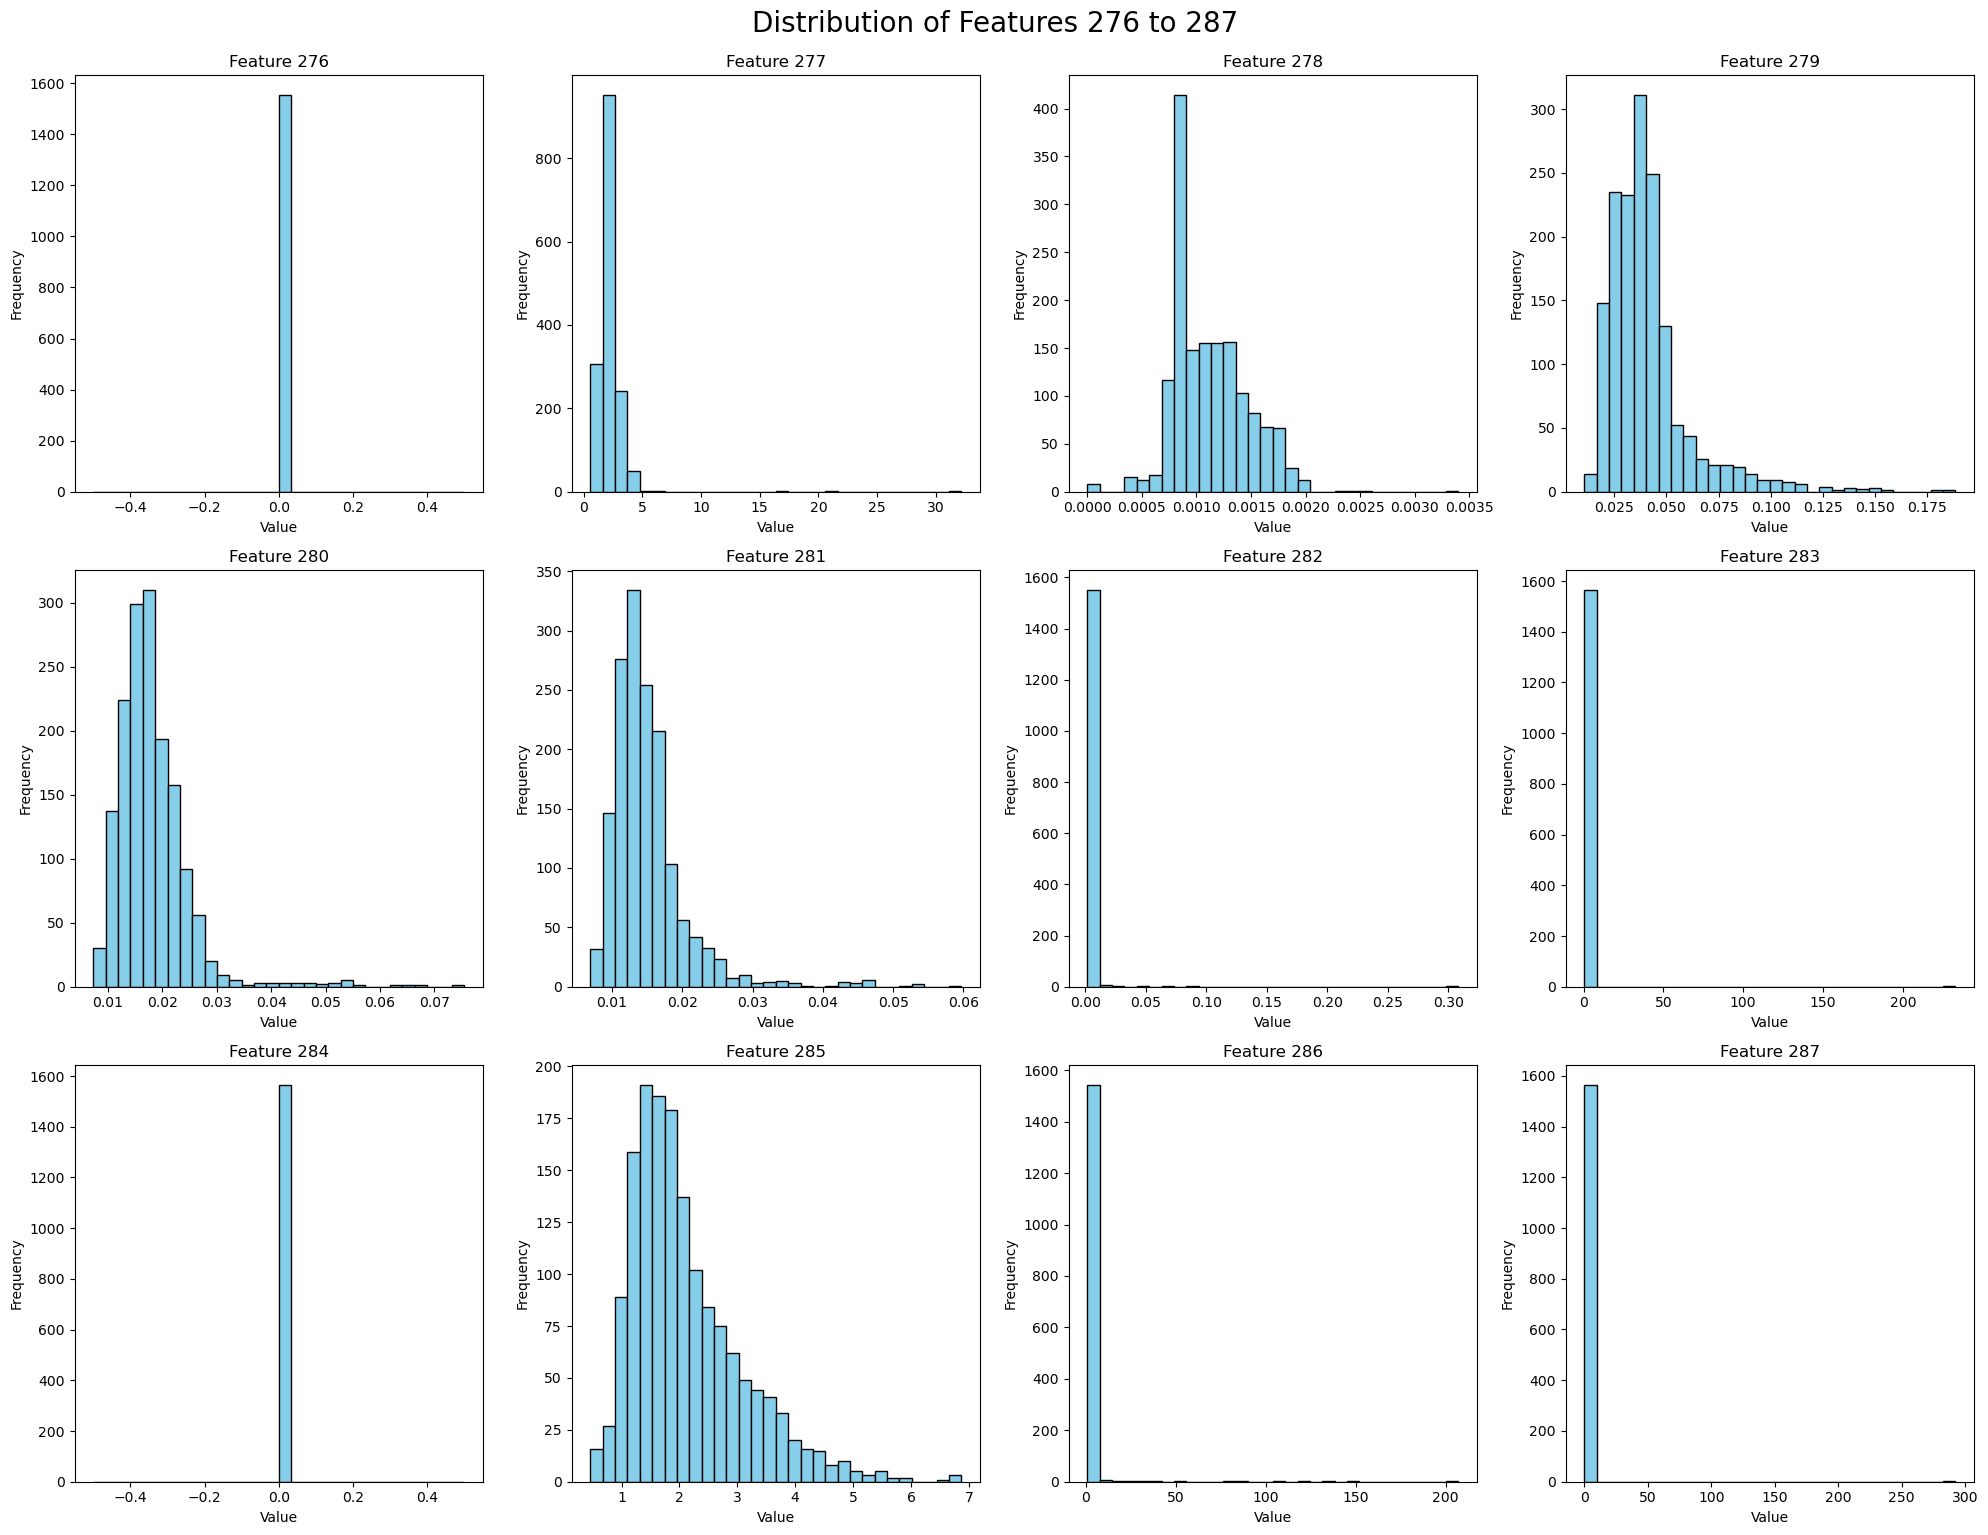

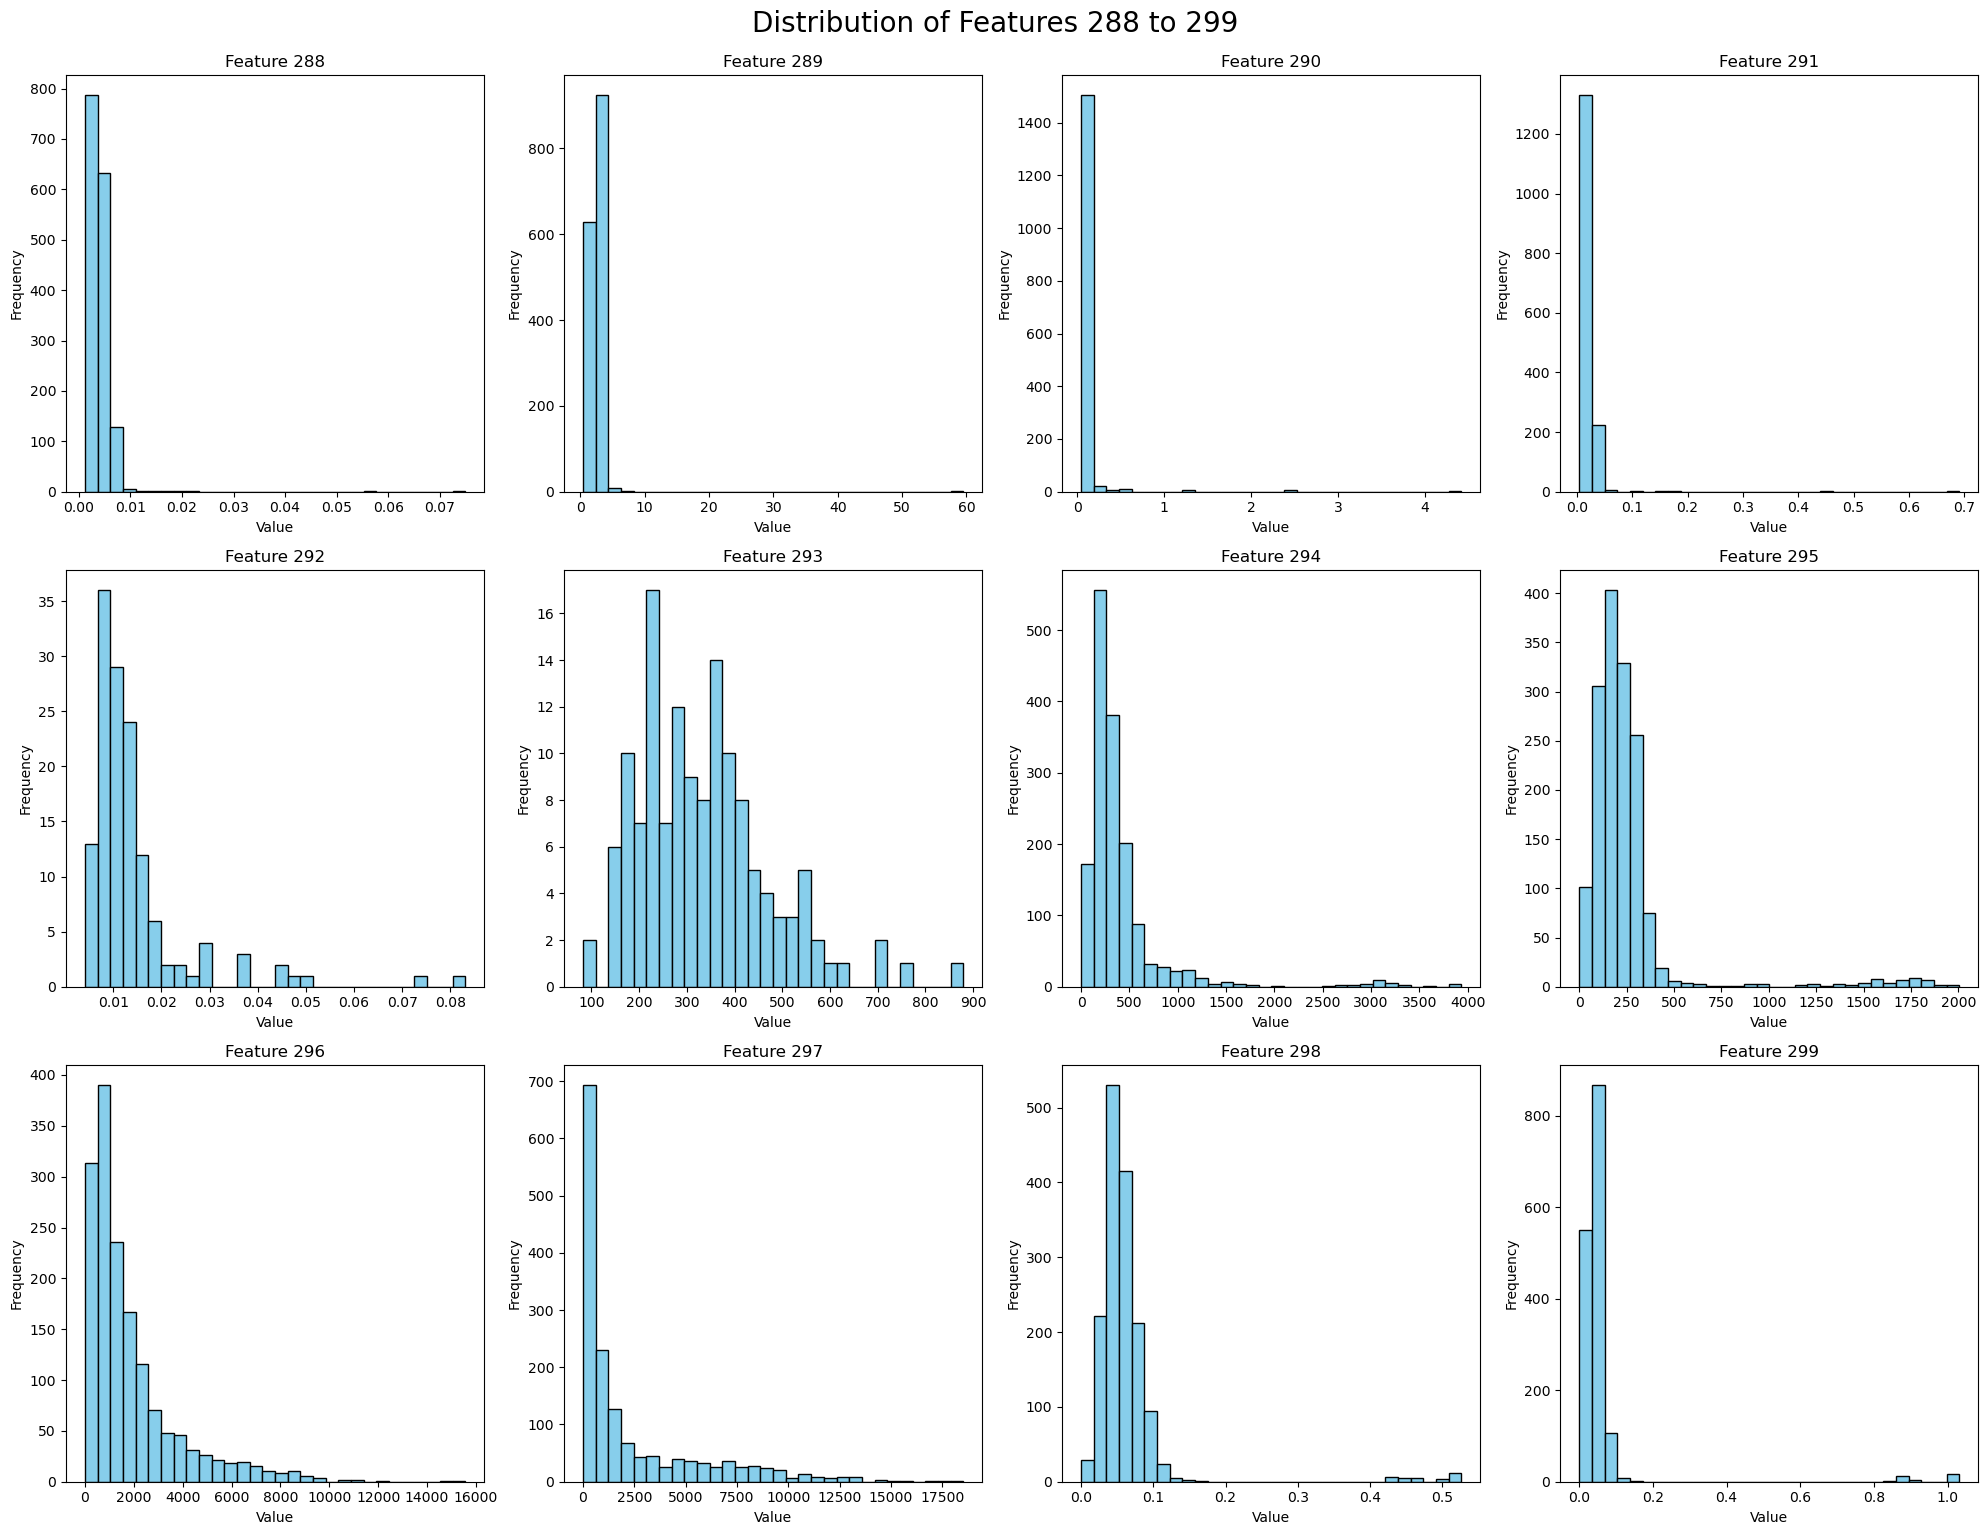

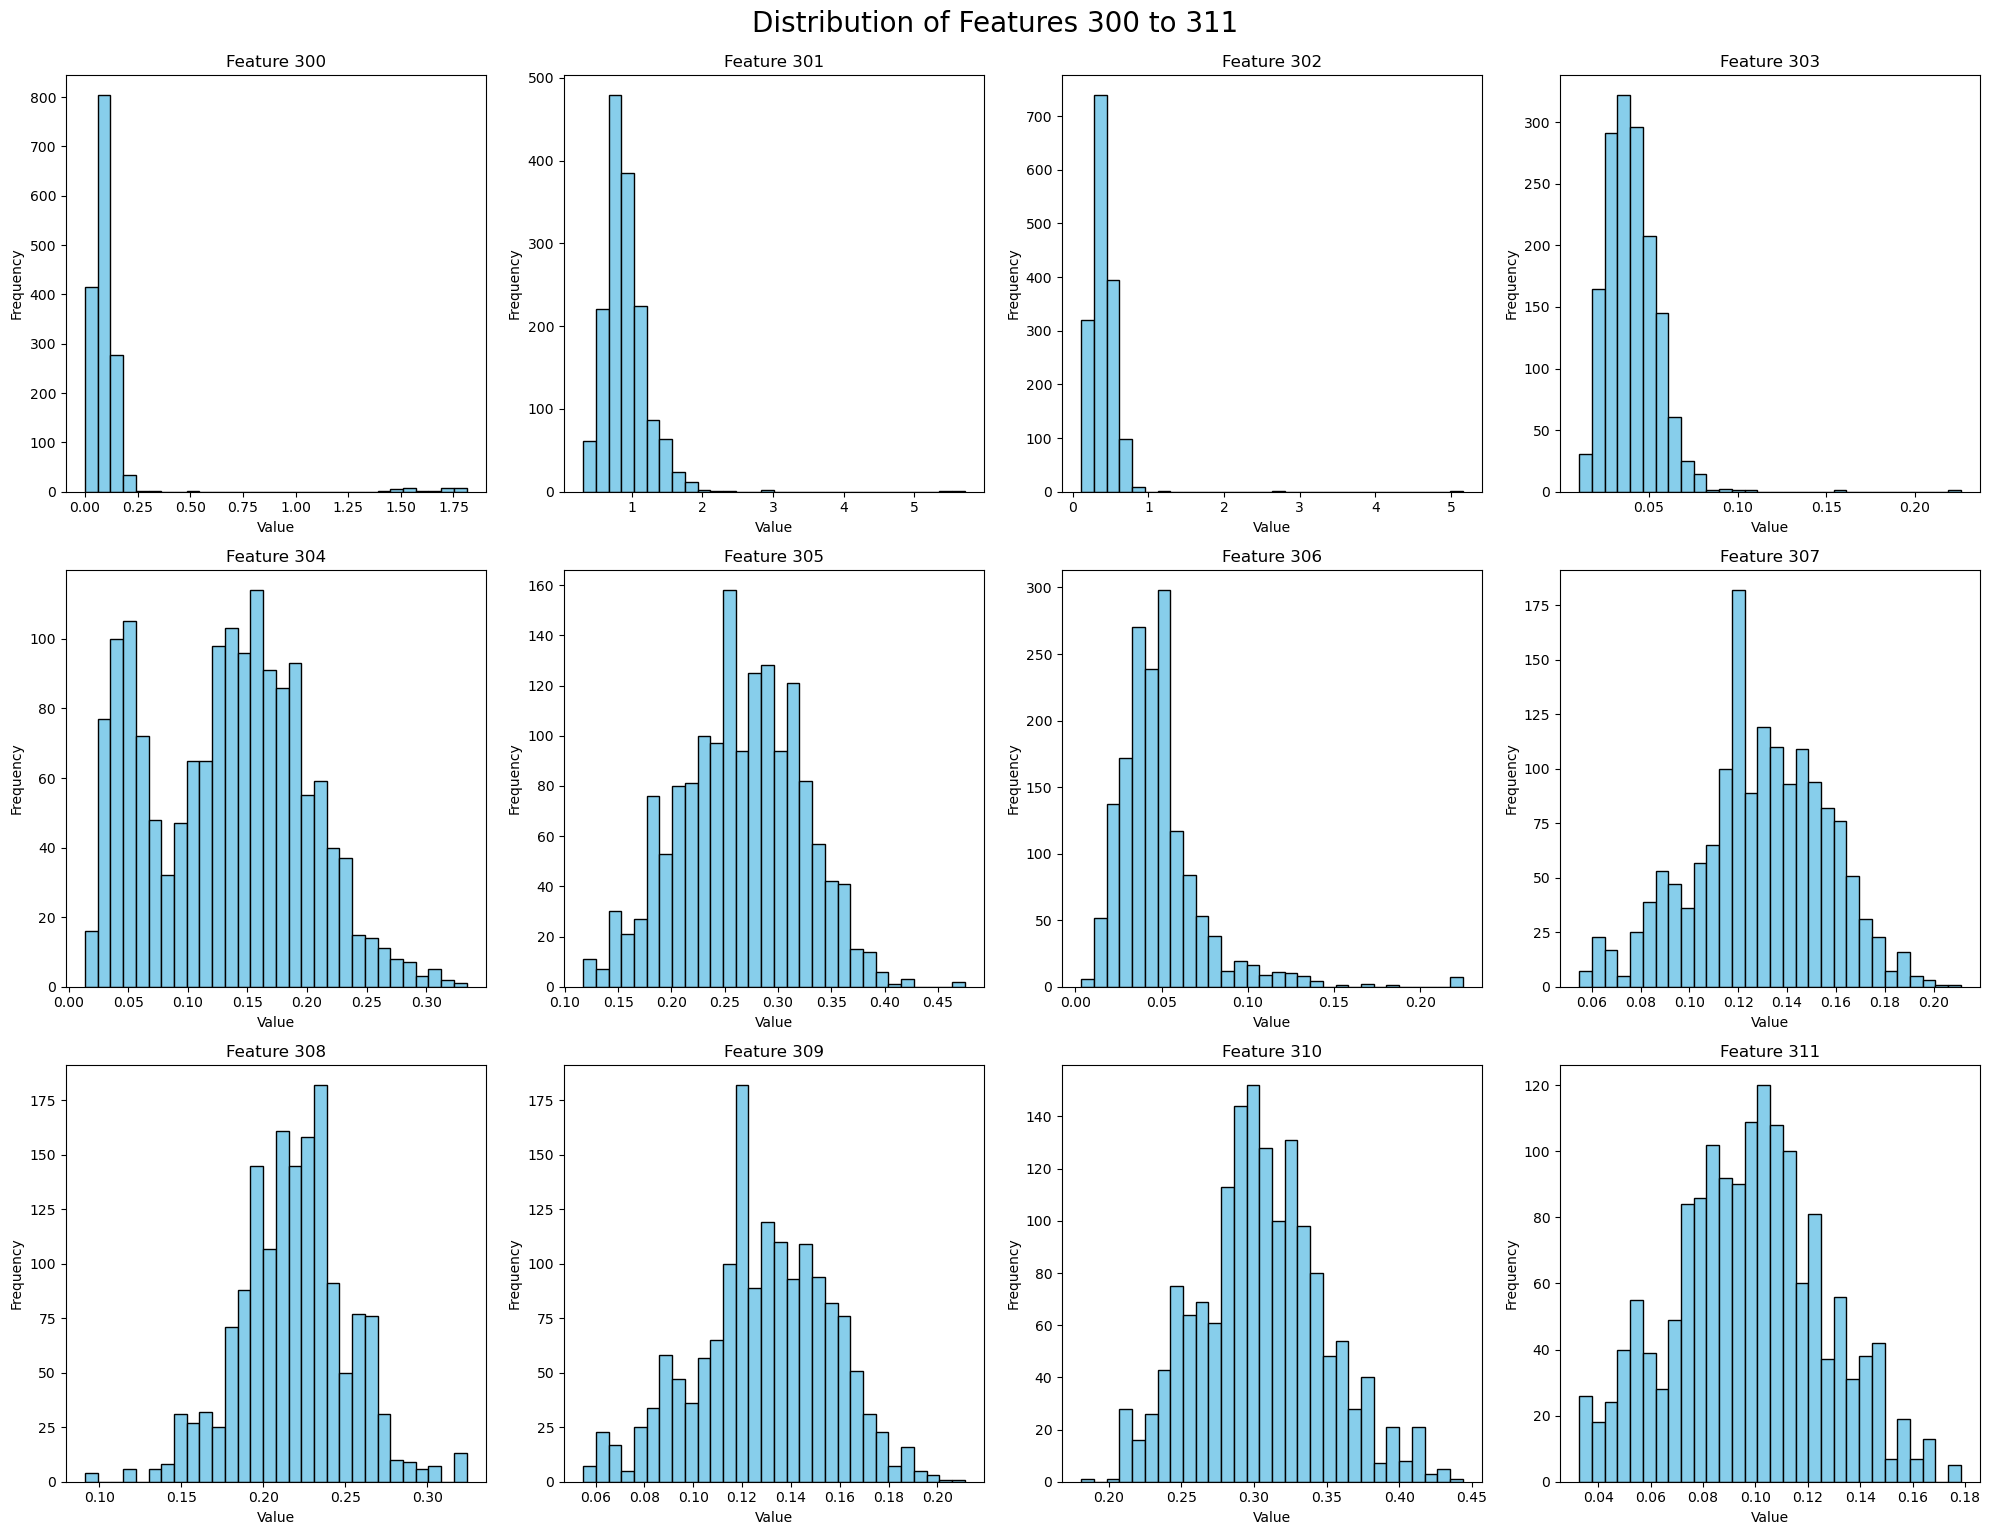

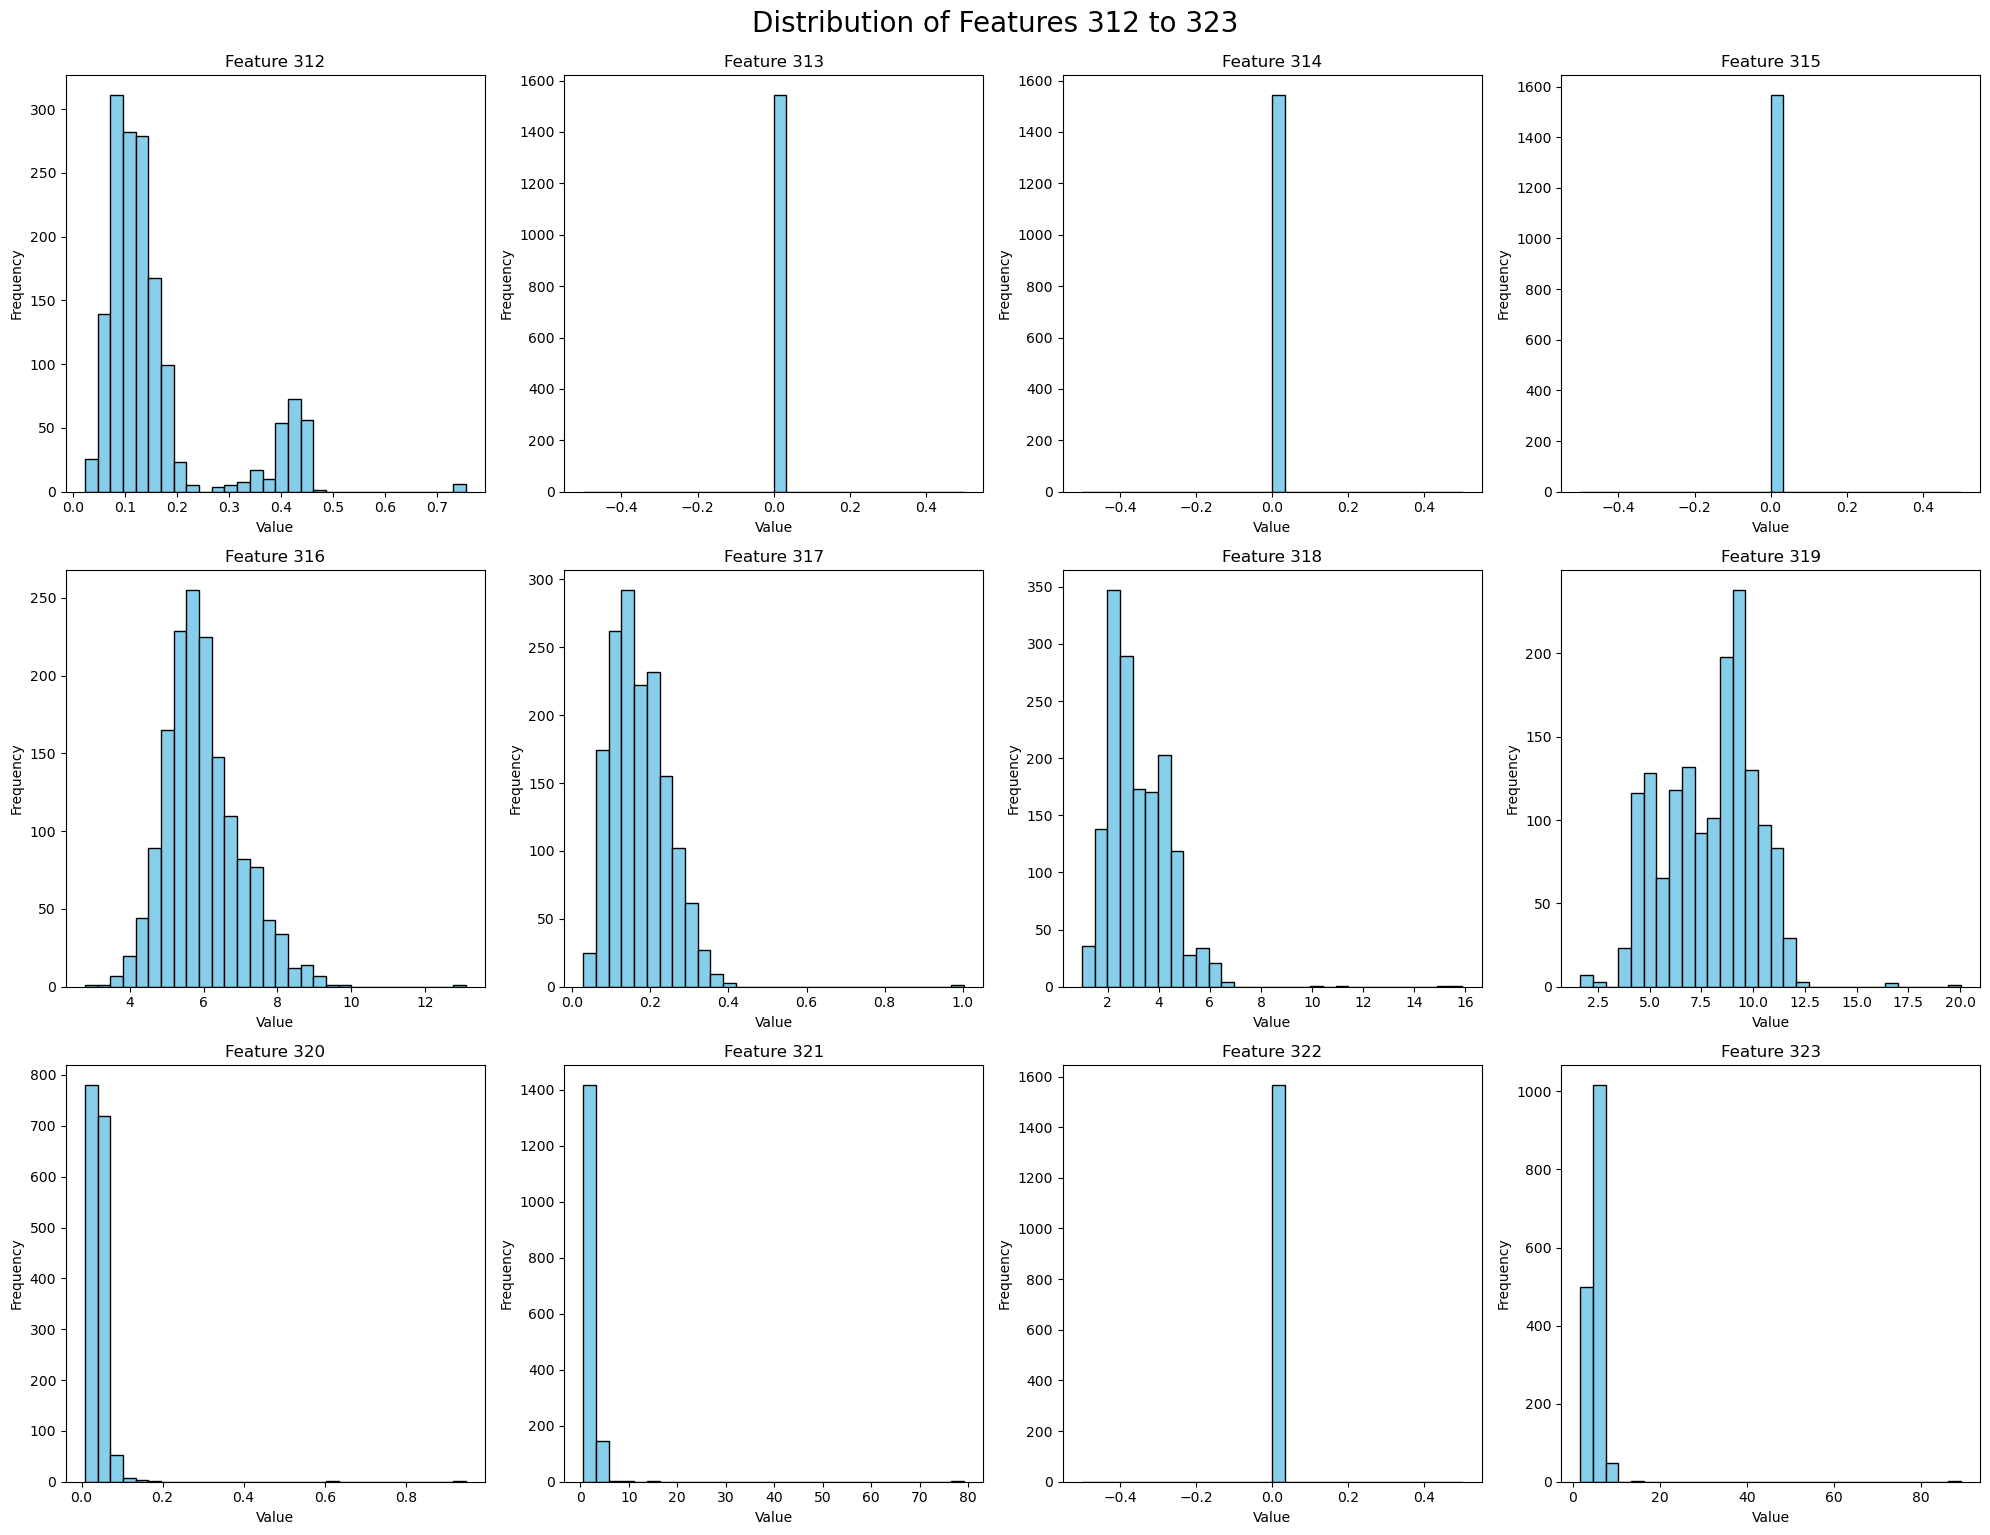

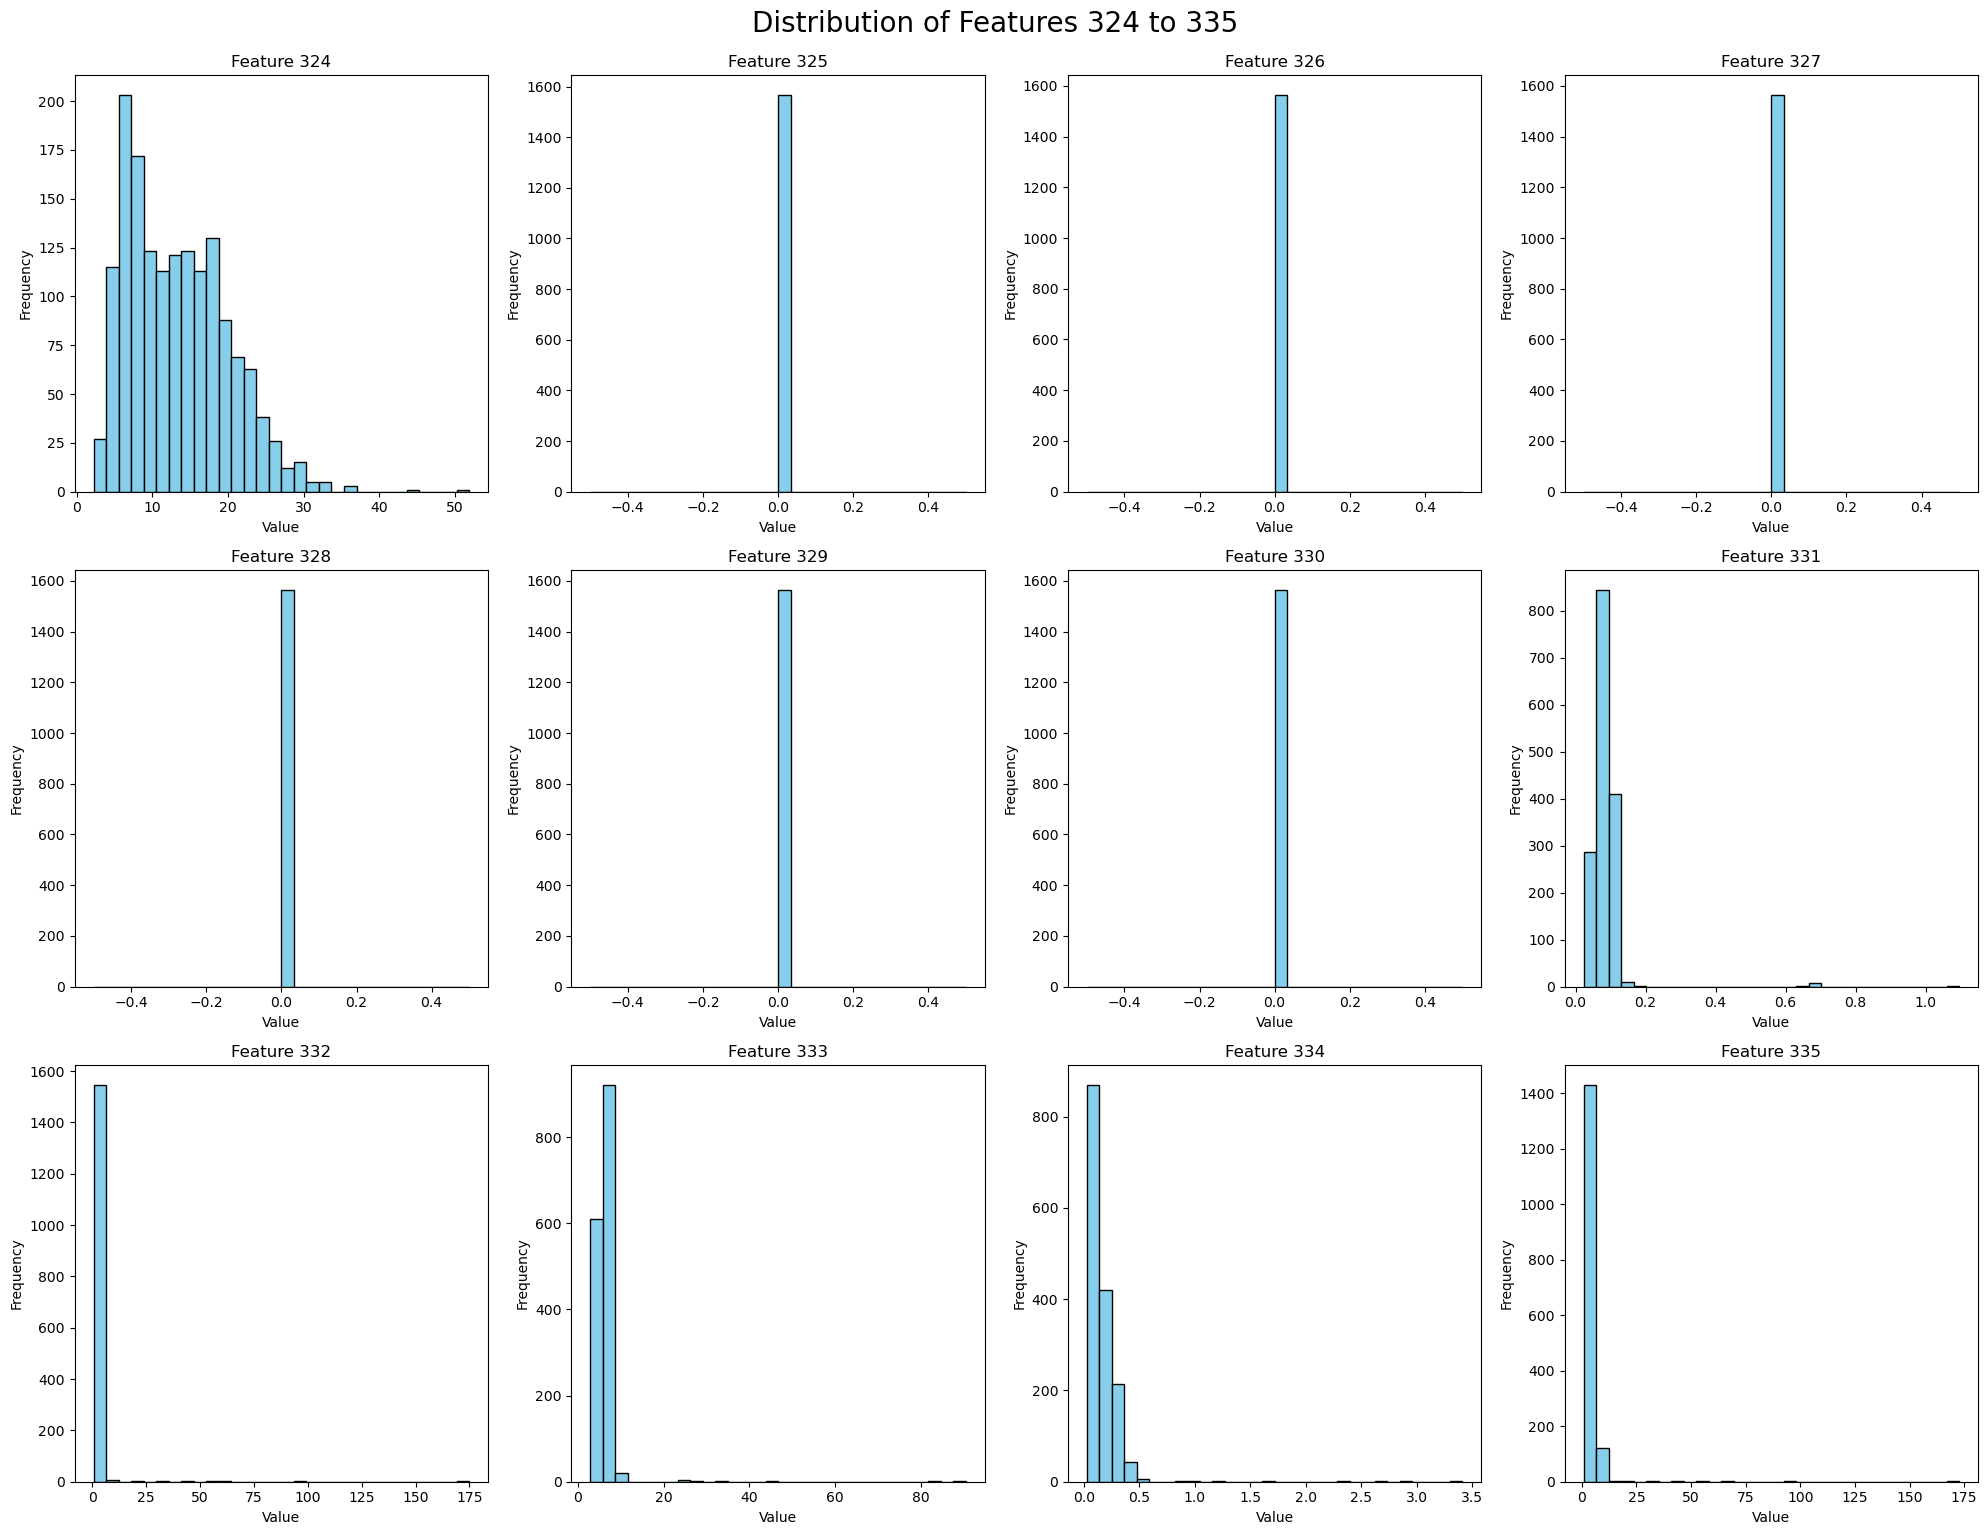

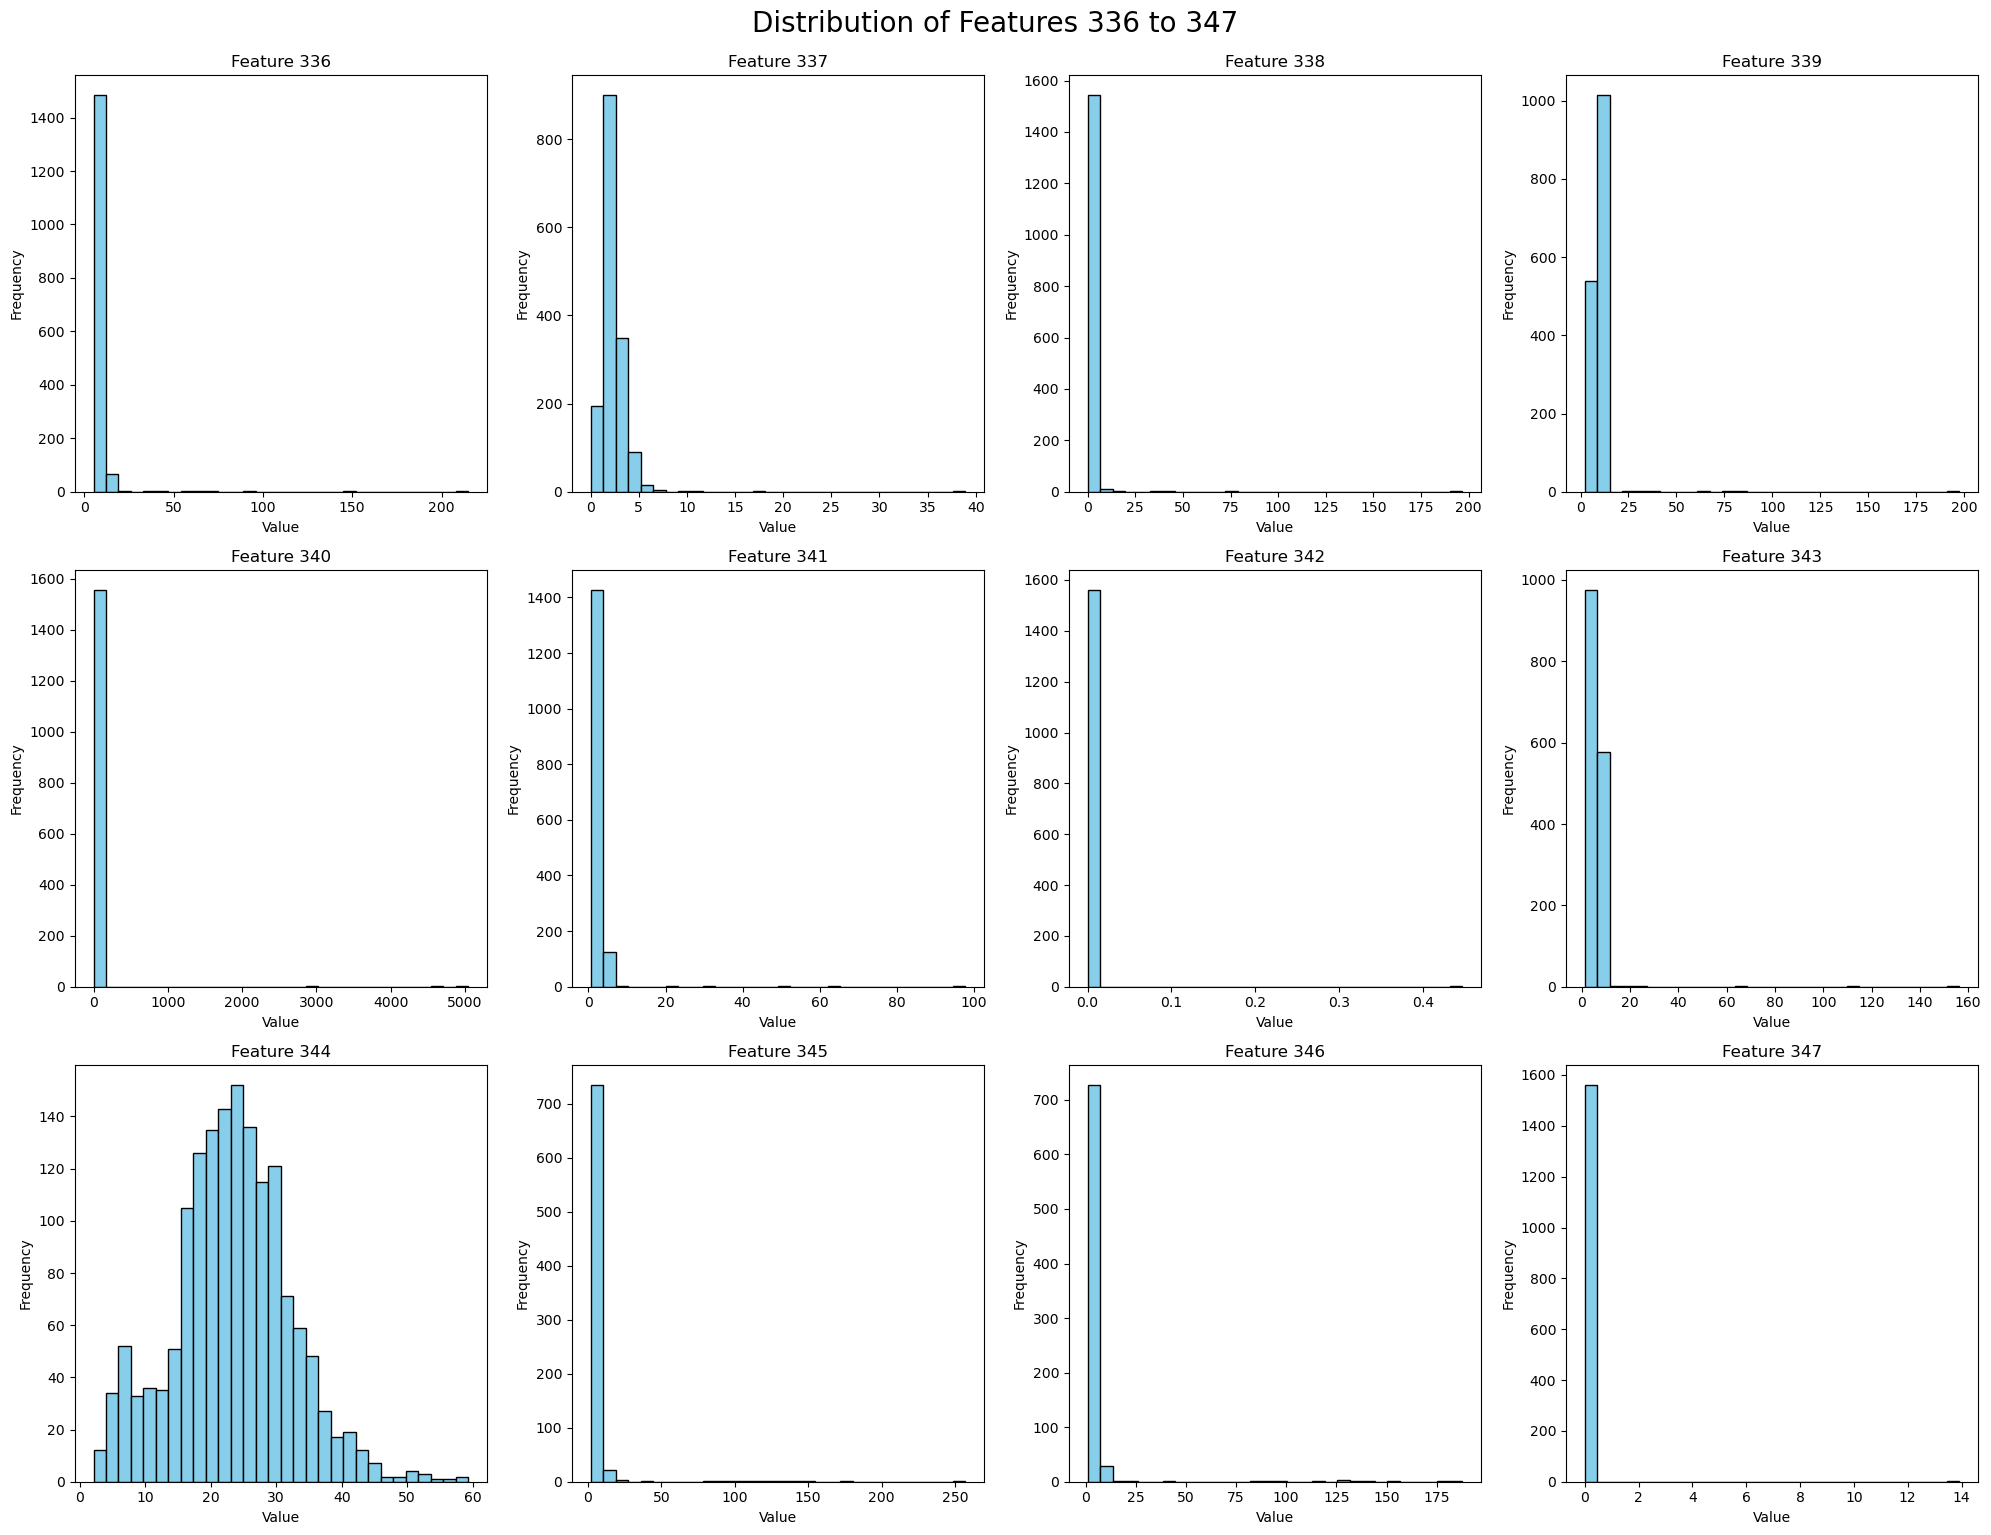

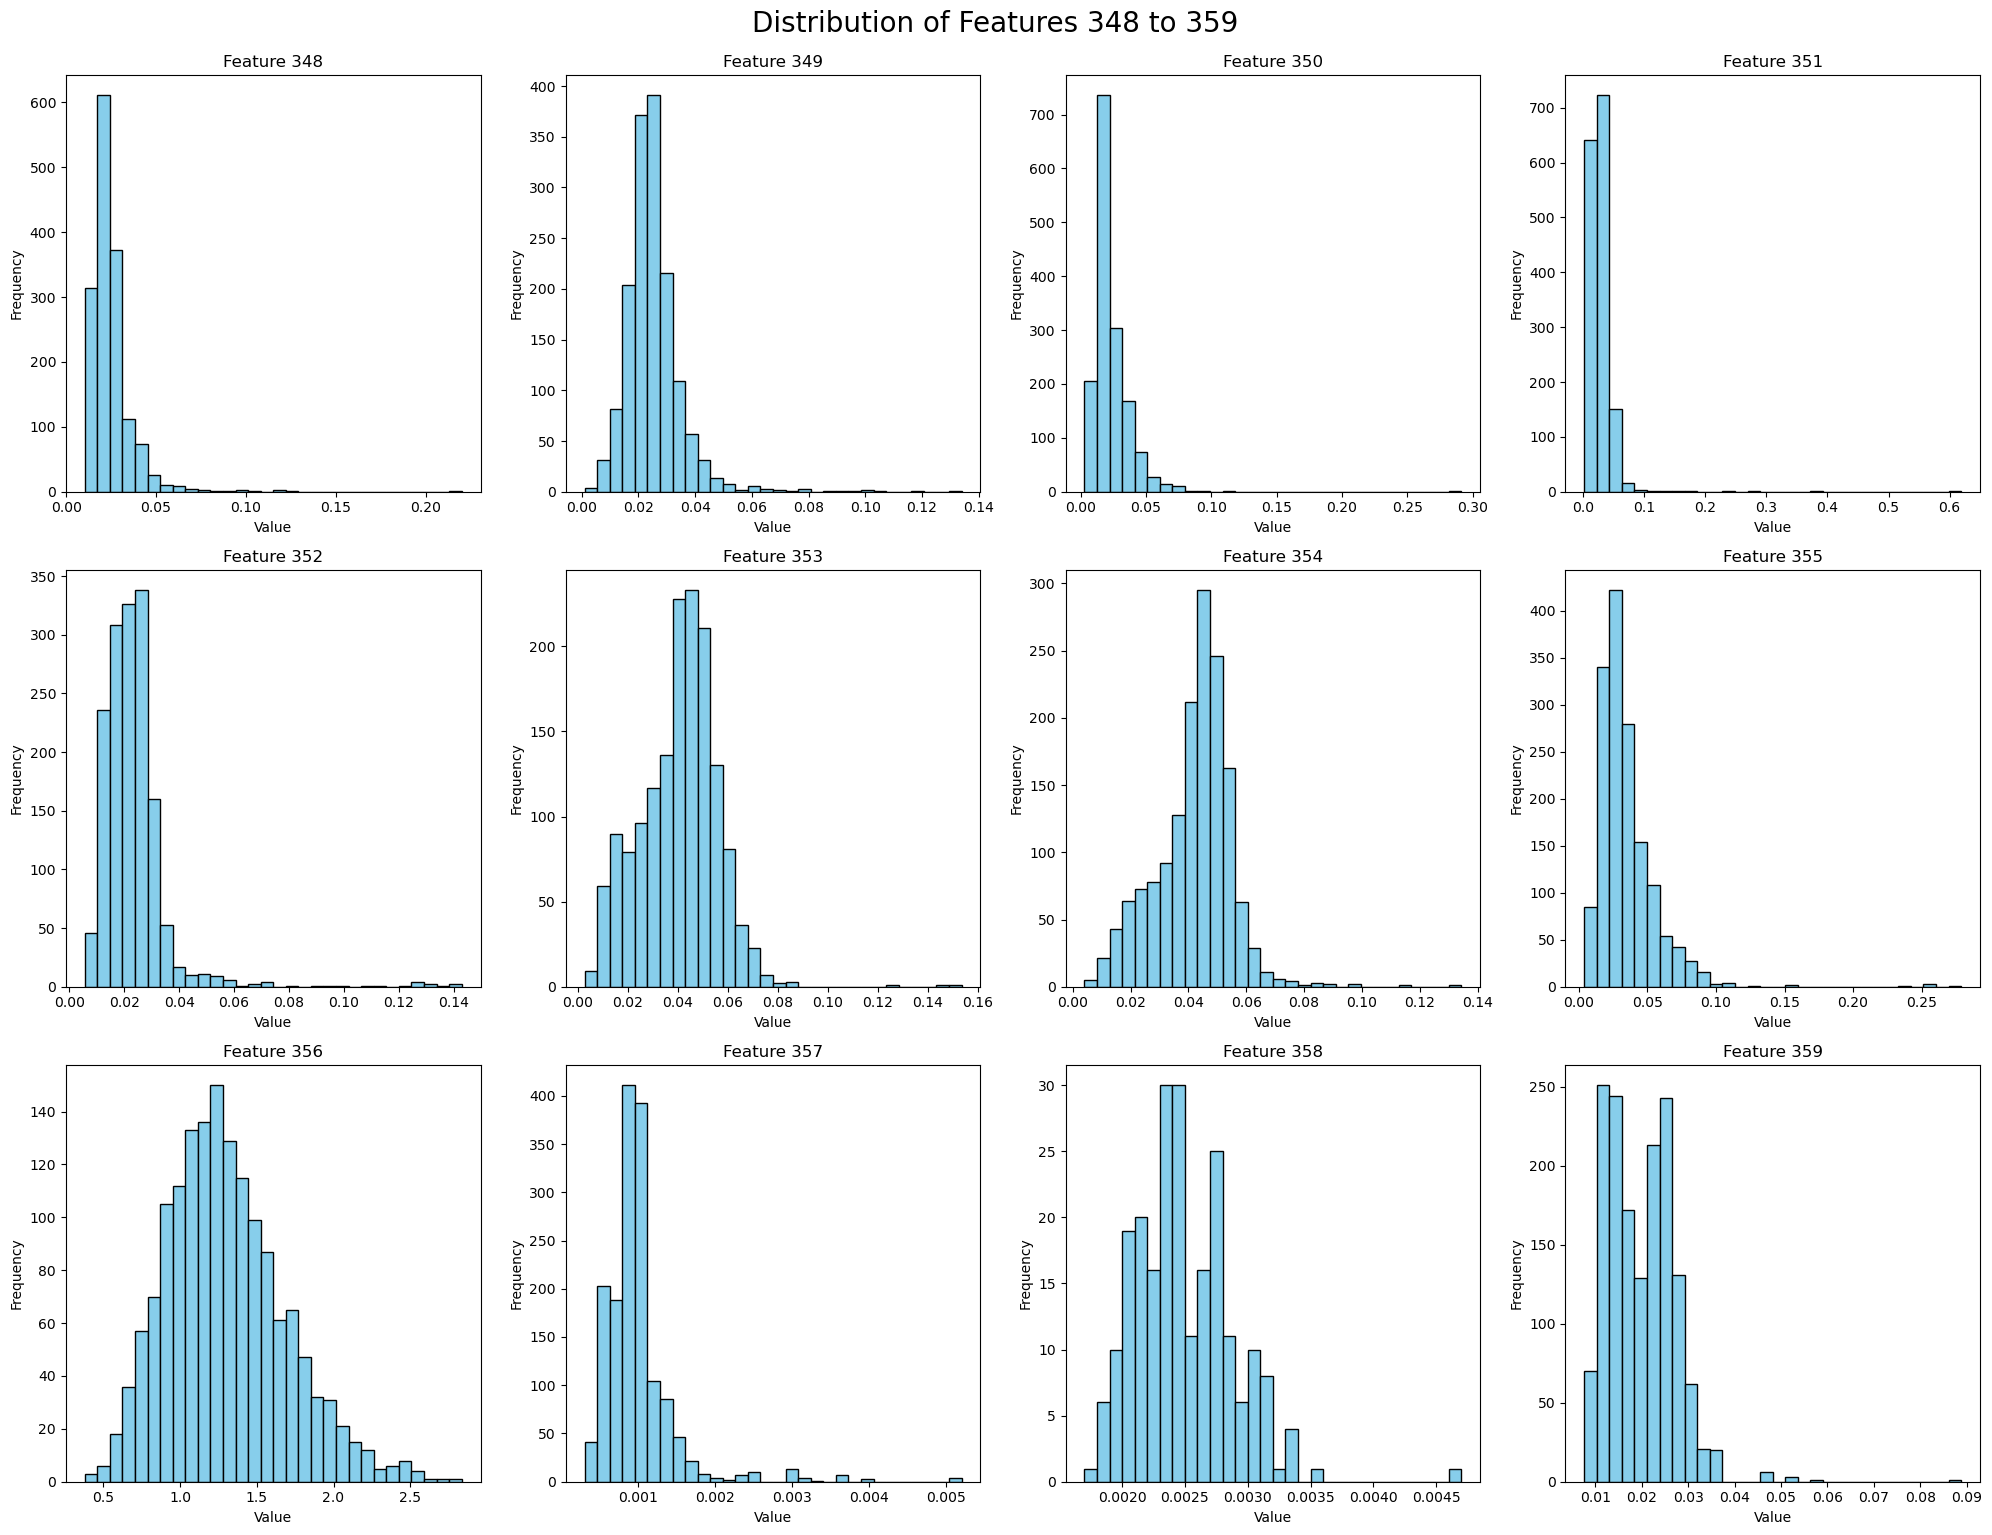

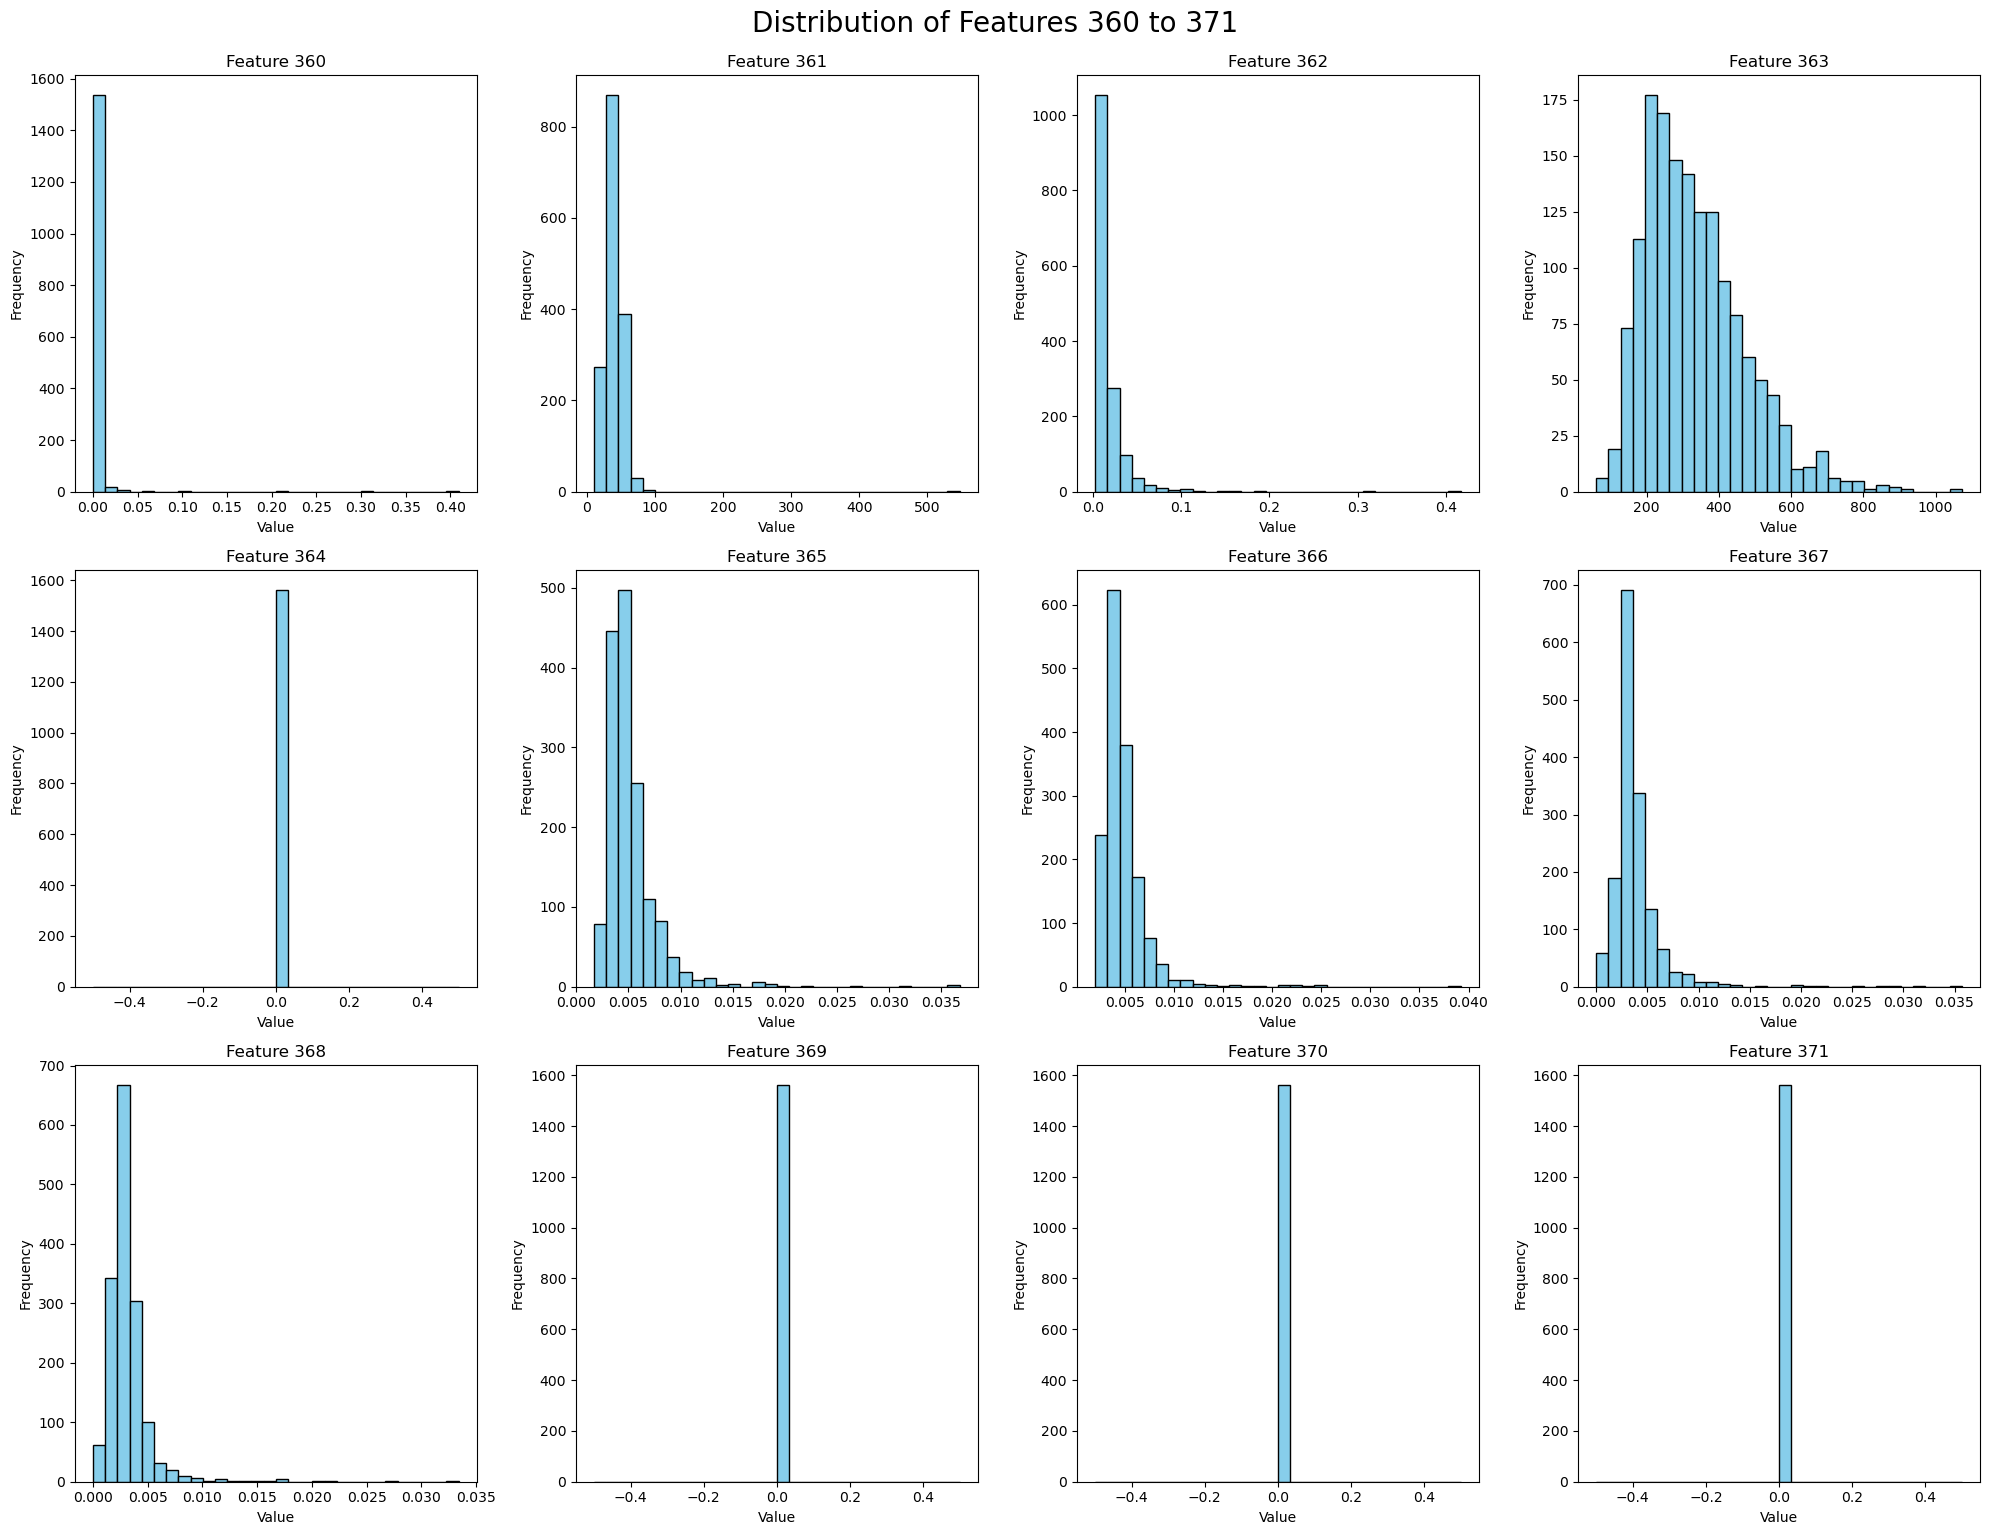

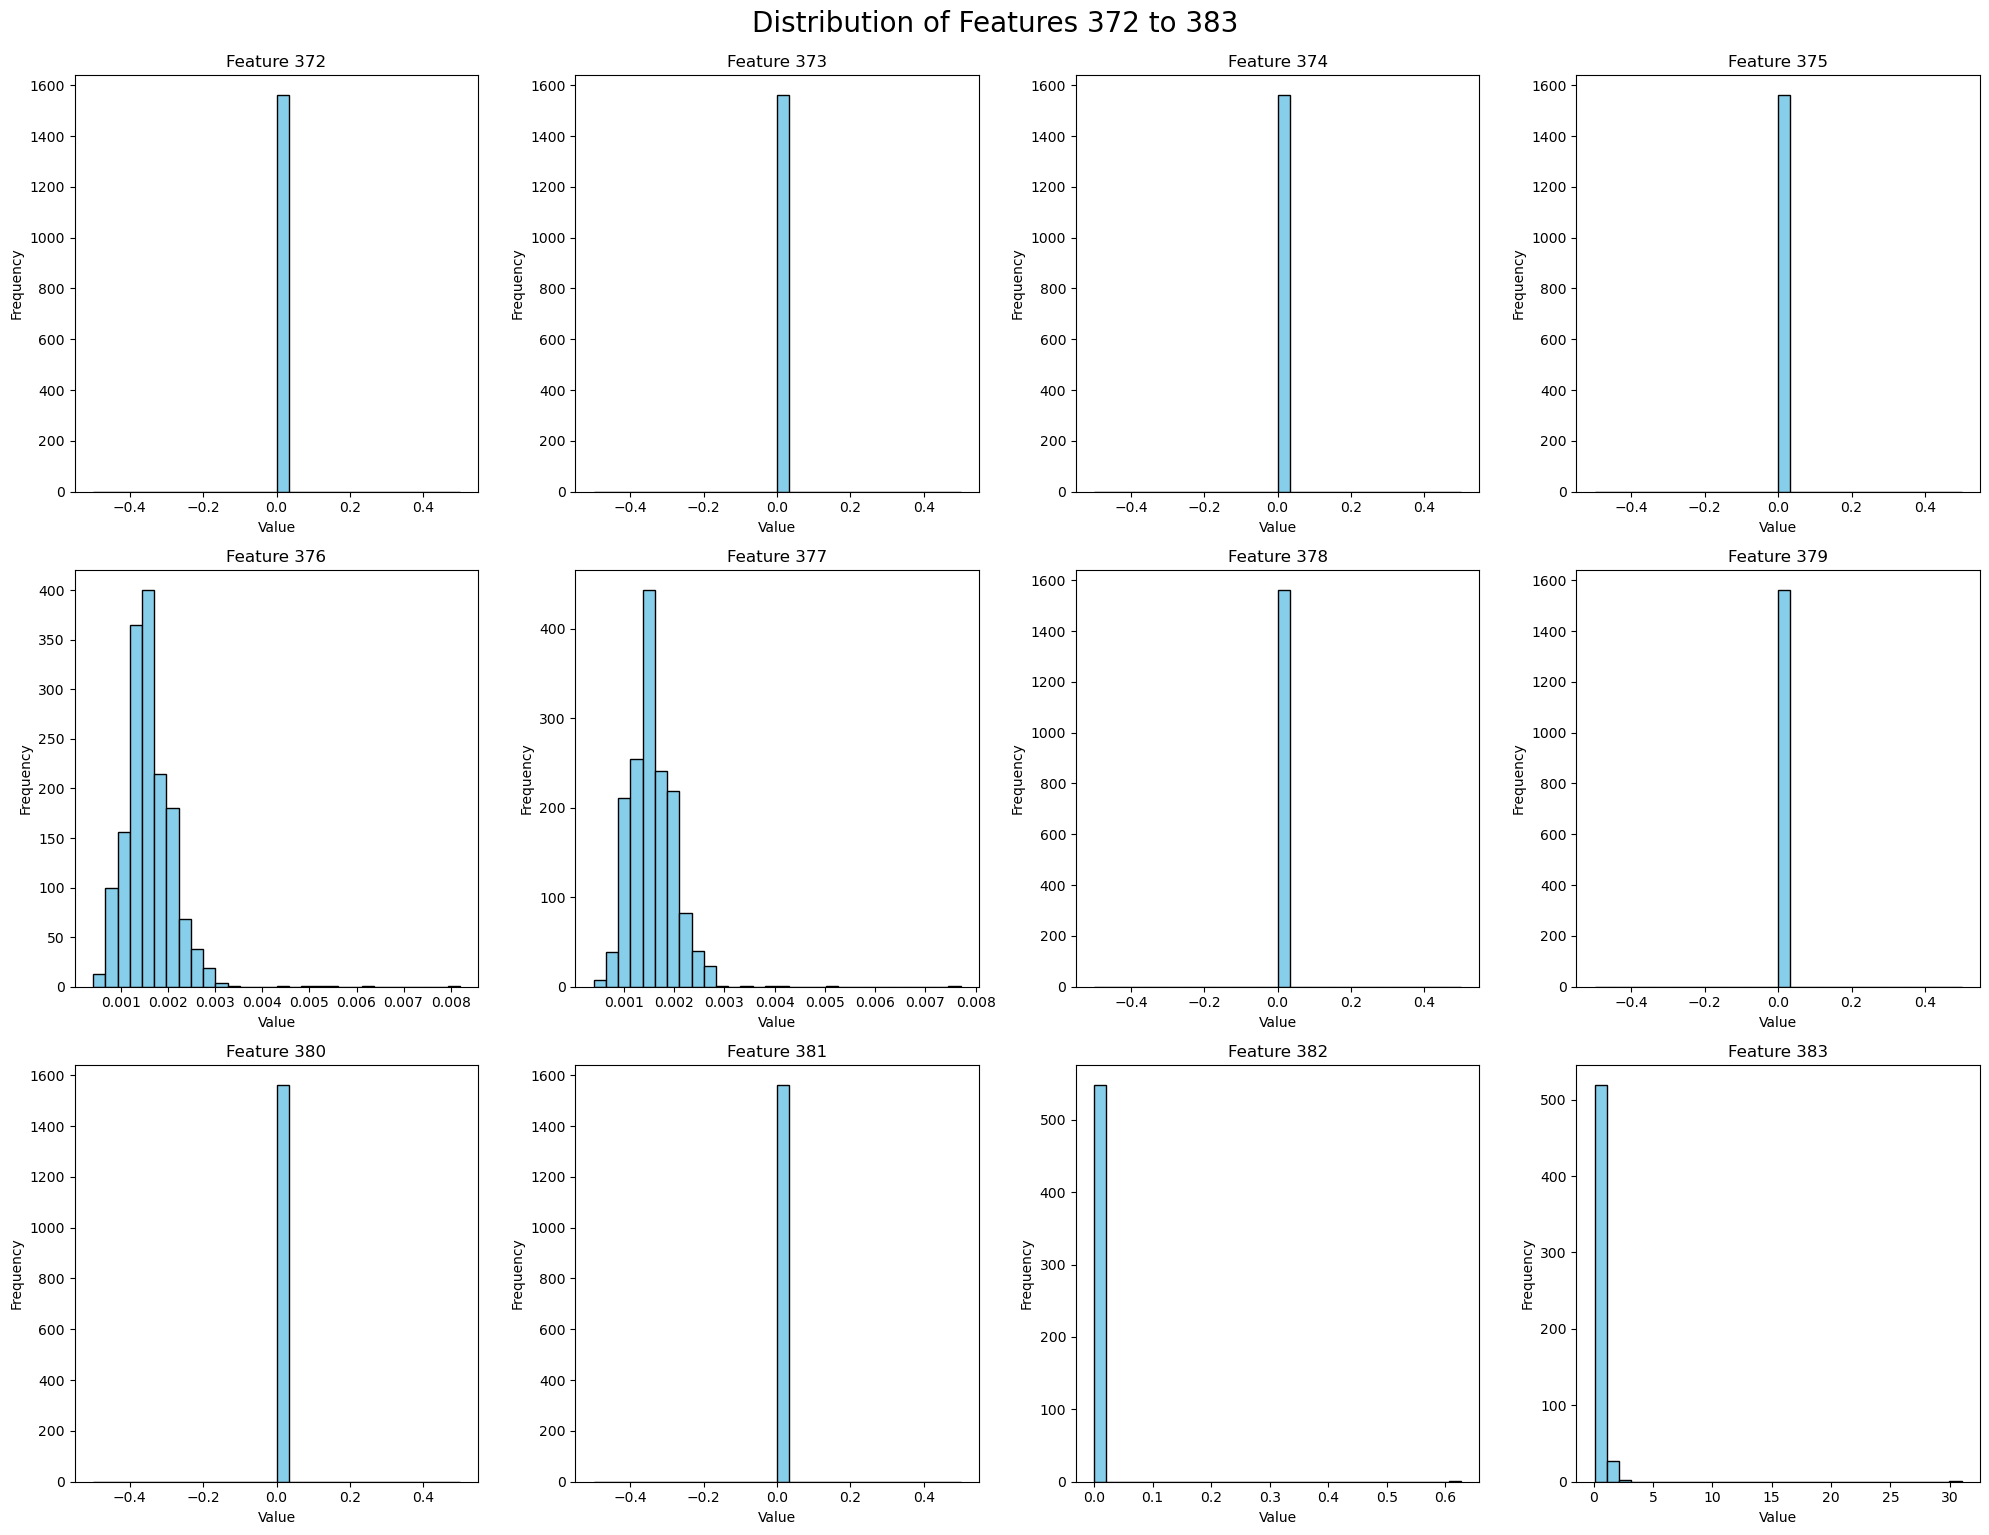

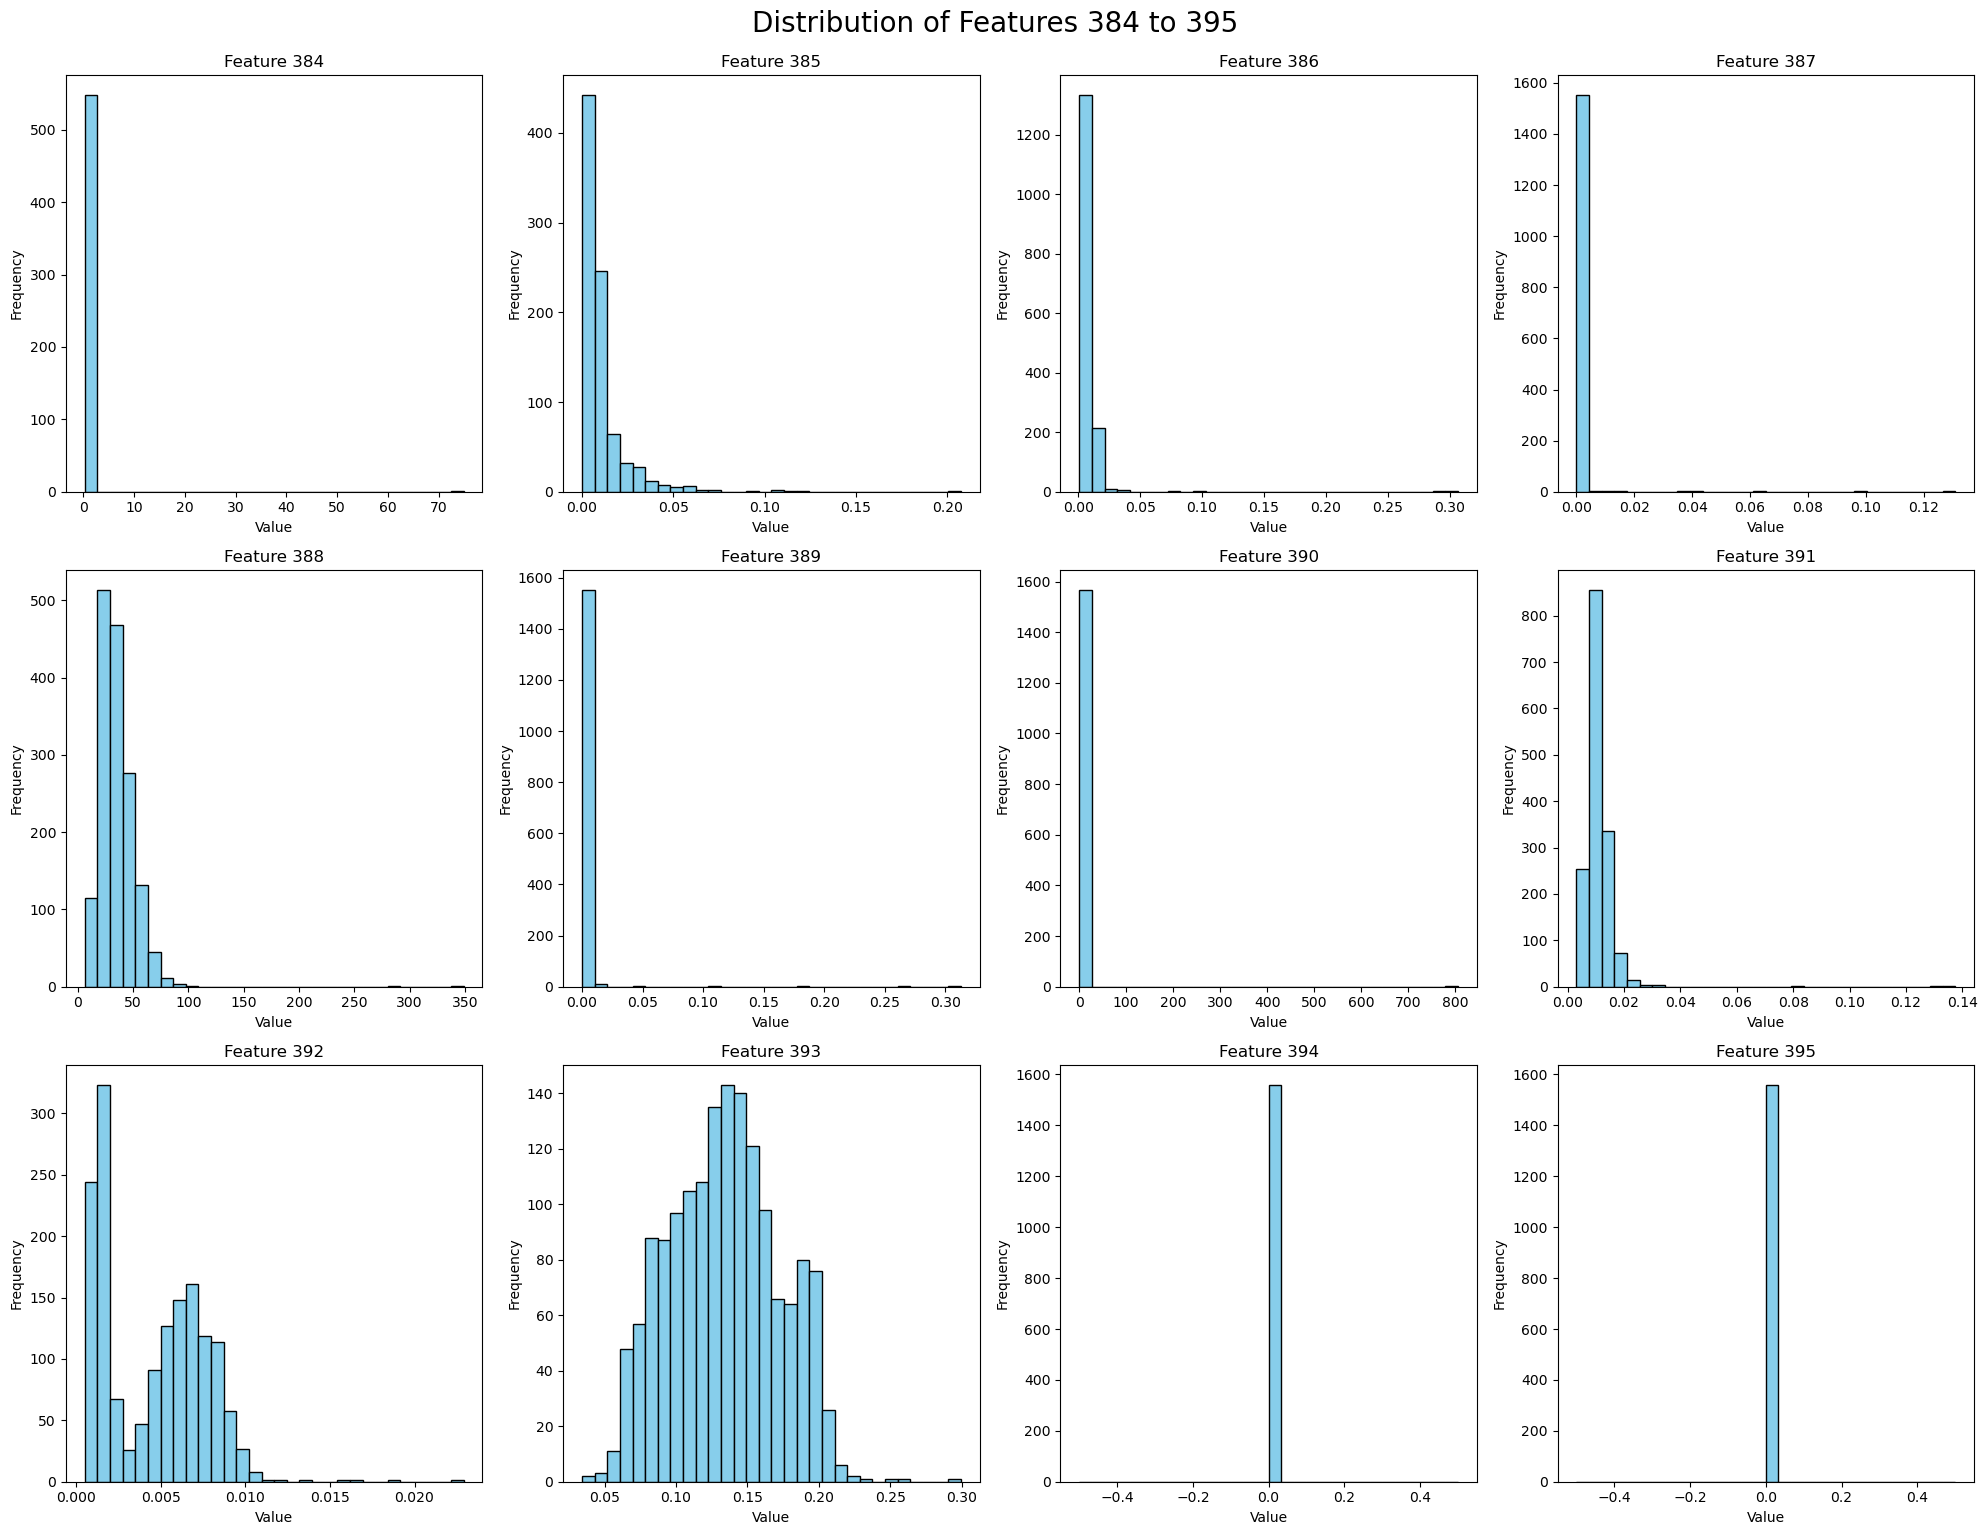

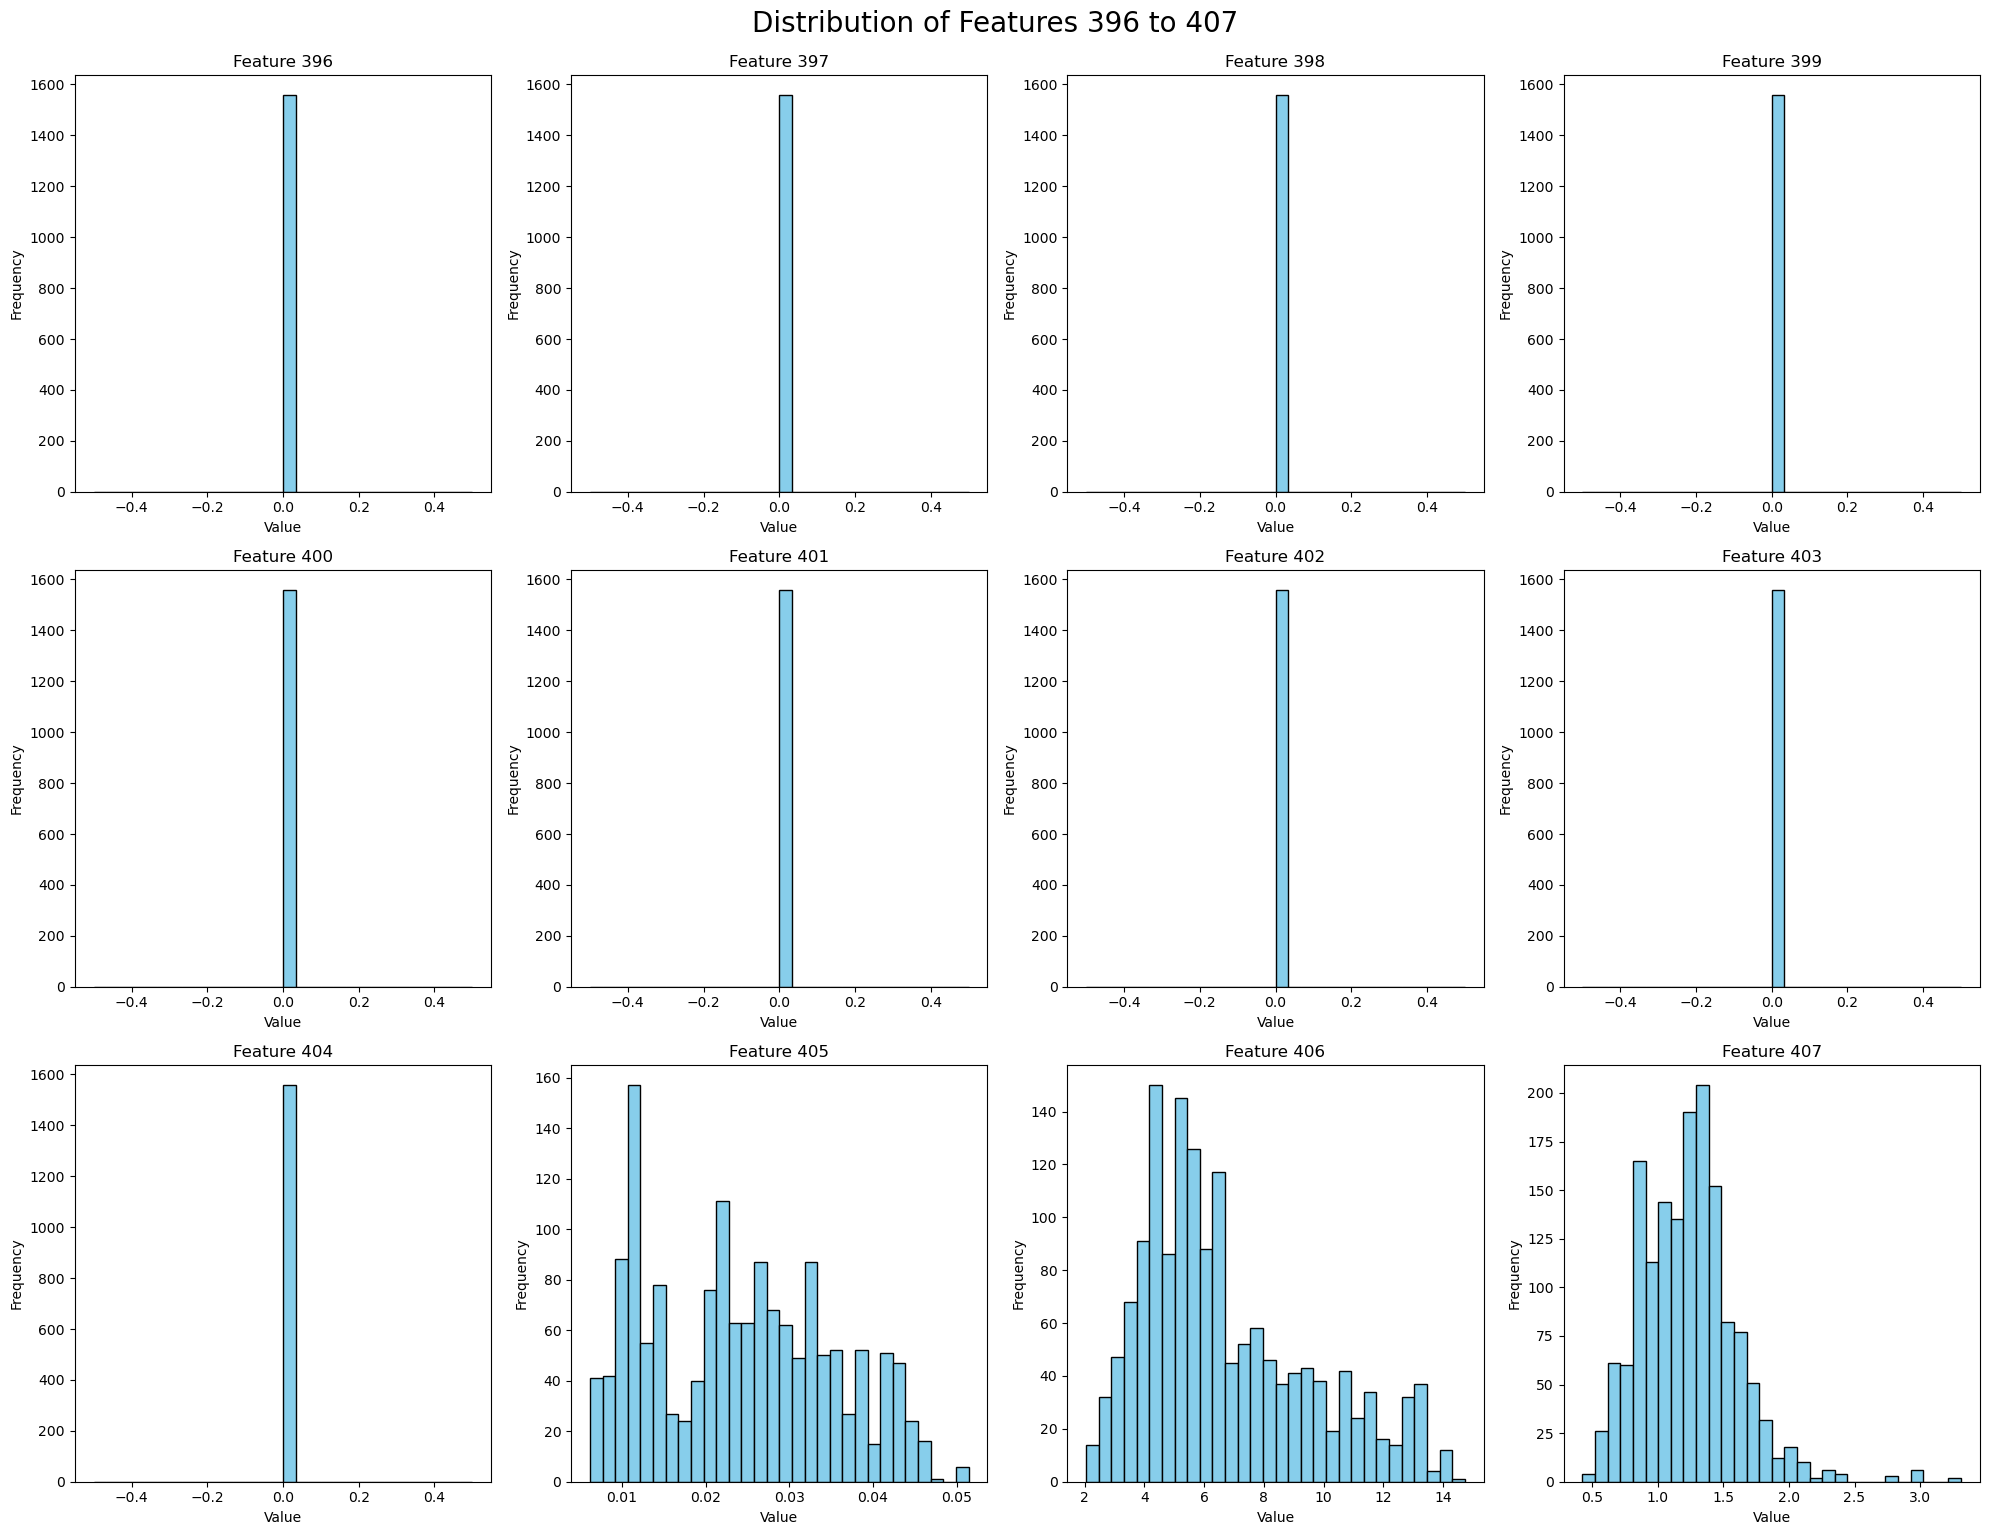

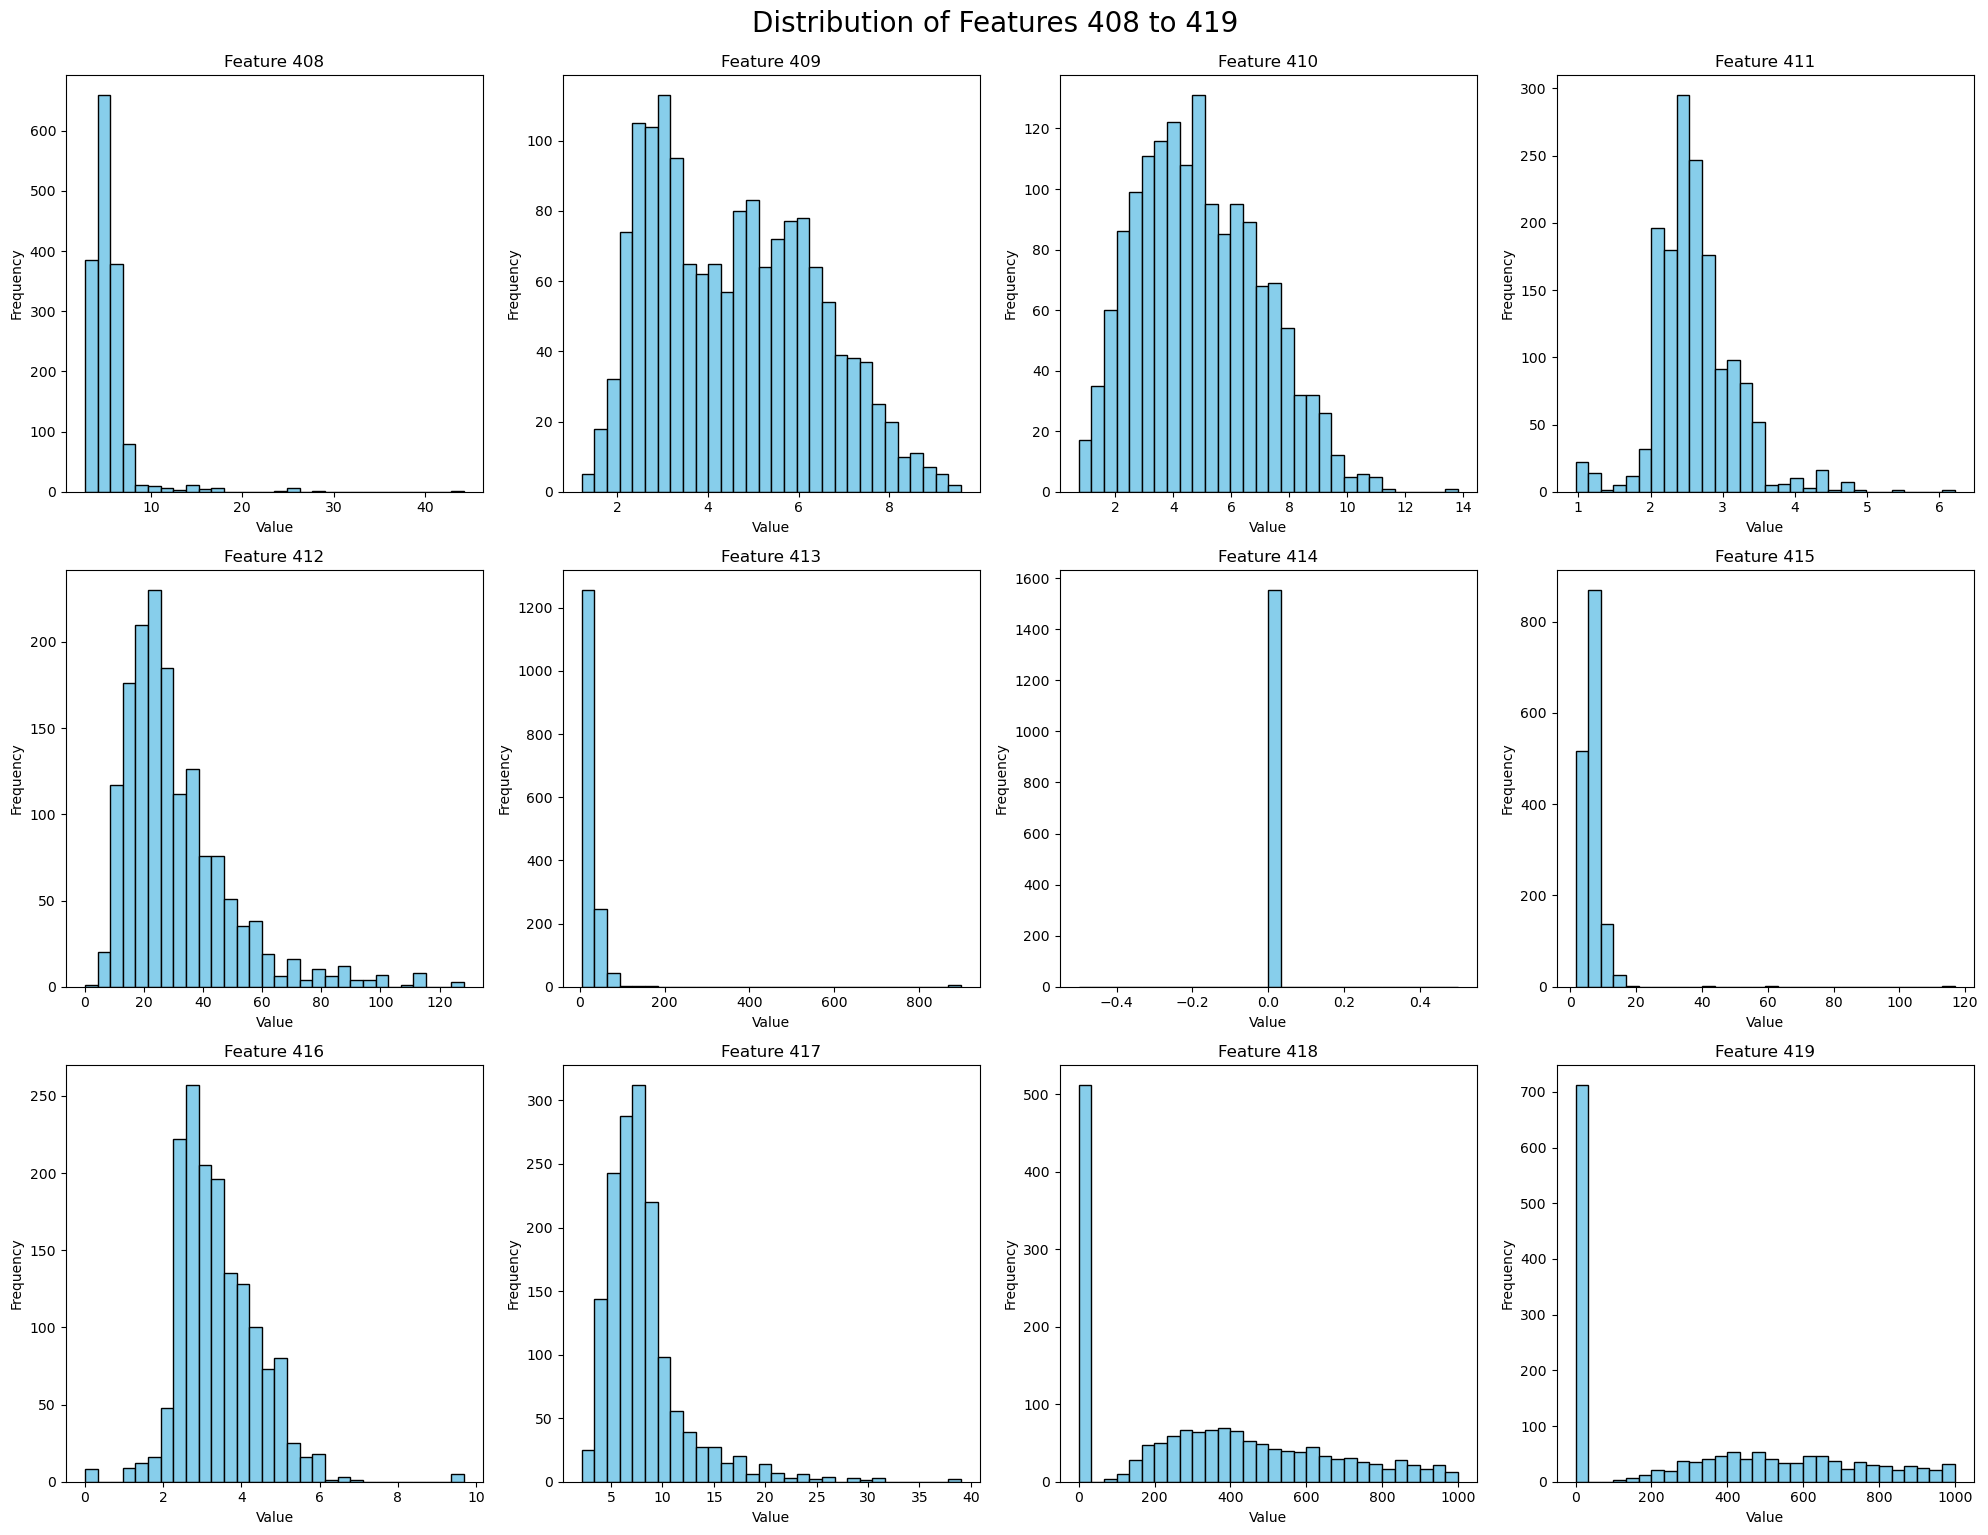

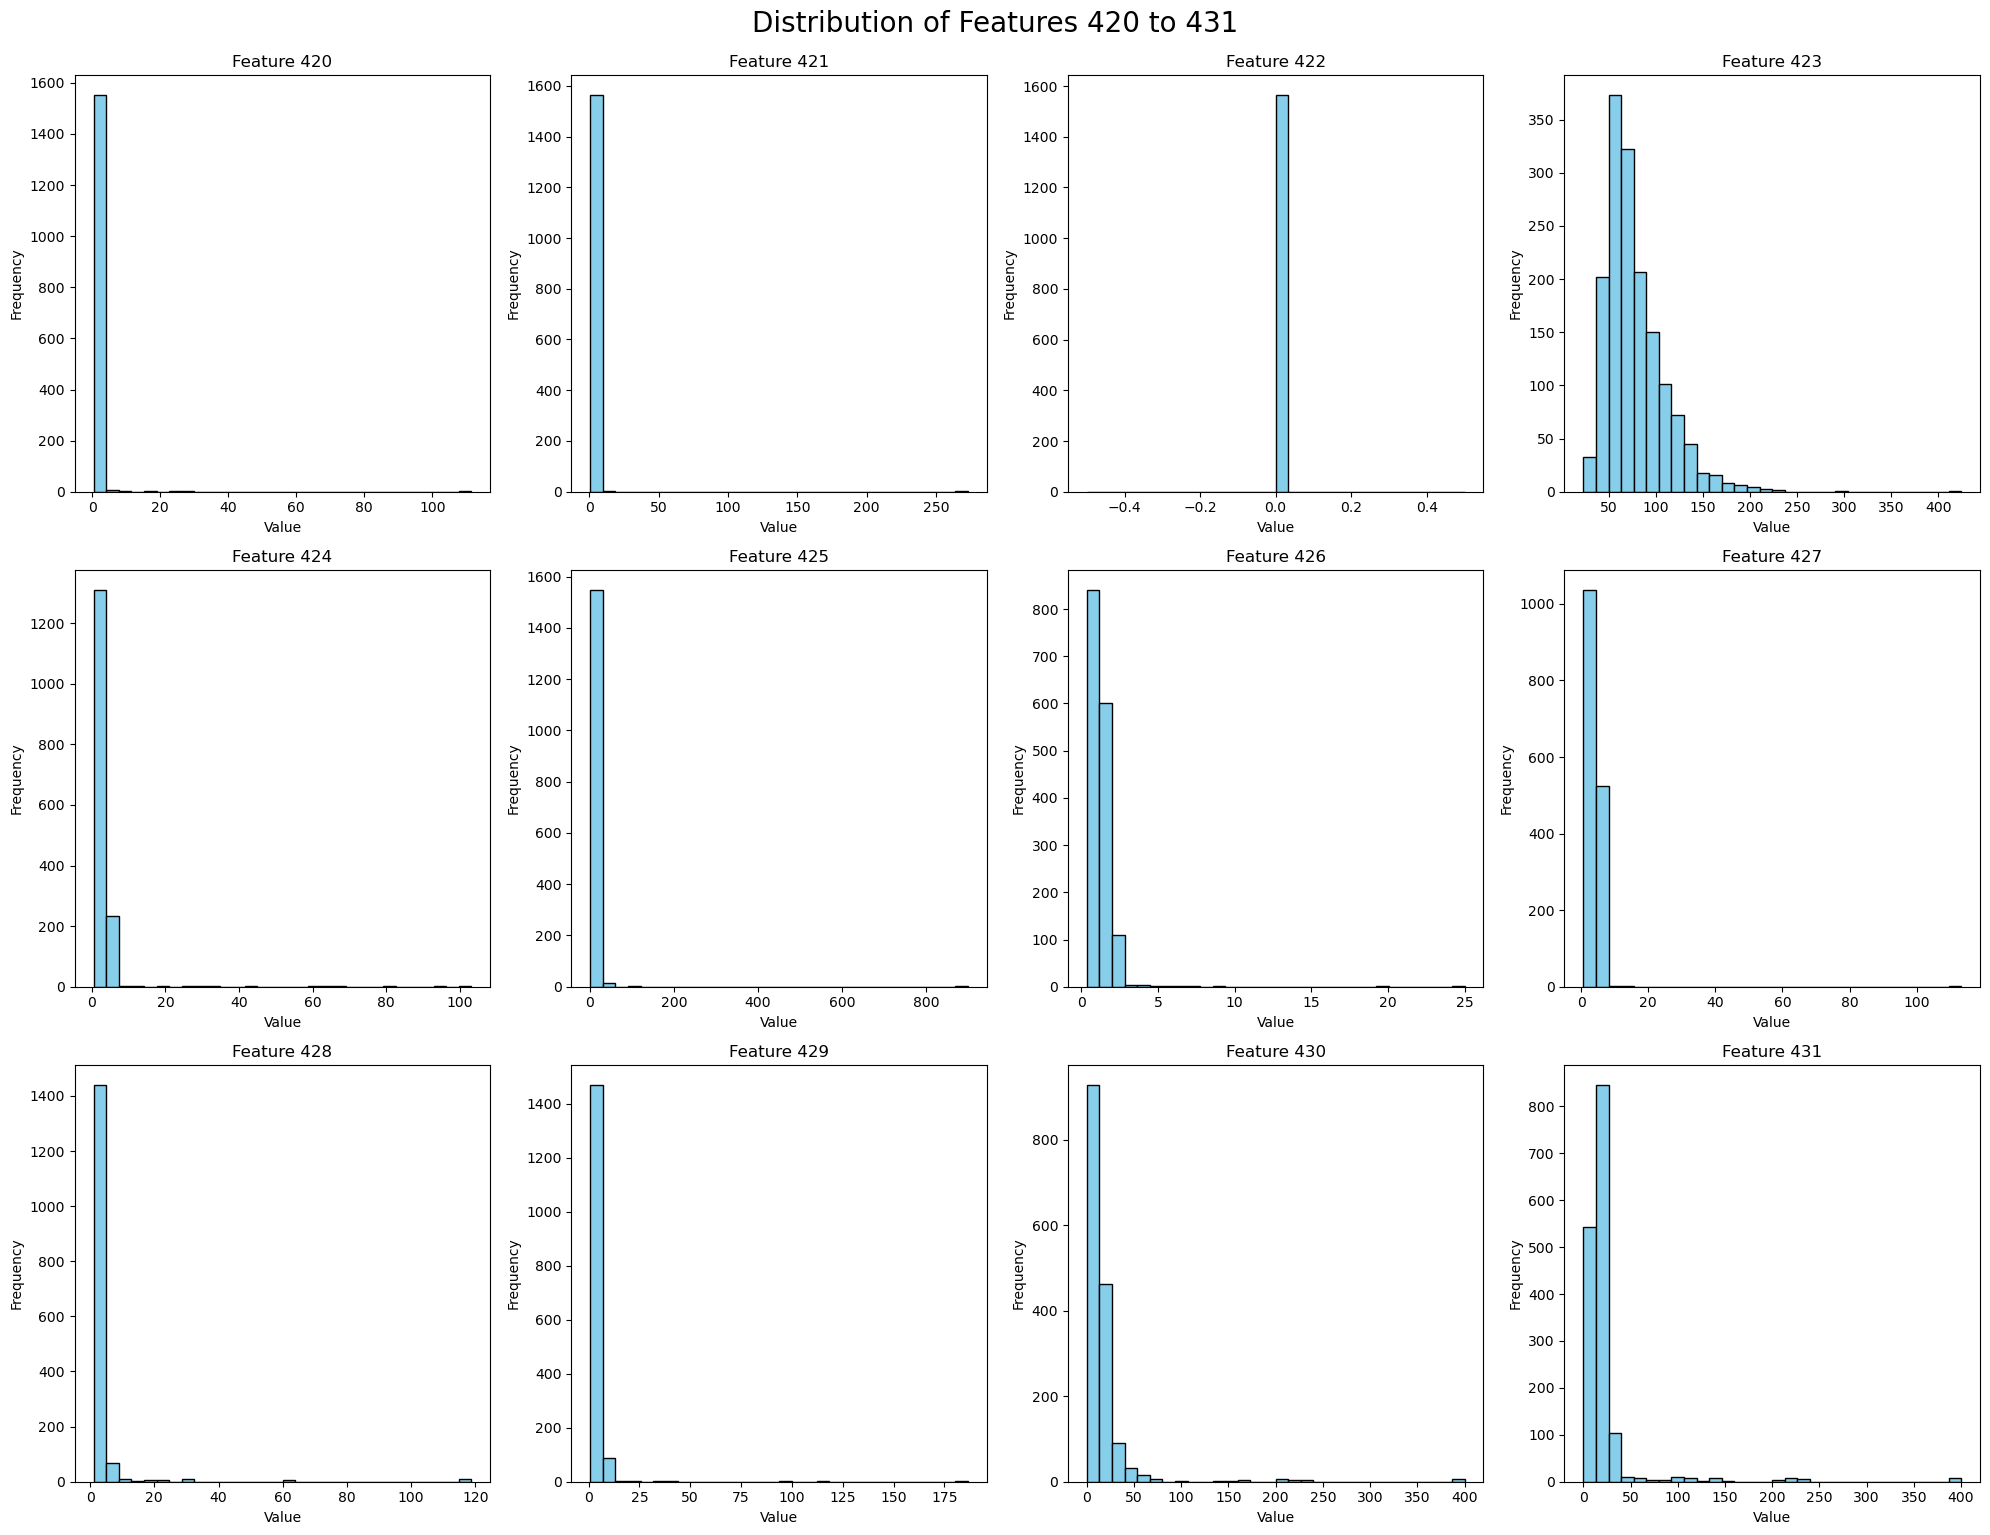

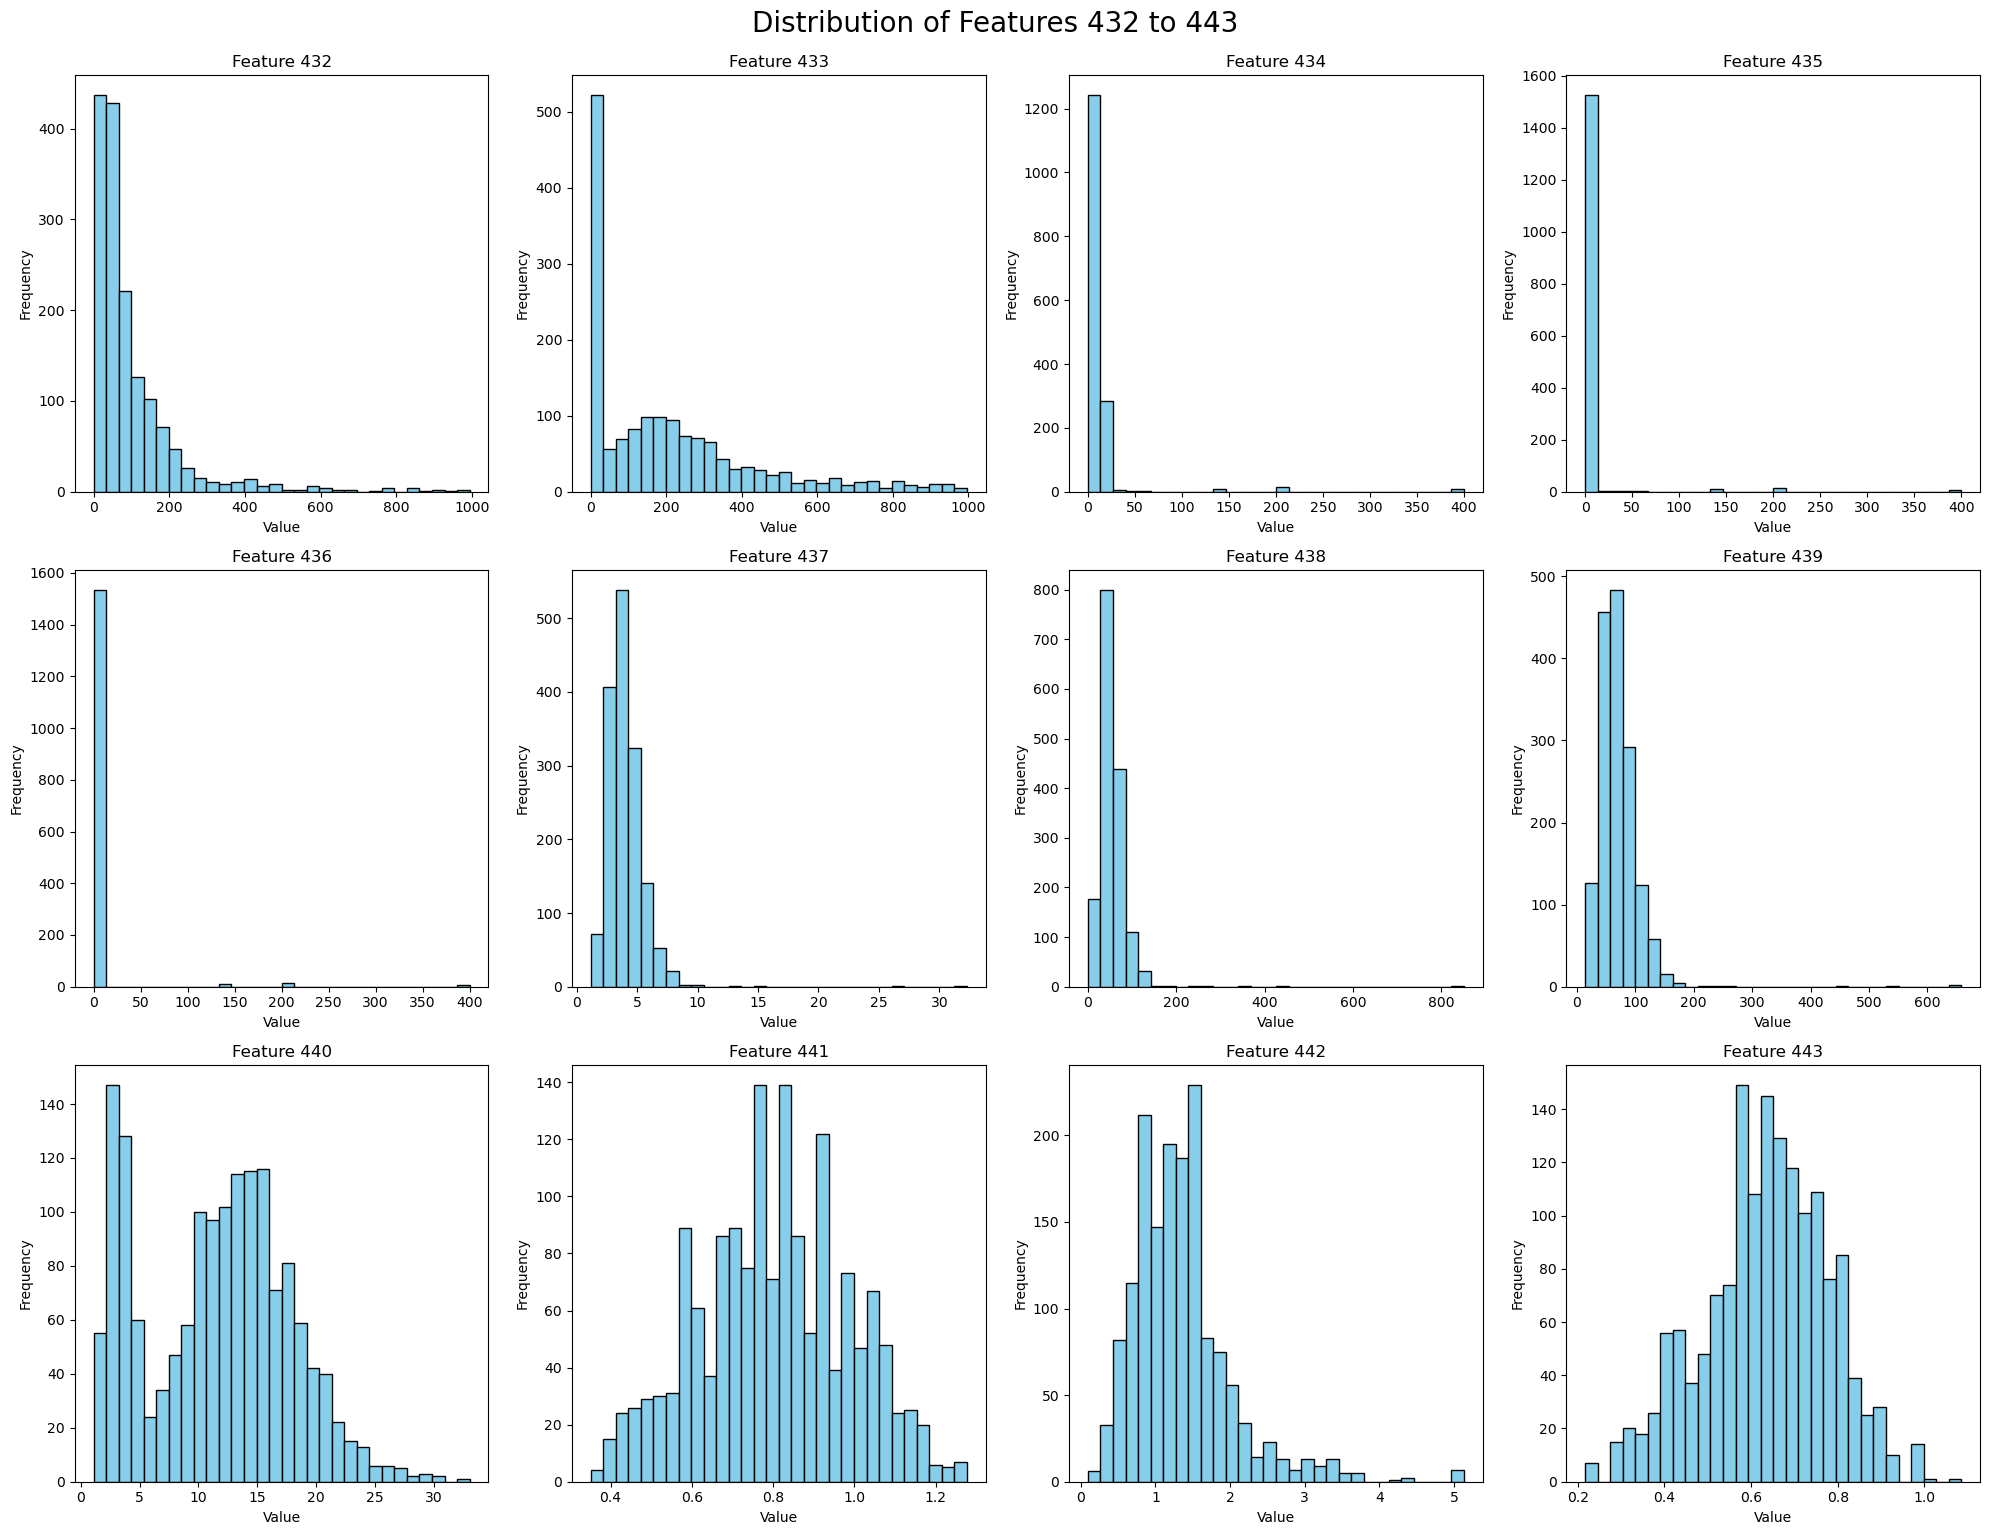

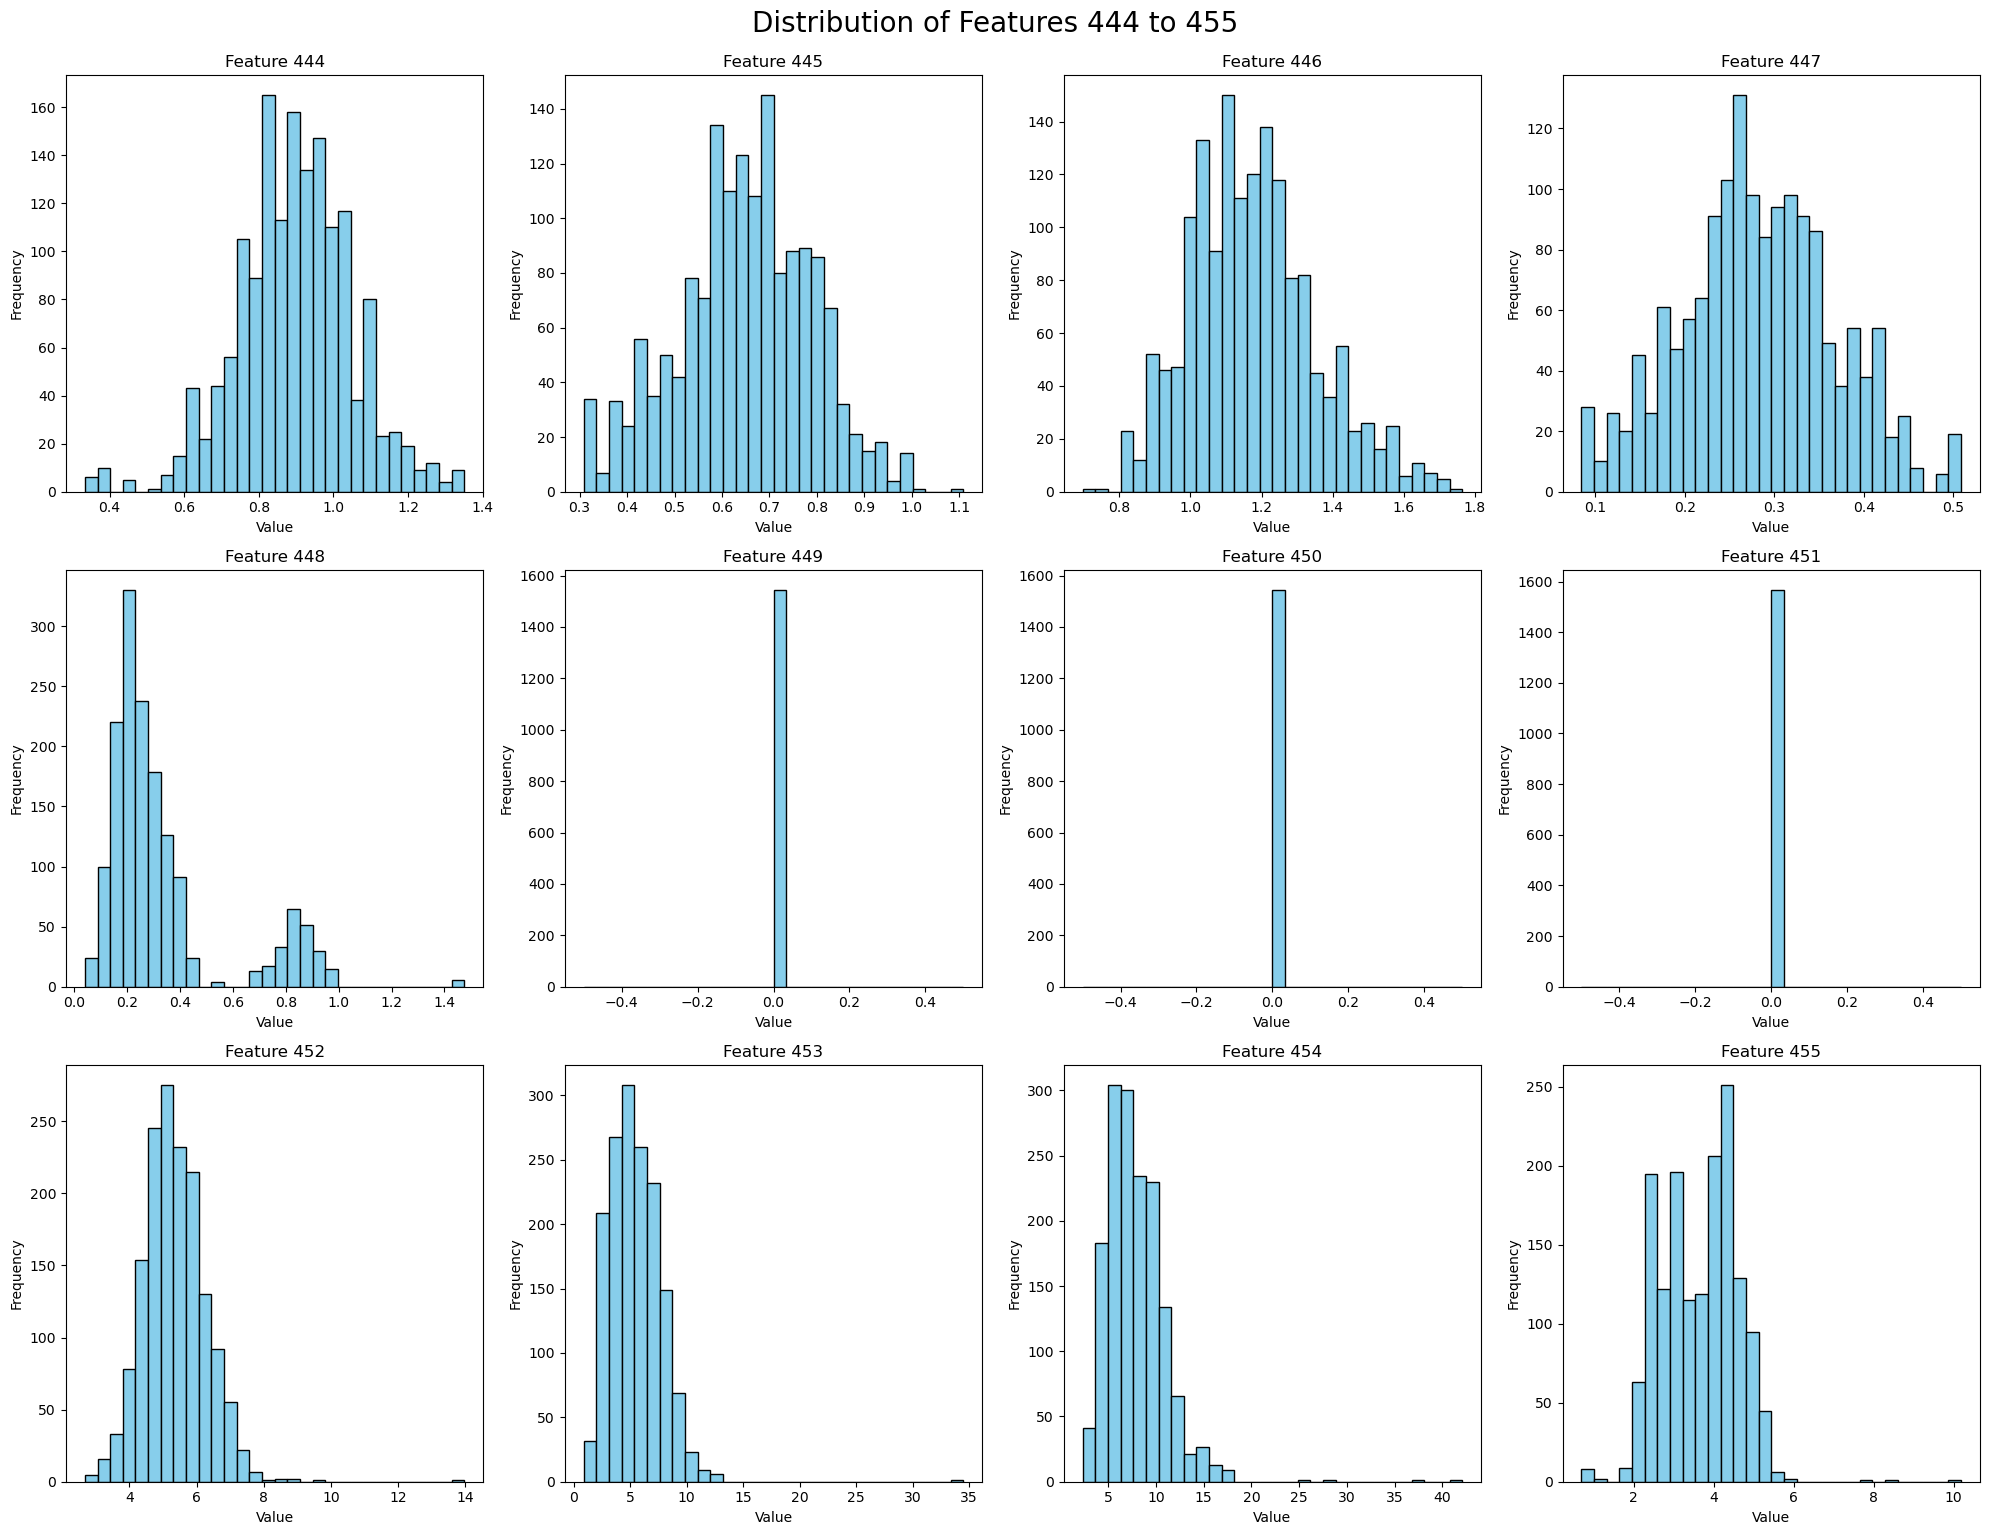

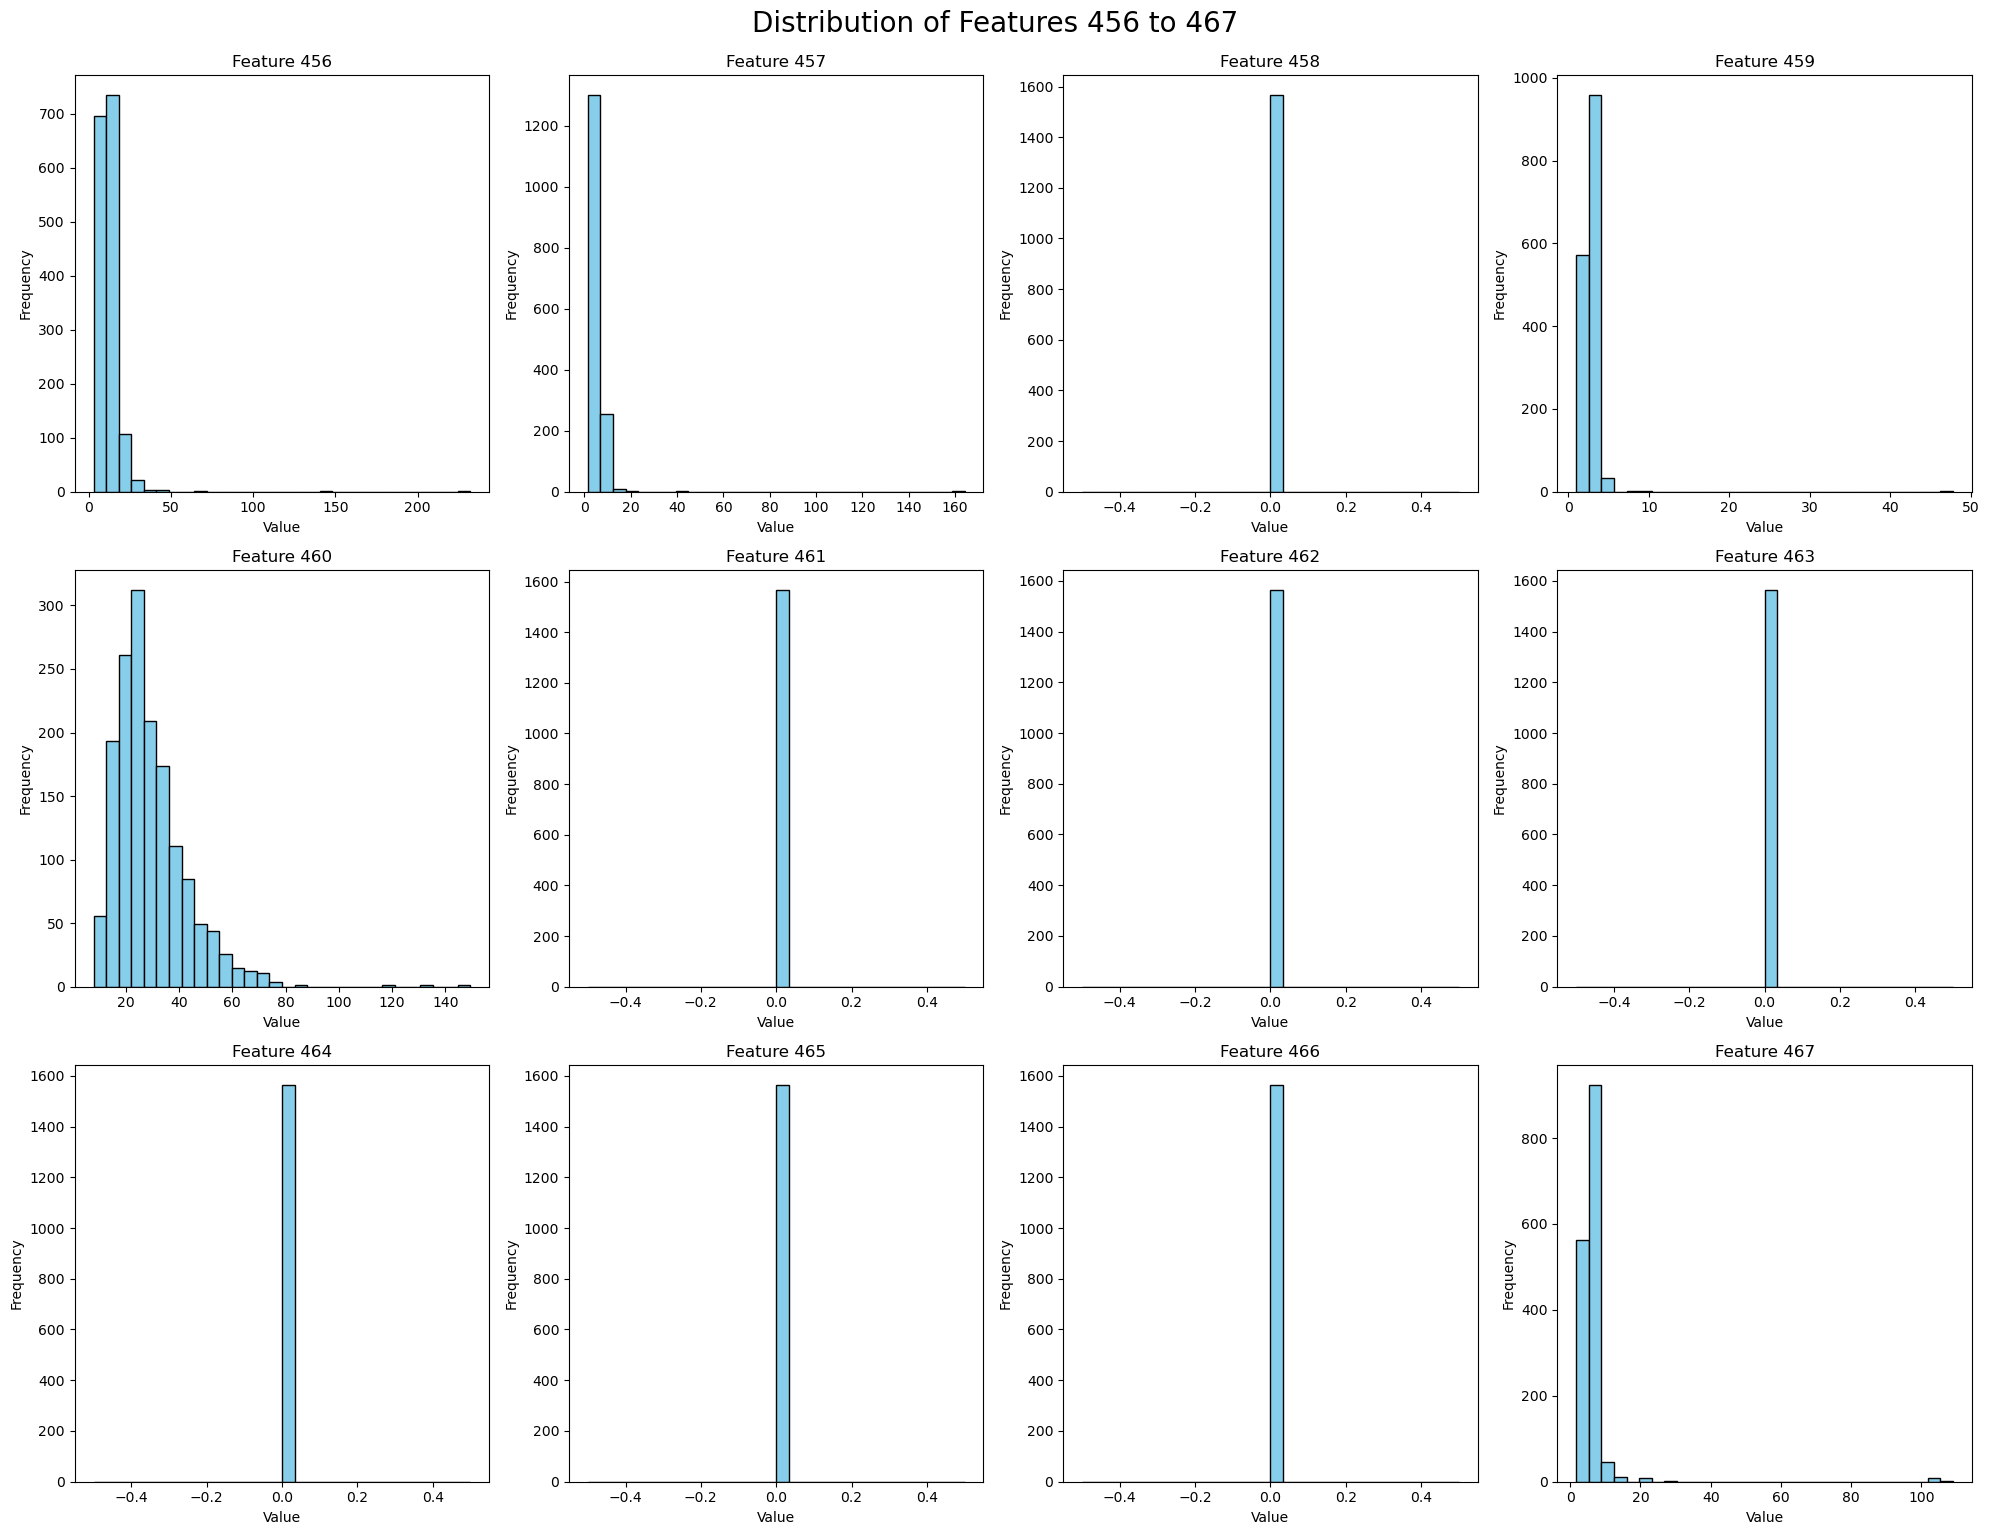

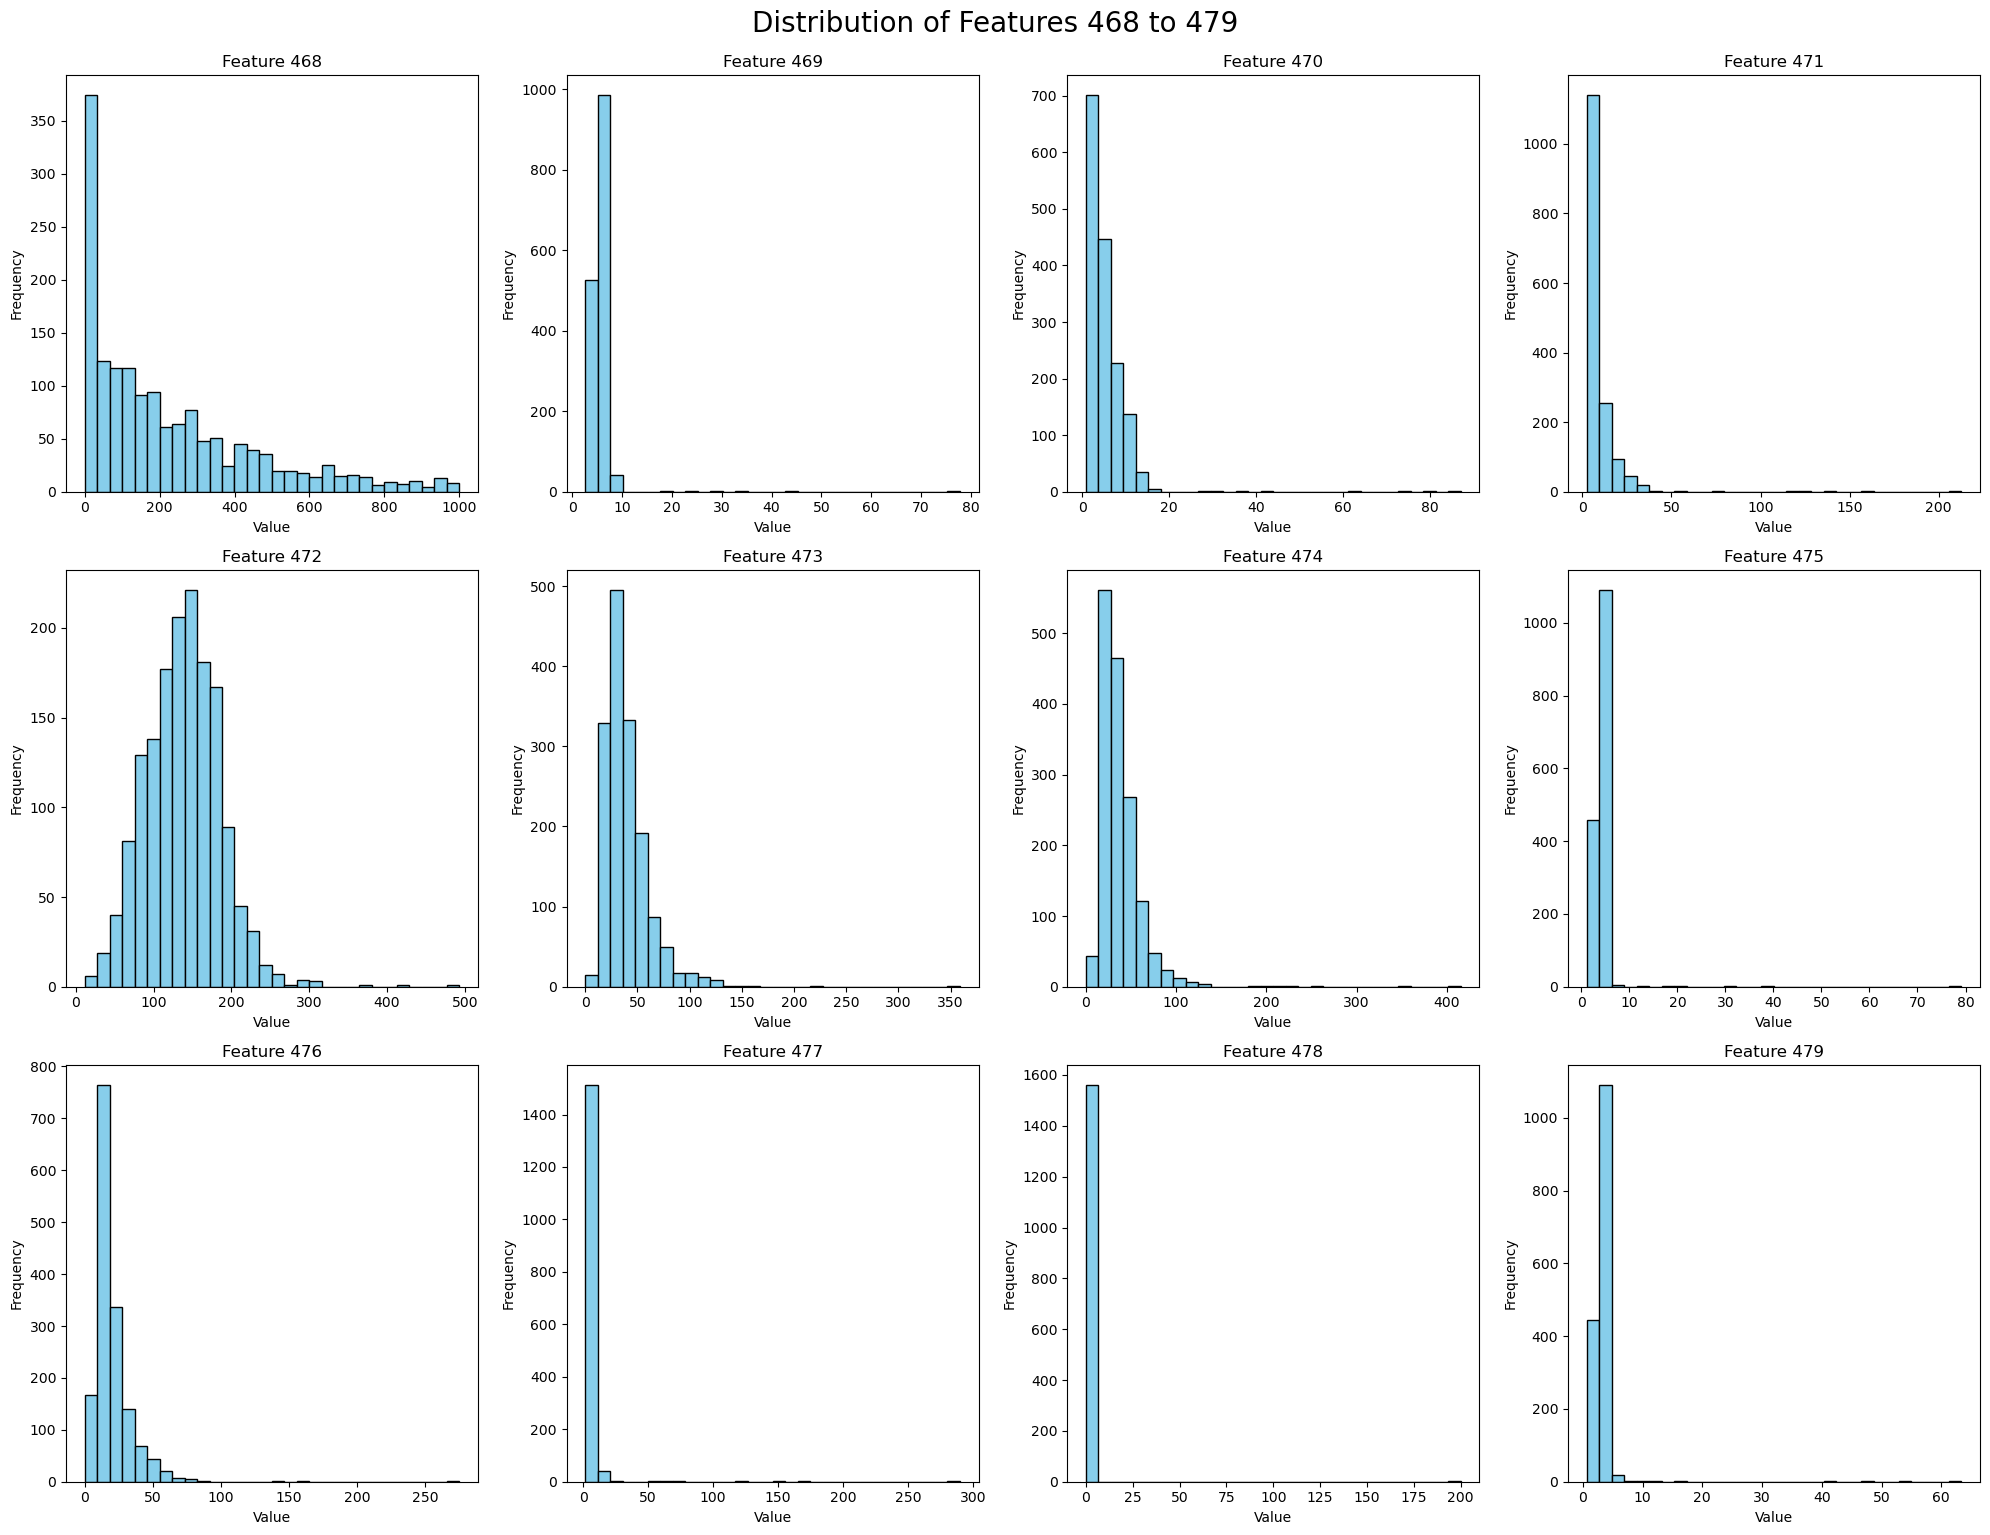

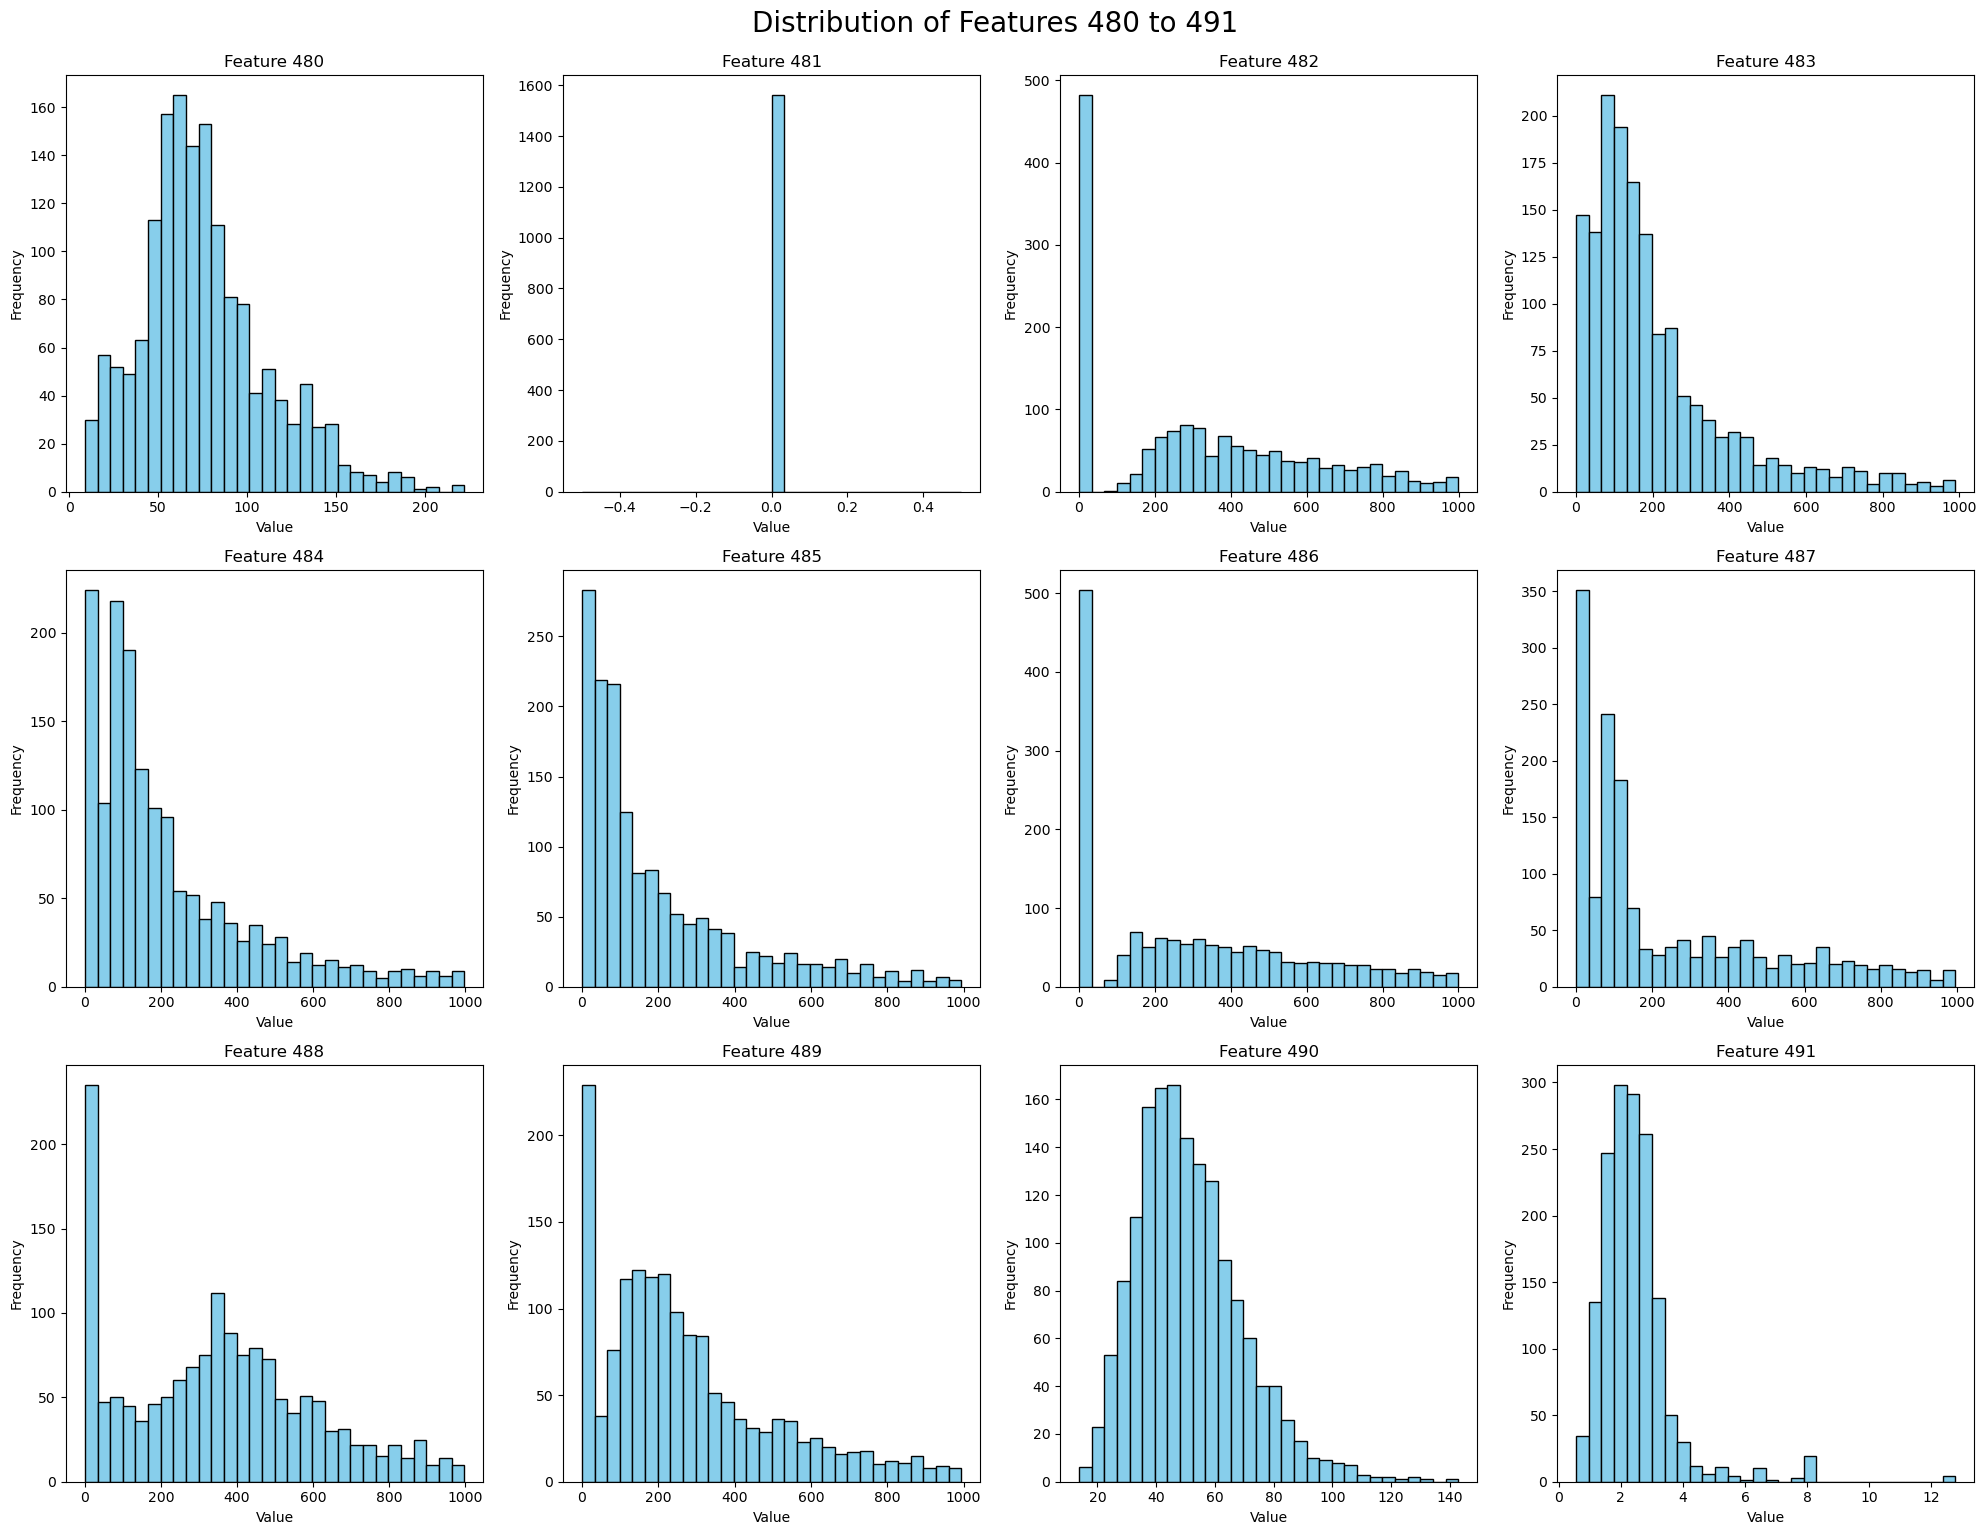

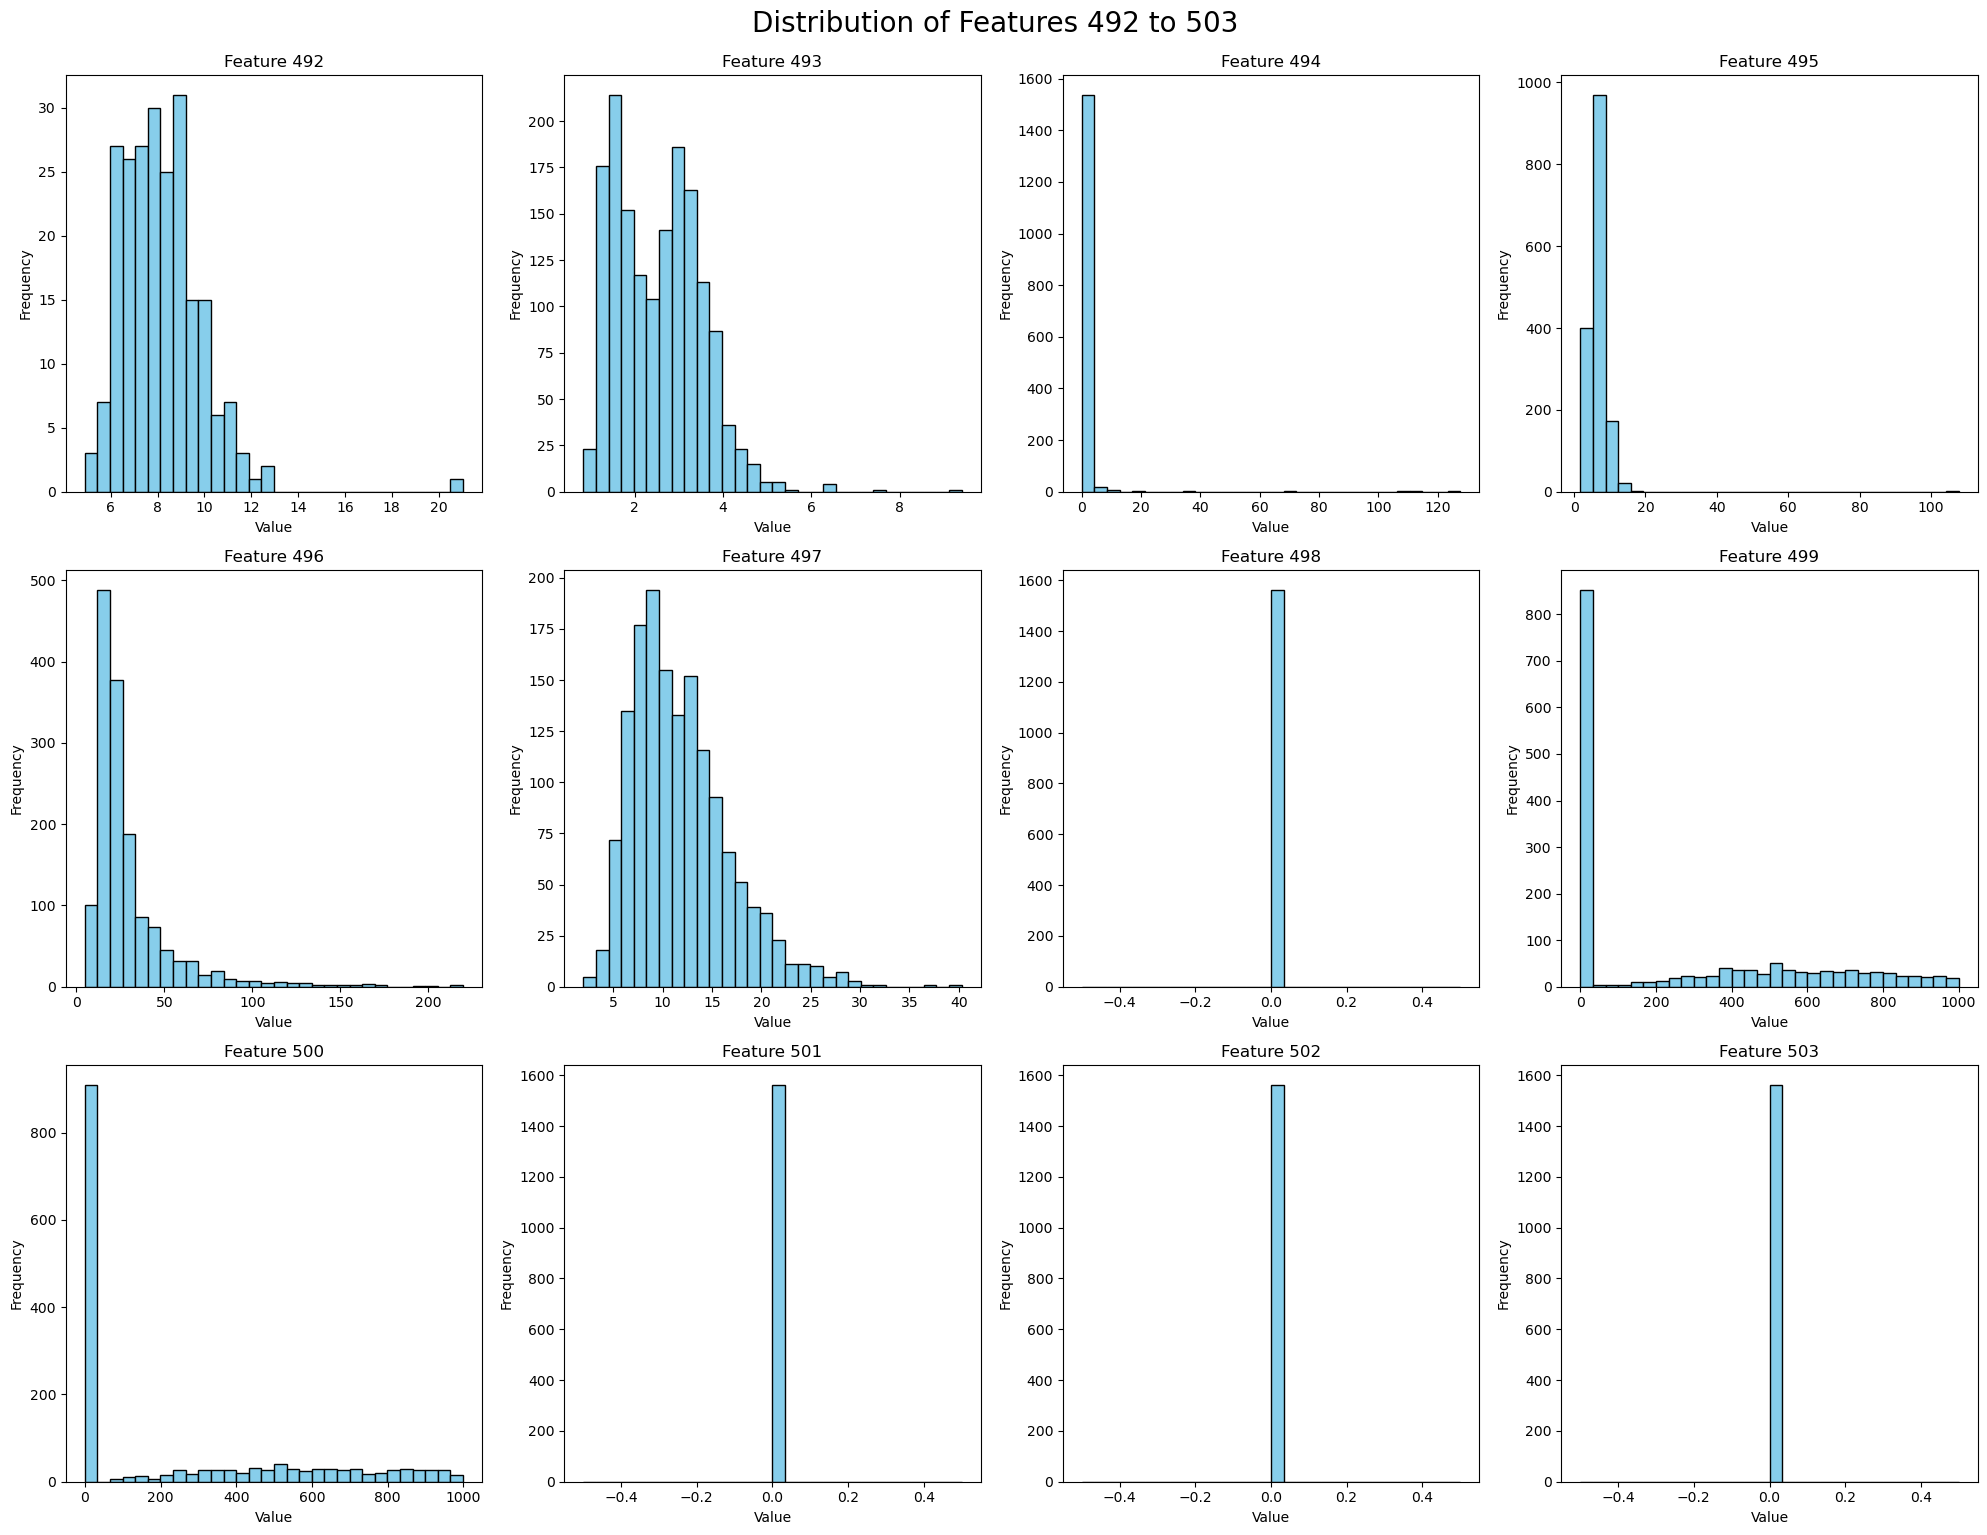

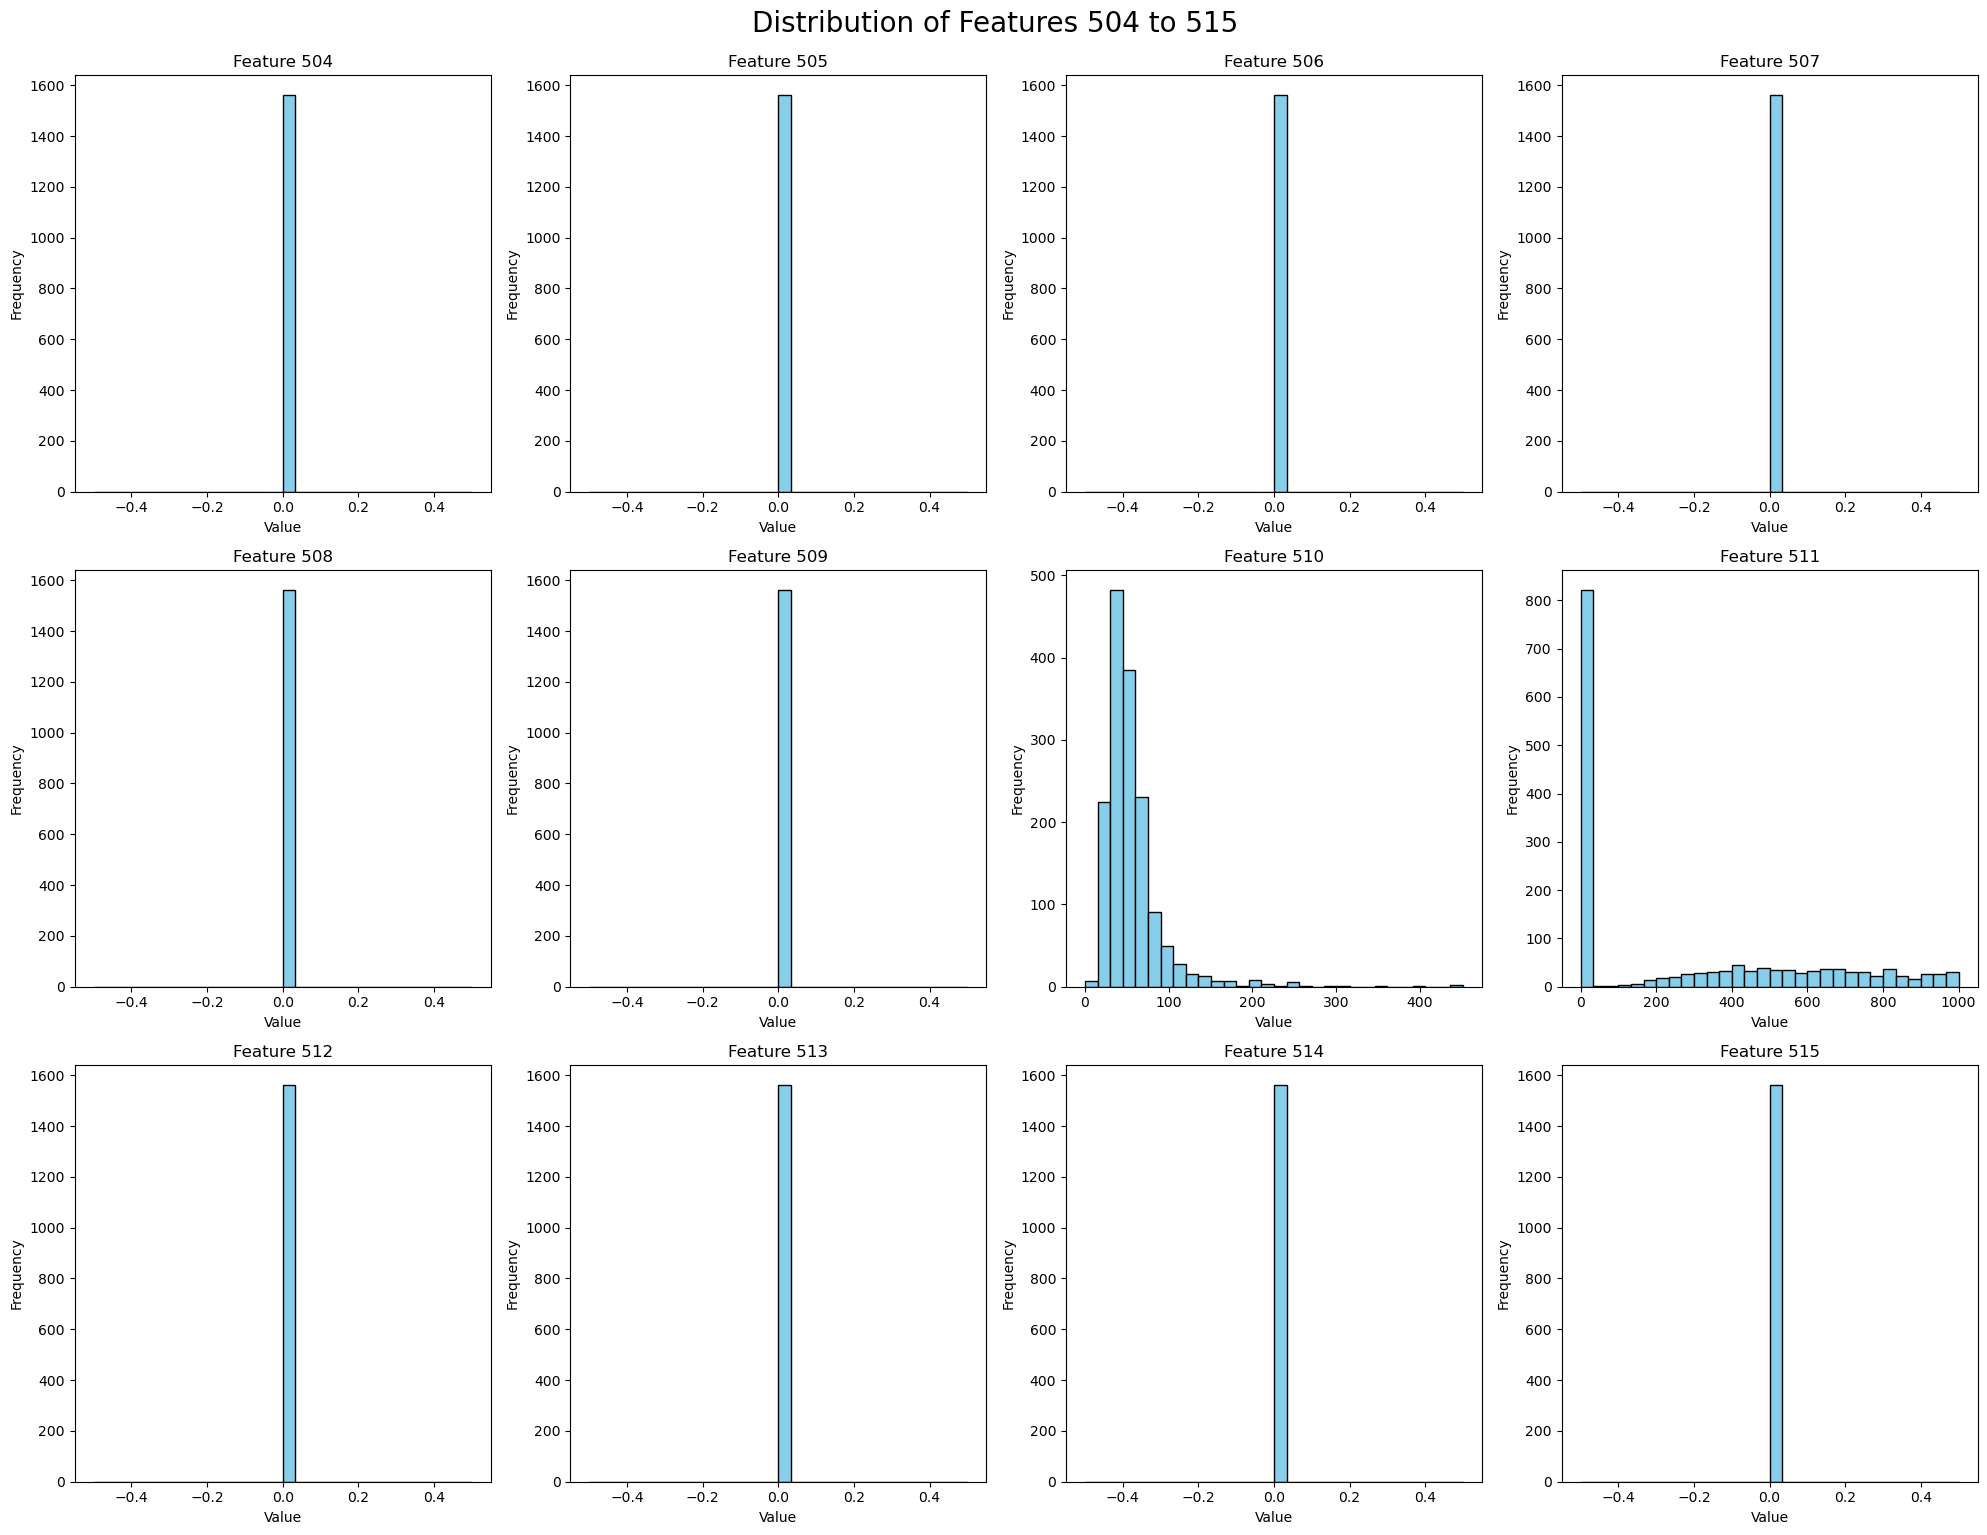

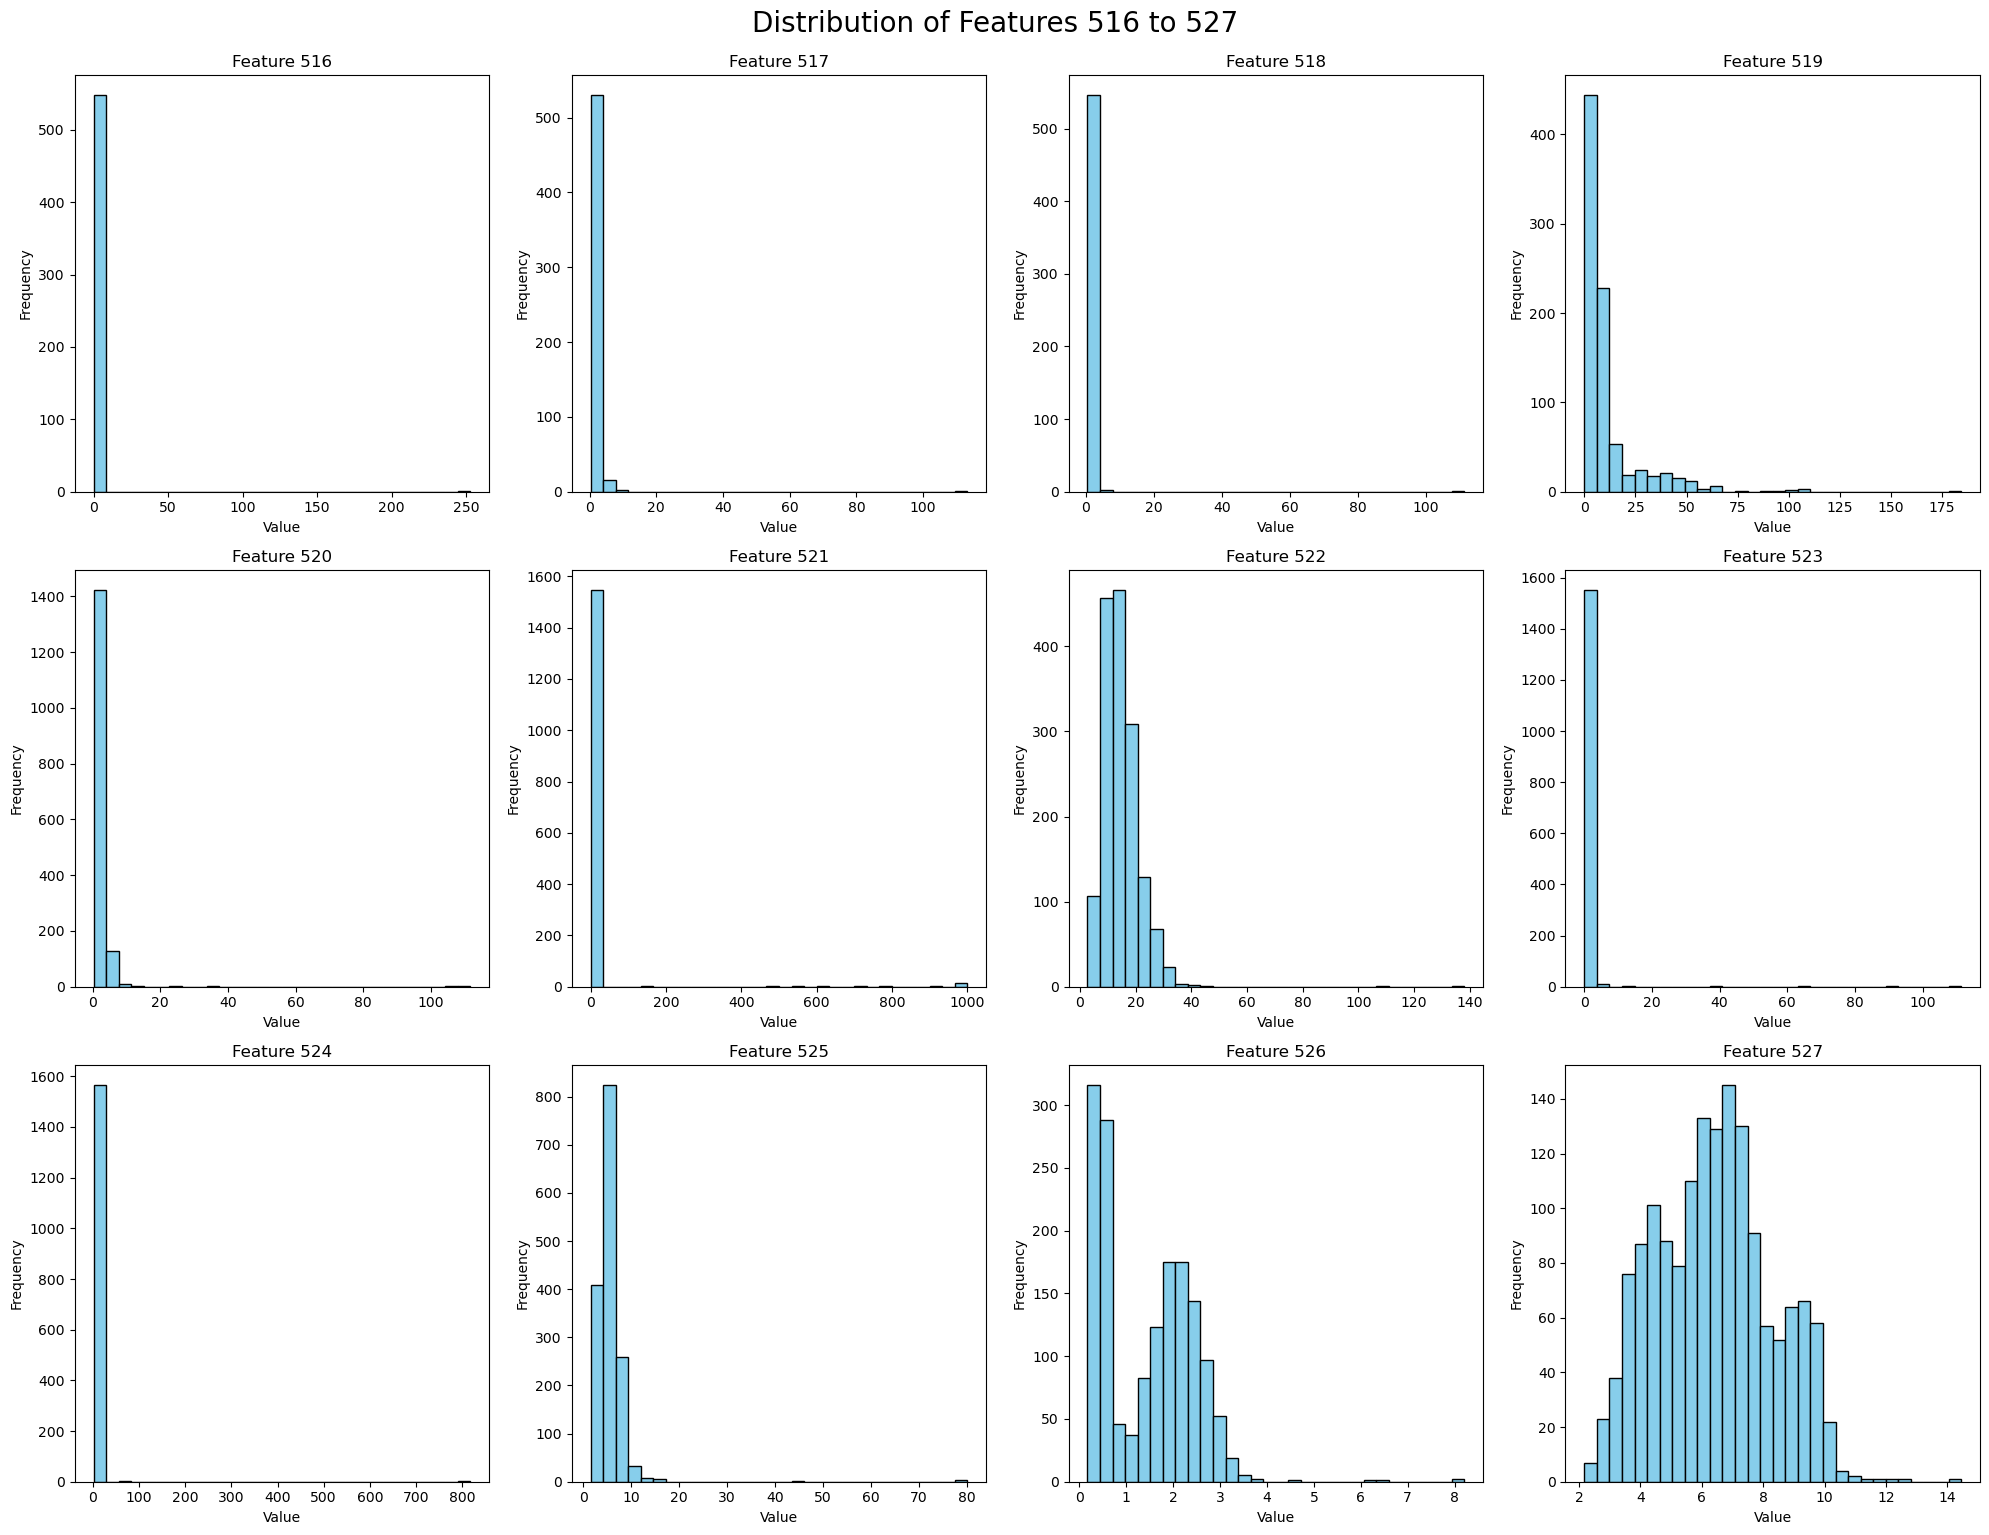

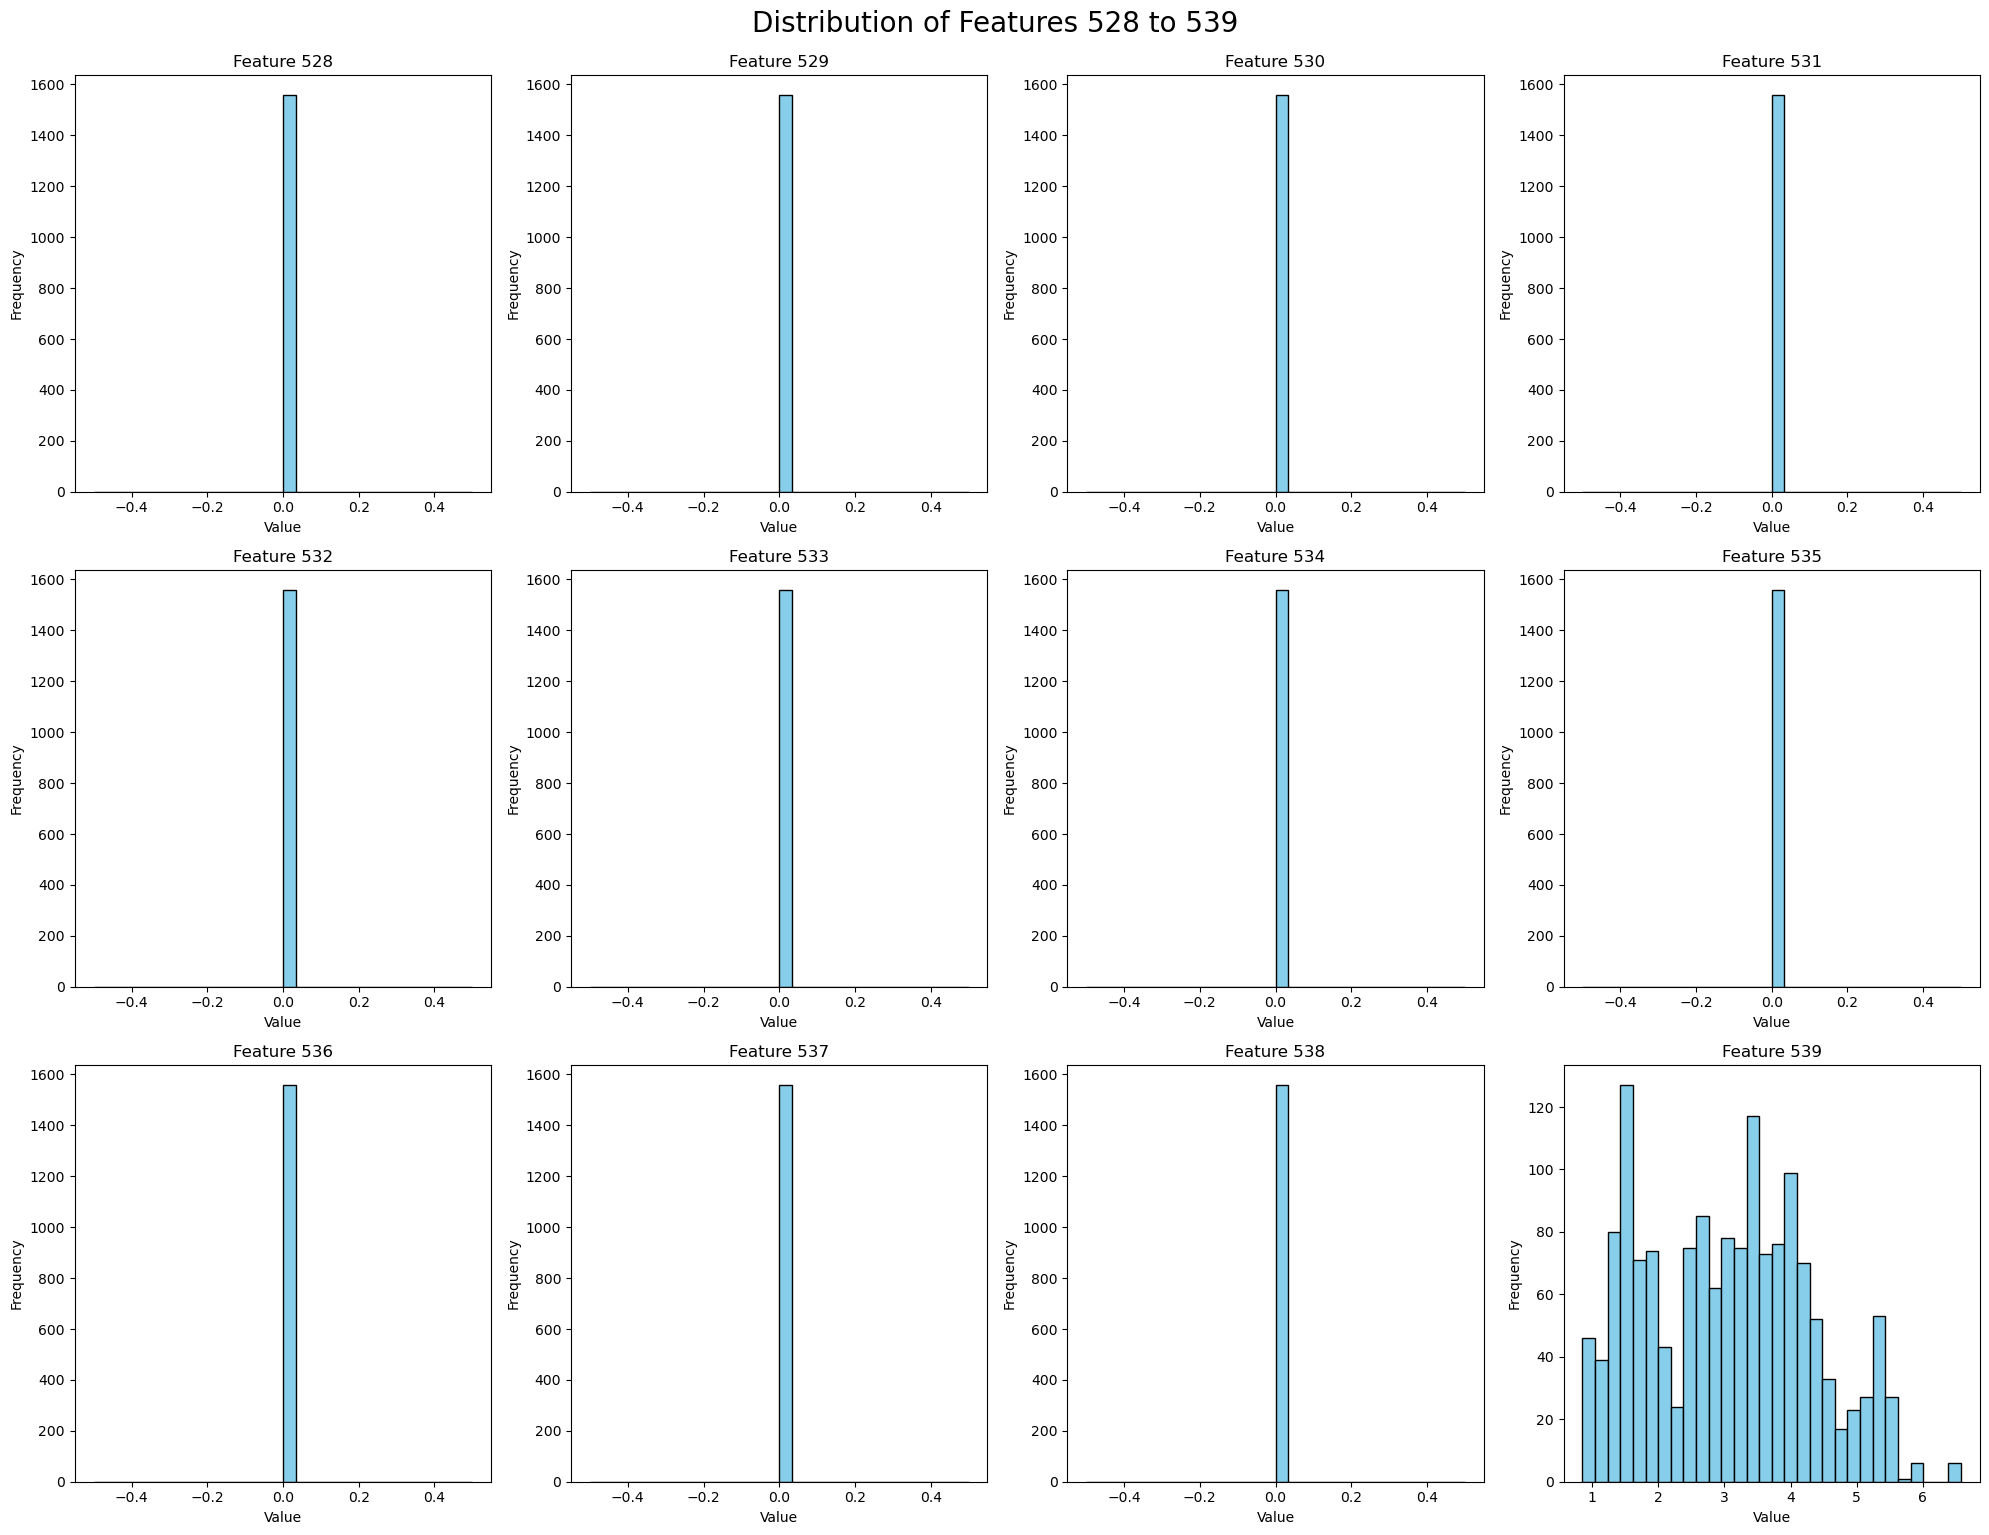

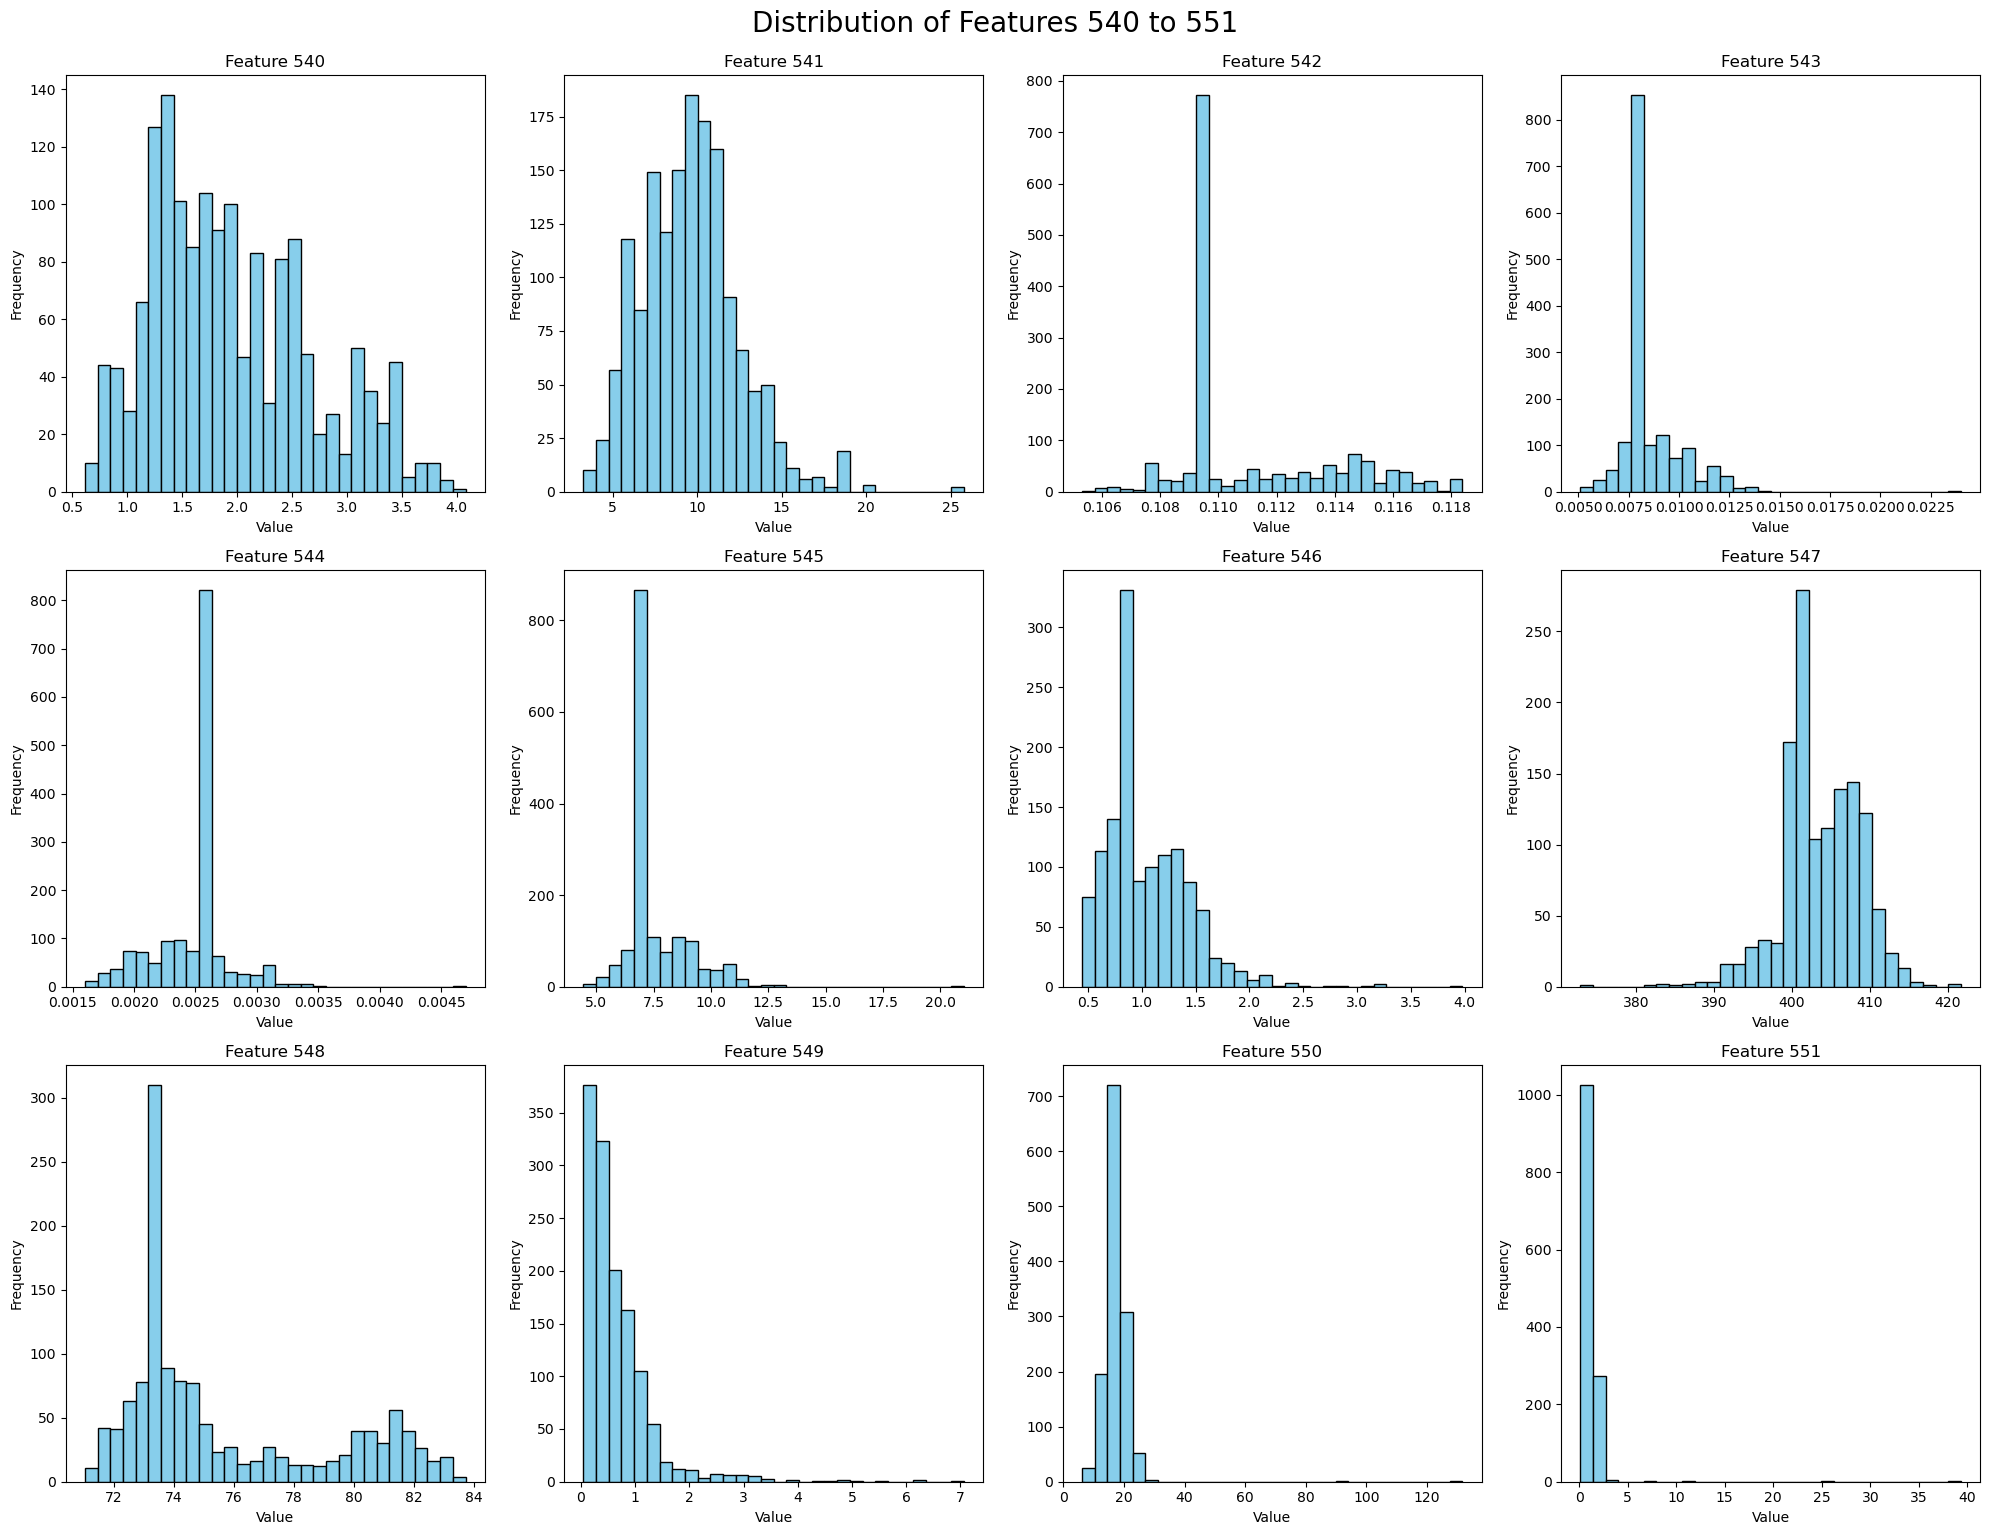

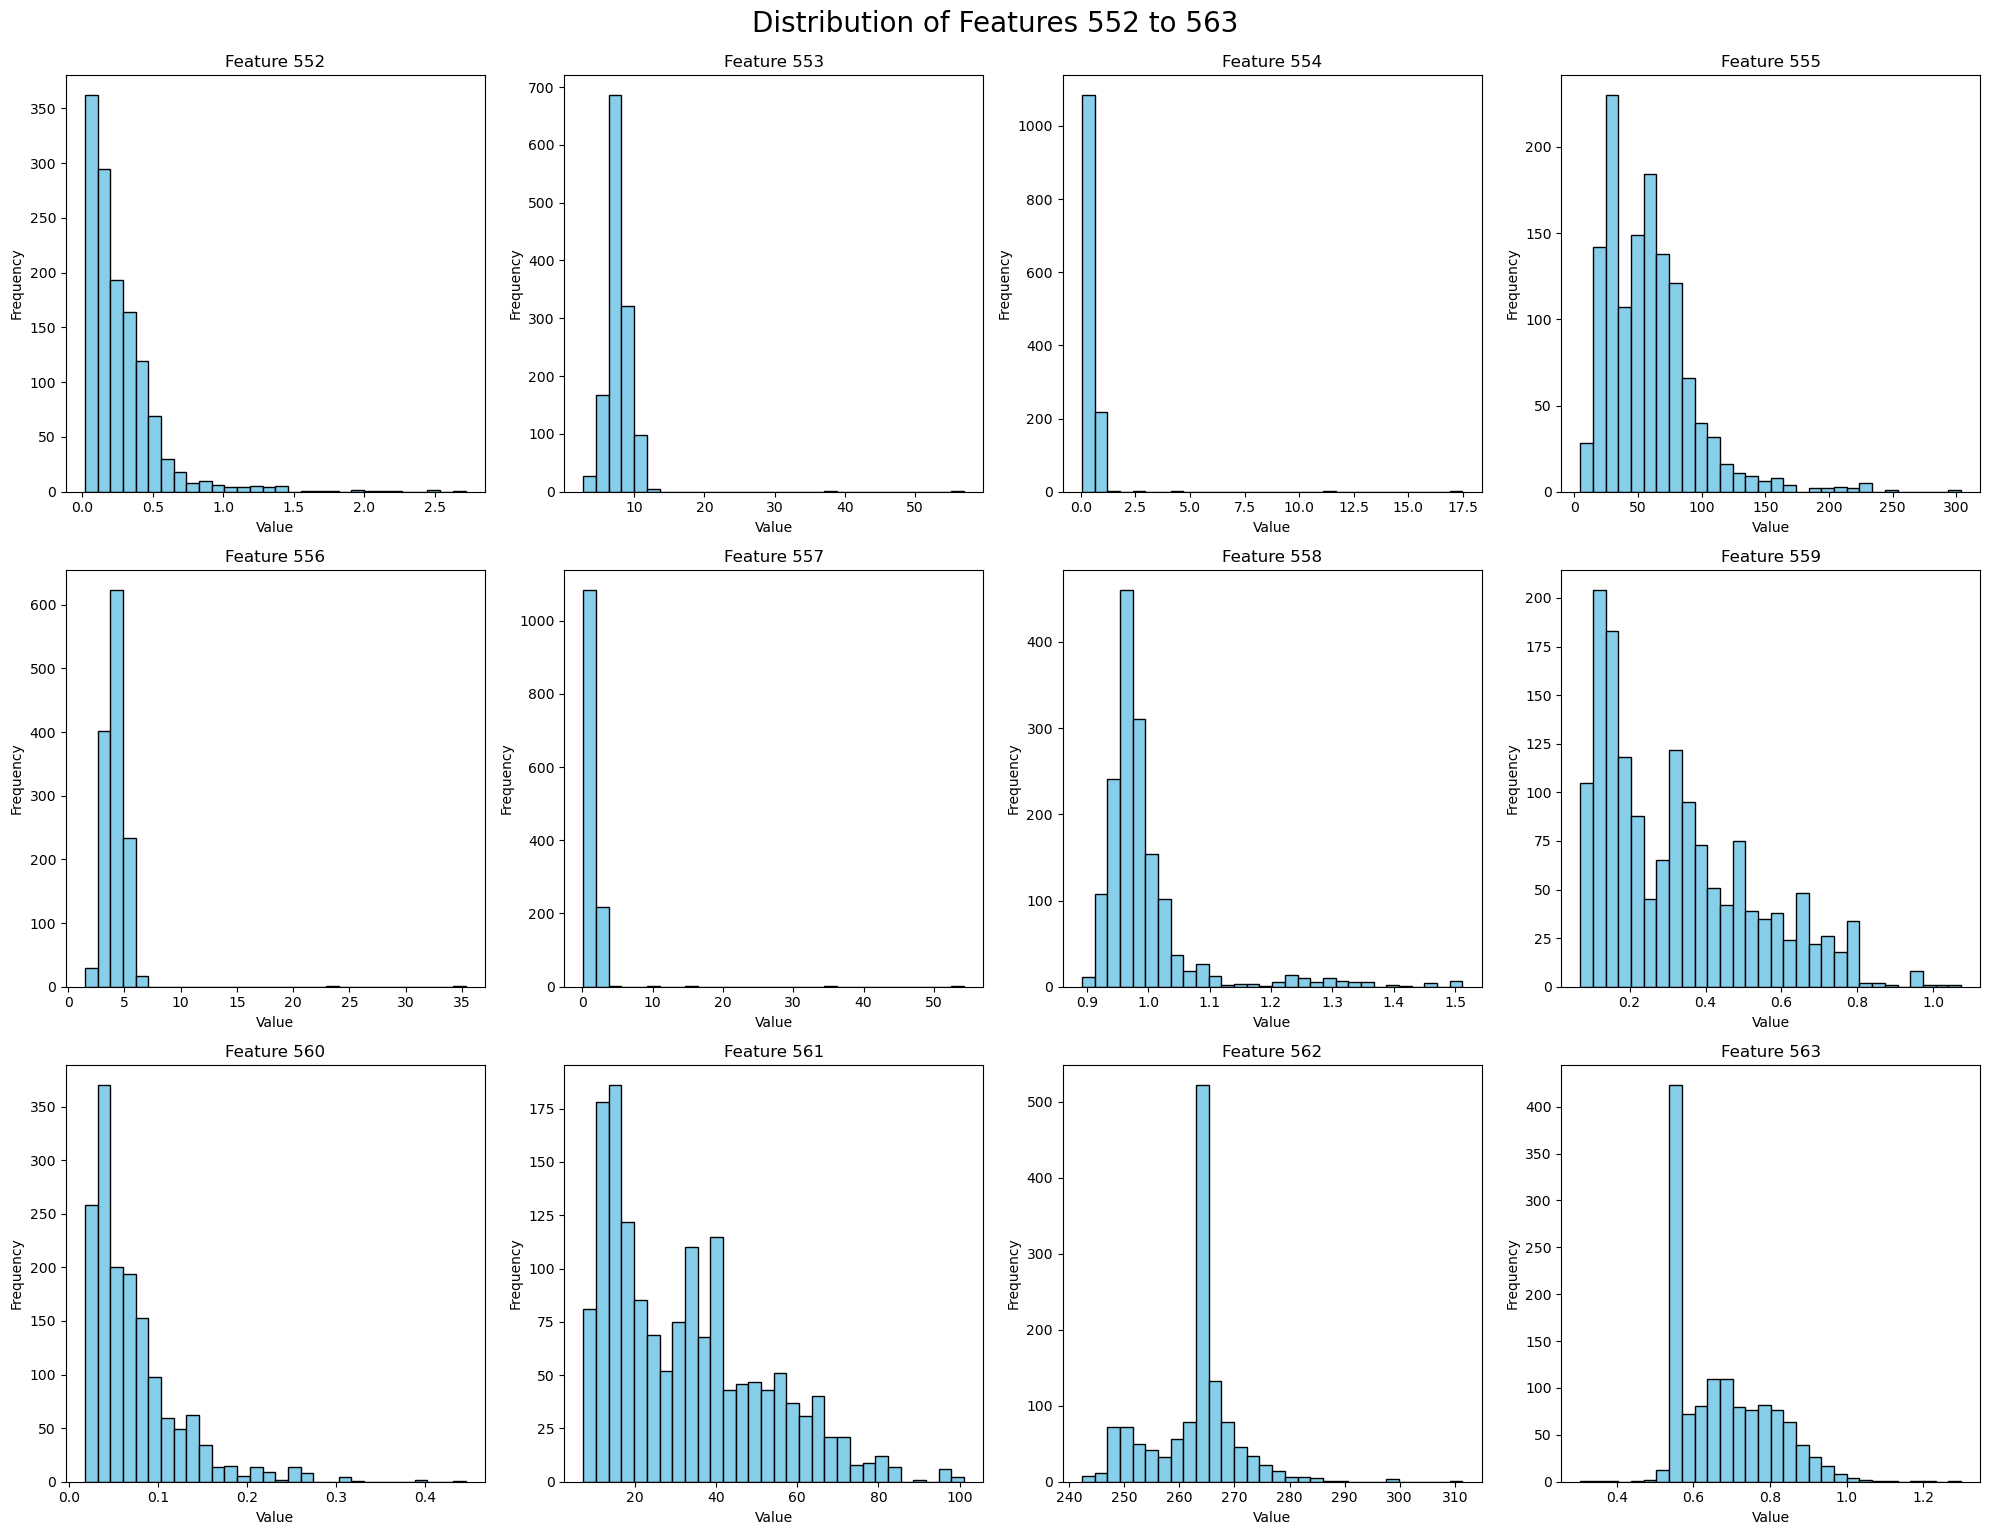

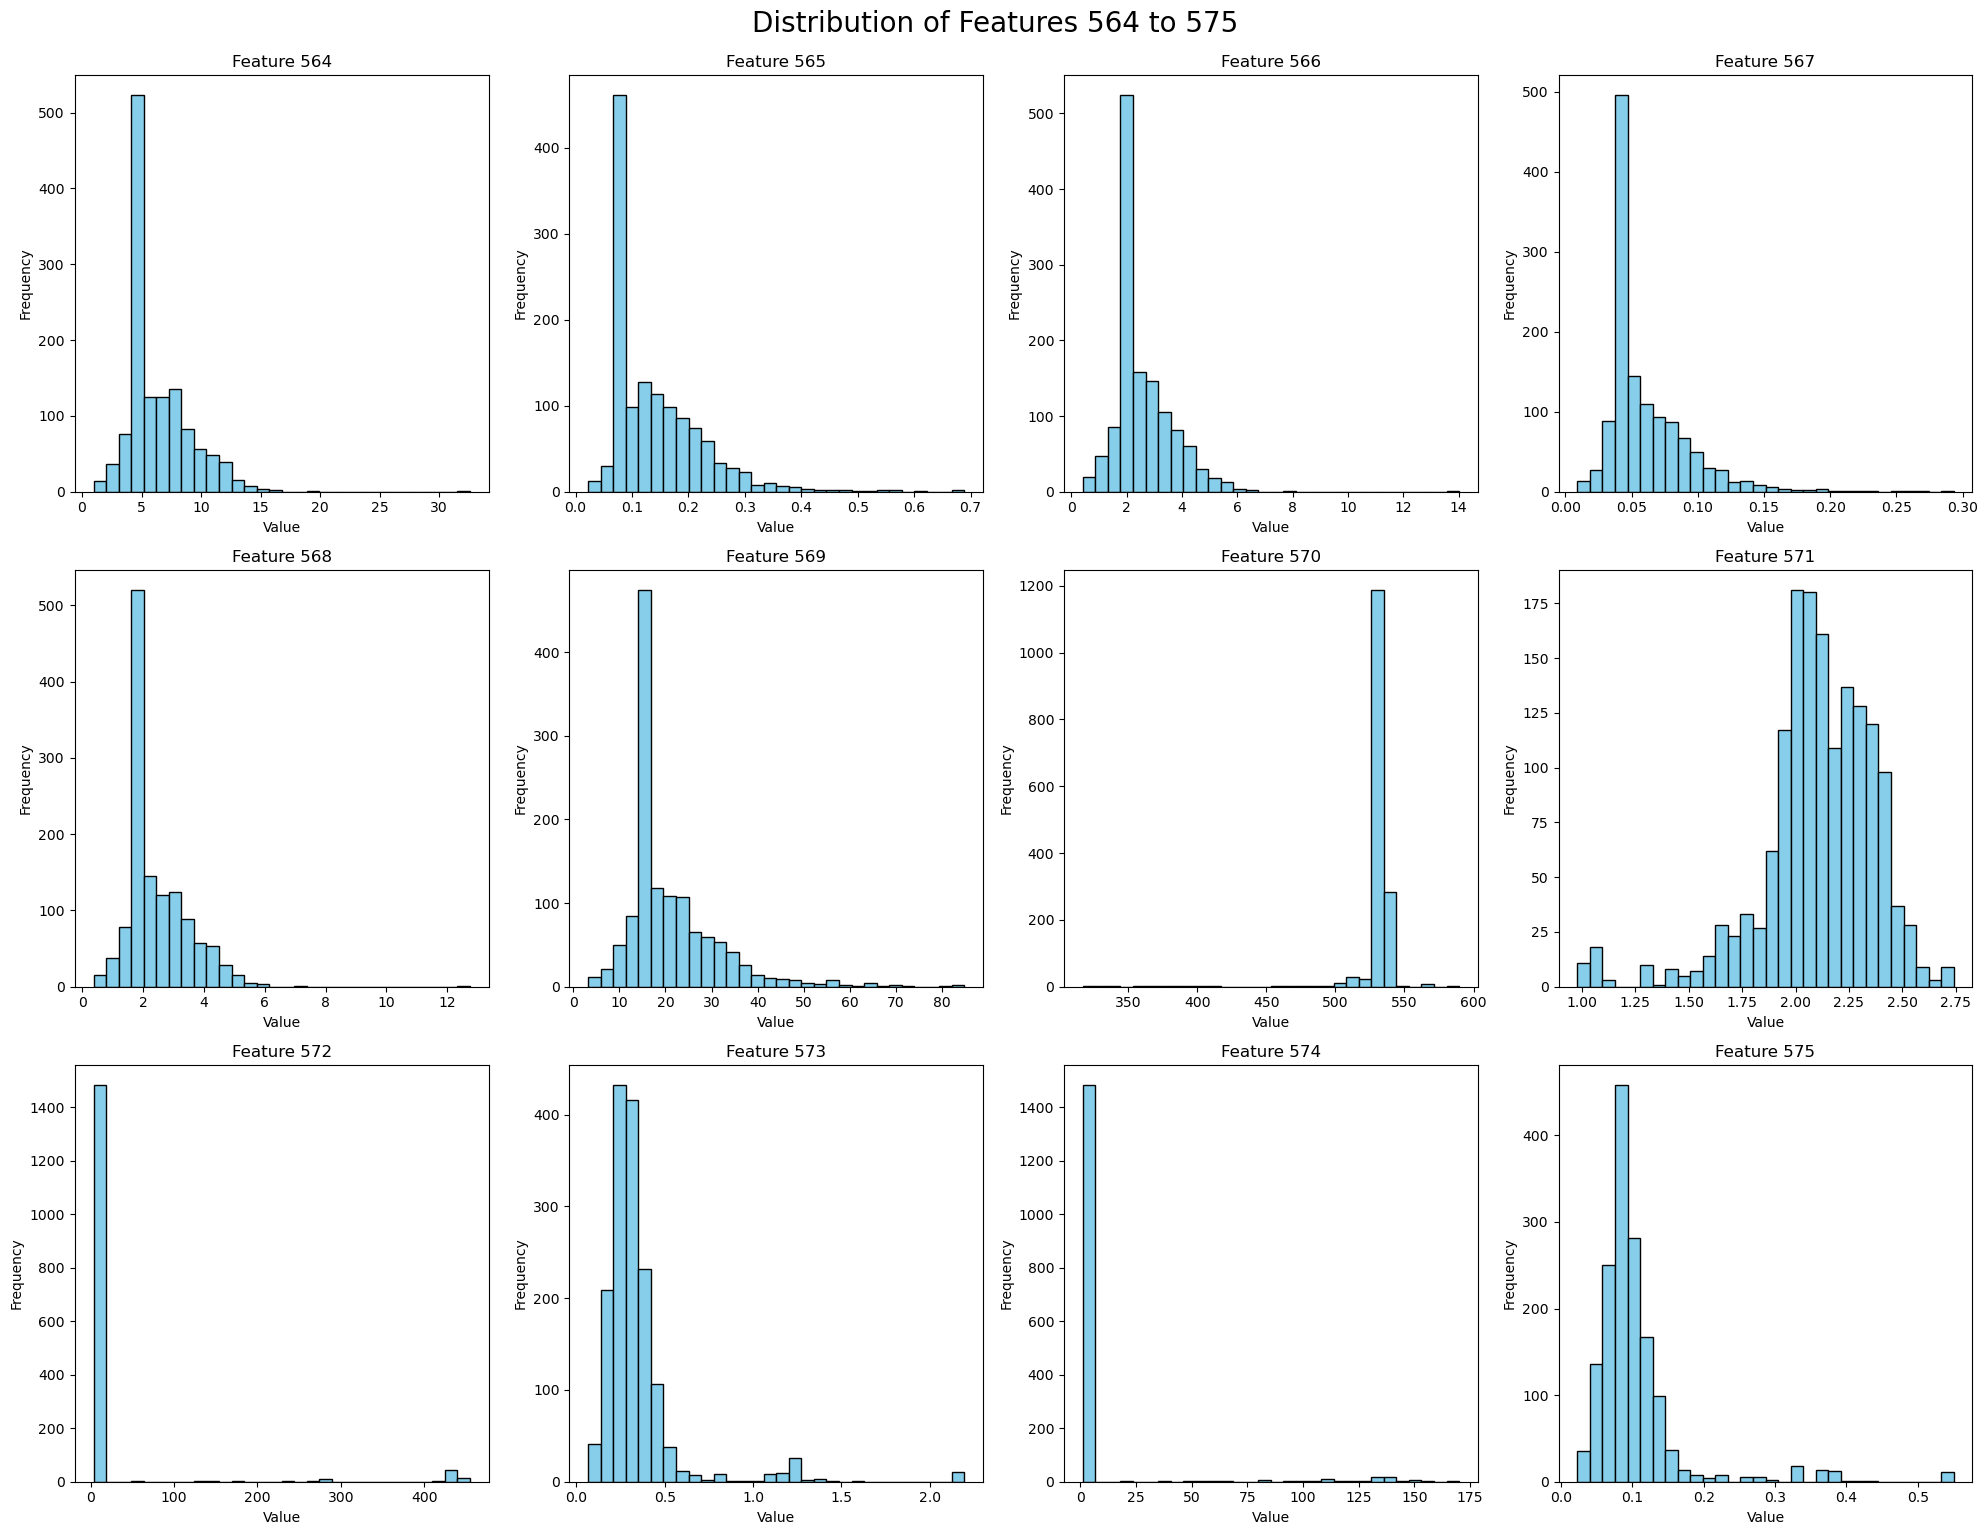

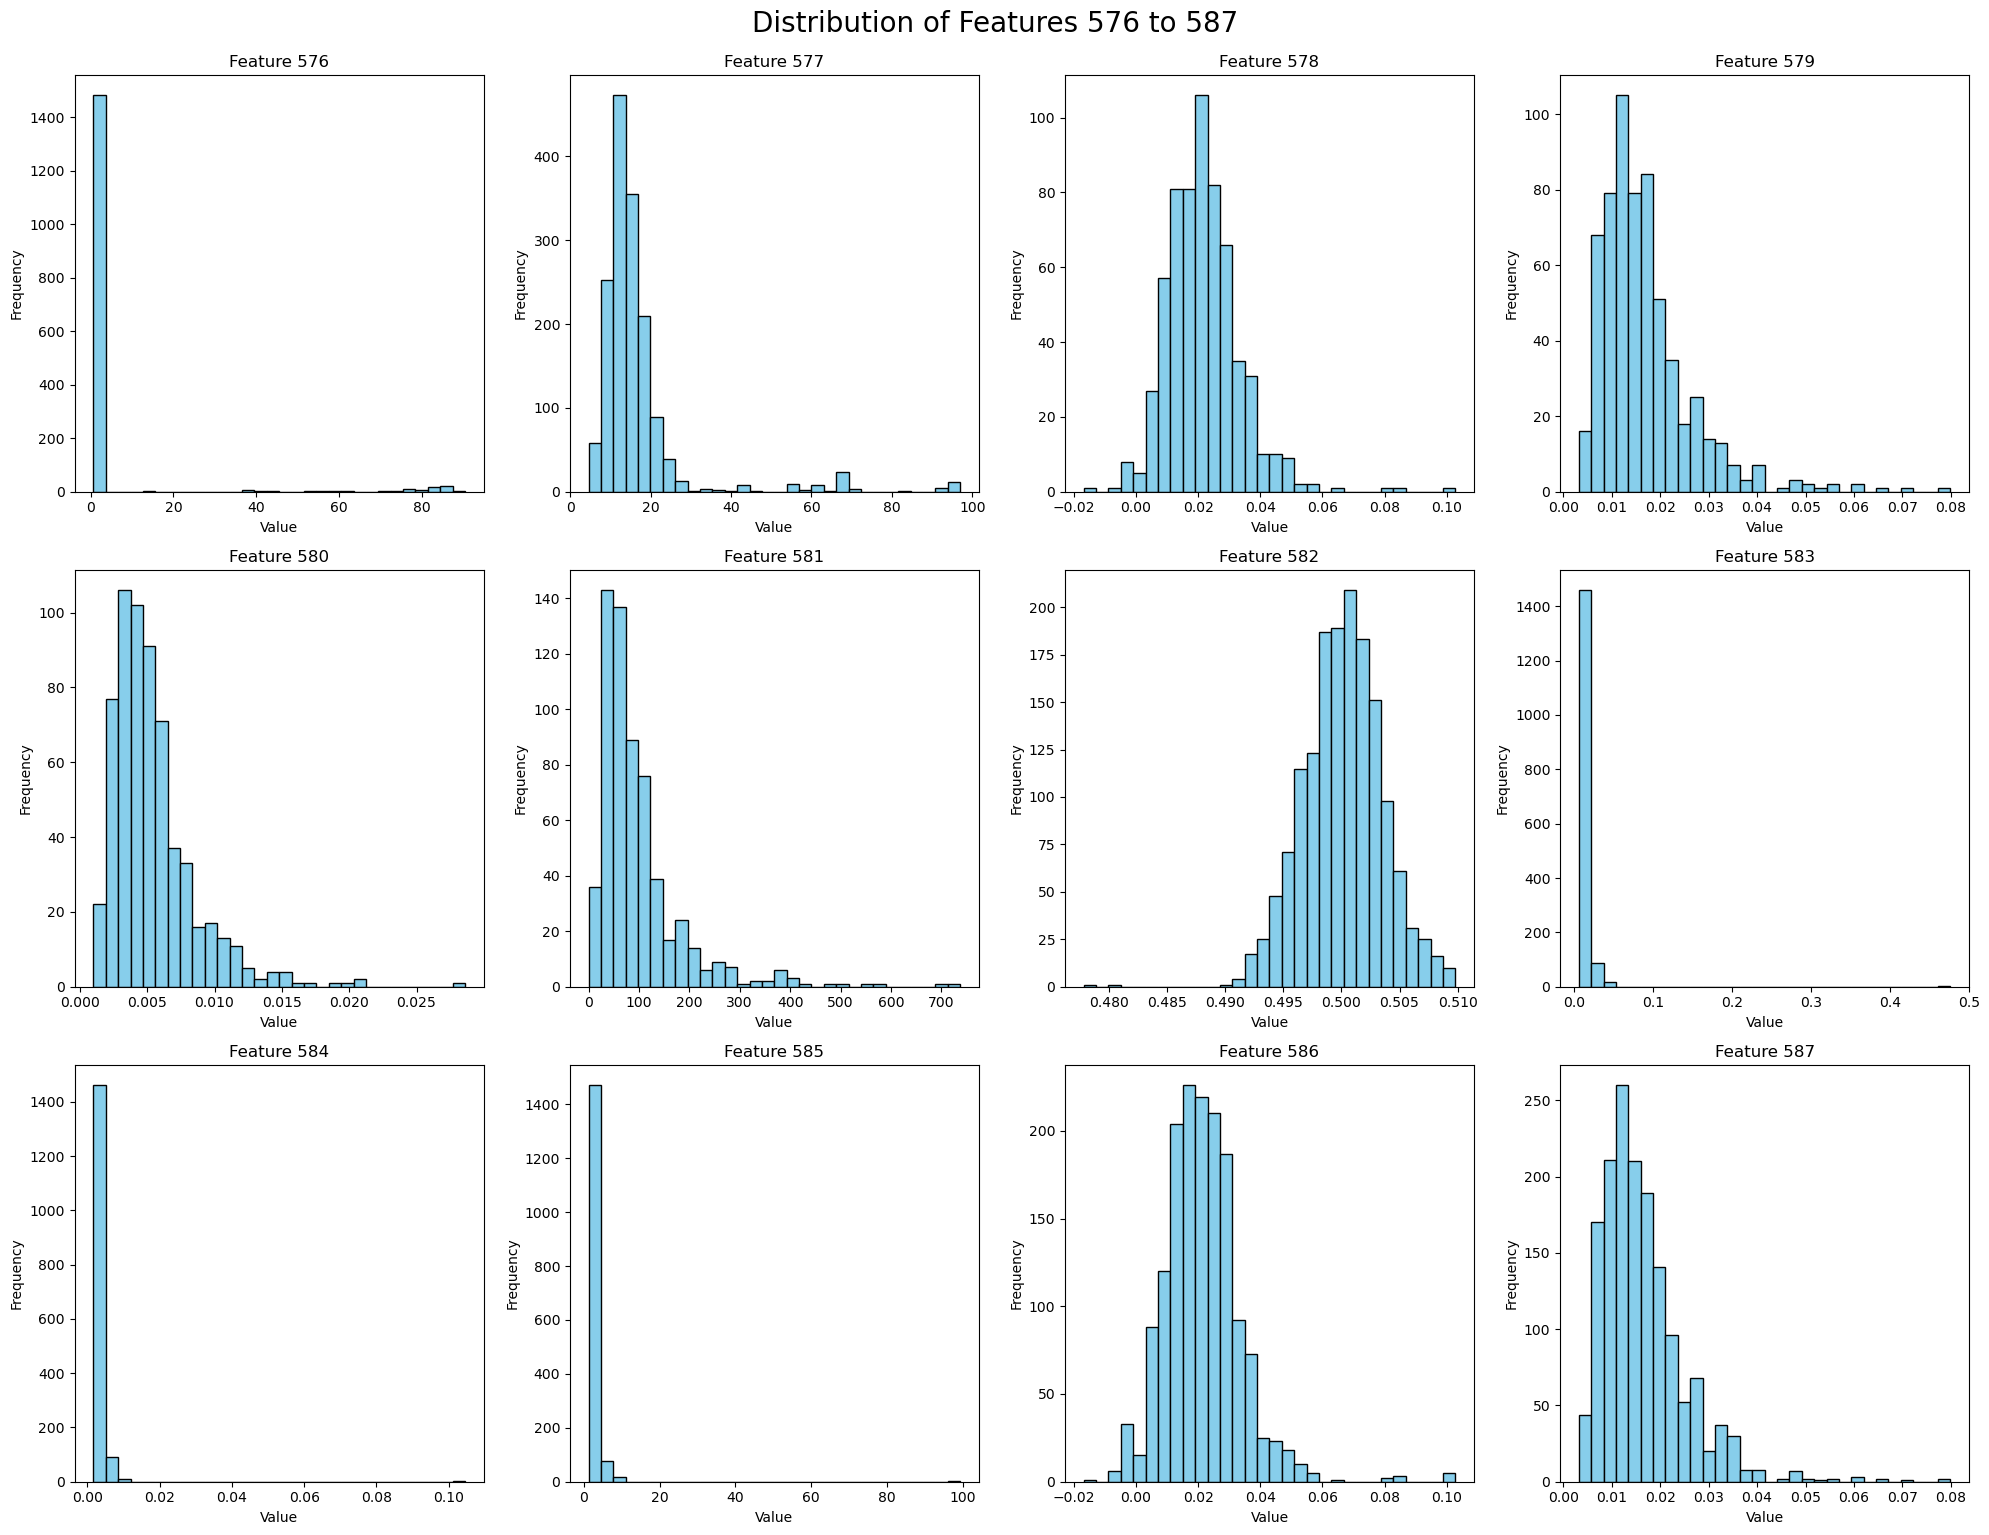

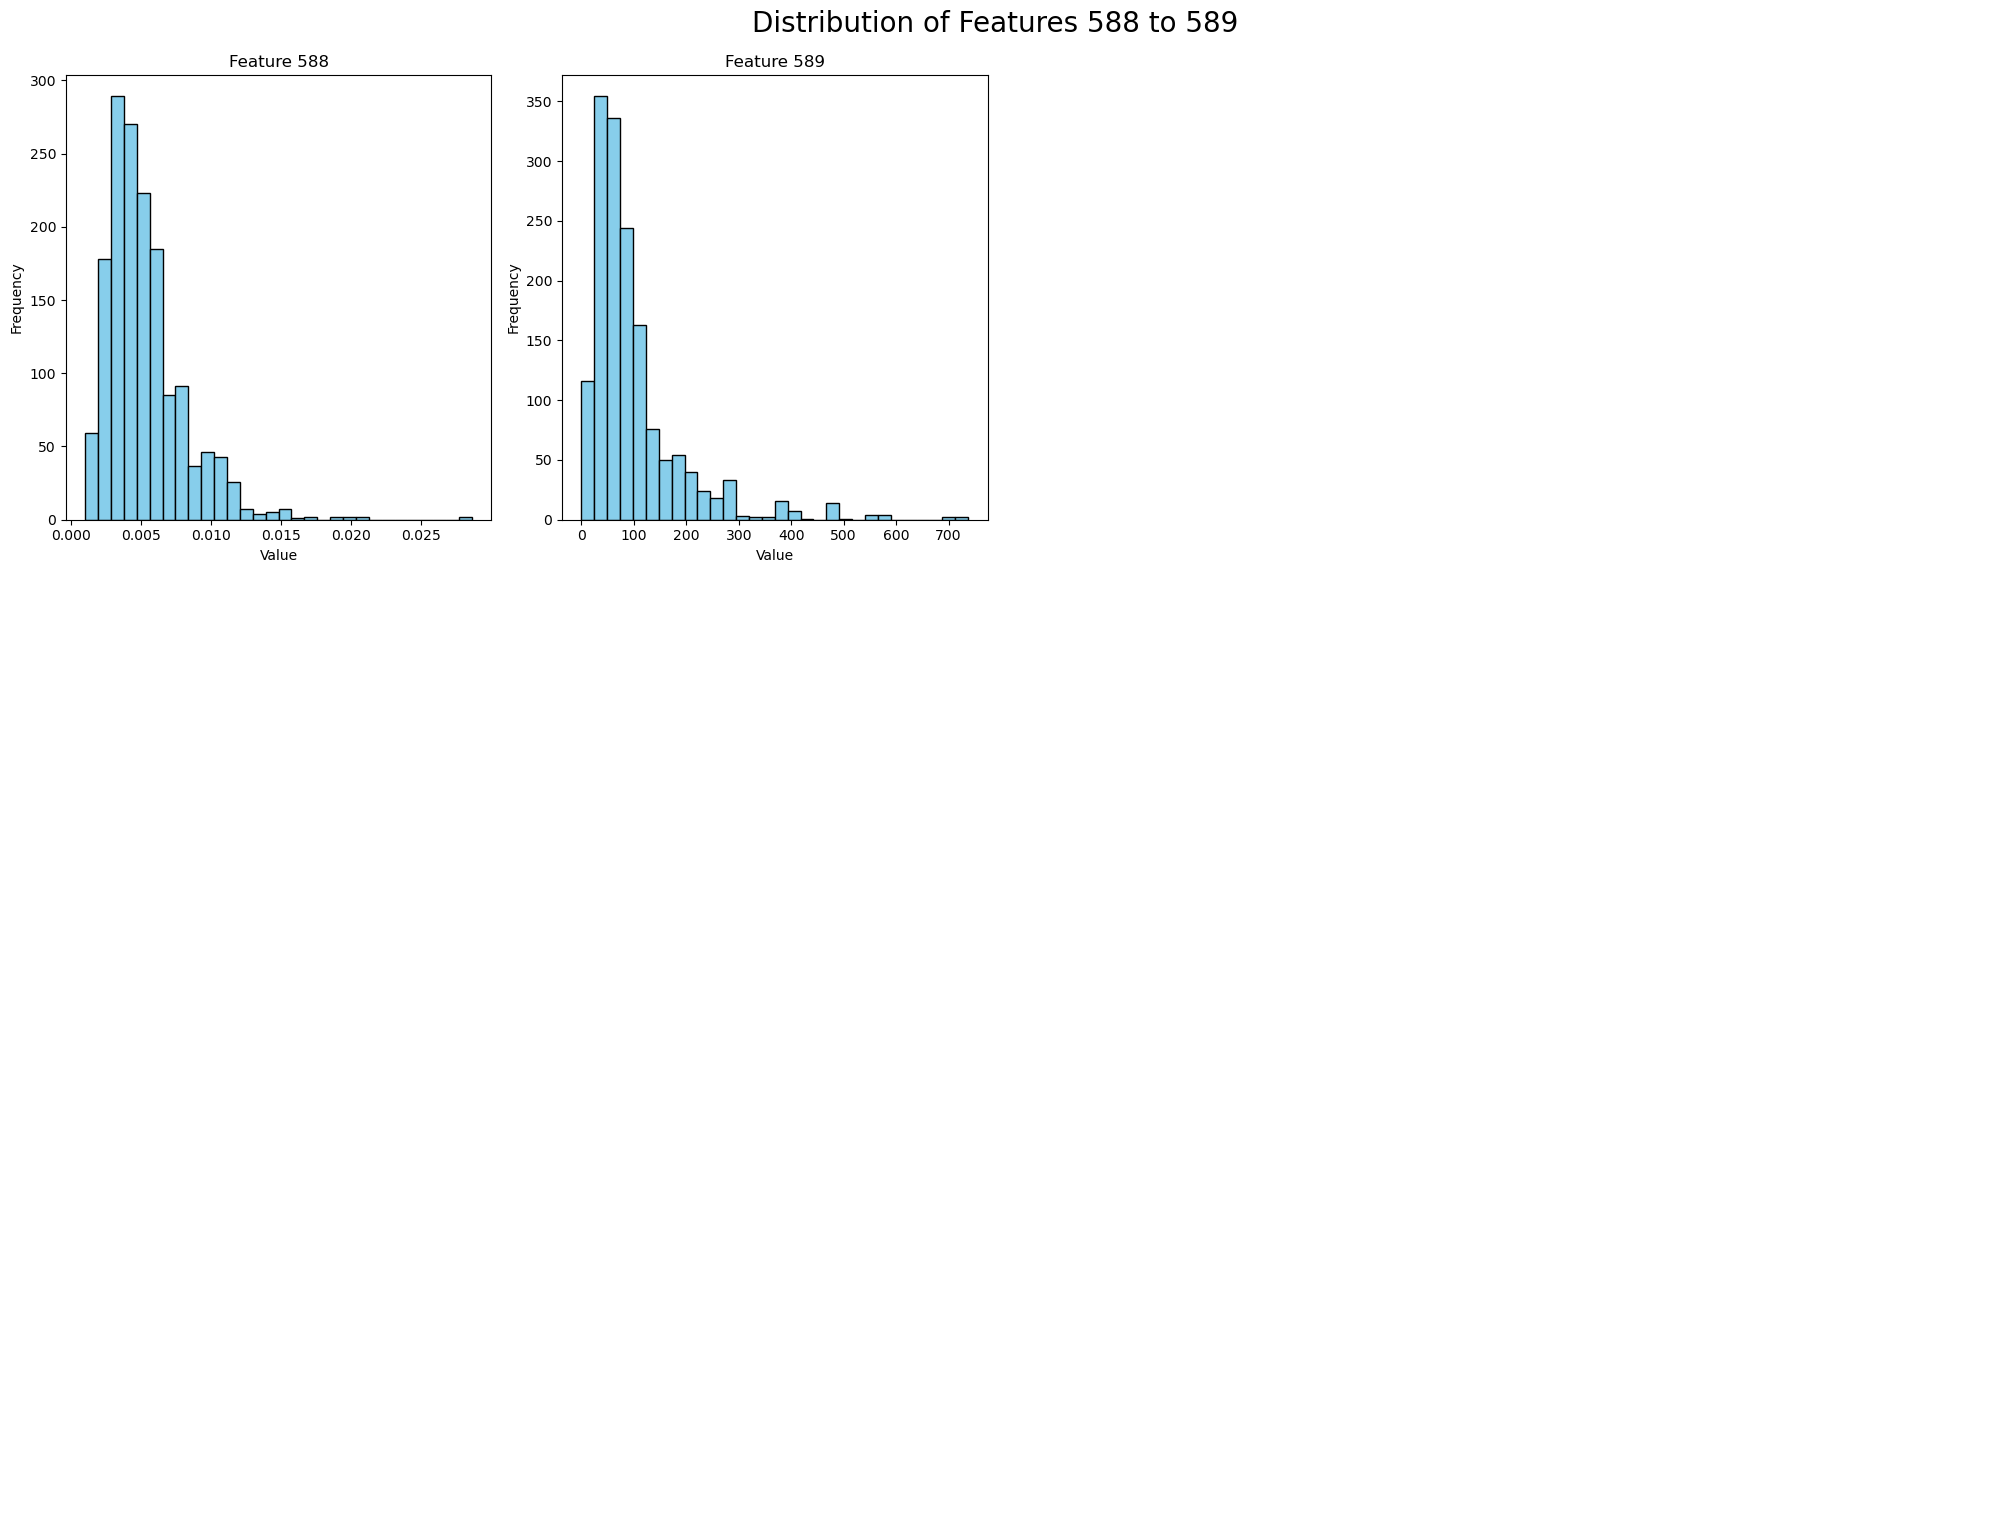

In [38]:
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and loaded
# Extracting features 0 to 589
features = [str(i) for i in range(590)]

# Number of features to plot per grid
features_per_grid = 12

# Calculate number of grids required
num_features = len(features)
num_grids = int(np.ceil(num_features / features_per_grid))

# Iterate through each grid
for grid in range(num_grids):
    start_idx = grid * features_per_grid
    end_idx = min((grid + 1) * features_per_grid, num_features)
    selected_features = features[start_idx:end_idx]

    # Plot the current grid of features
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    axes = axes.flatten()

    for i, feature in enumerate(selected_features):
        ax = axes[i]
        ax.hist(data[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
        ax.set_title(f'Feature {feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Distribution of Features {start_idx} to {end_idx-1}', fontsize=20, y=1.02)
    plt.show()


### Feature Distributions

In [45]:
print('data dimensions:',data.shape)
perc_missing_per_ftr = data.isnull().sum(axis=0)/data.shape[0] 
print('fraction of missing values in features:') 
print(perc_missing_per_ftr[perc_missing_per_ftr > 0.5])

data dimensions: (1567, 592)
fraction of missing values in features:
72     0.506701
73     0.506701
85     0.855775
109    0.649649
110    0.649649
111    0.649649
157    0.911934
158    0.911934
220    0.855775
244    0.649649
245    0.649649
246    0.649649
292    0.911934
293    0.911934
345    0.506701
346    0.506701
358    0.855775
382    0.649649
383    0.649649
384    0.649649
492    0.855775
516    0.649649
517    0.649649
518    0.649649
578    0.605616
579    0.605616
580    0.605616
581    0.605616
dtype: float64


### Missing Data Fractions

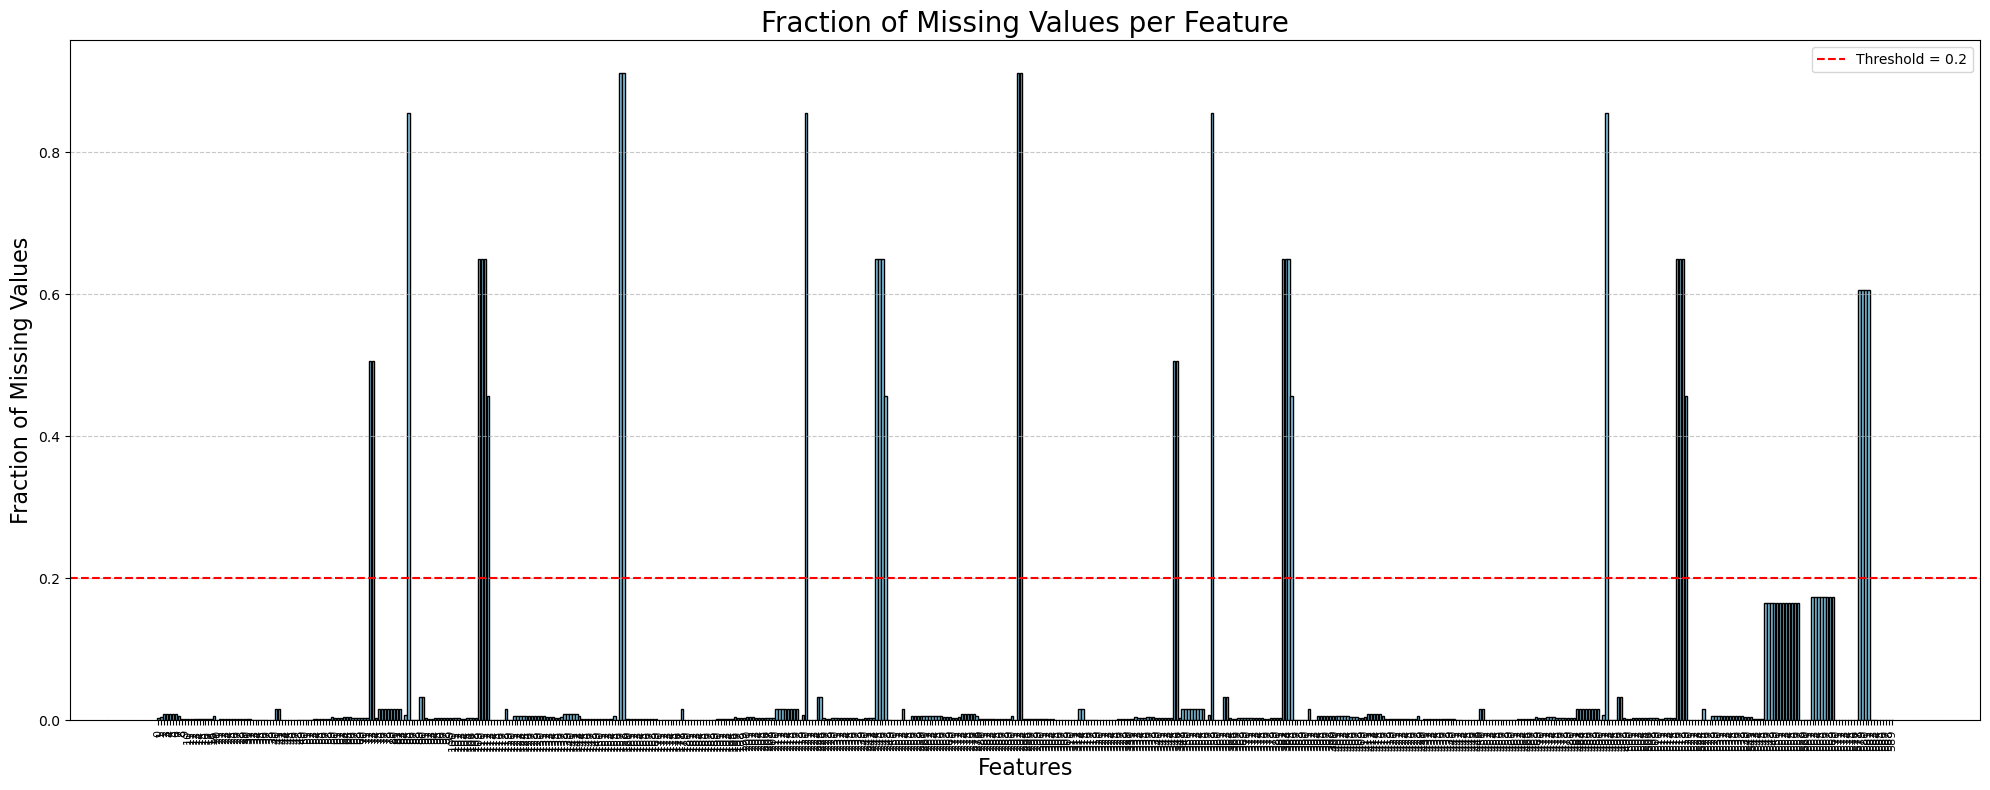

In [49]:
import matplotlib.pyplot as plt

# Calculate the fraction of missing values for each feature, excluding 'Time' and 'Pass/Fail'
perc_missing_per_ftr = data.iloc[:, 1:-1].isnull().sum(axis=0) / data.shape[0]

# Create numeric labels for features (0 to 589)
num_labels = range(590)

# Plot the bar chart for missing data fractions
plt.figure(figsize=(20, 8))
plt.bar(num_labels, perc_missing_per_ftr, color='skyblue', edgecolor='black')
plt.axhline(y=0.2, color='red', linestyle='--', linewidth=1.5, label='Threshold = 0.2')
plt.title('Fraction of Missing Values per Feature', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Fraction of Missing Values', fontsize=16)
plt.xticks(ticks=num_labels, labels=num_labels, rotation=90, fontsize=8)  # Numeric labels from 0 to 589
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


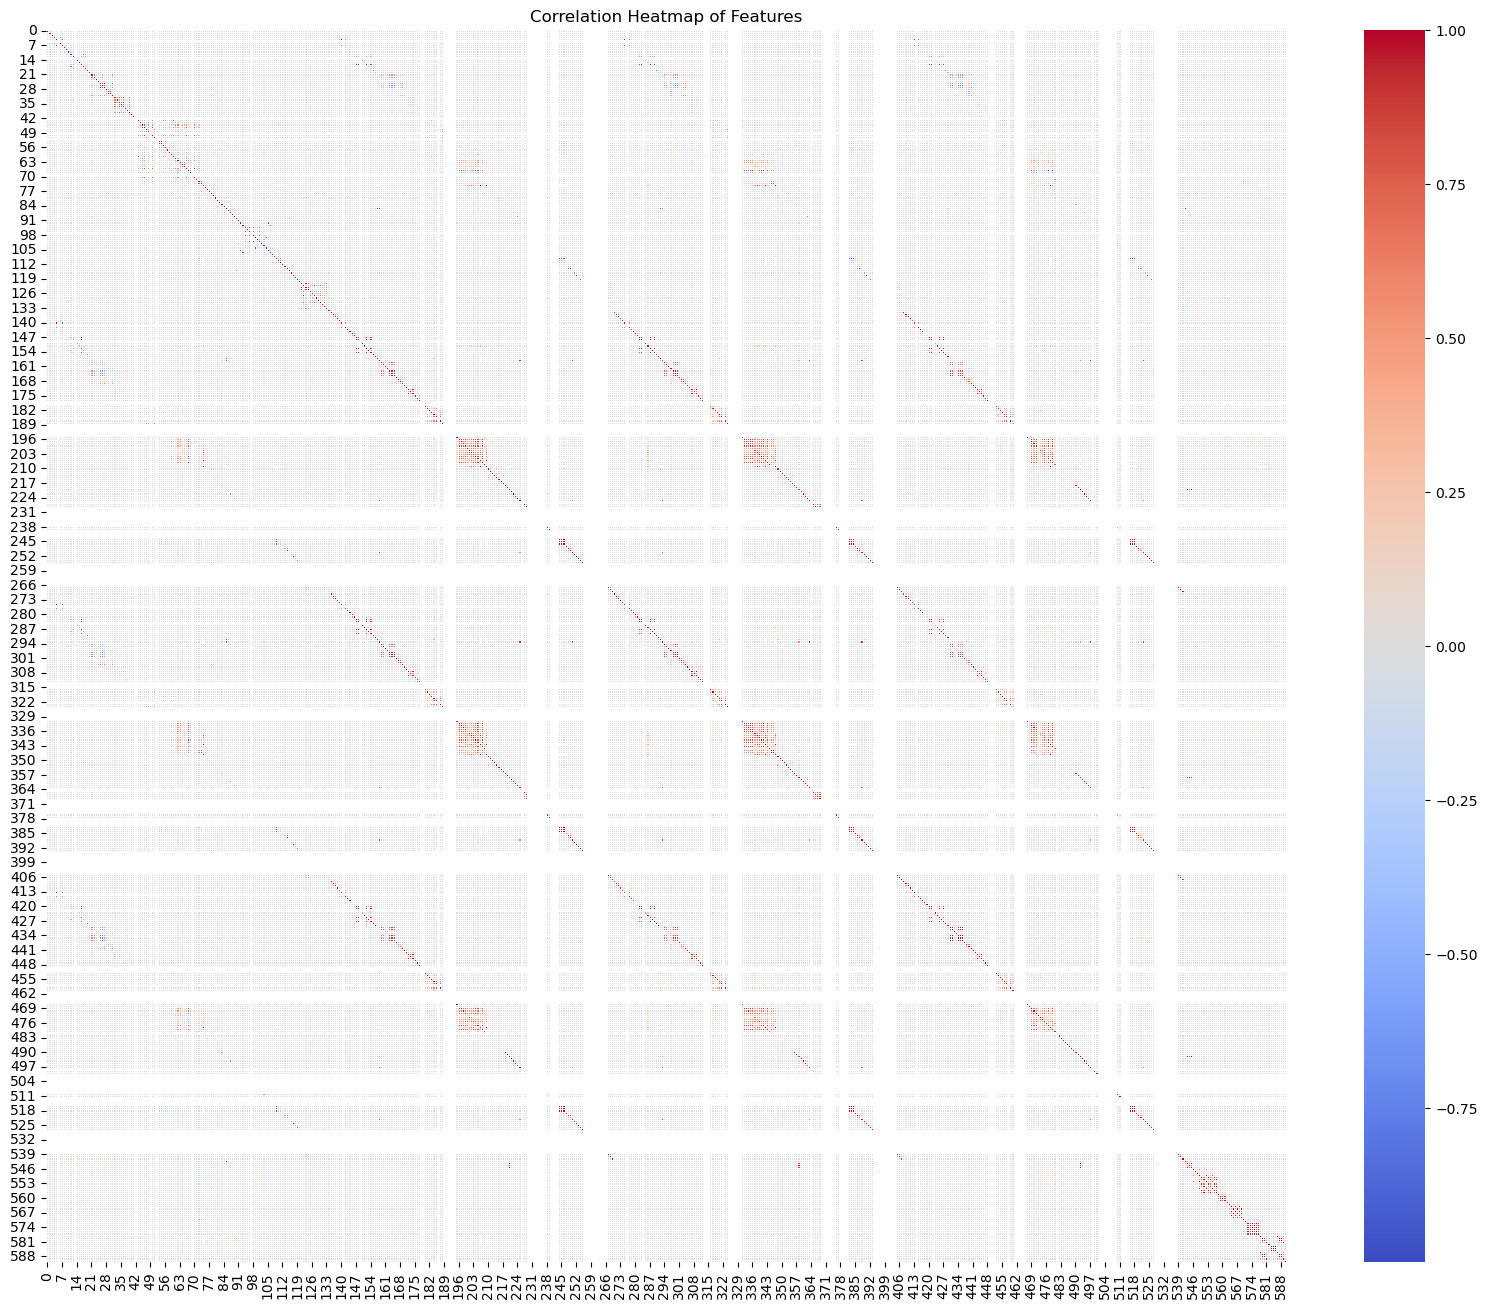

In [52]:
# Calculate the correlation matrix, excluding the first column ('Time')
corr_matrix = data.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()



/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Highest Correlation Feature: 59 (Corr = 0.16)
Lowest Correlation Feature: 111 (Corr = -0.11)


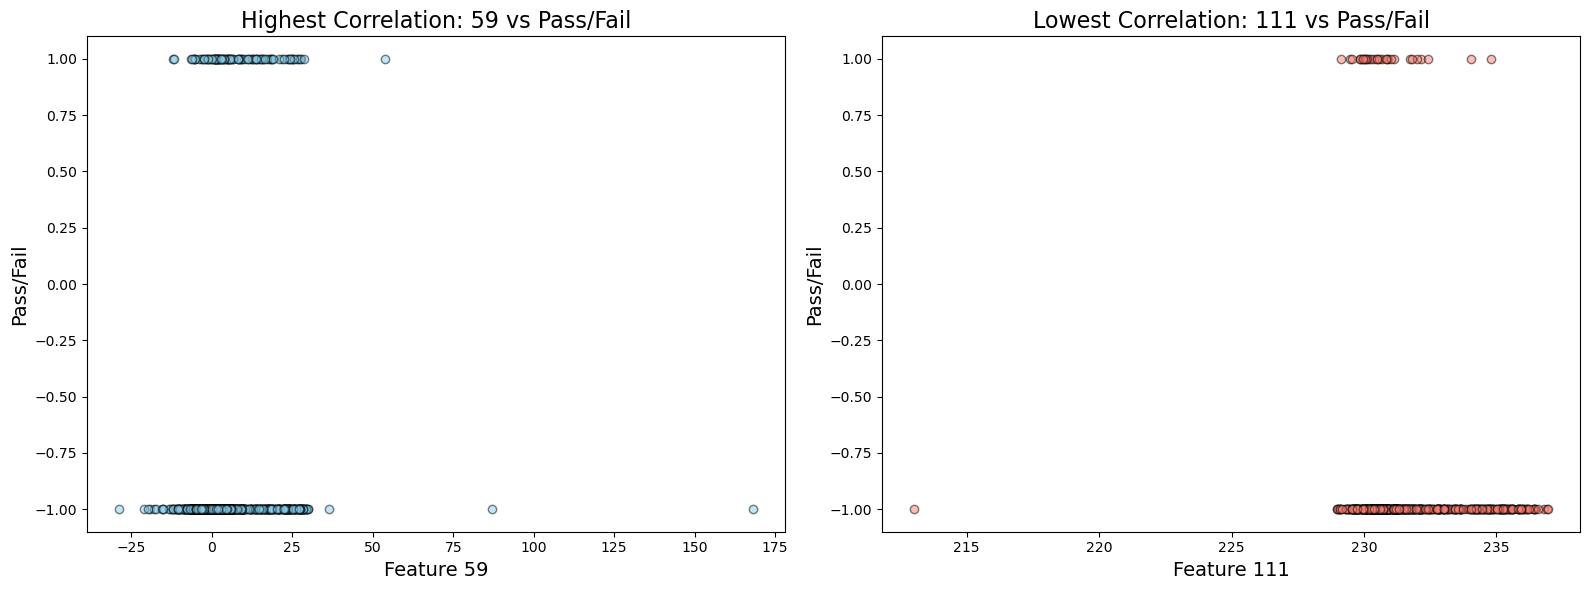

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlation with the target variable (last column)
target_corr = data.iloc[:, 1:-1].corrwith(data['Pass/Fail'])

# Find the feature with the highest and lowest correlation with the target (excluding 1 and -1)
highest_corr_feature = target_corr[target_corr != 1].idxmax()
lowest_corr_feature = target_corr.idxmin()

# Print the features with the highest and lowest correlation
print(f"Highest Correlation Feature: {highest_corr_feature} (Corr = {target_corr[highest_corr_feature]:.2f})")
print(f"Lowest Correlation Feature: {lowest_corr_feature} (Corr = {target_corr[lowest_corr_feature]:.2f})")

# Plot scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for the highest correlation feature
axes[0].scatter(data[highest_corr_feature], data['Pass/Fail'], alpha=0.5, color='skyblue', edgecolor='black')
axes[0].set_title(f'Highest Correlation: {highest_corr_feature} vs Pass/Fail', fontsize=16)
axes[0].set_xlabel(f'Feature {highest_corr_feature}', fontsize=14)
axes[0].set_ylabel('Pass/Fail', fontsize=14)

# Scatter plot for the lowest correlation feature
axes[1].scatter(data[lowest_corr_feature], data['Pass/Fail'], alpha=0.5, color='salmon', edgecolor='black')
axes[1].set_title(f'Lowest Correlation: {lowest_corr_feature} vs Pass/Fail', fontsize=16)
axes[1].set_xlabel(f'Feature {lowest_corr_feature}', fontsize=14)
axes[1].set_ylabel('Pass/Fail', fontsize=14)

plt.tight_layout()
plt.show()


Highest Correlation Feature: 59 (Corr = 0.16)
Lowest Correlation Feature: 111 (Corr = -0.11)


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


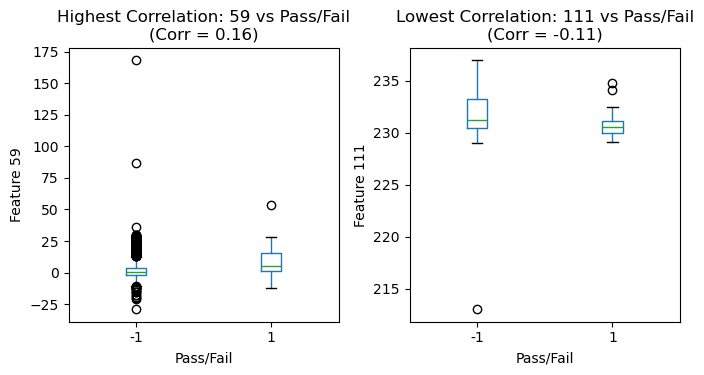

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlation with the target variable (last column)
target_corr = data.iloc[:, 1:-1].corrwith(data['Pass/Fail'])

# Find the feature with the highest and lowest correlation with the target (excluding 1 and -1)
highest_corr_feature = target_corr[target_corr != 1].idxmax()
lowest_corr_feature = target_corr.idxmin()

# Get the correlation values
highest_corr_value = target_corr[highest_corr_feature]
lowest_corr_value = target_corr[lowest_corr_feature]

# Print the features with the highest and lowest correlation
print(f"Highest Correlation Feature: {highest_corr_feature} (Corr = {highest_corr_value:.2f})")
print(f"Lowest Correlation Feature: {lowest_corr_feature} (Corr = {lowest_corr_value:.2f})")

# Plot box plots
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Box plot for the highest correlation feature
data.boxplot(column=highest_corr_feature, by='Pass/Fail', ax=axes[0], grid=False)
axes[0].set_title(f'Highest Correlation: {highest_corr_feature} vs Pass/Fail\n(Corr = {highest_corr_value:.2f})')
axes[0].set_xlabel('Pass/Fail')
axes[0].set_ylabel(f'Feature {highest_corr_feature}')

# Box plot for the lowest correlation feature
data.boxplot(column=lowest_corr_feature, by='Pass/Fail', ax=axes[1], grid=False)
axes[1].set_title(f'Lowest Correlation: {lowest_corr_feature} vs Pass/Fail\n(Corr = {lowest_corr_value:.2f})')
axes[1].set_xlabel('Pass/Fail')
axes[1].set_ylabel(f'Feature {lowest_corr_feature}')

# Adjust layout and remove the automatically added figure title
plt.suptitle('')
plt.tight_layout()
plt.show()


In [61]:
# Set the threshold for missing values (20% or 0.2)
threshold = 0.2

# Calculate the fraction of missing values for each column (excluding 'Time' and 'Pass/Fail')
perc_missing_per_ftr = data.iloc[:, 1:-1].isnull().sum(axis=0) / data.shape[0]

# Identify columns to drop (those exceeding the 20% threshold)
columns_to_drop = perc_missing_per_ftr[perc_missing_per_ftr > threshold].index
print(f"Columns to drop (missing > 20%):\n", columns_to_drop)

# Drop the identified columns from the original dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Print the shape of the data after dropping columns
print("New data shape after dropping columns with > 20% missing values:", data_cleaned.shape)


Columns to drop (missing > 20%):
 Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '578', '579',
       '580', '581'],
      dtype='object')
New data shape after dropping columns with > 20% missing values: (1567, 560)


In [62]:
# Find columns with unique values (i.e., all values are the same)
unique_value_columns = data.columns[data.nunique() == 1]

# Print the columns with unique values
print(f"Columns with unique values:\n{unique_value_columns.tolist()}")

# Optionally, you can drop these columns from the dataset
data_cleaned = data.drop(columns=unique_value_columns)

# Print the shape of the data after dropping unique-value columns
print("New data shape after dropping columns with unique values:", data_cleaned.shape)


Columns with unique values:
['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
New data shape after dropping columns with unique values: (1567, 476)


In [69]:
# Step 1: Drop columns with unique values (all values are the same)
unique_value_columns = data.columns[data.nunique() == 1]

# Drop these columns from the dataset
data_cleaned = data.drop(columns=unique_value_columns)

print(f"Columns with unique values dropped:\n{unique_value_columns.tolist()}")
print("Data shape after dropping unique-value columns:", data_cleaned.shape)

# Step 2: Drop columns with more than 20% missing values
threshold = 0.2

# Calculate the fraction of missing values for each column (excluding 'Time' and 'Pass/Fail')
perc_missing_per_ftr = data_cleaned.iloc[:, 1:-1].isnull().sum(axis=0) / data_cleaned.shape[0]

# Identify columns to drop (those exceeding the 20% threshold)
columns_to_drop = perc_missing_per_ftr[perc_missing_per_ftr > threshold].index

# Drop the identified columns from the dataset
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

print(f"Columns with >20% missing values dropped:\n{columns_to_drop.tolist()}")
print("Final data shape after dropping columns with >20% missing values:", data_cleaned.shape)


Columns with unique values dropped:
['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
Data shape after dropping unique-value columns: (1567, 476)
Columns with >20% missing values dropped:
['72', '73', '85', '109', '110', '111', '112', '157', '15

In [70]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns excluding 'Time' and 'Pass/Fail'
numerical_columns = data.iloc[:, 1:-1].columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Print the first few rows of the scaled data
print(data_scaled.head())


                  Time         0         1         2         3         4    5  \
0  2008-07-19 11:55:00  0.223879  0.847825 -0.434320  0.033405 -0.050354  0.0   
1  2008-07-19 12:32:00  1.105015 -0.382054  1.012583  0.152382 -0.059776  0.0   
2  2008-07-19 13:17:00 -1.112023  0.797316 -0.479135  0.683141 -0.047691  0.0   
3  2008-07-19 14:43:00 -0.349640 -0.198431 -0.051316 -1.101992 -0.051060  0.0   
4  2008-07-19 15:22:00  0.241679  0.087330  1.112384 -0.158208 -0.047280  0.0   

          6         7         8  ...       581       582        583  \
0 -0.561266  0.265504  0.509501  ...       NaN  0.118661  -0.204825   
1  0.197330  0.321317  0.456708  ...  1.260949  0.530034   0.406549   
2 -0.902153  0.254341 -0.260740  ... -0.172375 -1.262377   0.022257   
3  0.500993 -0.013563  0.342999  ... -0.275485 -0.322096  -0.292164   
4 -0.114865  0.187365  0.544697  ...       NaN -5.905014  26.858657   

         584        585       586       587       588       589  Pass/Fail  
0  -0.093

In [72]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extract numerical columns excluding 'Time' and 'Pass/Fail'
numerical_columns = data.iloc[:, 1:-1].columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Select a few example columns for comparison
example_columns = numerical_columns[:5]  # Change this to any specific set of columns if needed

# Concatenate original and scaled data for the selected columns
comparison_df = pd.concat([data[example_columns].head().add_prefix('Original_'), 
                           data_scaled[example_columns].head().add_prefix('Scaled_')], axis=1)

# Display the comparison dataframe
print("Comparison of Selected Original and Scaled Features:")
print(comparison_df)


Comparison of Selected Original and Scaled Features:
   Original_0  Original_1  Original_2  Original_3  Original_4  Scaled_0  \
0     3030.93     2564.00   2187.7333   1411.1265      1.3602  0.223879   
1     3095.78     2465.14   2230.4222   1463.6606      0.8294  1.105015   
2     2932.61     2559.94   2186.4111   1698.0172      1.5102 -1.112023   
3     2988.72     2479.90   2199.0333    909.7926      1.3204 -0.349640   
4     3032.24     2502.87   2233.3667   1326.5200      1.5334  0.241679   

   Scaled_1  Scaled_2  Scaled_3  Scaled_4  
0  0.847825 -0.434320  0.033405 -0.050354  
1 -0.382054  1.012583  0.152382 -0.059776  
2  0.797316 -0.479135  0.683141 -0.047691  
3 -0.198431 -0.051316 -1.101992 -0.051060  
4  0.087330  1.112384 -0.158208 -0.047280  
